<img src="http://upxacademy.com/wp-content/uploads/2016/07/upx-logo-02-e1467712070244.png">
# UpX Academy - Project1-Flights
# Airport Performance - Arrivals/Flyins

In [3]:
your_local_path="E:/UPX_Data_Science/Foundation-course/project/attachment_Projects/attachment_Project_1_NYC-Flight_data/"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
flight_data=pd.read_csv(your_local_path+'flight_data.csv',parse_dates = [[0,1,2]])
flight_data.head()

year_month_day  dep_time  sched_dep_time  dep_delay  arr_time  \
0     2013-01-01     517.0             515        2.0     830.0   
1     2013-01-01     533.0             529        4.0     850.0   
2     2013-01-01     542.0             540        2.0     923.0   
3     2013-01-01     544.0             545       -1.0    1004.0   
4     2013-01-01     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0             819       11.0      UA    1545  N14228    EWR  IAH     227.0   
1             830       20.0      UA    1714  N24211    LGA  IAH     227.0   
2             850       33.0      AA    1141  N619AA    JFK  MIA     160.0   
3            1022      -18.0      B6     725  N804JB    JFK  BQN     183.0   
4             837      -25.0      DL     461  N668DN    LGA  ATL     116.0   

   distance  hour  minute         time_hour  
0      1400     5      15  01-01-2013 05:00  
1      1416     5      29  01-01-2013 05:00  
2      1089     5      40  01-01-2013 05:00  
3      1576     5      45  01-01-2013 05:00  
4       762     6       0  01-01-2013 06:00

In [28]:
flight_data.info()
#flight_data['Yr_Mo_Dy']=pd.to_datetime(data['Yr_Mo_Dy'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 20 columns):
year_month_day    336776 non-null datetime64[ns]
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
month             336776 non-null int64
year              336776 non-null int64
day               336776 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(9), object(5)
memory

In [29]:
#adding month, date and year variables from date
flight_data['month'] = flight_data['year_month_day'].apply(lambda date: date.month)
flight_data['year'] = flight_data['year_month_day'].apply(lambda date: date.year)
flight_data['day'] = flight_data['year_month_day'].apply(lambda date: date.day)

In [30]:
flight_data.head()
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 20 columns):
year_month_day    336776 non-null datetime64[ns]
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
month             336776 non-null int64
year              336776 non-null int64
day               336776 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(9), object(5)
memory

In [31]:
#creating a dataset with only arrival related variables for further arrival delay analysis
flight_arr_data=flight_data[['year_month_day','arr_time','sched_arr_time','arr_delay','dest','air_time','distance','month','year','day']]
flight_arr_data.head()
flight_arr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 10 columns):
year_month_day    336776 non-null datetime64[ns]
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
month             336776 non-null int64
year              336776 non-null int64
day               336776 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(5), object(1)
memory usage: 24.4+ MB


In [32]:
#unique destinations
len(flight_arr_data.dest.unique())

105

In [371]:
#IGNORE THIS CELL
#SUMMARIZING ARRIVAL PARAMETERS AT DESTINATION AND SPECIFIC PERIODS WITHIN EACH MONTH
#Each Month: specific periods (1~7, 8-15, 16-23, 24-30) 
#below method not working. check alternative in next step which works
'''
def dayperiod(flight_arr_data):
    for dest in flight_arr_data['dest']:
        if flight_arr_data['day'] >=1 & flight_arr_data['day']<=7:
            flight_arr_data['days_period']='1.1-7'
        elif flight_arr_data['day'] >=8 & flight_arr_data['day']<=15:
            flight_arr_data['days_period']='2.8-15'  
        elif flight_arr_data['day'] >=16 & flight_arr_data['day']<=23:
            flight_arr_data['days_period']='3.16-23'
        else:
            flight_arr_data['days_period']='4.24-31'
    return (flight_arr_data)

def dayperiod(flight_arr_data):
    for dest in flight_arr_data['dest']:
        if flight_arr_data['day'].isin([1,2,3,4,5,6,7]):
            flight_arr_data['days_period']='1.1-7'
        elif flight_arr_data['day'].isin([8,9,10,11,12,13,14,15]):
            flight_arr_data['days_period']='2.8-15'  
        elif flight_arr_data['day'].isin([16,17,18,19,20,21,22,23]):
            flight_arr_data['days_period']='3.16-23'
        else:
            flight_arr_data['days_period']='4.24-31'
    return (flight_arr_data)
flight_arr_data=dayperiod(flight_arr_data)
'''

"\ndef dayperiod(flight_arr_data):\n    for dest in flight_arr_data['dest']:\n        if flight_arr_data['day'] >=1 & flight_arr_data['day']<=7:\n            flight_arr_data['days_period']='1.1-7'\n        elif flight_arr_data['day'] >=8 & flight_arr_data['day']<=15:\n            flight_arr_data['days_period']='2.8-15'  \n        elif flight_arr_data['day'] >=16 & flight_arr_data['day']<=23:\n            flight_arr_data['days_period']='3.16-23'\n        else:\n            flight_arr_data['days_period']='4.24-31'\n    return (flight_arr_data)\n\ndef dayperiod(flight_arr_data):\n    for dest in flight_arr_data['dest']:\n        if flight_arr_data['day'].isin([1,2,3,4,5,6,7]):\n            flight_arr_data['days_period']='1.1-7'\n        elif flight_arr_data['day'].isin([8,9,10,11,12,13,14,15]):\n            flight_arr_data['days_period']='2.8-15'  \n        elif flight_arr_data['day'].isin([16,17,18,19,20,21,22,23]):\n            flight_arr_data['days_period']='3.16-23'\n        else:\n  

In [33]:
#SUMMARIZING ARRIVAL PARAMETERS AT DESTINATION AND SPECIFIC PERIODS WITHIN EACH MONTH
#Each Month: specific periods (1~7, 8-15, 16-23, 24-30) 
flight_arr_data['days_period'] =  flight_arr_data['day'].map(lambda x: '1.1-7' if 1 <= x <= 7  else '2.8-15' if 8 <= x <= 15 else '3.16-23' if 16 <= x <= 23 else '4.24-31')

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [34]:
flight_arr_data[10000:10050]

year_month_day  arr_time  sched_arr_time  arr_delay dest  air_time  \
10000     2013-01-12    1344.0            1355      -11.0  SFO     353.0   
10001     2013-01-12    1341.0            1340        1.0  LAX     343.0   
10002     2013-01-12    1306.0            1330      -24.0  MCO     127.0   
10003     2013-01-12    1341.0            1358      -17.0  TPA     139.0   
10004     2013-01-12    1339.0            1340       -1.0  IAH     206.0   
10005     2013-01-12    1336.0            1405      -29.0  FLL     138.0   
10006     2013-01-12    1342.0            1400      -18.0  PSP     338.0   
10007     2013-01-12    1346.0            1416      -30.0  SEA     328.0   
10008     2013-01-12    1408.0            1433      -25.0  SFO     352.0   
10009     2013-01-12    1337.0            1413      -36.0  RSW     147.0   
10010     2013-01-12    1324.0            1338      -14.0  ATL     110.0   
10011     2013-01-12    1415.0            1425      -10.0  SFO     356.0   
10012     2013-01-12    1200.0            1207       -7.0  BOS      43.0   
10013     2013-01-12    1201.0            1215      -14.0  DCA      45.0   
10014     2013-01-12    1235.0            1215       20.0  RDU      65.0   
10015     2013-01-12    1211.0            1215       -4.0  DCA      44.0   
10016     2013-01-12    1259.0            1314      -15.0  DTW      80.0   
10017     2013-01-12    1337.0            1419      -42.0  MCO     128.0   
10018     2013-01-12    1251.0            1305      -14.0  ORD     122.0   
10019     2013-01-12    1350.0            1347        3.0  DEN     244.0   
10020     2013-01-12    1421.0            1438      -17.0  RSW     161.0   
10021     2013-01-12    1403.0            1430      -27.0  MCO     128.0   
10022     2013-01-12    1423.0            1439      -16.0  LAX     339.0   
10023     2013-01-12    1401.0            1422      -21.0  MCO     131.0   
10024     2013-01-12    1423.0            1445      -22.0  LAX     334.0   
10025     2013-01-12    1344.0            1349       -5.0  DEN     239.0   
10026     2013-01-12    1254.0            1305      -11.0  RDU      65.0   
10027     2013-01-12    1258.0            1320      -22.0  STL     136.0   
10028     2013-01-12    1320.0            1334      -14.0  CLT      80.0   
10029     2013-01-12    1328.0            1345      -17.0  MSP     152.0   
10030     2013-01-12    1438.0            1425       13.0  MIA     152.0   
10031     2013-01-12    1312.0            1335      -23.0  CLE      66.0   
10032     2013-01-12    1408.0            1437      -29.0  TPA     136.0   
10033     2013-01-12    1307.0            1321      -14.0  CAK      63.0   
10034     2013-01-12    1238.0            1221       17.0  BTV      48.0   
10035     2013-01-12    1443.0            1508      -25.0  MIA     149.0   
10036     2013-01-12    1307.0            1305        2.0  MDW     118.0   
10037     2013-01-12    1300.0            1307       -7.0  ORF      52.0   
10038     2013-01-12    1438.0            1453      -15.0  PBI     142.0   
10039     2013-01-12    1248.0            1256       -8.0  BTV      47.0   
10040     2013-01-12    1409.0            1424      -15.0  JAX     121.0   
10041     2013-01-12    1247.0            1304      -17.0  BOS      45.0   
10042     2013-01-12    1450.0            1450        0.0  FLL     149.0   
10043     2013-01-12    1344.0            1345       -1.0  MSP     153.0   
10044     2013-01-12    1259.0            1302       -3.0  BOS      43.0   
10045     2013-01-12    1322.0            1330       -8.0  BNA     113.0   
10046     2013-01-12    1501.0            1529      -28.0  LAX     340.0   
10047     2013-01-12    1344.0            1400      -16.0  CLT      81.0   
10048     2013-01-12    1414.0            1430      -16.0  ATL     107.0   
10049     2013-01-12    1258.0            1305       -7.0  BOS      41.0   

       distance  month  year  day days_period  
10000      2586      1  2013   12      2.8-15  
10001      2475      1  2013   12

In [35]:
#Now, to create timeframes, we need to initiate the process for time format conversion for scheduled arrival time in this step. 
#Need to convert the int format to string as datetime function works on sting format as input

#flight_arr_data['sched_arr_hour']=pd.to_datetime(flight_arr_data['sched_arr_time'], format='%H%M').hour()
#flight_arr_data['sched_arr_time1']=pd.to_datetime(str(flight_arr_data['sched_arr_time']), format='%H%M')

flight_arr_data['sched_arr_time1']=flight_arr_data['sched_arr_time'].astype(str)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [36]:
flight_arr_data

year_month_day  arr_time  sched_arr_time  arr_delay dest  air_time  \
0          2013-01-01     830.0             819       11.0  IAH     227.0   
1          2013-01-01     850.0             830       20.0  IAH     227.0   
2          2013-01-01     923.0             850       33.0  MIA     160.0   
3          2013-01-01    1004.0            1022      -18.0  BQN     183.0   
4          2013-01-01     812.0             837      -25.0  ATL     116.0   
5          2013-01-01     740.0             728       12.0  ORD     150.0   
6          2013-01-01     913.0             854       19.0  FLL     158.0   
7          2013-01-01     709.0             723      -14.0  IAD      53.0   
8          2013-01-01     838.0             846       -8.0  MCO     140.0   
9          2013-01-01     753.0             745        8.0  ORD     138.0   
10         2013-01-01     849.0             851       -2.0  PBI     149.0   
11         2013-01-01     853.0             856       -3.0  TPA     158.0   
12         2013-01-01     924.0             917        7.0  LAX     345.0   
13         2013-01-01     923.0             937      -14.0  SFO     361.0   
14         2013-01-01     941.0             910       31.0  DFW     257.0   
15         2013-01-01     702.0             706       -4.0  BOS      44.0   
16         2013-01-01     854.0             902       -8.0  LAS     337.0   
17         2013-01-01     851.0             858       -7.0  FLL     152.0   
18         2013-01-01     837.0             825       12.0  ATL     134.0   
19         2013-01-01     844.0             850       -6.0  PBI     147.0   
20         2013-01-01     812.0             820       -8.0  MSP     170.0   
21         2013-01-01     821.0             805       16.0  DTW     105.0   
22         2013-01-01     858.0             910      -12.0  MIA     152.0   
23         2013-01-01     837.0             845       -8.0  ATL     128.0   
24         2013-01-01     858.0             915      -17.0  MIA     157.0   
25         2013-01-01     807.0             735       32.0  ORD     139.0   
26         2013-01-01     945.0             931       14.0  SFO     366.0   
27         2013-01-01     925.0             921        4.0  RSW     175.0   
28         2013-01-01    1039.0            1100      -21.0  SJU     182.0   
29         2013-01-01     833.0             842       -9.0  ATL     120.0   
...               ...       ...             ...        ...  ...       ...   
336746     2013-09-30    2223.0            2247      -24.0  CHO      45.0   
336747     2013-09-30    2314.0            2323       -9.0  CLT      72.0   
336748     2013-09-30    2328.0            2359      -31.0  DEN     213.0   
336749     2013-09-30    2230.0            2232       -2.0  RIC      45.0   
336750     2013-09-30    2225.0            2255      -30.0  DCA      36.0   
336751     2013-09-30      10.0              40      -30.0  LAX     298.0   
336752     2013-09-30    2250.0            2239       11.0  PWM      47.0   
336753     2013-09-30     115.0             140      -25.0  SJU     192.0   
336754     2013-09-30      30.0              27        3.0  FLL     139.0   
336755     2013-09-30    2245.0            2308      -23.0  BOS      37.0   
336756     2013-09-30    2250.0            2306      -16.0  MHT      39.0   
336757     2013-09-30    2344.0            2030      194.0  BUF      50.0   
336758     2013-09-30    2339.0            2331        8.0  BGR      61.0   
336759     2013-09-30    2257.0            2250        7.0  BNA      97.0   
336760     2013-09-30    2339.0            2242       57.0  STL     120.0   
336761     2013-09-30    2335.0            2356      -21.0  PWM      48.0   
336762     2013-09-30     112.0              30       42.0  SFO     318.0   
336763     2013-09-30      59.0            2249      130.0  MCO     123.0   
336764     2013-09-30    2345.0            2353       -8.0  BTV      43.0   
336765     2013-09-30    2334.0            2351      -17.0  SYR      41.0   
336

In [39]:
#Ensuring that leading 0s are added to schduled arrival time values so that length is constant (=4) across all values. This is essential for conversion to time format in next step 
flight_arr_data['sched_arr_time1']=flight_arr_data['sched_arr_time1'].apply(lambda x: x.zfill(4))
flight_arr_data


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


year_month_day  arr_time  sched_arr_time  arr_delay dest  air_time  \
0          2013-01-01     830.0             819       11.0  IAH     227.0   
1          2013-01-01     850.0             830       20.0  IAH     227.0   
2          2013-01-01     923.0             850       33.0  MIA     160.0   
3          2013-01-01    1004.0            1022      -18.0  BQN     183.0   
4          2013-01-01     812.0             837      -25.0  ATL     116.0   
5          2013-01-01     740.0             728       12.0  ORD     150.0   
6          2013-01-01     913.0             854       19.0  FLL     158.0   
7          2013-01-01     709.0             723      -14.0  IAD      53.0   
8          2013-01-01     838.0             846       -8.0  MCO     140.0   
9          2013-01-01     753.0             745        8.0  ORD     138.0   
10         2013-01-01     849.0             851       -2.0  PBI     149.0   
11         2013-01-01     853.0             856       -3.0  TPA     158.0   
12         2013-01-01     924.0             917        7.0  LAX     345.0   
13         2013-01-01     923.0             937      -14.0  SFO     361.0   
14         2013-01-01     941.0             910       31.0  DFW     257.0   
15         2013-01-01     702.0             706       -4.0  BOS      44.0   
16         2013-01-01     854.0             902       -8.0  LAS     337.0   
17         2013-01-01     851.0             858       -7.0  FLL     152.0   
18         2013-01-01     837.0             825       12.0  ATL     134.0   
19         2013-01-01     844.0             850       -6.0  PBI     147.0   
20         2013-01-01     812.0             820       -8.0  MSP     170.0   
21         2013-01-01     821.0             805       16.0  DTW     105.0   
22         2013-01-01     858.0             910      -12.0  MIA     152.0   
23         2013-01-01     837.0             845       -8.0  ATL     128.0   
24         2013-01-01     858.0             915      -17.0  MIA     157.0   
25         2013-01-01     807.0             735       32.0  ORD     139.0   
26         2013-01-01     945.0             931       14.0  SFO     366.0   
27         2013-01-01     925.0             921        4.0  RSW     175.0   
28         2013-01-01    1039.0            1100      -21.0  SJU     182.0   
29         2013-01-01     833.0             842       -9.0  ATL     120.0   
...               ...       ...             ...        ...  ...       ...   
336746     2013-09-30    2223.0            2247      -24.0  CHO      45.0   
336747     2013-09-30    2314.0            2323       -9.0  CLT      72.0   
336748     2013-09-30    2328.0            2359      -31.0  DEN     213.0   
336749     2013-09-30    2230.0            2232       -2.0  RIC      45.0   
336750     2013-09-30    2225.0            2255      -30.0  DCA      36.0   
336751     2013-09-30      10.0              40      -30.0  LAX     298.0   
336752     2013-09-30    2250.0            2239       11.0  PWM      47.0   
336753     2013-09-30     115.0             140      -25.0  SJU     192.0   
336754     2013-09-30      30.0              27        3.0  FLL     139.0   
336755     2013-09-30    2245.0            2308      -23.0  BOS      37.0   
336756     2013-09-30    2250.0            2306      -16.0  MHT      39.0   
336757     2013-09-30    2344.0            2030      194.0  BUF      50.0   
336758     2013-09-30    2339.0            2331        8.0  BGR      61.0   
336759     2013-09-30    2257.0            2250        7.0  BNA      97.0   
336760     2013-09-30    2339.0            2242       57.0  STL     120.0   
336761     2013-09-30    2335.0            2356      -21.0  PWM      48.0   
336762     2013-09-30     112.0              30       42.0  SFO     318.0   
336763     2013-09-30      59.0            2249      130.0  MCO     123.0   
336764     2013-09-30    2345.0            2353       -8.0  BTV      43.0   
336765     2013-09-30    2334.0            2351      -17.0  SYR      41.0   
336

In [40]:
#converting the scheduled arrival time from string to datetime format. This will help us get scheduled arrival hour to create timeframes in subsequent steps
from datetime import datetime, date, time
flight_arr_data['sched_arr_time2']=flight_arr_data['sched_arr_time1'].apply(lambda x: datetime.strptime(x,'%H%M'))

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [49]:
flight_arr_data.head()

year_month_day  arr_time  sched_arr_time  arr_delay dest  air_time  \
0     2013-01-01     830.0             819       11.0  IAH     227.0   
1     2013-01-01     850.0             830       20.0  IAH     227.0   
2     2013-01-01     923.0             850       33.0  MIA     160.0   
3     2013-01-01    1004.0            1022      -18.0  BQN     183.0   
4     2013-01-01     812.0             837      -25.0  ATL     116.0   

   distance  month  year  day days_period sched_arr_time1     sched_arr_time2  \
0      1400      1  2013    1       1.1-7            0819 1900-01-01 08:19:00   
1      1416      1  2013    1       1.1-7            0830 1900-01-01 08:30:00   
2      1089      1  2013    1       1.1-7            0850 1900-01-01 08:50:00   
3      1576      1  2013    1       1.1-7            1022 1900-01-01 10:22:00   
4       762      1  2013    1       1.1-7            0837 1900-01-01 08:37:00   

   sched_arr_hour  sched_arr_minute sched_arr_timeframe  
0               8                19        2.6AM-12Noon  
1               8                30        2.6AM-12Noon  
2               8                50        2.6AM-12Noon  
3              10                22        2.6AM-12Noon  
4               8                37        2.6AM-12Noon

In [42]:
#getting the Hour and Minute as variables from scheduled arrival time. This will help in creating time frames
flight_arr_data['sched_arr_hour'] = flight_arr_data['sched_arr_time2'].apply(lambda datetime: datetime.hour)
flight_arr_data['sched_arr_minute'] = flight_arr_data['sched_arr_time2'].apply(lambda datetime: datetime.minute)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [43]:
flight_arr_data.head()
flight_arr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 15 columns):
year_month_day      336776 non-null datetime64[ns]
arr_time            328063 non-null float64
sched_arr_time      336776 non-null int64
arr_delay           327346 non-null float64
dest                336776 non-null object
air_time            327346 non-null float64
distance            336776 non-null int64
month               336776 non-null int64
year                336776 non-null int64
day                 336776 non-null int64
days_period         336776 non-null object
sched_arr_time1     336776 non-null object
sched_arr_time2     336776 non-null datetime64[ns]
sched_arr_hour      336776 non-null int64
sched_arr_minute    336776 non-null int64
dtypes: datetime64[ns](2), float64(3), int64(7), object(3)
memory usage: 34.7+ MB


In [44]:
#Creating Timeframes within arrivals dataset
flight_arr_data['sched_arr_timeframe'] =  flight_arr_data['sched_arr_hour'].map(lambda x: '1.12AM-6AM' if 0 <= x < 6  else '2.6AM-12Noon' if 6 <= x < 12 else '3.12Noon-6PM' if 12 <= x < 18 else '4.6PM-12MidNight')

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [45]:
flight_arr_data.head()

year_month_day  arr_time  sched_arr_time  arr_delay dest  air_time  \
0     2013-01-01     830.0             819       11.0  IAH     227.0   
1     2013-01-01     850.0             830       20.0  IAH     227.0   
2     2013-01-01     923.0             850       33.0  MIA     160.0   
3     2013-01-01    1004.0            1022      -18.0  BQN     183.0   
4     2013-01-01     812.0             837      -25.0  ATL     116.0   

   distance  month  year  day days_period sched_arr_time1     sched_arr_time2  \
0      1400      1  2013    1       1.1-7            0819 1900-01-01 08:19:00   
1      1416      1  2013    1       1.1-7            0830 1900-01-01 08:30:00   
2      1089      1  2013    1       1.1-7            0850 1900-01-01 08:50:00   
3      1576      1  2013    1       1.1-7            1022 1900-01-01 10:22:00   
4       762      1  2013    1       1.1-7            0837 1900-01-01 08:37:00   

   sched_arr_hour  sched_arr_minute sched_arr_timeframe  
0               8                19        2.6AM-12Noon  
1               8                30        2.6AM-12Noon  
2               8                50        2.6AM-12Noon  
3              10                22        2.6AM-12Noon  
4               8                37        2.6AM-12Noon

In [46]:
#yearly level
#at destination level, find out mean,std, min, 25th percentile, 50th percentile, 75th percentile,max of arr_delay,proportion of delays
def percentile(n):
    def percentile_(x):
        return np.nanpercentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

flight_arr_Summ_Yr=flight_arr_data.groupby('dest').arr_delay.agg(['mean',lambda x: np.std(x),'min',percentile(25),percentile(50),percentile(75),'max'])
flight_arr_Summ_Yr

C:\Users\admin\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1001: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)


mean   <lambda>   min  percentile_25  percentile_50  percentile_75  \
dest                                                                            
ABQ    4.381890  41.898638 -61.0         -24.00           -5.5          22.75   
ACK    4.852273  29.929288 -25.0         -13.00           -3.0          10.00   
ALB   14.397129  50.439221 -34.0         -17.00           -4.0          28.00   
ANC   -2.500000  24.652586 -47.0         -10.75            1.5          10.00   
ATL   11.300113  46.967243 -49.0         -12.00           -1.0          16.00   
AUS    6.019909  43.510174 -59.0         -19.00           -5.0          15.00   
AVL    8.003831  33.550385 -29.0         -11.00           -1.0          13.00   
BDL    7.048544  42.046121 -43.0         -18.00          -10.0          14.00   
BGR    8.027933  46.324388 -43.0         -21.75           -9.0          19.75   
BHM   16.877323  56.120918 -50.0         -20.00           -2.0          34.00   
BNA   11.812459  48.336079 -58.0         -15.00           -2.0          19.00   
BOS    2.914392  38.298733 -48.0         -17.00           -9.0           6.00   
BQN    8.245495  34.438489 -43.0         -11.00           -1.0          16.00   
BTV    8.950996  40.237111 -49.0         -13.00           -4.0          15.00   
BUF    8.945952  42.653696 -53.0         -14.00           -5.0          12.00   
BUR    8.175676  47.763991 -61.0         -19.00           -3.0          18.00   
BWI   10.726734  52.718909 -53.0         -16.00           -5.0          16.00   
BZN    7.600000  34.027888 -25.0         -13.00           -2.0          11.00   
CAE   41.764151  52.657231 -28.0           5.00           28.0          63.00   
CAK   19.698337  58.309961 -37.0         -11.00            3.0          24.75   
CHO    9.500000  49.464414 -39.0         -19.75           -5.0          20.25   
CHS   10.592968  46.122573 -50.0         -15.00           -4.0          17.00   
CLE    9.181611  45.831212 -55.0         -16.00           -5.0          14.00   
CLT    7.360319  40.950370 -51.0         -14.00           -3.0          14.00   
CMH   10.601323  46.335041 -48.0         -14.00           -3.0          17.00   
CRW   14.671642  42.519315 -33.0         -14.75           -1.5          31.50   
CVG   15.364564  55.102421 -55.0         -15.00           -3.0          24.00   
DAY   12.680486  47.728624 -59.0         -16.00           -3.0          20.50   
DCA    9.066952  39.912869 -62.0         -13.00           -2.0          15.00   
DEN    8.606500  47.251695 -67.0         -17.00           -2.0          17.00   
...         ...        ...   ...            ...            ...            ...   
PIT    7.680991  44.631968 -53.0         -17.00           -5.0          14.00   
PSE    7.871508  32.333289 -32.0         -11.00            0.0          14.00   
PSP  -12.722222  15.803676 -43.0         -26.25          -13.5           1.00   
PVD   16.234637  45.319422 -32.0         -13.00            1.0          28.75   
PWM   11.660402  43.669047 -47.0         -13.00           -4.0          18.00   
RDU   10.052381  42.262704 -53.0         -13.00           -3.0          16.00   
RIC   20.111253  53.756064 -61.0         -13.00            1.0          32.75   
ROC   11.560645  48.336259 -52.0         -15.00           -5.0          17.00   
RSW    3.238150  34.185311 -52.0         -16.00           -5.0          11.00   
SAN    3.139166  43.505080 -68.0         -20.00           -5.0          14.00   
SAT    6.945372  57.796724 -61.0         -25.00           -9.0          16.00   
SAV   15.129506  50.442163 -54.0         -13.00           -1.0          23.00   
SBN    6.500000  24.642443 -19.0          -9.75           -3.5          15.00   
SDF   12.669384  45.773291 -52.0         -14.00           -2.0          21.00   
SEA   -1.099099  41.927740 -75.0         -24.00          -11.0           9.00   
SFO    2.672892  47.668832 -86.0         -23.00           -8.0          12.00   
SJC    3.448171  42.414445 -55.0         -

In [47]:
flight_arr_Summ_Yr['total_arrivals']=flight_arr_data.groupby('dest').size()

In [48]:
flight_arr_Summ_Yr

mean   <lambda>   min  percentile_25  percentile_50  percentile_75  \
dest                                                                            
ABQ    4.381890  41.898638 -61.0         -24.00           -5.5          22.75   
ACK    4.852273  29.929288 -25.0         -13.00           -3.0          10.00   
ALB   14.397129  50.439221 -34.0         -17.00           -4.0          28.00   
ANC   -2.500000  24.652586 -47.0         -10.75            1.5          10.00   
ATL   11.300113  46.967243 -49.0         -12.00           -1.0          16.00   
AUS    6.019909  43.510174 -59.0         -19.00           -5.0          15.00   
AVL    8.003831  33.550385 -29.0         -11.00           -1.0          13.00   
BDL    7.048544  42.046121 -43.0         -18.00          -10.0          14.00   
BGR    8.027933  46.324388 -43.0         -21.75           -9.0          19.75   
BHM   16.877323  56.120918 -50.0         -20.00           -2.0          34.00   
BNA   11.812459  48.336079 -58.0         -15.00           -2.0          19.00   
BOS    2.914392  38.298733 -48.0         -17.00           -9.0           6.00   
BQN    8.245495  34.438489 -43.0         -11.00           -1.0          16.00   
BTV    8.950996  40.237111 -49.0         -13.00           -4.0          15.00   
BUF    8.945952  42.653696 -53.0         -14.00           -5.0          12.00   
BUR    8.175676  47.763991 -61.0         -19.00           -3.0          18.00   
BWI   10.726734  52.718909 -53.0         -16.00           -5.0          16.00   
BZN    7.600000  34.027888 -25.0         -13.00           -2.0          11.00   
CAE   41.764151  52.657231 -28.0           5.00           28.0          63.00   
CAK   19.698337  58.309961 -37.0         -11.00            3.0          24.75   
CHO    9.500000  49.464414 -39.0         -19.75           -5.0          20.25   
CHS   10.592968  46.122573 -50.0         -15.00           -4.0          17.00   
CLE    9.181611  45.831212 -55.0         -16.00           -5.0          14.00   
CLT    7.360319  40.950370 -51.0         -14.00           -3.0          14.00   
CMH   10.601323  46.335041 -48.0         -14.00           -3.0          17.00   
CRW   14.671642  42.519315 -33.0         -14.75           -1.5          31.50   
CVG   15.364564  55.102421 -55.0         -15.00           -3.0          24.00   
DAY   12.680486  47.728624 -59.0         -16.00           -3.0          20.50   
DCA    9.066952  39.912869 -62.0         -13.00           -2.0          15.00   
DEN    8.606500  47.251695 -67.0         -17.00           -2.0          17.00   
...         ...        ...   ...            ...            ...            ...   
PIT    7.680991  44.631968 -53.0         -17.00           -5.0          14.00   
PSE    7.871508  32.333289 -32.0         -11.00            0.0          14.00   
PSP  -12.722222  15.803676 -43.0         -26.25          -13.5           1.00   
PVD   16.234637  45.319422 -32.0         -13.00            1.0          28.75   
PWM   11.660402  43.669047 -47.0         -13.00           -4.0          18.00   
RDU   10.052381  42.262704 -53.0         -13.00           -3.0          16.00   
RIC   20.111253  53.756064 -61.0         -13.00            1.0          32.75   
ROC   11.560645  48.336259 -52.0         -15.00           -5.0          17.00   
RSW    3.238150  34.185311 -52.0         -16.00           -5.0          11.00   
SAN    3.139166  43.505080 -68.0         -20.00           -5.0          14.00   
SAT    6.945372  57.796724 -61.0         -25.00           -9.0          16.00   
SAV   15.129506  50.442163 -54.0         -13.00           -1.0          23.00   
SBN    6.500000  24.642443 -19.0          -9.75           -3.5          15.00   
SDF   12.669384  45.773291 -52.0         -14.00           -2.0          21.00   
SEA   -1.099099  41.927740 -75.0         -24.00          -11.0           9.00   
SFO    2.672892  47.668832 -86.0         -23.00           -8.0          12.00   
SJC    3.448171  42.414445 -55.0         -

In [50]:
flight_arr_Summ_Yr['total_num_delays']=flight_arr_data[flight_arr_data['arr_delay'] >0].groupby('dest').size()

In [51]:
flight_arr_Summ_Yr['proportion_delays']=(flight_arr_Summ_Yr['total_num_delays']/flight_arr_Summ_Yr['total_arrivals'])*100

In [52]:
#renaming column names
flight_arr_Summ_Yr.columns = ['mean_arr_delay','std_arr_delay','min_arr_delay','25%_arr_delay','median_arr_delay','75%_arr_delay','max_arr_delay','total_arr_num','total_arr_delays_num','arr_delays_%']
flight_arr_Summ_Yr


mean_arr_delay  std_arr_delay  min_arr_delay  25%_arr_delay  \
dest                                                                
ABQ         4.381890      41.898638          -61.0         -24.00   
ACK         4.852273      29.929288          -25.0         -13.00   
ALB        14.397129      50.439221          -34.0         -17.00   
ANC        -2.500000      24.652586          -47.0         -10.75   
ATL        11.300113      46.967243          -49.0         -12.00   
AUS         6.019909      43.510174          -59.0         -19.00   
AVL         8.003831      33.550385          -29.0         -11.00   
BDL         7.048544      42.046121          -43.0         -18.00   
BGR         8.027933      46.324388          -43.0         -21.75   
BHM        16.877323      56.120918          -50.0         -20.00   
BNA        11.812459      48.336079          -58.0         -15.00   
BOS         2.914392      38.298733          -48.0         -17.00   
BQN         8.245495      34.438489          -43.0         -11.00   
BTV         8.950996      40.237111          -49.0         -13.00   
BUF         8.945952      42.653696          -53.0         -14.00   
BUR         8.175676      47.763991          -61.0         -19.00   
BWI        10.726734      52.718909          -53.0         -16.00   
BZN         7.600000      34.027888          -25.0         -13.00   
CAE        41.764151      52.657231          -28.0           5.00   
CAK        19.698337      58.309961          -37.0         -11.00   
CHO         9.500000      49.464414          -39.0         -19.75   
CHS        10.592968      46.122573          -50.0         -15.00   
CLE         9.181611      45.831212          -55.0         -16.00   
CLT         7.360319      40.950370          -51.0         -14.00   
CMH        10.601323      46.335041          -48.0         -14.00   
CRW        14.671642      42.519315          -33.0         -14.75   
CVG        15.364564      55.102421          -55.0         -15.00   
DAY        12.680486      47.728624          -59.0         -16.00   
DCA         9.066952      39.912869          -62.0         -13.00   
DEN         8.606500      47.251695          -67.0         -17.00   
...              ...            ...            ...            ...   
PIT         7.680991      44.631968          -53.0         -17.00   
PSE         7.871508      32.333289          -32.0         -11.00   
PSP       -12.722222      15.803676          -43.0         -26.25   
PVD        16.234637      45.319422          -32.0         -13.00   
PWM        11.660402      43.669047          -47.0         -13.00   
RDU        10.052381      42.262704          -53.0         -13.00   
RIC        20.111253      53.756064          -61.0         -13.00   
ROC        11.560645      48.336259          -52.0         -15.00   
RSW         3.238150      34.185311          -52.0         -16.00   
SAN         3.139166      43.505080          -68.0         -20.00   
SAT         6.945372      57.796724          -61.0         -25.00   
SAV        15.129506      50.442163          -54.0         -13.00   
SBN         6.500000      24.642443          -19.0          -9.75   
SDF        12.669384      45.773291          -52.0         -14.00   
SEA        -1.099099      41.927740          -75.0         -24.00   
SFO         2.672892      47.668832          -86.0         -23.00   
SJC         3.448171      42.414445          -55.0         -23.00   
SJU         2.520527      35.018930          -56.0         -18.00   
SLC         0.176255      41.936187          -68.0         -20.00   
SMF        12.109929      44.539392          -66.0         -14.75   
SNA        -7.868227      28.704132          -70.0         -27.00   
SRQ         3.082431      38.686929          -57.0         -17.00   
STL        11.078465      48.341108          -51.0         -15.00   
STT        -3.835907      32.721625          -61.0         -22.00   
SYR         8.903925      41.837652          -47.0         -13.00   
TPA 

In [53]:
#data sanity check for ANC in main-dataset
flight_data[flight_data['dest']=='ANC']

year_month_day  dep_time  sched_dep_time  dep_delay  arr_time  \
255455     2013-07-06    1629.0            1615       14.0    1954.0   
262184     2013-07-13    1618.0            1615        3.0    1955.0   
268924     2013-07-20    1618.0            1615        3.0    2003.0   
275671     2013-07-27    1617.0            1615        2.0    1906.0   
282406     2013-08-03    1615.0            1615        0.0    2003.0   
289137     2013-08-10    1613.0            1615       -2.0    1922.0   
295953     2013-08-17    1740.0            1625       75.0    2042.0   
302526     2013-08-24    1633.0            1625        8.0    1959.0   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
255455            1953        1.0      UA     887  N587UA    EWR  ANC   
262184            1953        2.0      UA     887  N572UA    EWR  ANC   
268924            1953       10.0      UA     887  N567UA    EWR  ANC   
275671            1953      -47.0      UA     887  N559UA    EWR  ANC   
282406            1953       10.0      UA     887  N572UA    EWR  ANC   
289137            1953      -31.0      UA     887  N559UA    EWR  ANC   
295953            2003       39.0      UA     887  N528UA    EWR  ANC   
302526            2003       -4.0      UA     887  N534UA    EWR  ANC   

        air_time  distance  hour  minute         time_hour  month  year  day  
255455     418.0      3370    16      15  06-07-2013 16:00      7  2013    6  
262184     404.0      3370    16      15  13-07-2013 16:00      7  2013   13  
268924     418.0      3370    16      15  20-07-2013 16:00      7  2013   20  
275671     388.0      3370    16      15  27-07-2013 16:00      7  2013   27  
282406     434.0      3370    16      15  03-08-2013 16:00      8  2013    3  
289137     411.0      3370    16      15  10-08-2013 16:00      8  2013   10  
295953     404.0      3370    16      25  17-08-2013 16:00      8  2013   17  
302526     428.0      3370    16      25  24-08-2013 16:00      8  2013   24

In [54]:
#SUMMARIZING ARRIVAL PARAMETERS AT DESTINATION & MONTHLY LEVEL
def percentile(n):
    def percentile_(x):
        return np.nanpercentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

flight_arr_Summ_mo=flight_arr_data.groupby(['month','dest']).arr_delay.agg(['mean',lambda x: np.std(x),'min',percentile(25),percentile(50),percentile(75),'max'])

C:\Users\admin\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1001: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)


In [55]:
flight_arr_Summ_mo

mean    <lambda>   min  percentile_25  percentile_50  \
month dest                                                              
1     ALB   35.174603   67.516850 -23.0         -10.00            6.0   
      ATL    4.152047   34.161792 -47.0         -13.00           -2.0   
      AUS    8.715976   48.454967 -50.0         -17.00           -2.0   
      AVL   23.500000   39.500000 -16.0           3.75           23.5   
      BDL   10.972973   50.518654 -26.0         -17.00          -10.0   
      BHM   16.695652   68.474962 -50.0         -25.50          -11.0   
      BNA   12.702842   46.921916 -43.0         -14.00            1.0   
      BOS   -2.537891   28.601617 -48.0         -18.00          -10.0   
      BQN    2.645161   29.853638 -26.0         -13.00           -5.0   
      BTV    6.665158   36.399569 -28.0         -13.00           -6.0   
      BUF   11.165468   39.616979 -37.0         -12.00           -3.0   
      BUR   -2.000000   28.396802 -41.0         -22.00           -8.0   
      BWI   16.679868   70.423939 -34.0         -12.00           -3.0   
      BZN    9.500000   11.500000  -8.0           4.75           11.0   
      CAE   55.875000   48.537196  -6.0          16.25           41.5   
      CAK    2.177419   29.049193 -30.0         -13.75           -7.0   
      CHS   12.282353   34.086952 -30.0         -11.00            0.0   
      CLE    2.963415   31.119614 -42.0         -15.00           -5.0   
      CLT    7.109284   33.747536 -41.0         -12.00           -1.0   
      CMH    7.404669   28.902756 -29.0         -11.00           -1.0   
      CRW   11.703704   33.098970 -26.0         -12.50           -3.0   
      CVG   20.687500   51.890454 -40.0          -8.00            4.0   
      DAY   30.671233   55.477517 -19.0          -5.00            7.0   
      DCA    9.953545   39.308513 -42.0         -10.00           -2.0   
      DEN   11.001779   39.528966 -45.0          -8.00            3.0   
      DFW    3.145140   32.164879 -45.0         -18.00           -4.0   
      DSM   53.583333   68.039766 -14.0           4.75           28.0   
      DTW    6.117493   36.349863 -44.0         -14.00           -3.0   
      EGE   11.483871   43.563355 -41.0         -10.75            2.0   
      EYW   45.000000    0.000000  45.0          45.00           45.0   
...               ...         ...   ...            ...            ...   
12    PHX   14.101523   46.854942 -63.0         -12.00            5.0   
      PIT   15.230415   42.303298 -34.0         -11.00            1.0   
      PSE   17.000000   30.743476 -12.0          -0.50            9.0   
      PSP   -5.000000    6.000000 -11.0          -8.00           -5.0   
      PVD    7.521739   28.171632 -26.0         -15.50           -3.0   
      PWM   19.687943   46.147487 -25.0          -8.00            2.0   
      RDU   16.726968   42.824688 -43.0         -10.00            2.0   
      RIC   27.532520   58.959171 -49.0         -12.00            7.0   
      ROC   16.022321   51.676746 -39.0         -11.00            1.0   
      RSW   12.846591   38.444386 -33.0         -11.25            3.0   
      SAN   13.555556   43.350709 -67.0         -12.25            5.0   
      SAT   25.931034  101.695601 -37.0         -13.00            0.0   
      SAV   31.351852   81.437355 -32.0         -12.25            0.0   
      SBN    0.000000    0.000000   0.0           0.00            0.0   
      SDF    8.623377   36.950314 -40.0         -14.00           -2.0   
      SEA   11.372414   37.181001 -50.0         -12.00            4.0   
      SFO    5.722174   38.339955 -64.0         -17.00            0.0   
      SJC    7.178571   33.515512 -40.0         -14.75            0.0   
      SJU   10.375691   40.699848 -46.0         -14.50           -2.0   
      SLC   15.906250   71.560519 -29.0          -7.25            1.5   
      SMF   14.083333   47.168949 -47.0         -11.25            2.5   
      SNA    4.305556   27.687562 -52.0         -11.25           -1.5   
  

In [56]:
flight_arr_Summ_mo['total_arrivals']=flight_arr_data.groupby(['month','dest']).size()
flight_arr_Summ_mo['total_num_delays']=flight_arr_data[flight_arr_data['arr_delay'] >0].groupby(['month','dest']).size()
flight_arr_Summ_mo['proportion_delays']=(flight_arr_Summ_mo['total_num_delays']/flight_arr_Summ_mo['total_arrivals'])*100
#renaming column names
flight_arr_Summ_mo.columns = ['mean_arr_delay','std_arr_delay','min_arr_delay','25%_arr_delay','median_arr_delay','75%_arr_delay','max_arr_delay','total_arr_num','total_arr_delays_num','arr_delays_%']
flight_arr_Summ_mo

mean_arr_delay  std_arr_delay  min_arr_delay  25%_arr_delay  \
month dest                                                                
1     ALB        35.174603      67.516850          -23.0         -10.00   
      ATL         4.152047      34.161792          -47.0         -13.00   
      AUS         8.715976      48.454967          -50.0         -17.00   
      AVL        23.500000      39.500000          -16.0           3.75   
      BDL        10.972973      50.518654          -26.0         -17.00   
      BHM        16.695652      68.474962          -50.0         -25.50   
      BNA        12.702842      46.921916          -43.0         -14.00   
      BOS        -2.537891      28.601617          -48.0         -18.00   
      BQN         2.645161      29.853638          -26.0         -13.00   
      BTV         6.665158      36.399569          -28.0         -13.00   
      BUF        11.165468      39.616979          -37.0         -12.00   
      BUR        -2.000000      28.396802          -41.0         -22.00   
      BWI        16.679868      70.423939          -34.0         -12.00   
      BZN         9.500000      11.500000           -8.0           4.75   
      CAE        55.875000      48.537196           -6.0          16.25   
      CAK         2.177419      29.049193          -30.0         -13.75   
      CHS        12.282353      34.086952          -30.0         -11.00   
      CLE         2.963415      31.119614          -42.0         -15.00   
      CLT         7.109284      33.747536          -41.0         -12.00   
      CMH         7.404669      28.902756          -29.0         -11.00   
      CRW        11.703704      33.098970          -26.0         -12.50   
      CVG        20.687500      51.890454          -40.0          -8.00   
      DAY        30.671233      55.477517          -19.0          -5.00   
      DCA         9.953545      39.308513          -42.0         -10.00   
      DEN        11.001779      39.528966          -45.0          -8.00   
      DFW         3.145140      32.164879          -45.0         -18.00   
      DSM        53.583333      68.039766          -14.0           4.75   
      DTW         6.117493      36.349863          -44.0         -14.00   
      EGE        11.483871      43.563355          -41.0         -10.75   
      EYW        45.000000       0.000000           45.0          45.00   
...                    ...            ...            ...            ...   
12    PHX        14.101523      46.854942          -63.0         -12.00   
      PIT        15.230415      42.303298          -34.0         -11.00   
      PSE        17.000000      30.743476          -12.0          -0.50   
      PSP        -5.000000       6.000000          -11.0          -8.00   
      PVD         7.521739      28.171632          -26.0         -15.50   
      PWM        19.687943      46.147487          -25.0          -8.00   
      RDU        16.726968      42.824688          -43.0         -10.00   
      RIC        27.532520      58.959171          -49.0         -12.00   
      ROC        16.022321      51.676746          -39.0         -11.00   
      RSW        12.846591      38.444386          -33.0         -11.25   
      SAN        13.555556      43.350709          -67.0         -12.25   
      SAT        25.931034     101.695601          -37.0         -13.00   
      SAV        31.351852      81.437355          -32.0         -12.25   
      SBN         0.000000       0.000000            0.0           0.00   
      SDF         8.623377      36.950314          -40.0         -14.00   
      SEA        11.372414      37.181001          -50.0         -12.00   
      SFO         5.722174      38.339955          -64.0         -17.00   
      SJC         7.178571      33.515512          -40.0         -14.75   
      SJU        10.375691      40.699848          -46.0         -14.50   
      SLC        15.906250      71.560519          -29.0          -7.25   
      SMF        14.083333      47.16

In [57]:
#SUMMARIZING ARRIVAL PARAMETERS AT DESTINATION, MONTHLY & SPECIFIC DAYS PERIODS LEVEL

def percentile(n):
    def percentile_(x):
        return np.nanpercentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

flight_arr_Summ_mo_dayperiod=flight_arr_data.groupby(['month','days_period','dest']).arr_delay.agg(['mean',lambda x: np.std(x),'min',percentile(25),percentile(50),percentile(75),'max'])

C:\Users\admin\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1001: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)


In [172]:
flight_arr_Summ_mo_dayperiod

mean   <lambda>   min  percentile_25  \
month days_period dest                                              
1     1.1-7       ALB   23.687500  35.559314 -14.0          -9.00   
                  ATL    2.733974  22.495364 -43.0         -10.25   
                  AUS    7.650000  26.075419 -47.0         -13.00   
                  AVL   23.500000  39.500000 -16.0           3.75   
                  BDL    9.800000  43.289260 -26.0         -18.00   
                  BHM   -8.000000  22.458851 -34.0         -20.00   
                  BNA   18.628205  48.262665 -33.0          -7.75   
                  BOS   -5.275362  23.223063 -39.0         -18.00   
                  BQN   11.666667  38.862803 -24.0         -12.00   
                  BTV   17.140000  43.529305 -18.0          -6.00   
                  BUF   16.102041  39.503937 -27.0          -8.75   
                  BUR   -0.923077  42.309231 -41.0         -27.00   
                  BWI   11.575000  97.572380 -30.0         -13.25   
                  BZN    9.000000   0.000000   9.0           9.00   
                  CAE   41.500000   5.500000  36.0          38.75   
                  CAK   -4.000000   7.846746 -16.0          -9.75   
                  CHS    5.238095  25.114793 -30.0          -4.00   
                  CLE    1.274725  23.532566 -37.0         -12.00   
                  CLT    4.106838  25.412018 -39.0         -10.00   
                  CMH    6.796875  29.019487 -23.0          -5.50   
                  CRW   16.500000  38.309050 -26.0         -12.75   
                  CVG   25.000000  53.229167 -35.0          -7.00   
                  DAY   27.882353  50.794722 -19.0           0.00   
                  DCA    4.636364  37.182134 -42.0         -13.00   
                  DEN    2.229630  41.975644 -38.0         -16.00   
                  DFW    6.221557  29.208604 -43.0         -13.00   
                  DSM   27.833333  53.383570 -14.0          -6.50   
                  DTW    0.562874  24.194705 -30.0         -15.00   
                  EGE    2.428571  38.913300 -36.0         -29.25   
                  EYW   45.000000   0.000000  45.0          45.00   
...                           ...        ...   ...            ...   
12    4.24-31     PHL  -12.312500  18.687291 -39.0         -25.25   
                  PHX   -3.535088  43.579969 -63.0         -22.75   
                  PIT    4.580645  35.951378 -30.0         -17.00   
                  PSE    1.000000   9.861541 -12.0          -6.75   
                  PSP  -11.000000   0.000000 -11.0         -11.00   
                  PVD   -2.714286  20.175758 -21.0         -17.00   
                  PWM   15.086957  40.474268 -25.0          -8.75   
                  RDU   10.026144  40.253599 -43.0         -13.00   
                  RIC   15.886792  53.286573 -47.0         -16.00   
                  ROC    8.285714  28.056794 -33.0         -13.00   
                  RSW   10.593220  27.423928 -33.0          -8.00   
                  SAN   -8.431034  36.911876 -67.0         -28.75   
                  SAT   17.000000  36.418508 -29.0         -17.00   
                  SAV   23.142857  68.876553 -22.0          -8.00   
                  SDF   -3.941176  20.523933 -40.0         -16.00   
                  SEA   -1.853659  28.663788 -50.0         -22.00   
                  SFO  -11.879859  36.478074 -64.0         -31.00   
                  SJC    9.000000  51.809748 -28.0         -19.75   
                  SJU    9.704142  43.296775 -34.0         -16.00   
                  SLC   -1.745455  20.372190 -29.0         -16.50   
                  SMF  -16.428571  17.178534 -47.0         -24.50   
                  SNA  -24.400000  20.214846 -52.0         -39.50   
                  SRQ    2.080000  18.482251 -35.0          -7.00   
                  STL    8.407407  31.658977 -41.0         -11.00   
                  STT  -14.400000  25.169823 -41.0         -28.00   
                  SYR    1.

In [58]:
flight_arr_Summ_mo_dayperiod['total_arrivals']=flight_arr_data.groupby(['month','days_period','dest']).size()
flight_arr_Summ_mo_dayperiod['total_num_delays']=flight_arr_data[flight_arr_data['arr_delay'] >0].groupby(['month','days_period','dest']).size()
flight_arr_Summ_mo_dayperiod['proportion_delays']=(flight_arr_Summ_mo_dayperiod['total_num_delays']/flight_arr_Summ_mo_dayperiod['total_arrivals'])*100
#renaming column names
flight_arr_Summ_mo_dayperiod.columns = ['mean_arr_delay','std_arr_delay','min_arr_delay','25%_arr_delay','median_arr_delay','75%_arr_delay','max_arr_delay','total_arr_num','total_arr_delays_num','arr_delays_%']
flight_arr_Summ_mo_dayperiod

mean_arr_delay  std_arr_delay  min_arr_delay  \
month days_period dest                                                 
1     1.1-7       ALB        23.687500      35.559314          -14.0   
                  ATL         2.733974      22.495364          -43.0   
                  AUS         7.650000      26.075419          -47.0   
                  AVL        23.500000      39.500000          -16.0   
                  BDL         9.800000      43.289260          -26.0   
                  BHM        -8.000000      22.458851          -34.0   
                  BNA        18.628205      48.262665          -33.0   
                  BOS        -5.275362      23.223063          -39.0   
                  BQN        11.666667      38.862803          -24.0   
                  BTV        17.140000      43.529305          -18.0   
                  BUF        16.102041      39.503937          -27.0   
                  BUR        -0.923077      42.309231          -41.0   
                  BWI        11.575000      97.572380          -30.0   
                  BZN         9.000000       0.000000            9.0   
                  CAE        41.500000       5.500000           36.0   
                  CAK        -4.000000       7.846746          -16.0   
                  CHS         5.238095      25.114793          -30.0   
                  CLE         1.274725      23.532566          -37.0   
                  CLT         4.106838      25.412018          -39.0   
                  CMH         6.796875      29.019487          -23.0   
                  CRW        16.500000      38.309050          -26.0   
                  CVG        25.000000      53.229167          -35.0   
                  DAY        27.882353      50.794722          -19.0   
                  DCA         4.636364      37.182134          -42.0   
                  DEN         2.229630      41.975644          -38.0   
                  DFW         6.221557      29.208604          -43.0   
                  DSM        27.833333      53.383570          -14.0   
                  DTW         0.562874      24.194705          -30.0   
                  EGE         2.428571      38.913300          -36.0   
                  EYW        45.000000       0.000000           45.0   
...                                ...            ...            ...   
12    4.24-31     PHL       -12.312500      18.687291          -39.0   
                  PHX        -3.535088      43.579969          -63.0   
                  PIT         4.580645      35.951378          -30.0   
                  PSE         1.000000       9.861541          -12.0   
                  PSP       -11.000000       0.000000          -11.0   
                  PVD        -2.714286      20.175758          -21.0   
                  PWM        15.086957      40.474268          -25.0   
                  RDU        10.026144      40.253599          -43.0   
                  RIC        15.886792      53.286573          -47.0   
                  ROC         8.285714      28.056794          -33.0   
                  RSW        10.593220      27.423928          -33.0   
                  SAN        -8.431034      36.911876          -67.0   
                  SAT        17.000000      36.418508          -29.0   
                  SAV        23.142857      68.876553          -22.0   
                  SDF        -3.941176      20.523933          -40.0   
                  SEA        -1.853659      28.663788          -50.0   
                  SFO       -11.879859      36.478074          -64.0   
                  SJC         9.000000      51.809748          -28.0   
                  SJU         9.704142      43.296775          -34.0   
                  SLC        -1.745455      20.372190          -29.0   
                  SMF       -16.428571      17.178534          -47.0   
                  SNA       -24.400000      20.214846          -52.0   
                  SRQ         2.080000      18.482251          -

In [59]:
#SUMMARIZING ARRIVAL PARAMETERS AT DESTINATION, MONTHLY & SPECIFIC ARRIVAL TIME FRAME LEVEL

def percentile(n):
    def percentile_(x):
        return np.nanpercentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

flight_arr_Summ_mo_timeframe=flight_arr_data.groupby(['month','sched_arr_timeframe','dest']).arr_delay.agg(['mean',lambda x: np.std(x),'min',percentile(25),percentile(50),percentile(75),'max'])

C:\Users\admin\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1001: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)


In [60]:
flight_arr_Summ_mo_timeframe

mean    <lambda>   min  percentile_25  \
month sched_arr_timeframe dest                                               
1     1.12AM-6AM          BOS   16.000000    0.000000  16.0          16.00   
                          BQN    2.419355   32.779099 -26.0         -14.00   
                          BUF    4.967742   25.538692 -13.0          -8.50   
                          BWI         NaN         NaN   NaN            NaN   
                          DEN    5.666667   24.697278 -28.0          -9.50   
                          FLL   16.488095   43.995534 -46.0         -14.00   
                          IAH   -9.000000    0.000000  -9.0          -9.00   
                          LAS   -2.375000   27.381278 -52.0         -14.75   
                          LAX   -3.913793   32.915401 -52.0         -18.00   
                          MCO   12.200000   32.135028 -26.0          -8.25   
                          PBI   10.750000   13.045593  -5.0          -0.50   
                          PSE   -4.548387   16.447058 -27.0         -15.00   
                          ROC   17.903226   35.126825 -24.0          -5.00   
                          RSW         NaN         NaN   NaN            NaN   
                          SFO  -14.000000    0.000000 -14.0         -14.00   
                          SJU   -2.256410   29.194062 -30.0         -18.00   
                          TPA   21.333333   30.269163  -9.0          -2.25   
      2.6AM-12Noon        ATL    0.593750   37.371398 -43.0         -13.25   
                          AUS   -0.409091   20.484271 -34.0         -20.00   
                          AVL   63.000000    0.000000  63.0          63.00   
                          BDL  -15.000000    0.000000 -15.0         -15.00   
                          BNA    1.646154   24.332271 -43.0         -16.00   
                          BOS   -4.724638   30.678928 -42.0         -19.00   
                          BQN    3.096774   22.901408 -23.0         -11.00   
                          BTV    5.416667   31.381678 -26.0         -12.25   
                          BUF    4.906780   32.710074 -24.0         -11.00   
                          BWI    6.950000   49.167206 -23.0         -12.00   
                          BZN    9.500000   11.500000  -8.0           4.75   
                          CHS  -11.500000   14.500000 -26.0         -18.75   
                          CLE   -2.954023   16.570232 -32.0         -15.00   
...                                   ...         ...   ...            ...   
12    4.6PM-12MidNight    OMA   41.097561   69.073593 -47.0         -17.00   
                          ORD   25.158163   49.089521 -50.0          -6.00   
                          ORF   14.931034   54.005064 -46.0         -19.00   
                          PBI   25.818182   48.509343 -40.0          -9.00   
                          PDX   17.340206   31.315122 -28.0          -4.00   
                          PHL   -7.117647   21.854821 -39.0         -22.00   
                          PHX   15.883871   49.724007 -63.0         -12.00   
                          PIT   26.711538   47.482117 -34.0         -11.00   
                          PVD   18.625000   33.181085 -21.0          -8.50   
                          PWM   31.188679   54.355245 -25.0          -4.00   
                          RDU   26.732143   51.403860 -43.0         -10.00   
                          RIC   35.049587   62.982465 -49.0          -7.00   
                          ROC   22.450000   48.596785 -29.0          -9.00   
                          RSW   12.747967   44.262262 -33.0         -15.00   
                          SAN   20.428571   48.699485 -67.0          -8.00   
                          SAT   25.187500  108.955774 -37.0         -14.00   
                          SAV   37.909091   70.750464 -32.0         -13.00   
                          SDF   21.833333   48.815127 -28.0          -8.00   
                          SEA   15.029126   40.347148 -50.0

In [61]:
flight_arr_Summ_mo_timeframe['total_arrivals']=flight_arr_data.groupby(['month','sched_arr_timeframe','dest']).size()
flight_arr_Summ_mo_timeframe['total_num_delays']=flight_arr_data[flight_arr_data['arr_delay'] >0].groupby(['month','sched_arr_timeframe','dest']).size()
flight_arr_Summ_mo_timeframe['proportion_delays']=(flight_arr_Summ_mo_timeframe['total_num_delays']/flight_arr_Summ_mo_timeframe['total_arrivals'])*100
#renaming column names
flight_arr_Summ_mo_timeframe.columns = ['mean_arr_delay','std_arr_delay','min_arr_delay','25%_arr_delay','median_arr_delay','75%_arr_delay','max_arr_delay','total_arr_num','total_arr_delays_num','arr_delays_%']
flight_arr_Summ_mo_timeframe

mean_arr_delay  std_arr_delay  min_arr_delay  \
month sched_arr_timeframe dest                                                 
1     1.12AM-6AM          BOS        16.000000       0.000000           16.0   
                          BQN         2.419355      32.779099          -26.0   
                          BUF         4.967742      25.538692          -13.0   
                          BWI              NaN            NaN            NaN   
                          DEN         5.666667      24.697278          -28.0   
                          FLL        16.488095      43.995534          -46.0   
                          IAH        -9.000000       0.000000           -9.0   
                          LAS        -2.375000      27.381278          -52.0   
                          LAX        -3.913793      32.915401          -52.0   
                          MCO        12.200000      32.135028          -26.0   
                          PBI        10.750000      13.045593           -5.0   
                          PSE        -4.548387      16.447058          -27.0   
                          ROC        17.903226      35.126825          -24.0   
                          RSW              NaN            NaN            NaN   
                          SFO       -14.000000       0.000000          -14.0   
                          SJU        -2.256410      29.194062          -30.0   
                          TPA        21.333333      30.269163           -9.0   
      2.6AM-12Noon        ATL         0.593750      37.371398          -43.0   
                          AUS        -0.409091      20.484271          -34.0   
                          AVL        63.000000       0.000000           63.0   
                          BDL       -15.000000       0.000000          -15.0   
                          BNA         1.646154      24.332271          -43.0   
                          BOS        -4.724638      30.678928          -42.0   
                          BQN         3.096774      22.901408          -23.0   
                          BTV         5.416667      31.381678          -26.0   
                          BUF         4.906780      32.710074          -24.0   
                          BWI         6.950000      49.167206          -23.0   
                          BZN         9.500000      11.500000           -8.0   
                          CHS       -11.500000      14.500000          -26.0   
                          CLE        -2.954023      16.570232          -32.0   
...                                        ...            ...            ...   
12    4.6PM-12MidNight    OMA        41.097561      69.073593          -47.0   
                          ORD        25.158163      49.089521          -50.0   
                          ORF        14.931034      54.005064          -46.0   
                          PBI        25.818182      48.509343          -40.0   
                          PDX        17.340206      31.315122          -28.0   
                          PHL        -7.117647      21.854821          -39.0   
                          PHX        15.883871      49.724007          -63.0   
                          PIT        26.711538      47.482117          -34.0   
                          PVD        18.625000      33.181085          -21.0   
                          PWM        31.188679      54.355245          -25.0   
                          RDU        26.732143      51.403860          -43.0   
                          RIC        35.049587      62.982465          -49.0   
                          ROC        22.450000      48.596785          -29.0   
                          RSW        12.747967      44.262262          -33.0   
                          SAN        20.428571      48.699485          -67.0   
                          SAT        25.187500     108.955774          -37.0   
                          SAV        37.909091      70.750464          -32.0   
                          SDF   

In [62]:
#IGNORE THIS CELL
#cross check for NAN row
#flight_arr_data[flight_arr_data['dest']=='SFO' & flight_arr_data['sched_arr_timeframe']=='1.12AM-6AM']

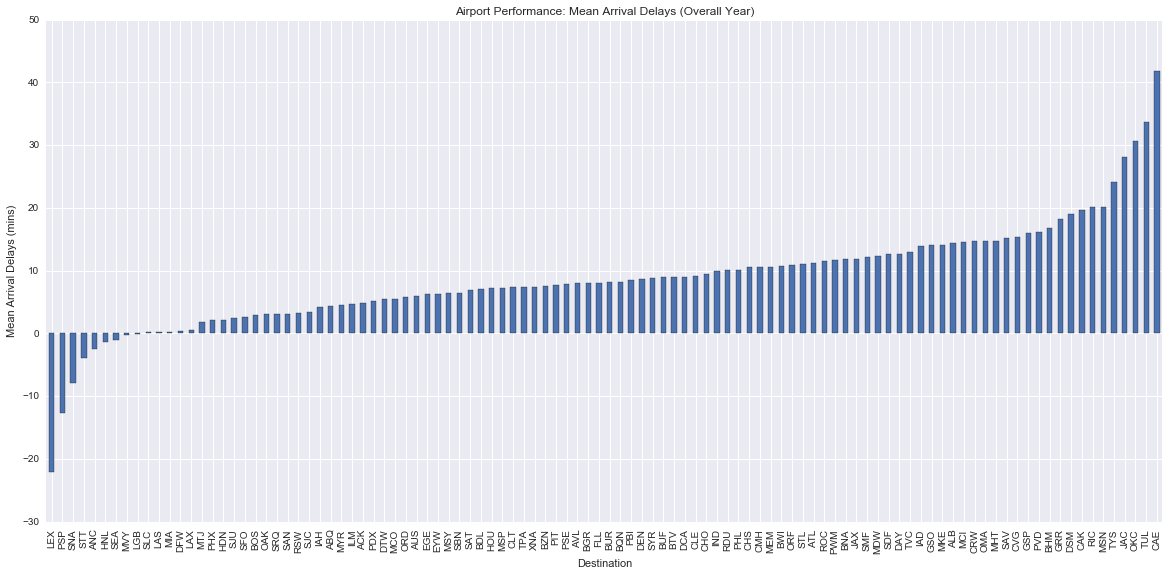

In [183]:
#DATA VISUALISATION via GRAPHS!

#Graphs for Yearly Summary

#Based on Mean Arrival Delay
mean_arr_delay=flight_arr_Summ_Yr['mean_arr_delay']
mean_arr_delay
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Mean Arrival Delays (Overall Year)')
plt.xlabel('Destination')
plt.ylabel('Mean Arrival Delays (mins)');

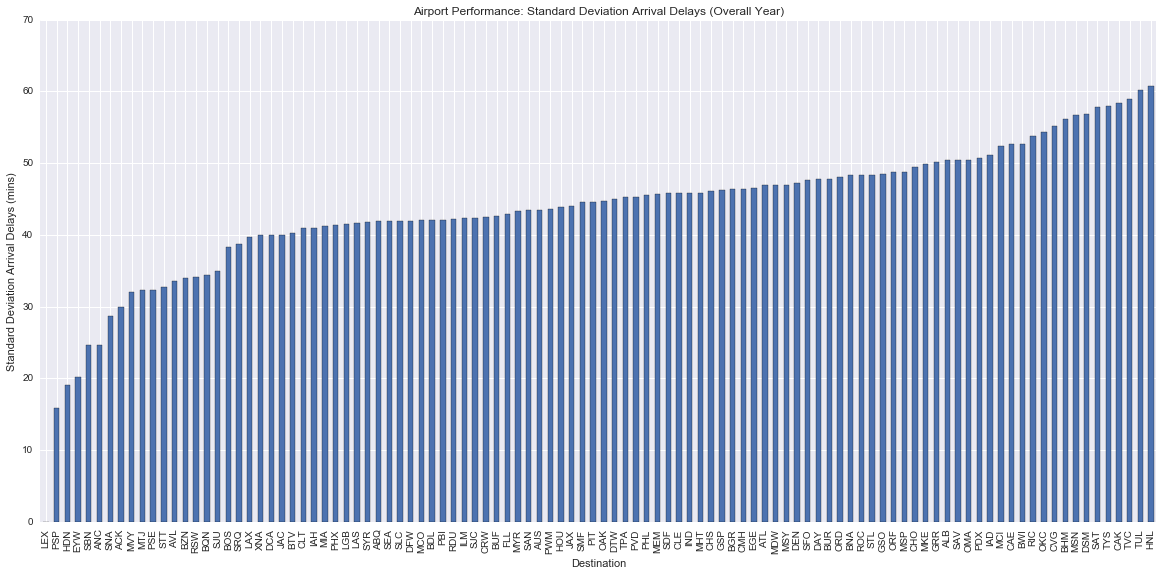

In [186]:
#Graphs for Yearly Summary

#Based on Standard Deviation Arrival Delay

std_arr_delay=flight_arr_Summ_Yr['std_arr_delay']
#std_arr_delay1=std_arr_delay[std_arr_delay.index.isin(['LGA','LEX'])]   - checking plot for NAN value destinations
#std_arr_delay1.sort_values().plot(kind='barh', figsize=[9, 25])
std_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Standard Deviation Arrival Delays (Overall Year)')
plt.xlabel('Destination')
plt.ylabel('Standard Deviation Arrival Delays (mins)')
#std_arr_delay1


In [161]:
#check NAN as identified from Graph
flight_arr_Summ_Yr[flight_arr_Summ_Yr.index=='LGA']

mean_arr_delay  std_arr_delay  min_arr_delay  25%_arr_delay  \
dest                                                                
LGA              NaN            NaN            NaN            NaN   

      median_arr_delay  75%_arr_delay  max_arr_delay  total_arr_num  \
dest                                                                  
LGA                NaN            NaN            NaN              1   

      total_arr_delays_num  arr_delays_%  
dest                                      
LGA                    NaN           NaN

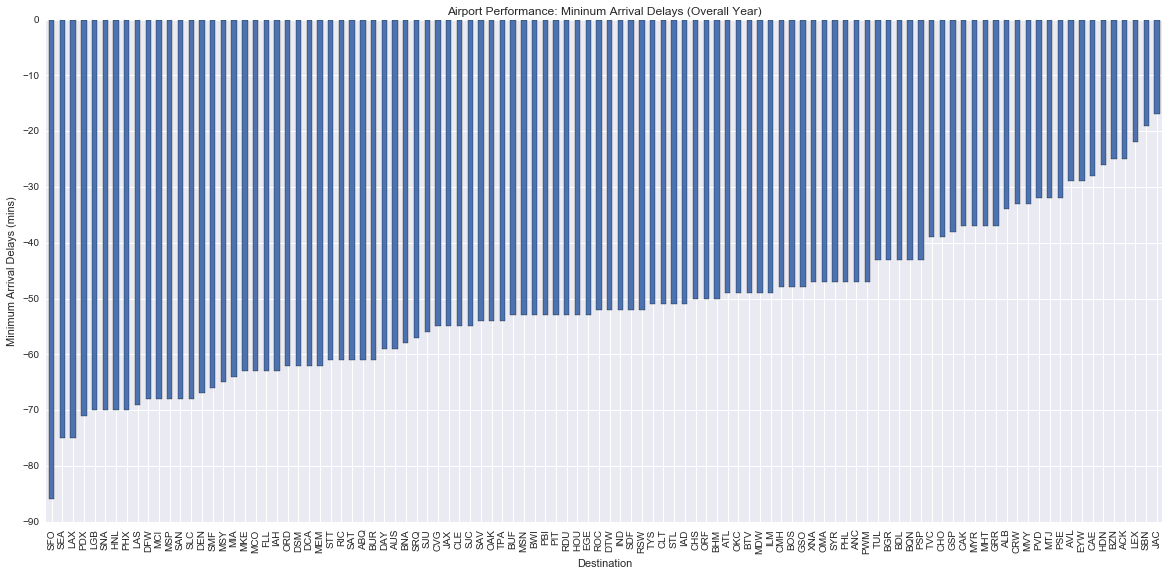

In [187]:
#Graphs for Yearly Summary

#Based on Min Arrival Delay

min_arr_delay=flight_arr_Summ_Yr['min_arr_delay']
min_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Mininum Arrival Delays (Overall Year)')
plt.xlabel('Destination')
plt.ylabel('Minimum Arrival Delays (mins)')


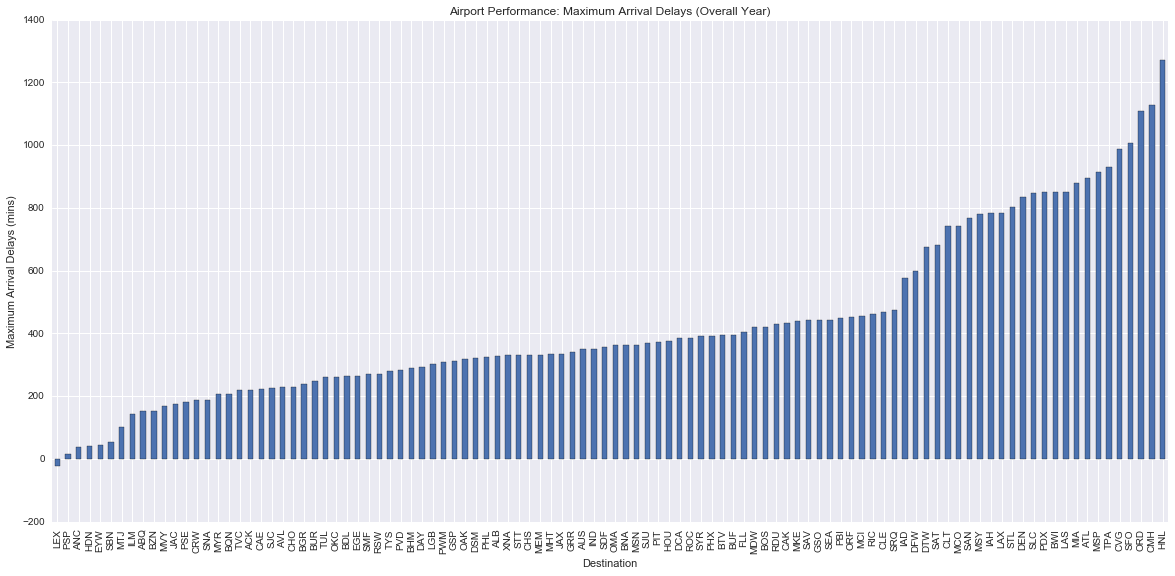

In [188]:
#Graphs for Yearly Summary

#Based on Max Arrival Delay

max_arr_delay=flight_arr_Summ_Yr['max_arr_delay']
max_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Maximum Arrival Delays (Overall Year)')
plt.xlabel('Destination')
plt.ylabel('Maximum Arrival Delays (mins)')

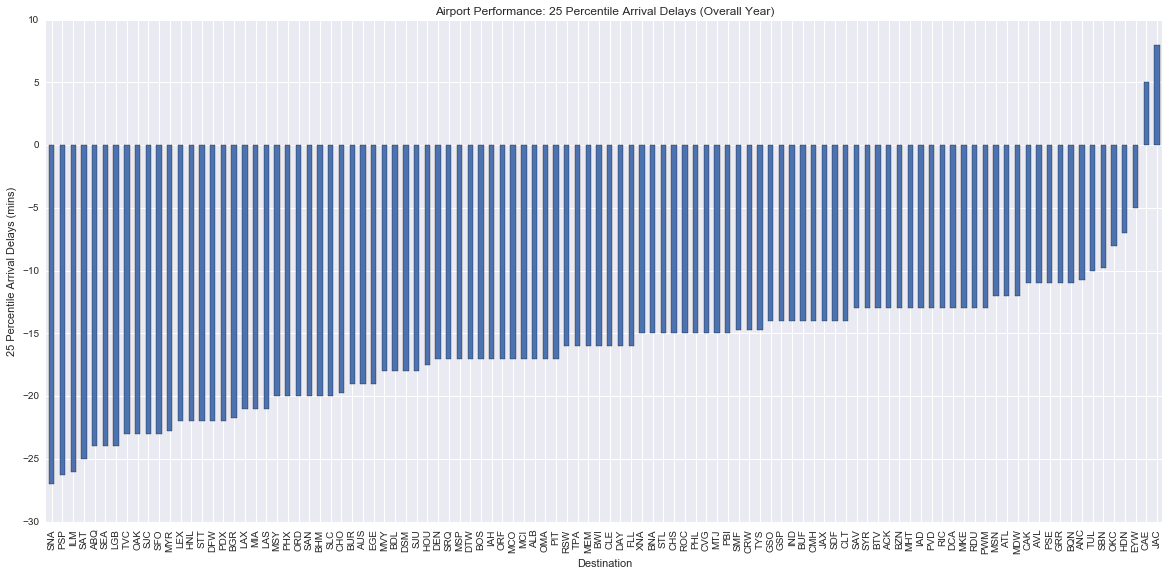

In [189]:
#Graphs for Yearly Summary

#Based on 25th Percentile Delay

p25_arr_delay=flight_arr_Summ_Yr['25%_arr_delay']
p25_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: 25 Percentile Arrival Delays (Overall Year)')
plt.xlabel('Destination')
plt.ylabel('25 Percentile Arrival Delays (mins)')

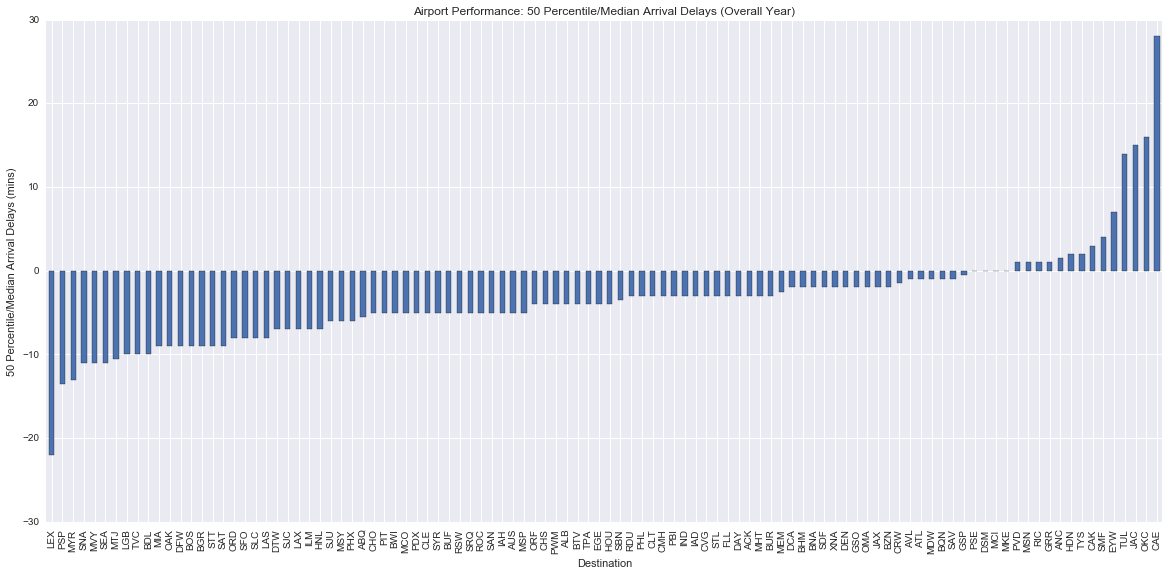

In [191]:
#Graphs for Yearly Summary

#Based on Median 50th Percentile Delay

p50_arr_delay=flight_arr_Summ_Yr['median_arr_delay']
p50_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: 50 Percentile/Median Arrival Delays (Overall Year)')
plt.xlabel('Destination')
plt.ylabel('50 Percentile/Median Arrival Delays (mins)')

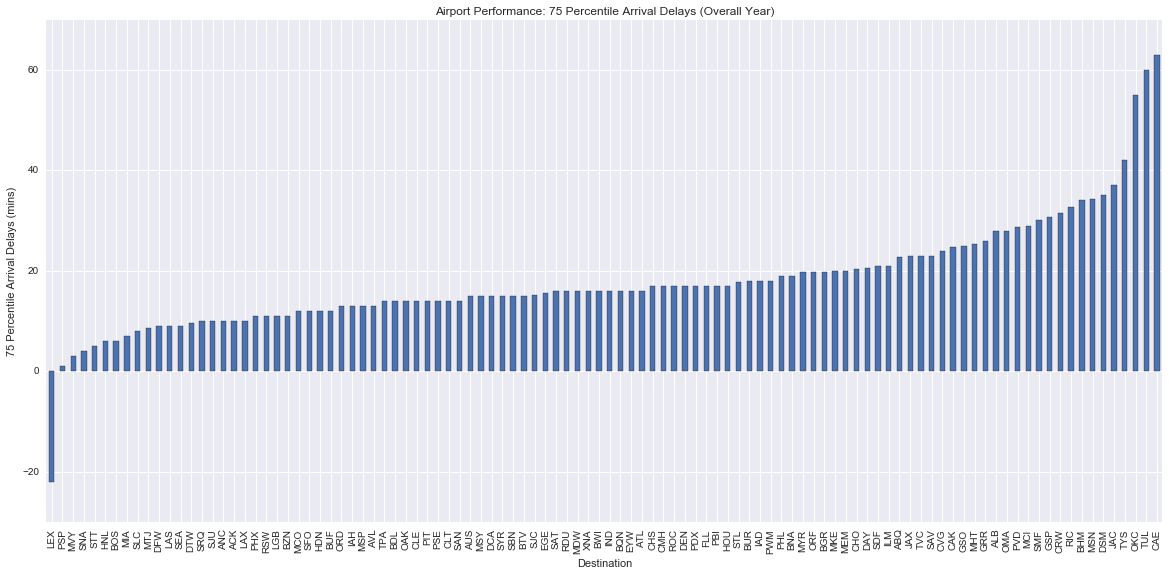

In [192]:
#Graphs for Yearly Summary

#Based on 75th Percentile Delay

p75_arr_delay=flight_arr_Summ_Yr['75%_arr_delay']
p75_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: 75 Percentile Arrival Delays (Overall Year)')
plt.xlabel('Destination')
plt.ylabel('75 Percentile Arrival Delays (mins)')

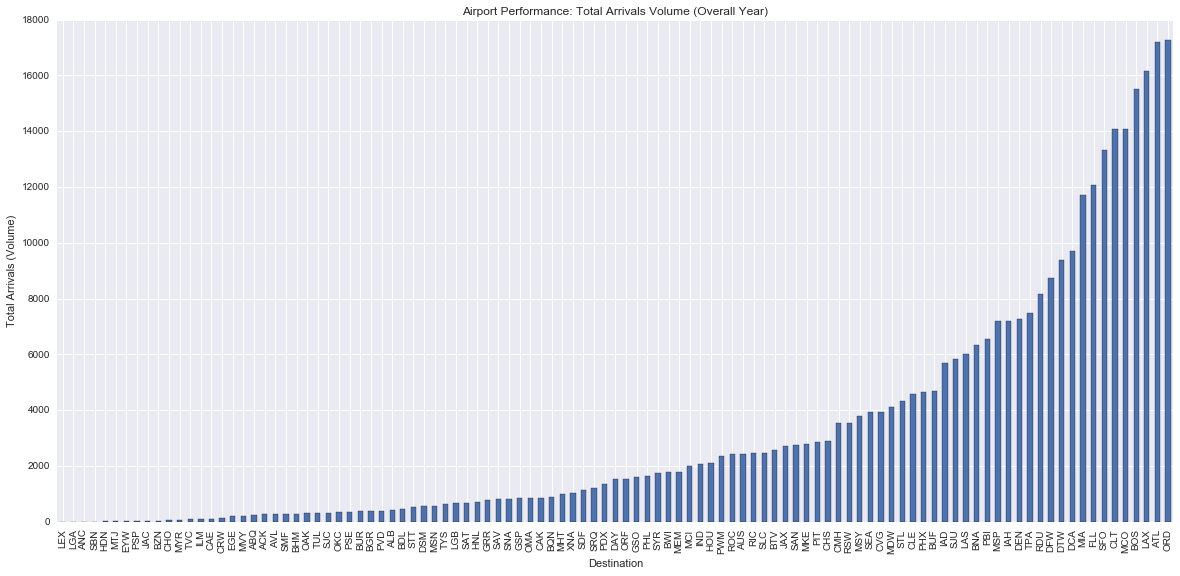

In [194]:
#Graphs for Yearly Summary

#Based on Total Arrivals Volume

tot_arr=flight_arr_Summ_Yr['total_arr_num']
tot_arr.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Total Arrivals Volume (Overall Year)')
plt.xlabel('Destination')
plt.ylabel('Total Arrivals (Volume)')

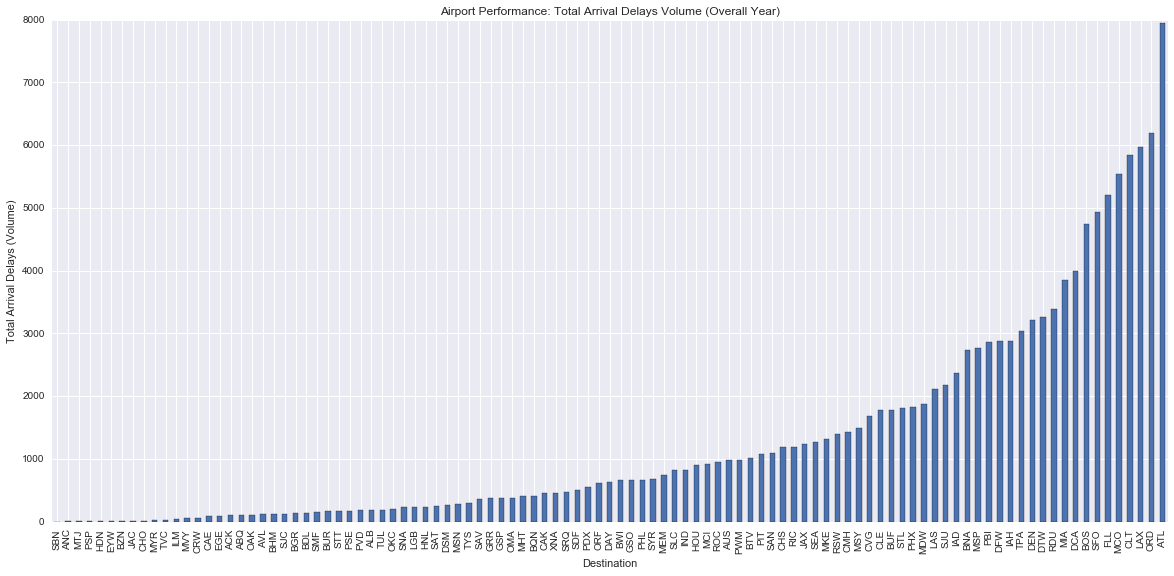

In [195]:
#Graphs for Yearly Summary

#Based on Total Arrival Delays Volume

tot_arr_delays=flight_arr_Summ_Yr['total_arr_delays_num']
tot_arr_delays.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Total Arrival Delays Volume (Overall Year)')
plt.xlabel('Destination')
plt.ylabel('Total Arrival Delays (Volume)')

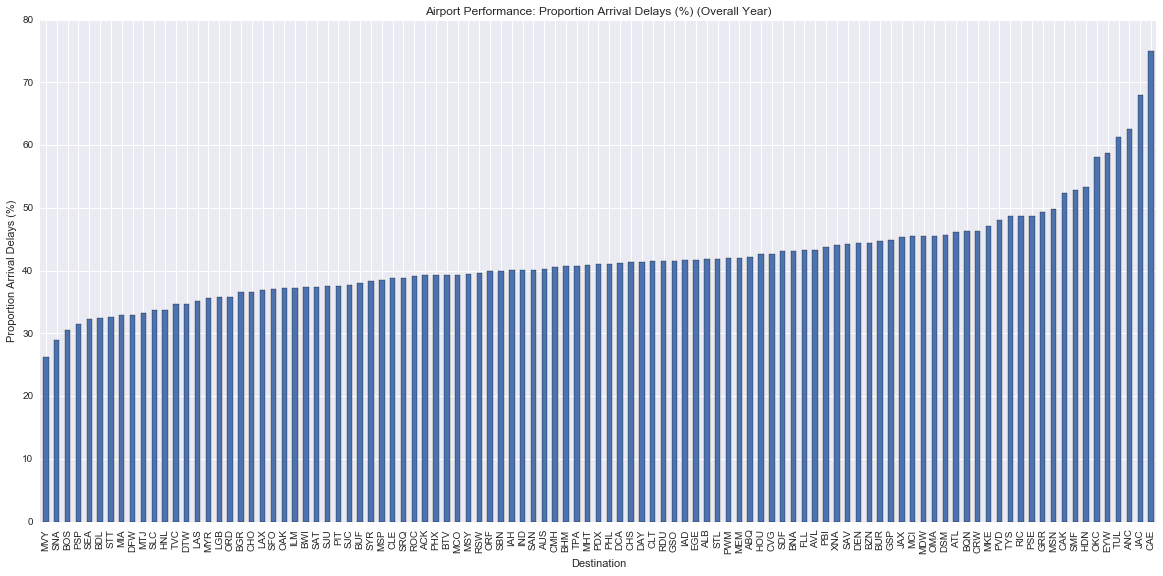

In [196]:
#Graphs for Yearly Summary

#Based on Proportion Arrival Delays Volume

prop_arr_delays=flight_arr_Summ_Yr['arr_delays_%']
prop_arr_delays.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Proportion Arrival Delays (%) (Overall Year)')
plt.xlabel('Destination')
plt.ylabel('Proportion Arrival Delays (%)')

In [ ]:
#PREPARING FINAL DATASET AT MONTHLY LEVEL ANALYSIS for graphs

In [63]:
flight_arr_Summ_mo.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1113 entries, (1, ALB) to (12, XNA)
Data columns (total 10 columns):
mean_arr_delay          1112 non-null float64
std_arr_delay           1112 non-null float64
min_arr_delay           1112 non-null float64
25%_arr_delay           1112 non-null float64
median_arr_delay        1112 non-null float64
75%_arr_delay           1112 non-null float64
max_arr_delay           1112 non-null float64
total_arr_num           1113 non-null int64
total_arr_delays_num    1101 non-null float64
arr_delays_%            1101 non-null float64
dtypes: float64(9), int64(1)
memory usage: 91.3+ KB


In [64]:
flight_arr_Summ_mo.reset_index('month', inplace=True)

In [65]:
flight_arr_Summ_mo

month  mean_arr_delay  std_arr_delay  min_arr_delay  25%_arr_delay  \
dest                                                                       
ALB       1       35.174603      67.516850          -23.0         -10.00   
ATL       1        4.152047      34.161792          -47.0         -13.00   
AUS       1        8.715976      48.454967          -50.0         -17.00   
AVL       1       23.500000      39.500000          -16.0           3.75   
BDL       1       10.972973      50.518654          -26.0         -17.00   
BHM       1       16.695652      68.474962          -50.0         -25.50   
BNA       1       12.702842      46.921916          -43.0         -14.00   
BOS       1       -2.537891      28.601617          -48.0         -18.00   
BQN       1        2.645161      29.853638          -26.0         -13.00   
BTV       1        6.665158      36.399569          -28.0         -13.00   
BUF       1       11.165468      39.616979          -37.0         -12.00   
BUR       1       -2.000000      28.396802          -41.0         -22.00   
BWI       1       16.679868      70.423939          -34.0         -12.00   
BZN       1        9.500000      11.500000           -8.0           4.75   
CAE       1       55.875000      48.537196           -6.0          16.25   
CAK       1        2.177419      29.049193          -30.0         -13.75   
CHS       1       12.282353      34.086952          -30.0         -11.00   
CLE       1        2.963415      31.119614          -42.0         -15.00   
CLT       1        7.109284      33.747536          -41.0         -12.00   
CMH       1        7.404669      28.902756          -29.0         -11.00   
CRW       1       11.703704      33.098970          -26.0         -12.50   
CVG       1       20.687500      51.890454          -40.0          -8.00   
DAY       1       30.671233      55.477517          -19.0          -5.00   
DCA       1        9.953545      39.308513          -42.0         -10.00   
DEN       1       11.001779      39.528966          -45.0          -8.00   
DFW       1        3.145140      32.164879          -45.0         -18.00   
DSM       1       53.583333      68.039766          -14.0           4.75   
DTW       1        6.117493      36.349863          -44.0         -14.00   
EGE       1       11.483871      43.563355          -41.0         -10.75   
EYW       1       45.000000       0.000000           45.0          45.00   
...     ...             ...            ...            ...            ...   
PHX      12       14.101523      46.854942          -63.0         -12.00   
PIT      12       15.230415      42.303298          -34.0         -11.00   
PSE      12       17.000000      30.743476          -12.0          -0.50   
PSP      12       -5.000000       6.000000          -11.0          -8.00   
PVD      12        7.521739      28.171632          -26.0         -15.50   
PWM      12       19.687943      46.147487          -25.0          -8.00   
RDU      12       16.726968      42.824688          -43.0         -10.00   
RIC      12       27.532520      58.959171          -49.0         -12.00   
ROC      12       16.022321      51.676746          -39.0         -11.00   
RSW      12       12.846591      38.444386          -33.0         -11.25   
SAN      12       13.555556      43.350709          -67.0         -12.25   
SAT      12       25.931034     101.695601          -37.0         -13.00   
SAV      12       31.351852      81.437355          -32.0         -12.25   
SBN      12        0.000000       0.000000            0.0           0.00   
SDF      12        8.623377      36.950314          -40.0         -14.00   
SEA      12       11.372414      37.181001          -50.0         -12.00   
SFO      12        5.722174      38.339955          -64.0         -17.00   
SJC      12        7.178571      33.515512          -40.0         -14.75   
SJU      12       10.375691      40.699848          -46.0         -14.50   
SLC      12       15.906250      71.560519          -2

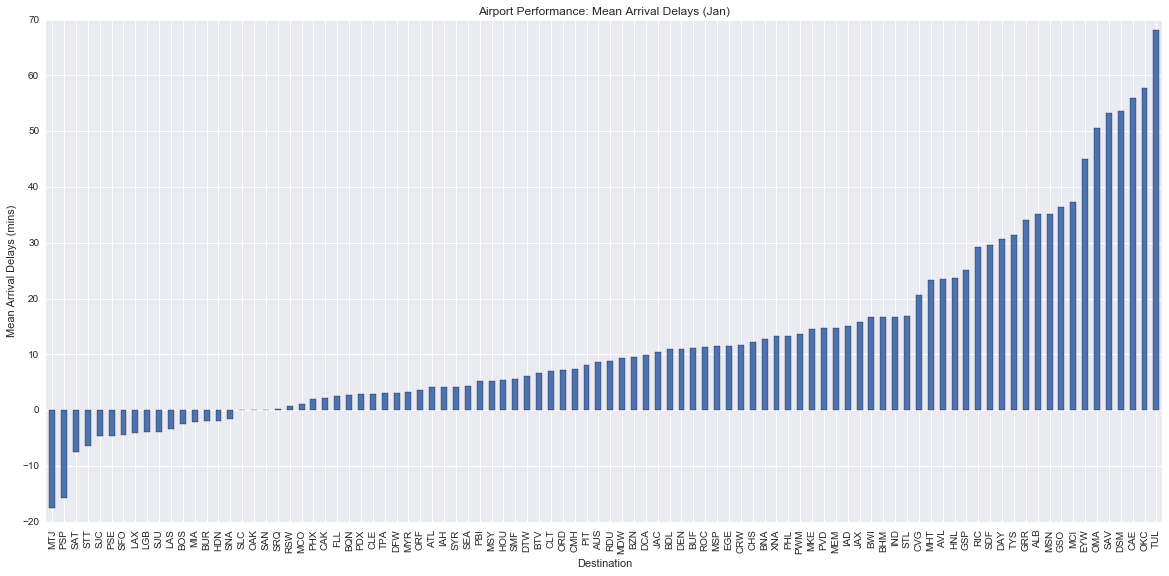

In [239]:
                              #Graphs for Monthly Summary

#Based on Mean Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==1]
mean_arr_delay=flight_arr_month['mean_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Mean Arrival Delays (Jan)')
plt.xlabel('Destination')
plt.ylabel('Mean Arrival Delays (mins)')




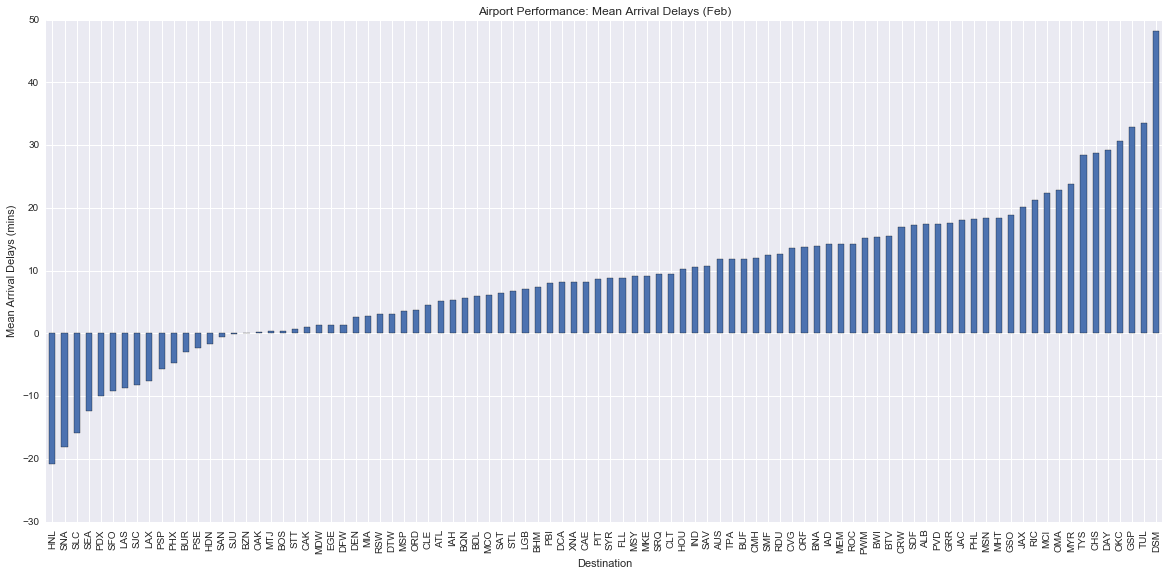

In [238]:
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==2]
mean_arr_delay=flight_arr_month['mean_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Mean Arrival Delays (Feb)')
plt.xlabel('Destination')
plt.ylabel('Mean Arrival Delays (mins)')


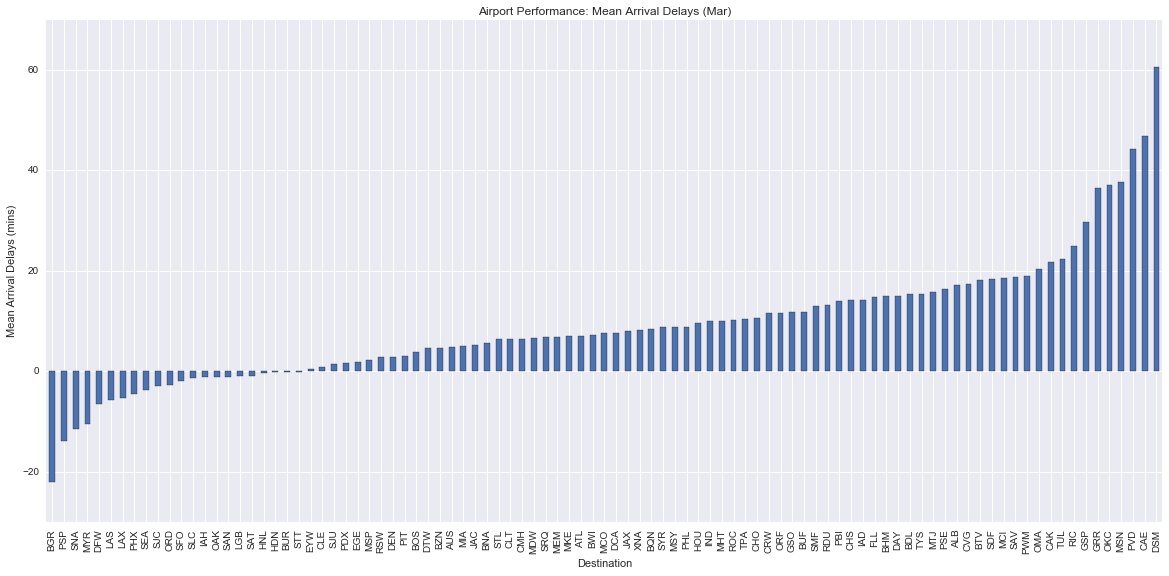

In [237]:
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==3]
mean_arr_delay=flight_arr_month['mean_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Mean Arrival Delays (Mar)')
plt.xlabel('Destination')
plt.ylabel('Mean Arrival Delays (mins)')



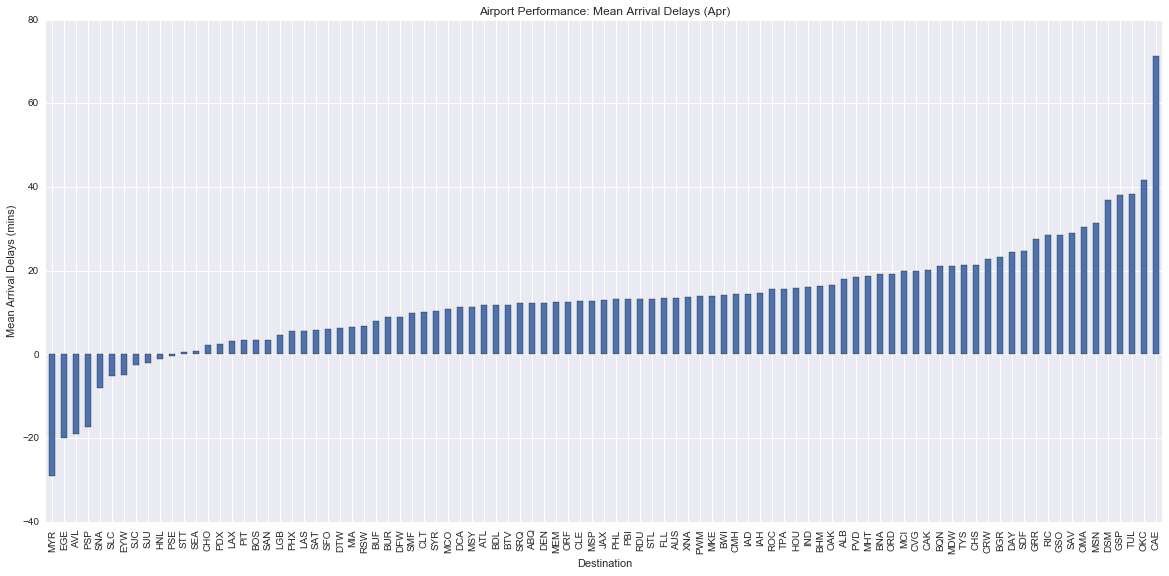

In [240]:
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==4]
mean_arr_delay=flight_arr_month['mean_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Mean Arrival Delays (Apr)')
plt.xlabel('Destination')
plt.ylabel('Mean Arrival Delays (mins)')


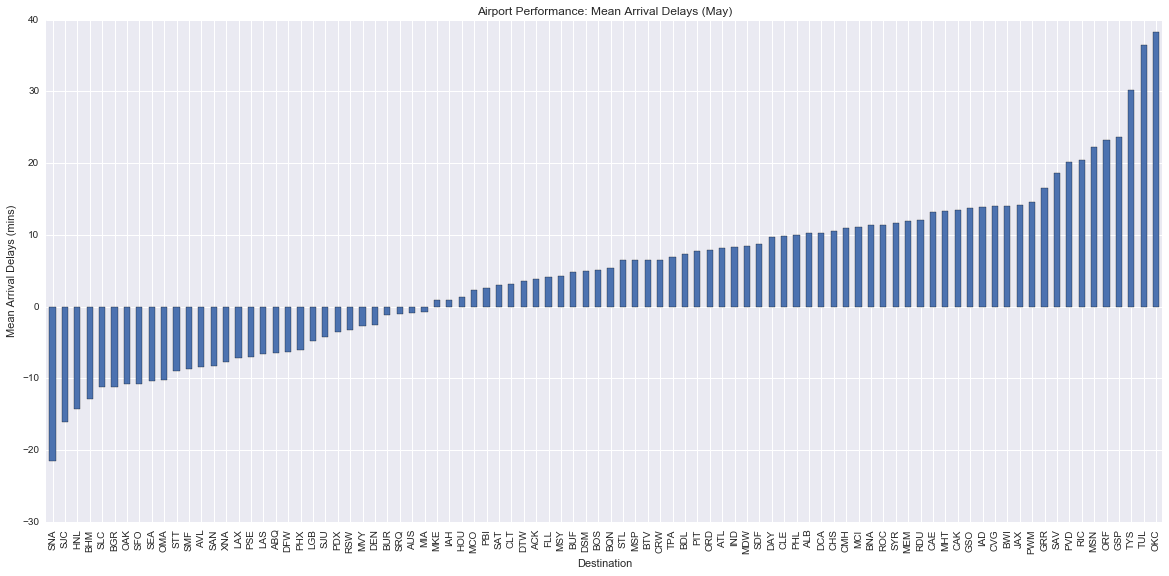

In [241]:
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==5]
mean_arr_delay=flight_arr_month['mean_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Mean Arrival Delays (May)')
plt.xlabel('Destination')
plt.ylabel('Mean Arrival Delays (mins)')

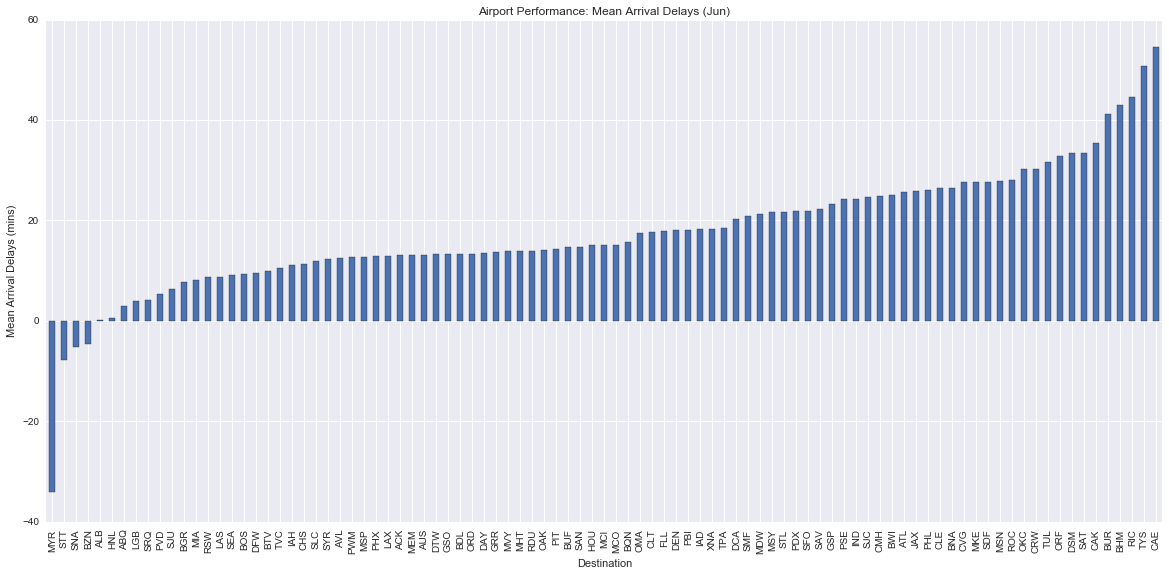

In [242]:
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==6]
mean_arr_delay=flight_arr_month['mean_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Mean Arrival Delays (Jun)')
plt.xlabel('Destination')
plt.ylabel('Mean Arrival Delays (mins)')

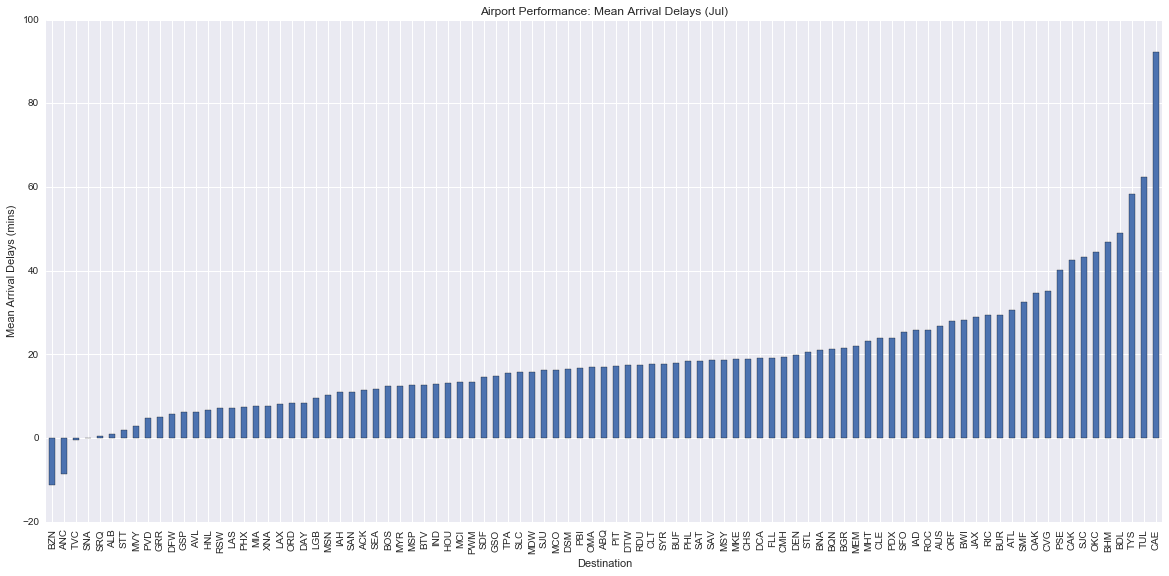

In [243]:
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==7]
mean_arr_delay=flight_arr_month['mean_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Mean Arrival Delays (Jul)')
plt.xlabel('Destination')
plt.ylabel('Mean Arrival Delays (mins)')

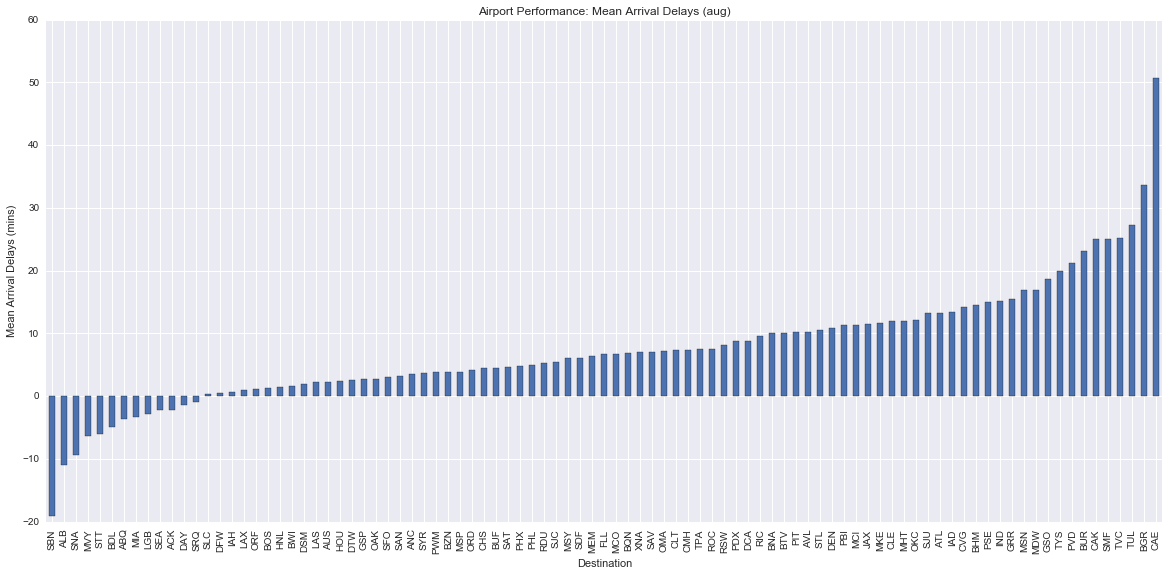

In [244]:
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==8]
mean_arr_delay=flight_arr_month['mean_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Mean Arrival Delays (aug)')
plt.xlabel('Destination')
plt.ylabel('Mean Arrival Delays (mins)')

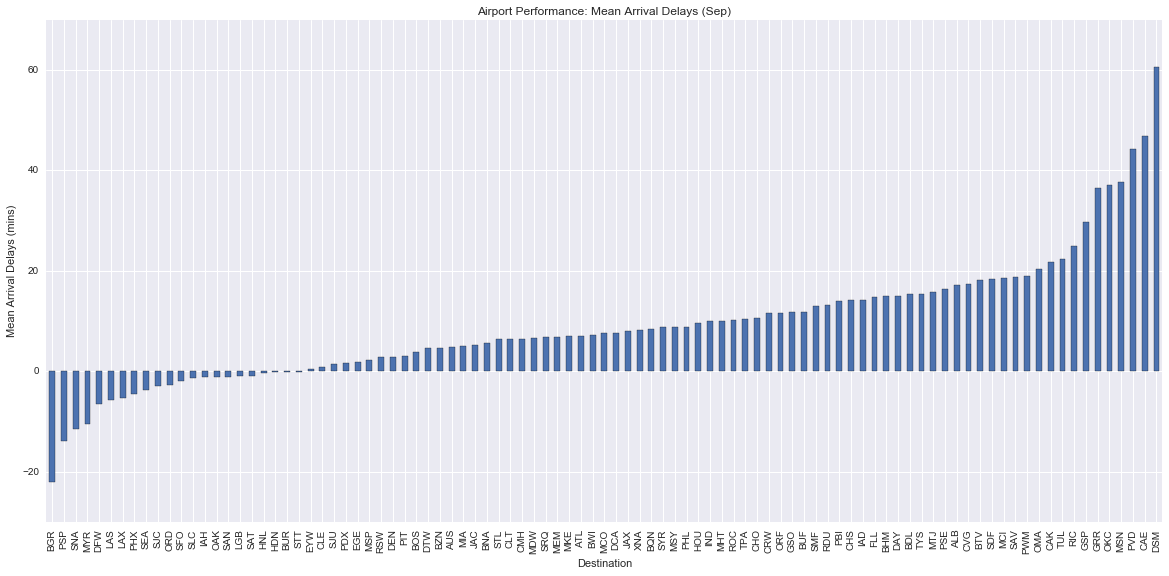

In [229]:
light_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==9]
mean_arr_delay=flight_arr_month['mean_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Mean Arrival Delays (Sep)')
plt.xlabel('Destination')
plt.ylabel('Mean Arrival Delays (mins)')

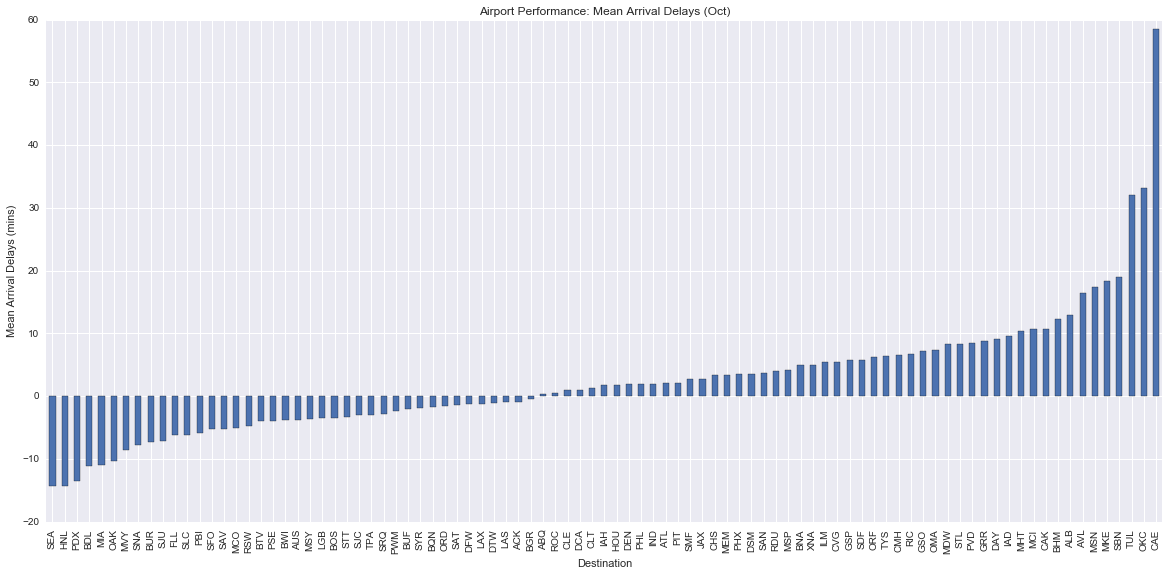

In [246]:
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==10]
mean_arr_delay=flight_arr_month['mean_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Mean Arrival Delays (Oct)')
plt.xlabel('Destination')
plt.ylabel('Mean Arrival Delays (mins)')

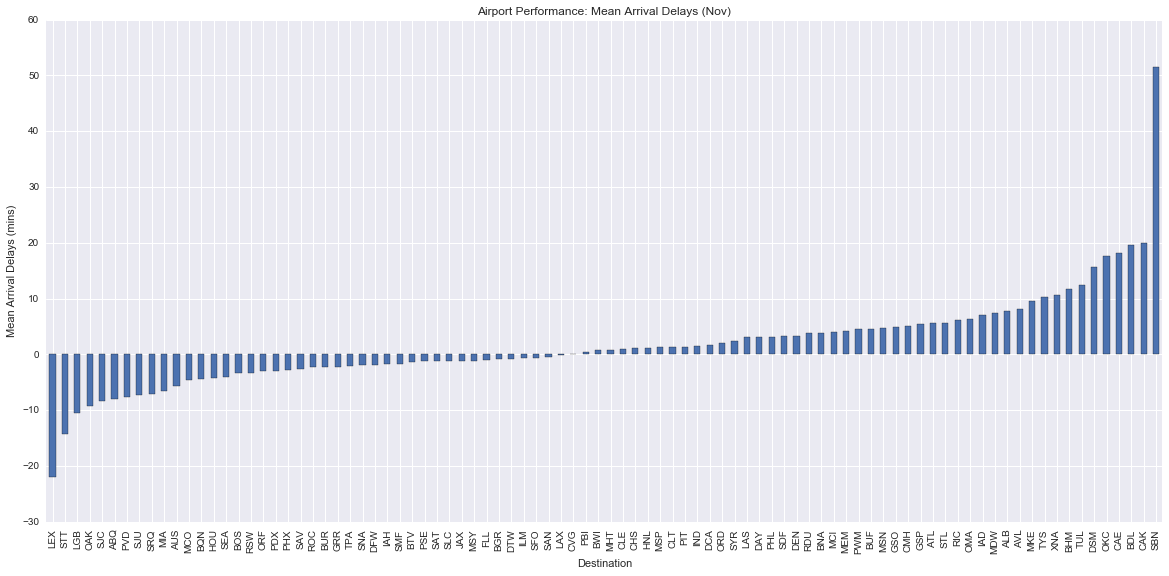

In [247]:
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==11]
mean_arr_delay=flight_arr_month['mean_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Mean Arrival Delays (Nov)')
plt.xlabel('Destination')
plt.ylabel('Mean Arrival Delays (mins)')

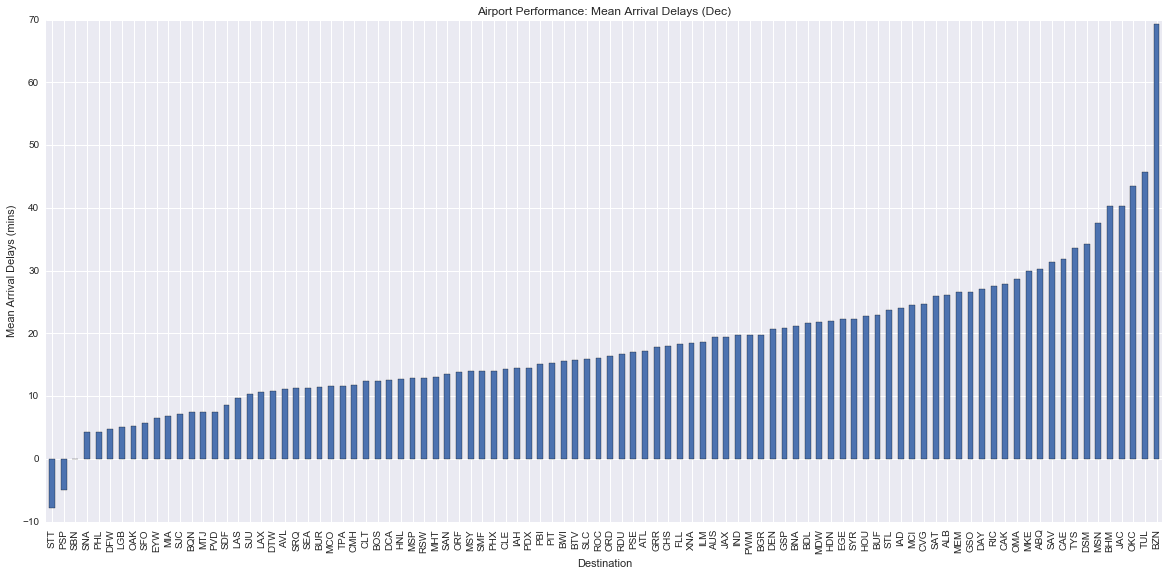

In [248]:
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==12]
mean_arr_delay=flight_arr_month['mean_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Mean Arrival Delays (Dec)')
plt.xlabel('Destination')
plt.ylabel('Mean Arrival Delays (mins)')

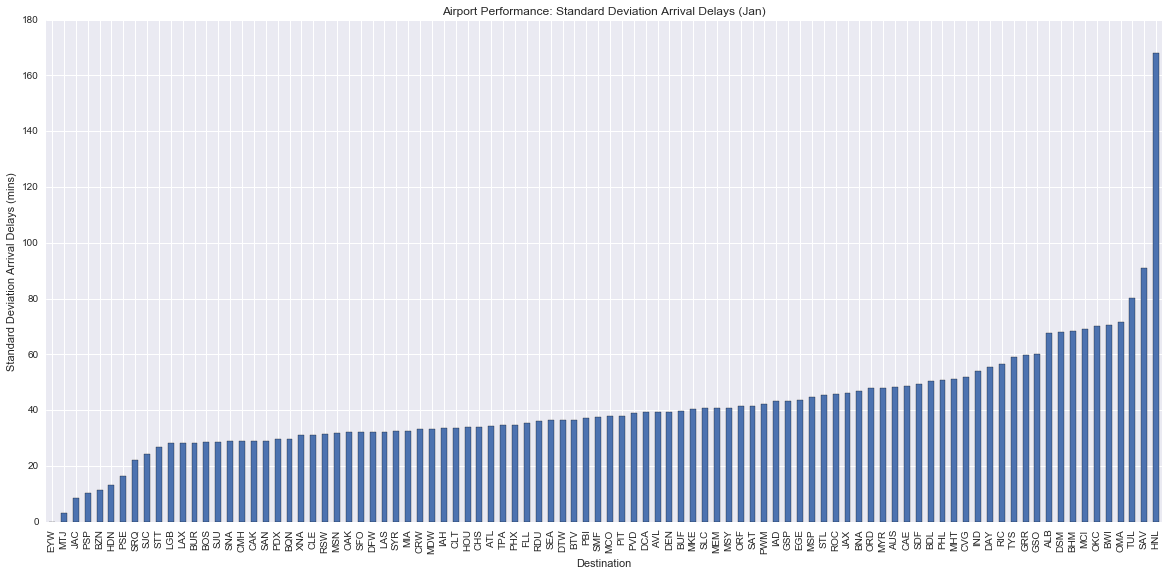

In [249]:
#Graphs for Monthly Summary

#Based on Standard Deviation Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==1]
mean_arr_delay=flight_arr_month['std_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Standard Deviation Arrival Delays (Jan)')
plt.xlabel('Destination')
plt.ylabel('Standard Deviation Arrival Delays (mins)')

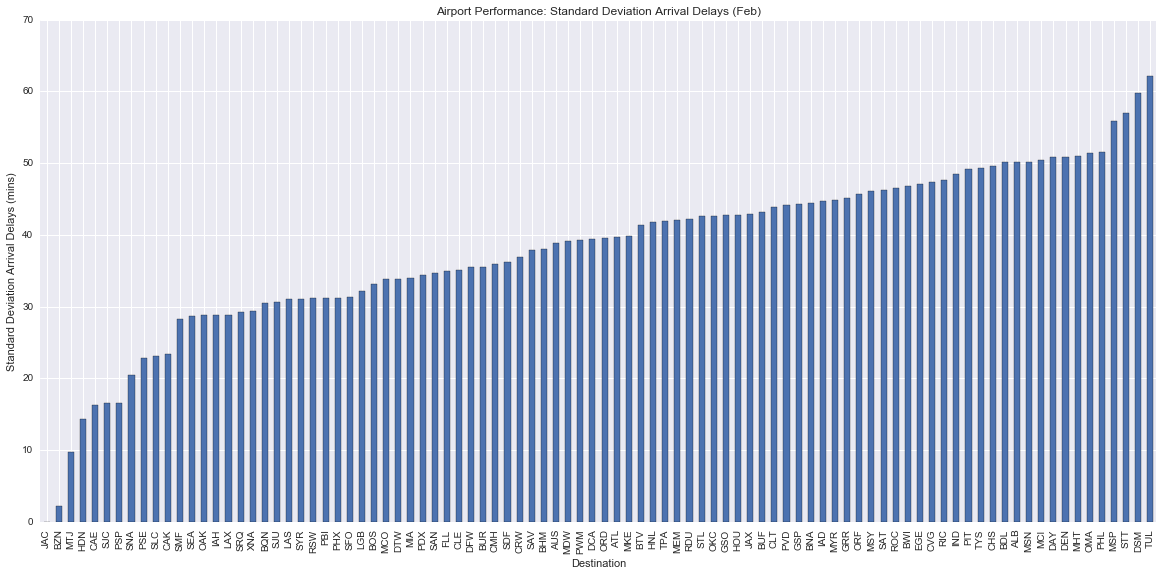

In [250]:
#Graphs for Monthly Summary

#Based on Standard Deviation Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==2]
mean_arr_delay=flight_arr_month['std_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Standard Deviation Arrival Delays (Feb)')
plt.xlabel('Destination')
plt.ylabel('Standard Deviation Arrival Delays (mins)')

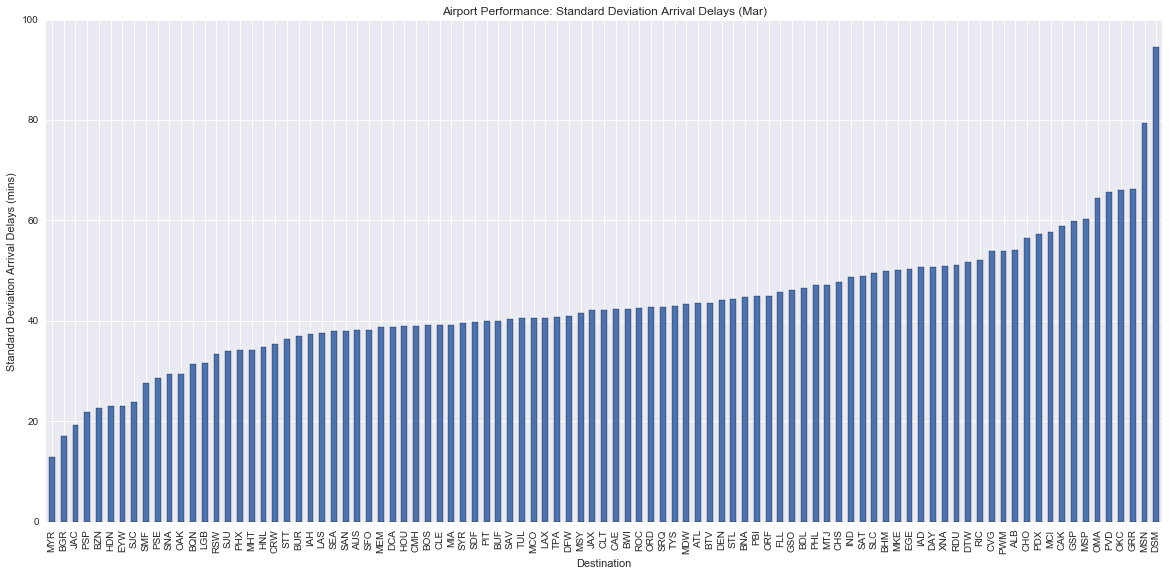

In [251]:
#Graphs for Monthly Summary

#Based on Standard Deviation Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==3]
mean_arr_delay=flight_arr_month['std_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Standard Deviation Arrival Delays (Mar)')
plt.xlabel('Destination')
plt.ylabel('Standard Deviation Arrival Delays (mins)')

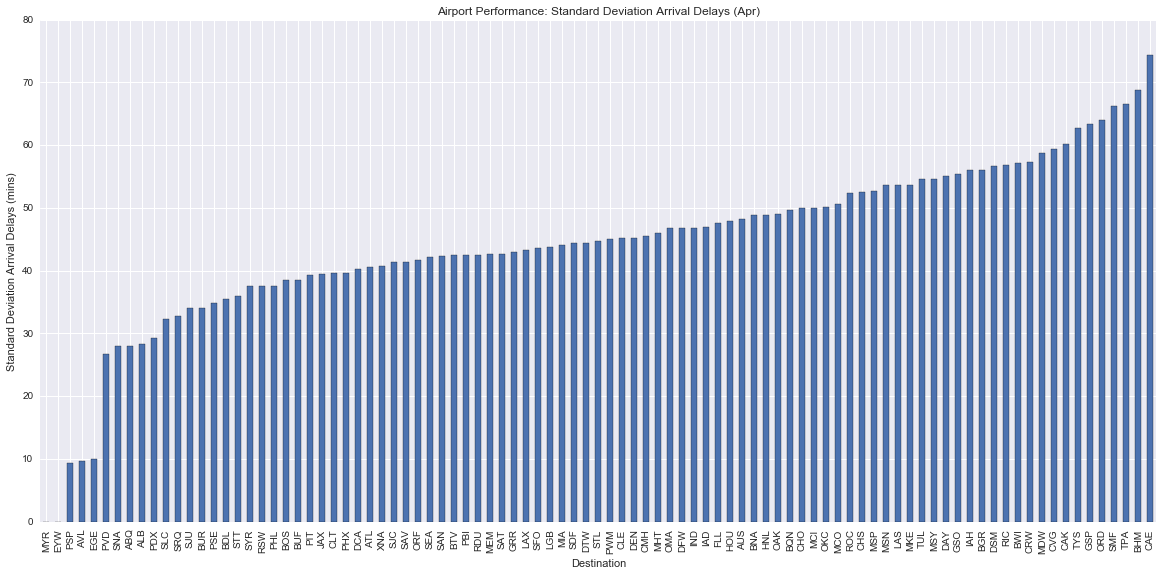

In [252]:
#Graphs for Monthly Summary

#Based on Standard Deviation Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==4]
mean_arr_delay=flight_arr_month['std_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Standard Deviation Arrival Delays (Apr)')
plt.xlabel('Destination')
plt.ylabel('Standard Deviation Arrival Delays (mins)')

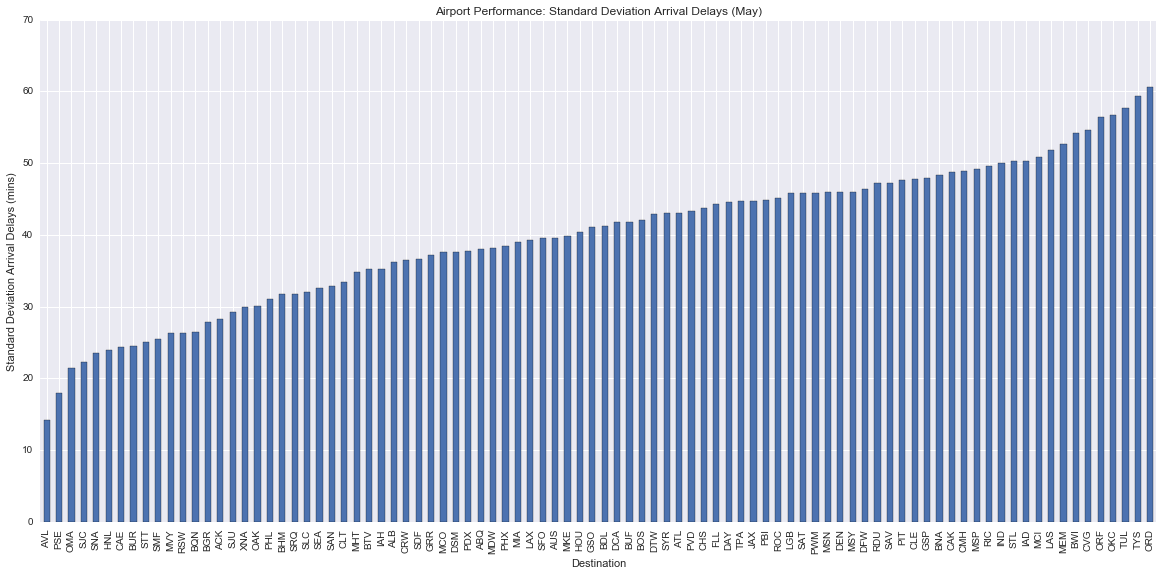

In [253]:
#Graphs for Monthly Summary

#Based on Standard Deviation Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==5]
mean_arr_delay=flight_arr_month['std_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Standard Deviation Arrival Delays (May)')
plt.xlabel('Destination')
plt.ylabel('Standard Deviation Arrival Delays (mins)')

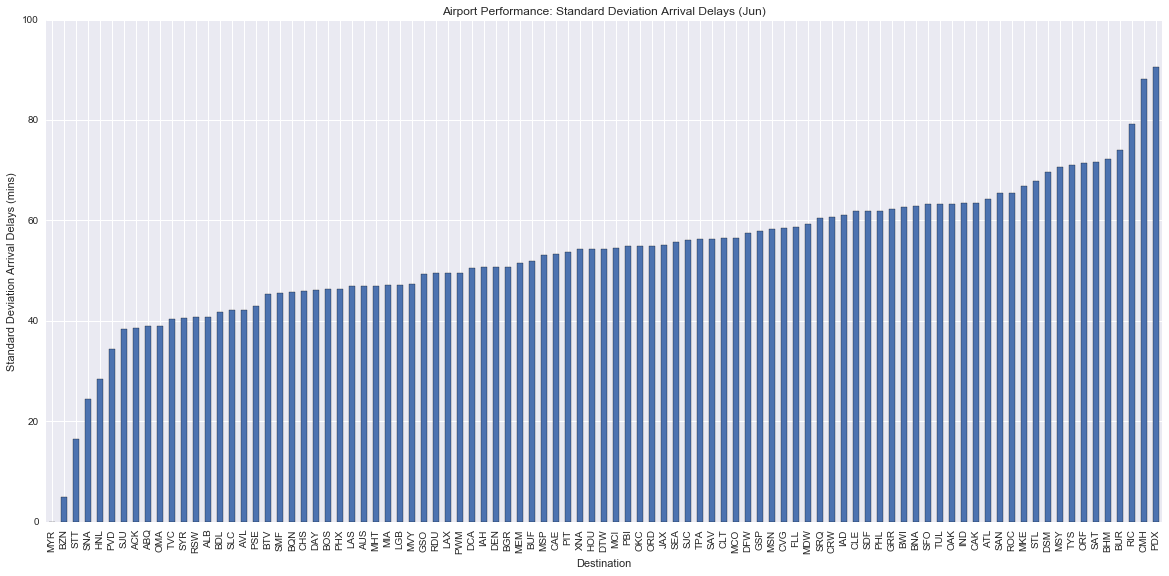

In [254]:
#Graphs for Monthly Summary

#Based on Standard Deviation Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==6]
mean_arr_delay=flight_arr_month['std_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Standard Deviation Arrival Delays (Jun)')
plt.xlabel('Destination')
plt.ylabel('Standard Deviation Arrival Delays (mins)')

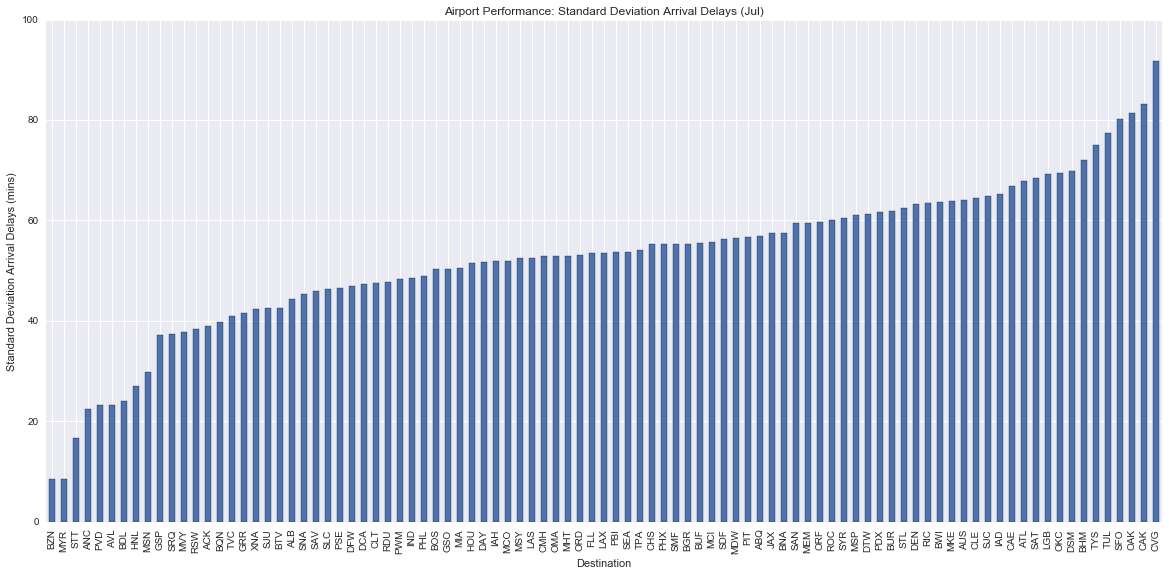

In [255]:
#Graphs for Monthly Summary

#Based on Standard Deviation Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==7]
mean_arr_delay=flight_arr_month['std_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Standard Deviation Arrival Delays (Jul)')
plt.xlabel('Destination')
plt.ylabel('Standard Deviation Arrival Delays (mins)')

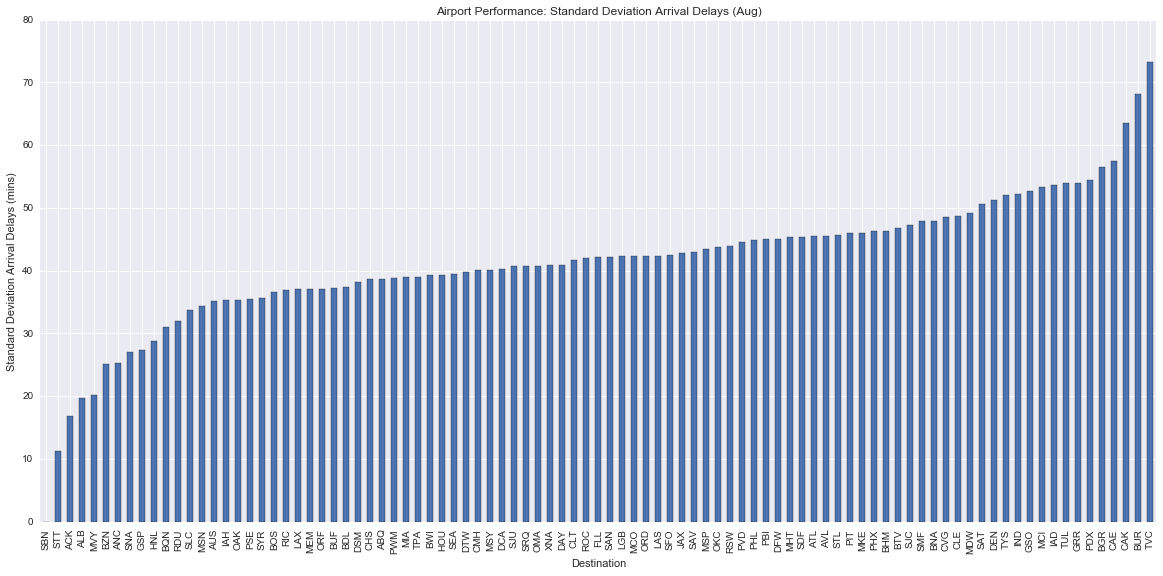

In [256]:
#Graphs for Monthly Summary

#Based on Standard Deviation Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==8]
mean_arr_delay=flight_arr_month['std_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Standard Deviation Arrival Delays (Aug)')
plt.xlabel('Destination')
plt.ylabel('Standard Deviation Arrival Delays (mins)')

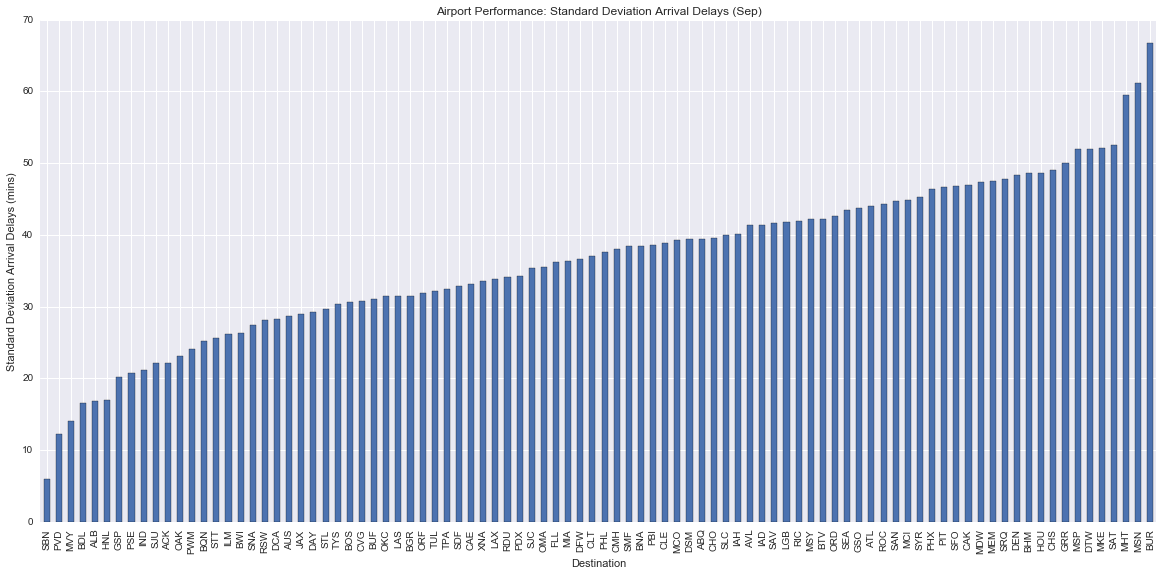

In [257]:
#Graphs for Monthly Summary

#Based on Standard Deviation Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==9]
mean_arr_delay=flight_arr_month['std_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Standard Deviation Arrival Delays (Sep)')
plt.xlabel('Destination')
plt.ylabel('Standard Deviation Arrival Delays (mins)')

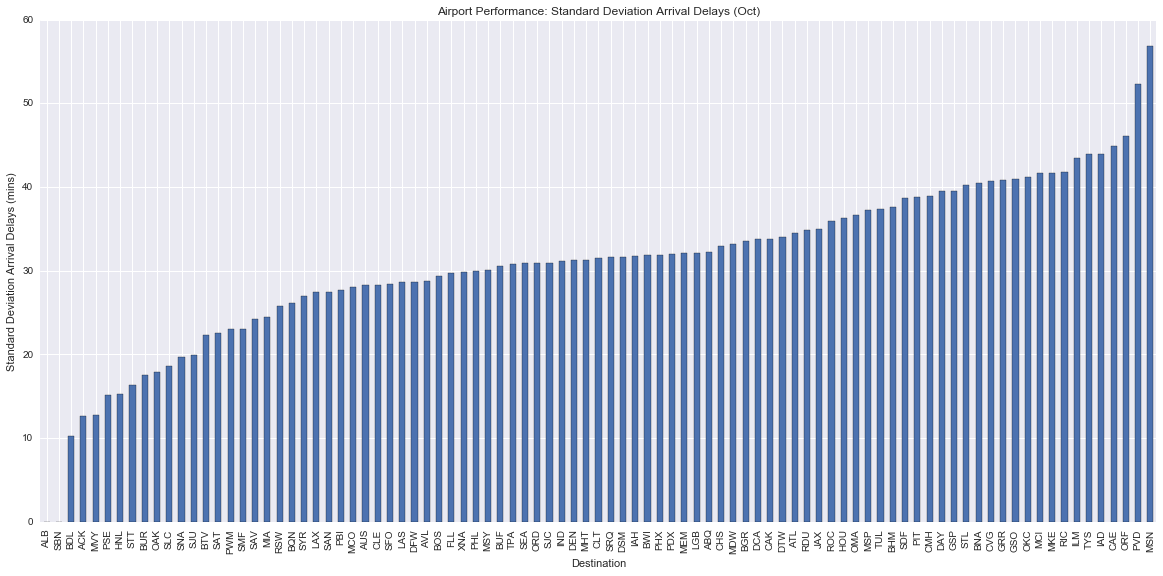

In [258]:
#Graphs for Monthly Summary

#Based on Standard Deviation Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==10]
mean_arr_delay=flight_arr_month['std_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Standard Deviation Arrival Delays (Oct)')
plt.xlabel('Destination')
plt.ylabel('Standard Deviation Arrival Delays (mins)')

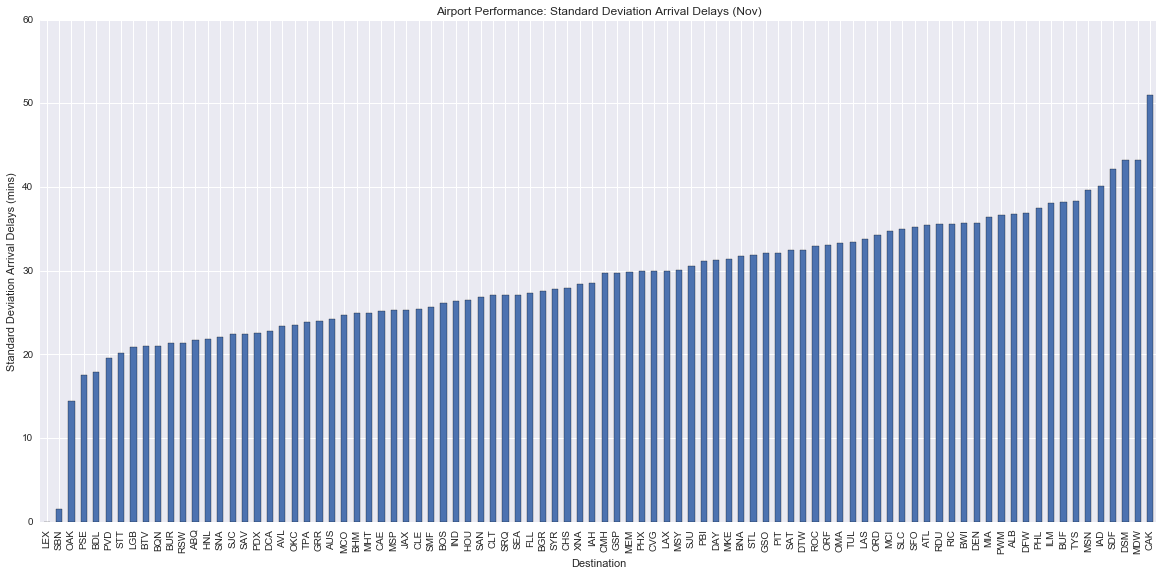

In [259]:
#Graphs for Monthly Summary

#Based on Standard Deviation Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==11]
mean_arr_delay=flight_arr_month['std_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Standard Deviation Arrival Delays (Nov)')
plt.xlabel('Destination')
plt.ylabel('Standard Deviation Arrival Delays (mins)')

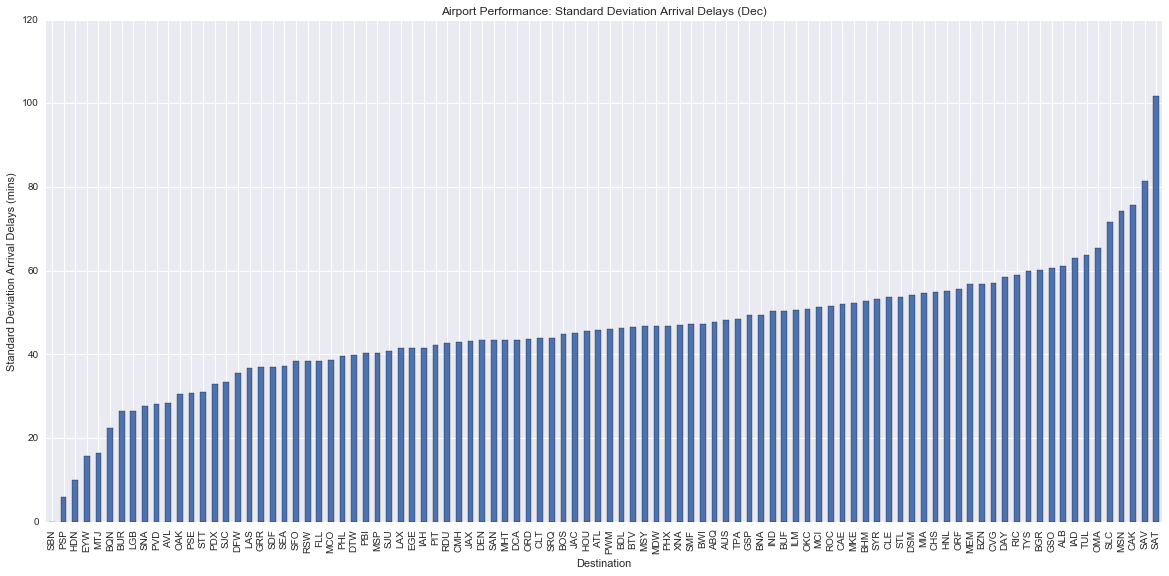

In [260]:
#Graphs for Monthly Summary

#Based on Standard Deviation Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==12]
mean_arr_delay=flight_arr_month['std_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Standard Deviation Arrival Delays (Dec)')
plt.xlabel('Destination')
plt.ylabel('Standard Deviation Arrival Delays (mins)')

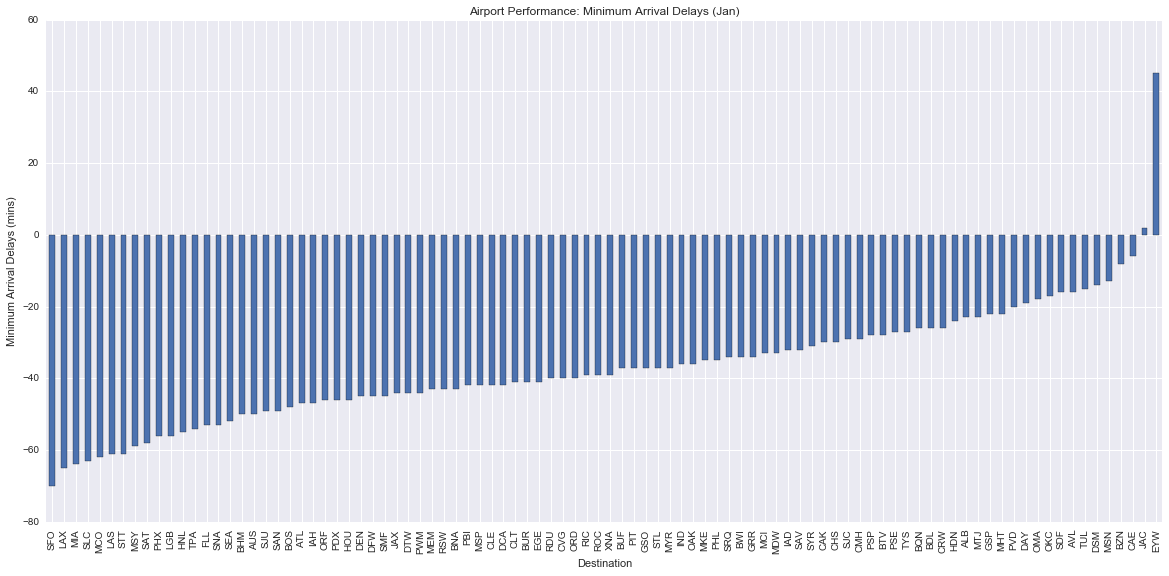

In [262]:
#Graphs for Monthly Summary

#Based on MINIMUM Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==1]
mean_arr_delay=flight_arr_month['min_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Minimum Arrival Delays (Jan)')
plt.xlabel('Destination')
plt.ylabel('Minimum Arrival Delays (mins)')

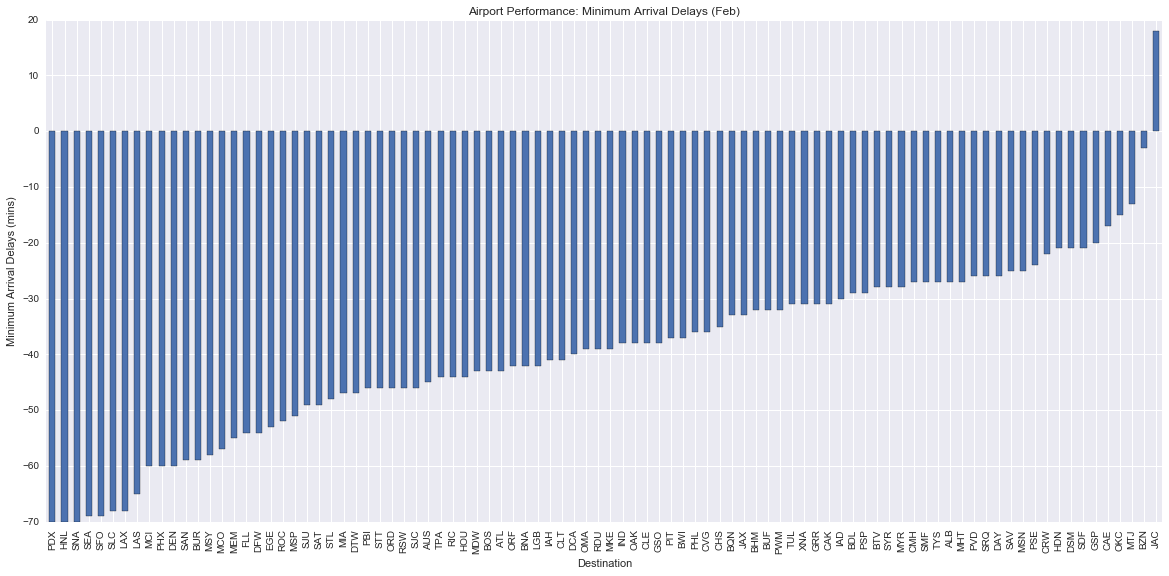

In [263]:
#Graphs for Monthly Summary

#Based on MINIMUM Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==2]
mean_arr_delay=flight_arr_month['min_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Minimum Arrival Delays (Feb)')
plt.xlabel('Destination')
plt.ylabel('Minimum Arrival Delays (mins)')

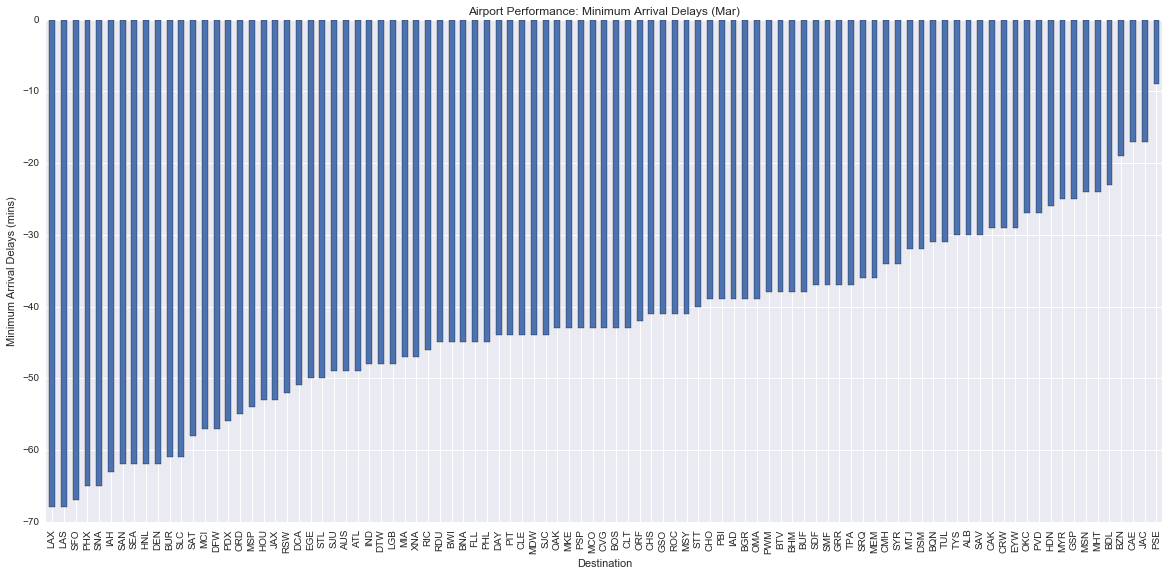

In [264]:
#Graphs for Monthly Summary

#Based on MINIMUM Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==3]
mean_arr_delay=flight_arr_month['min_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Minimum Arrival Delays (Mar)')
plt.xlabel('Destination')
plt.ylabel('Minimum Arrival Delays (mins)')

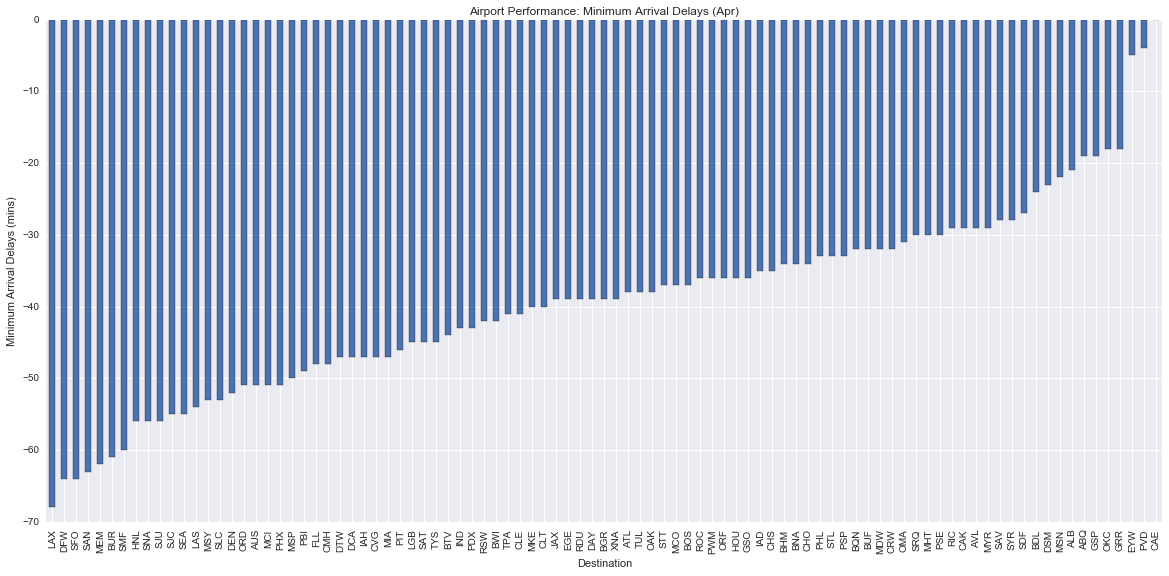

In [265]:
#Graphs for Monthly Summary

#Based on MINIMUM Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==4]
mean_arr_delay=flight_arr_month['min_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Minimum Arrival Delays (Apr)')
plt.xlabel('Destination')
plt.ylabel('Minimum Arrival Delays (mins)')

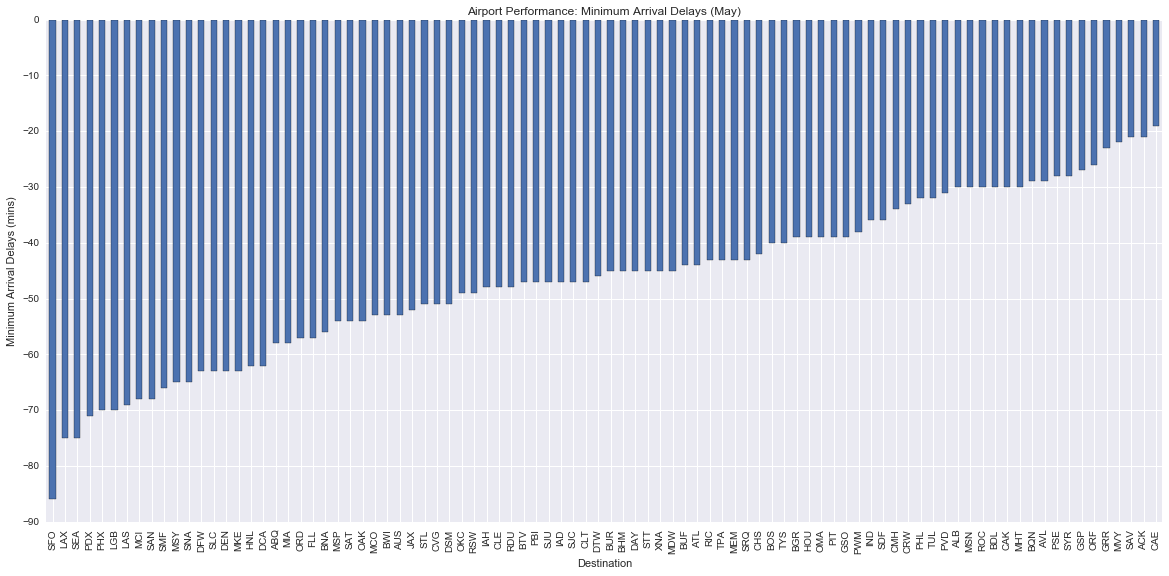

In [266]:
#Graphs for Monthly Summary

#Based on MINIMUM Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==5]
mean_arr_delay=flight_arr_month['min_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Minimum Arrival Delays (May)')
plt.xlabel('Destination')
plt.ylabel('Minimum Arrival Delays (mins)')

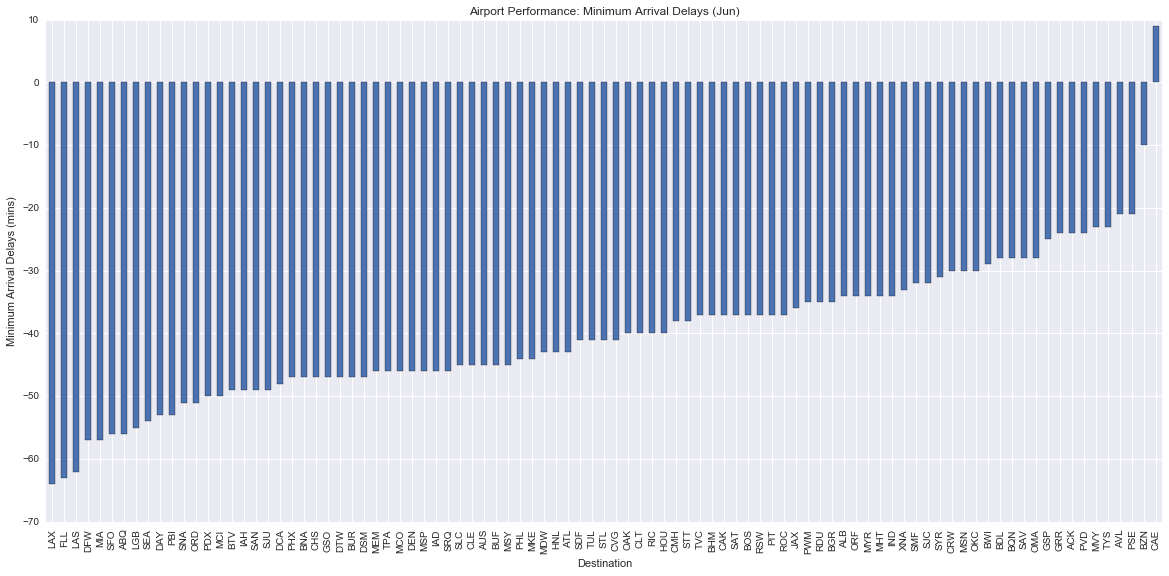

In [267]:
#Graphs for Monthly Summary

#Based on MINIMUM Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==6]
mean_arr_delay=flight_arr_month['min_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Minimum Arrival Delays (Jun)')
plt.xlabel('Destination')
plt.ylabel('Minimum Arrival Delays (mins)')

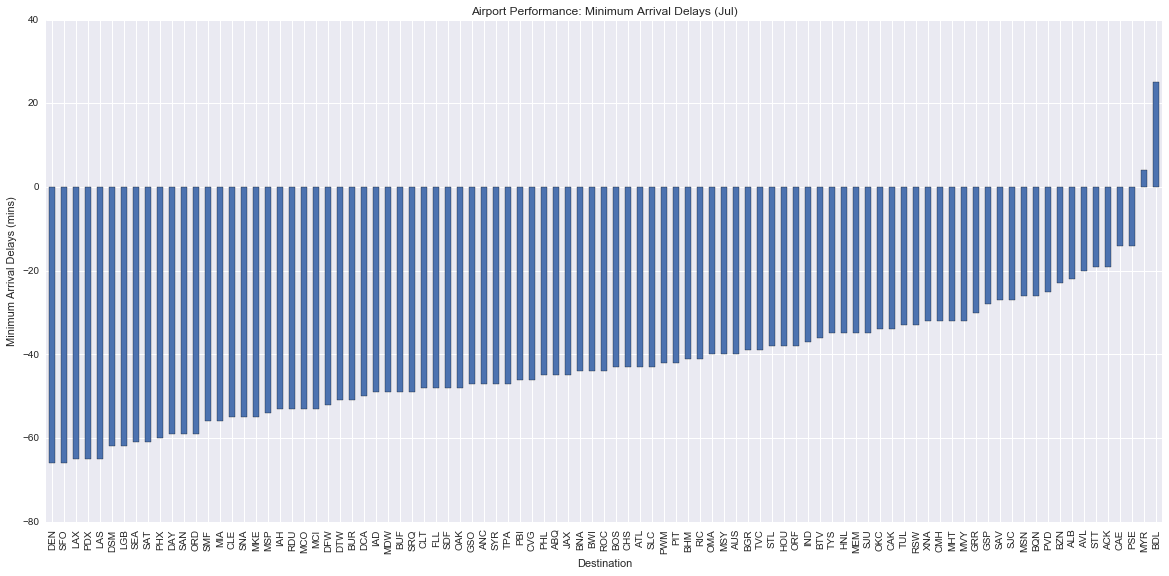

In [268]:
#Graphs for Monthly Summary

#Based on MINIMUM Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==7]
mean_arr_delay=flight_arr_month['min_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Minimum Arrival Delays (Jul)')
plt.xlabel('Destination')
plt.ylabel('Minimum Arrival Delays (mins)')

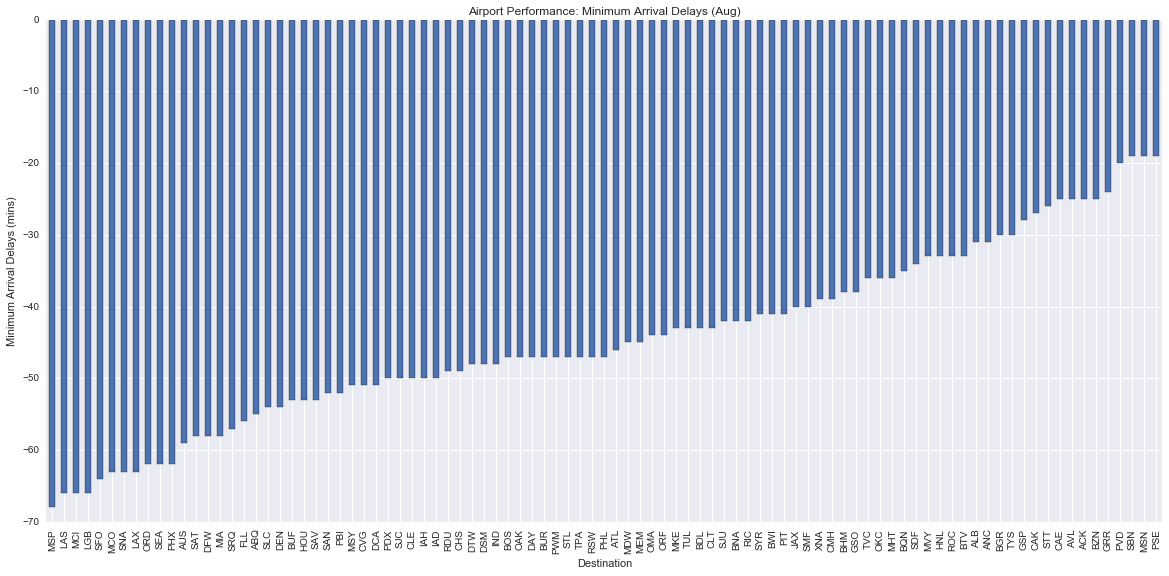

In [269]:
#Graphs for Monthly Summary

#Based on MINIMUM Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==8]
mean_arr_delay=flight_arr_month['min_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Minimum Arrival Delays (Aug)')
plt.xlabel('Destination')
plt.ylabel('Minimum Arrival Delays (mins)')

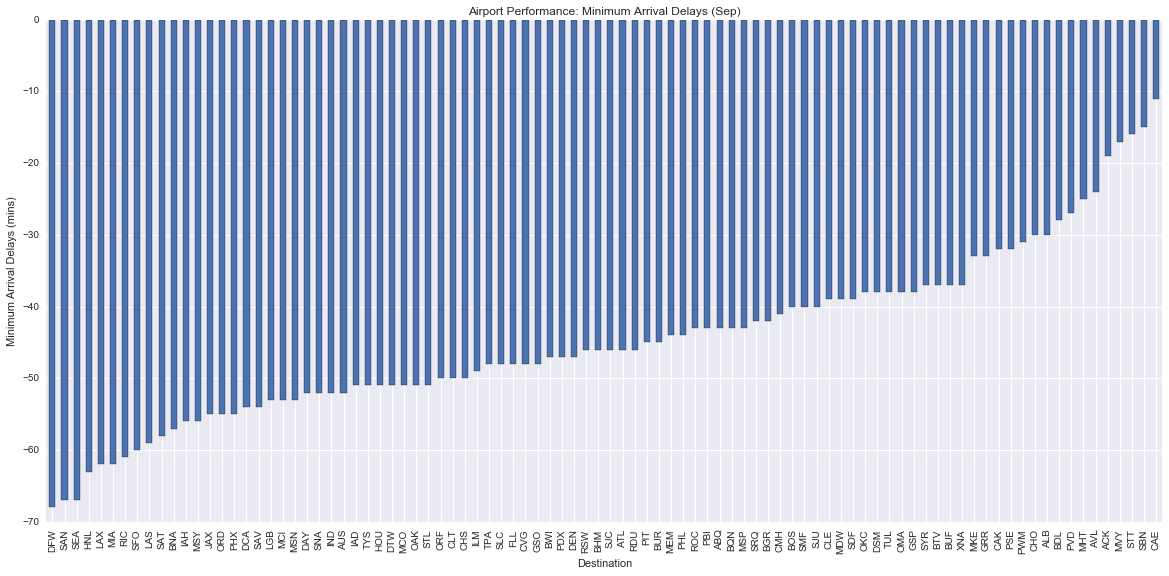

In [270]:
#Graphs for Monthly Summary

#Based on MINIMUM Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==9]
mean_arr_delay=flight_arr_month['min_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Minimum Arrival Delays (Sep)')
plt.xlabel('Destination')
plt.ylabel('Minimum Arrival Delays (mins)')

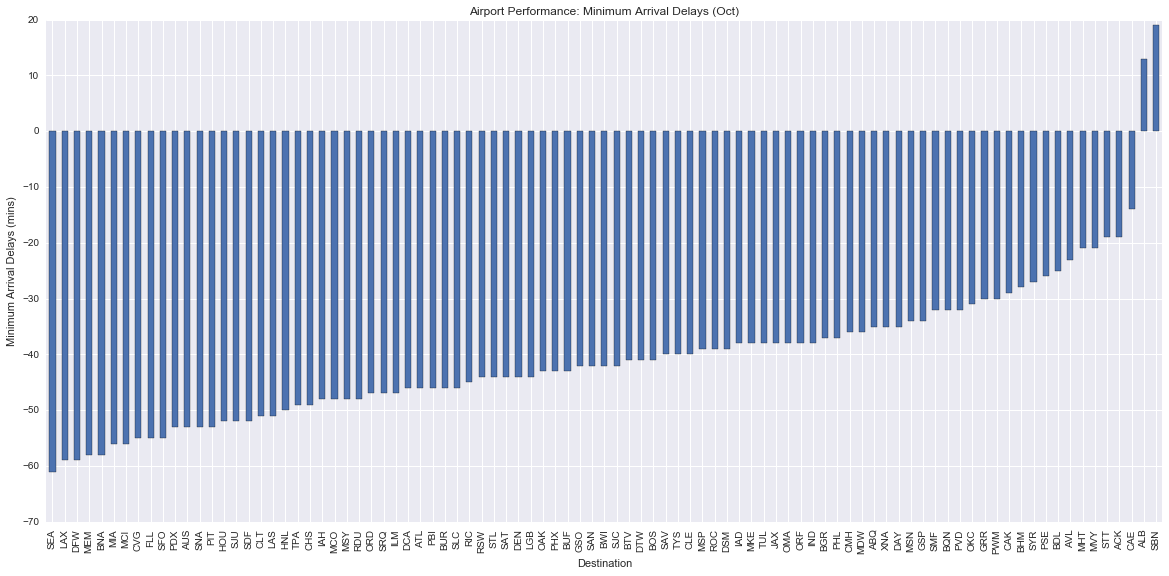

In [271]:
#Graphs for Monthly Summary

#Based on MINIMUM Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==10]
mean_arr_delay=flight_arr_month['min_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Minimum Arrival Delays (Oct)')
plt.xlabel('Destination')
plt.ylabel('Minimum Arrival Delays (mins)')

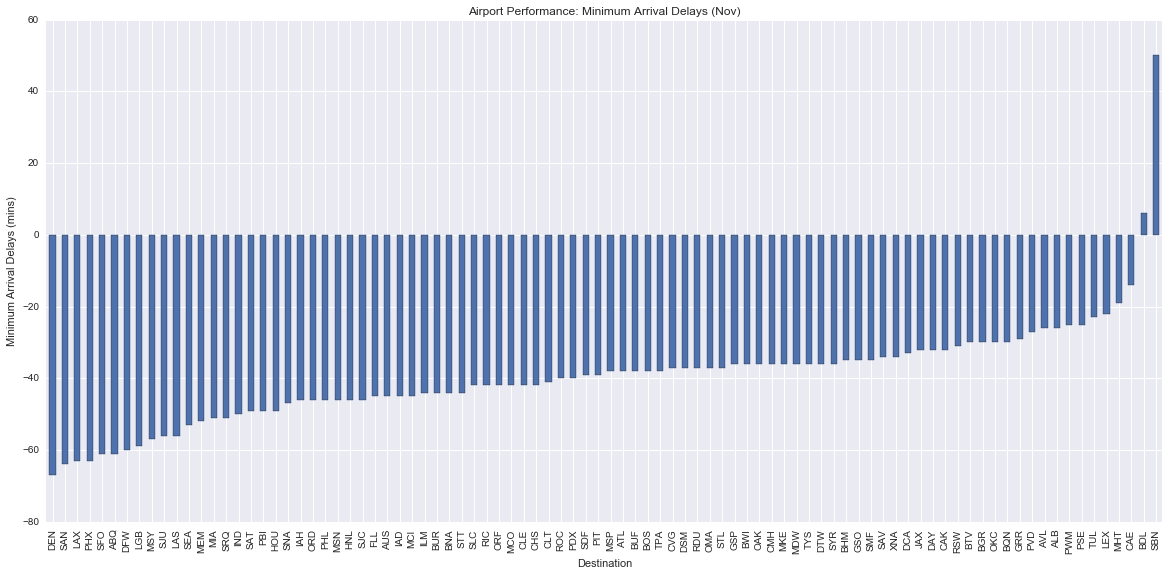

In [272]:
#Graphs for Monthly Summary

#Based on MINIMUM Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==11]
mean_arr_delay=flight_arr_month['min_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Minimum Arrival Delays (Nov)')
plt.xlabel('Destination')
plt.ylabel('Minimum Arrival Delays (mins)')

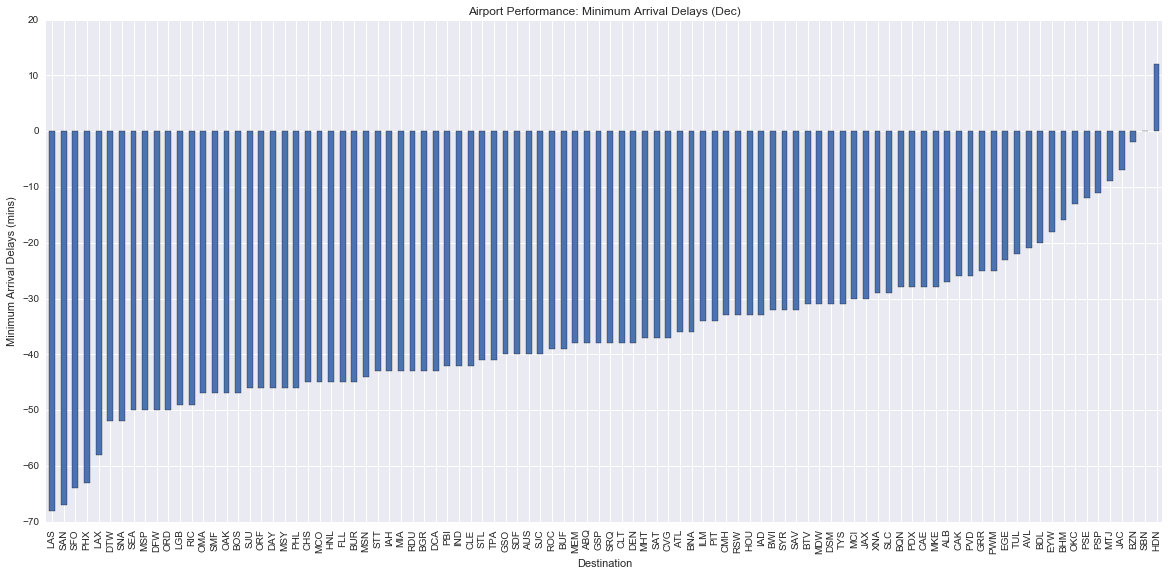

In [273]:
#Graphs for Monthly Summary

#Based on MINIMUM Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==12]
mean_arr_delay=flight_arr_month['min_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Minimum Arrival Delays (Dec)')
plt.xlabel('Destination')
plt.ylabel('Minimum Arrival Delays (mins)')

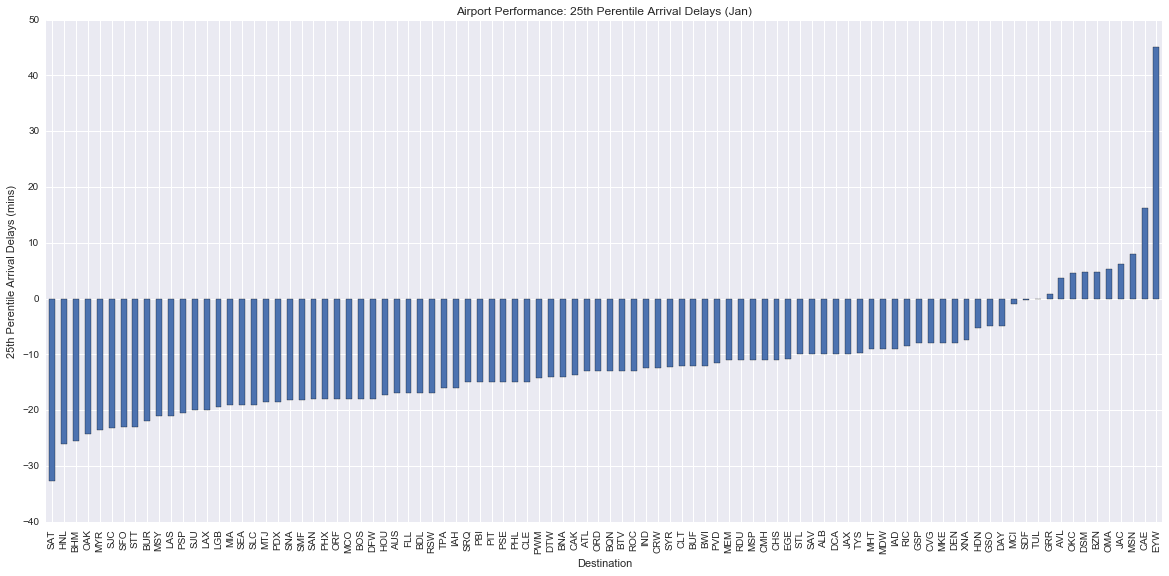

In [274]:
#Graphs for Monthly Summary

#25 Percentile Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==1]
mean_arr_delay=flight_arr_month['25%_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: 25th Perentile Arrival Delays (Jan)')
plt.xlabel('Destination')
plt.ylabel('25th Perentile Arrival Delays (mins)')

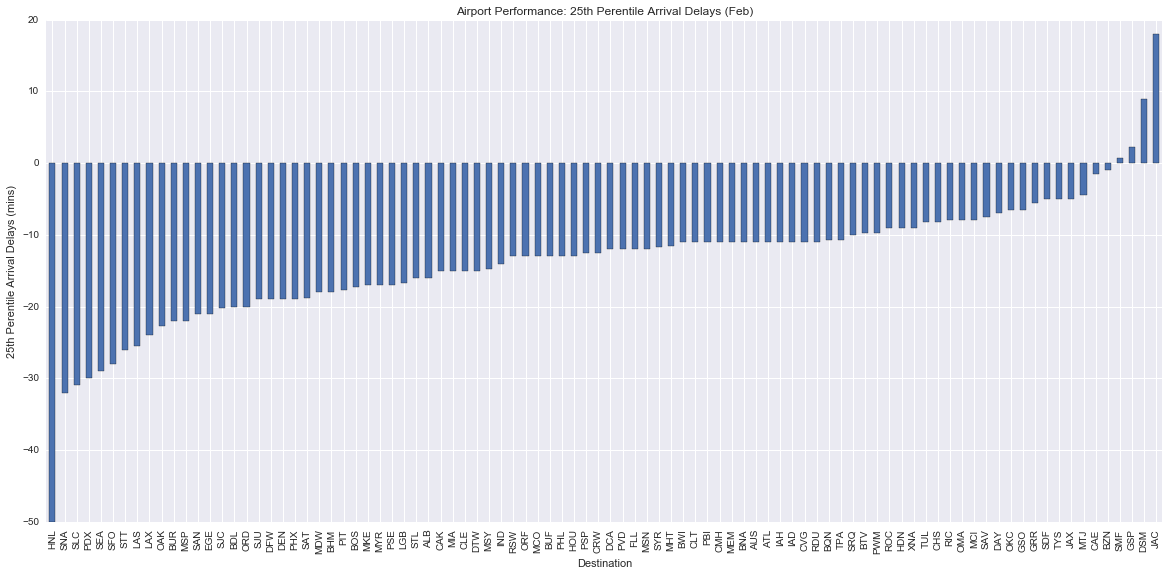

In [275]:
#Graphs for Monthly Summary

#25 Percentile Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==2]
mean_arr_delay=flight_arr_month['25%_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: 25th Perentile Arrival Delays (Feb)')
plt.xlabel('Destination')
plt.ylabel('25th Perentile Arrival Delays (mins)')

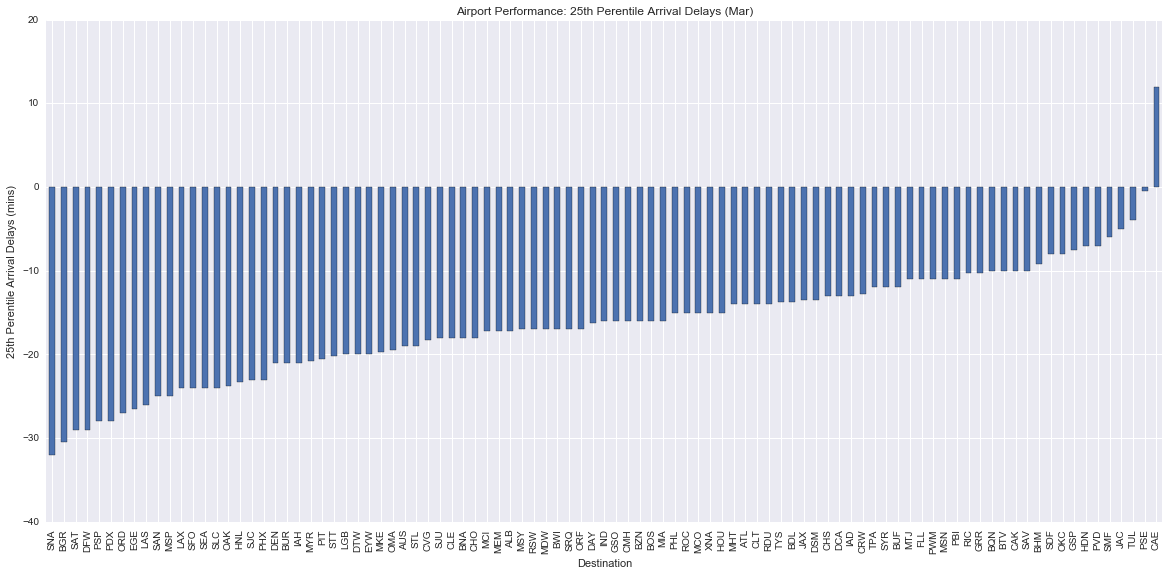

In [276]:
#Graphs for Monthly Summary

#25 Percentile Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==3]
mean_arr_delay=flight_arr_month['25%_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: 25th Perentile Arrival Delays (Mar)')
plt.xlabel('Destination')
plt.ylabel('25th Perentile Arrival Delays (mins)')

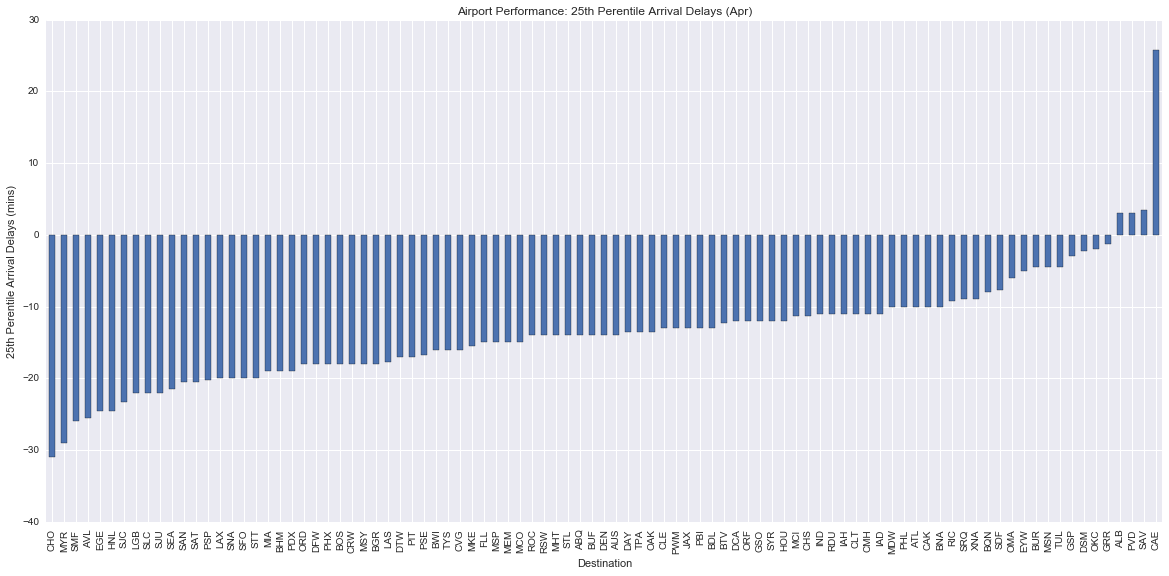

In [277]:
#Graphs for Monthly Summary

#25 Percentile Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==4]
mean_arr_delay=flight_arr_month['25%_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: 25th Perentile Arrival Delays (Apr)')
plt.xlabel('Destination')
plt.ylabel('25th Perentile Arrival Delays (mins)')

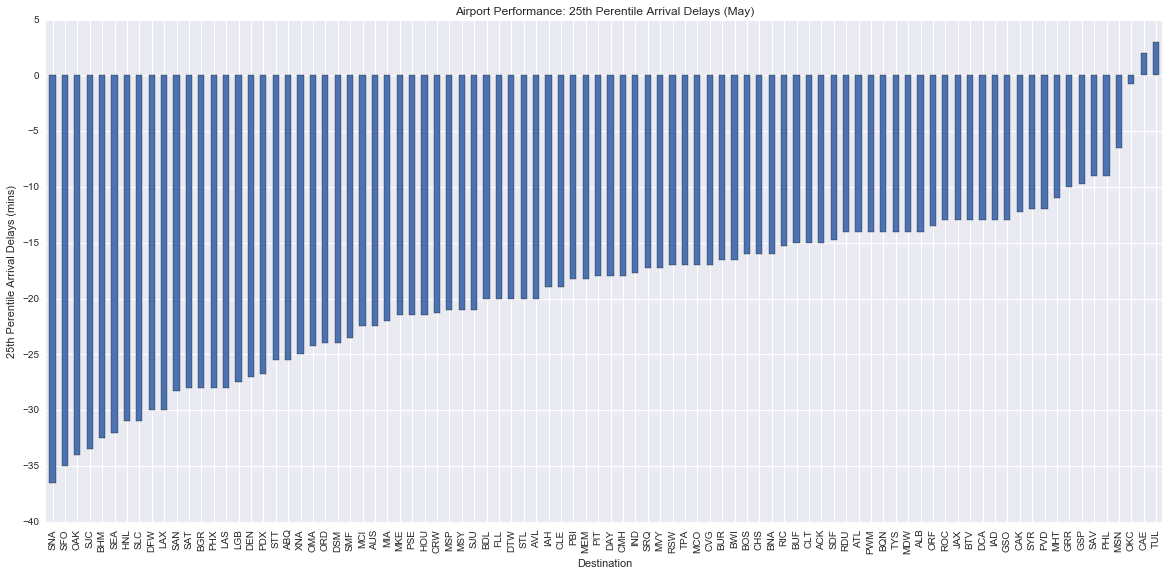

In [278]:
#Graphs for Monthly Summary

#25 Percentile Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==5]
mean_arr_delay=flight_arr_month['25%_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: 25th Perentile Arrival Delays (May)')
plt.xlabel('Destination')
plt.ylabel('25th Perentile Arrival Delays (mins)')

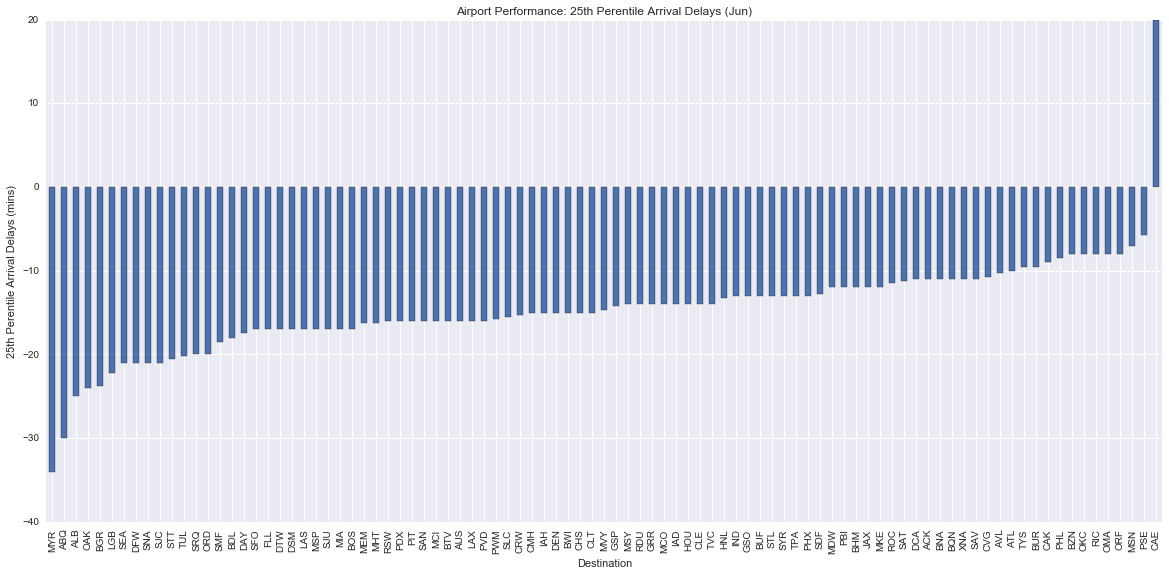

In [279]:
#Graphs for Monthly Summary

#25 Percentile Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==6]
mean_arr_delay=flight_arr_month['25%_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: 25th Perentile Arrival Delays (Jun)')
plt.xlabel('Destination')
plt.ylabel('25th Perentile Arrival Delays (mins)')

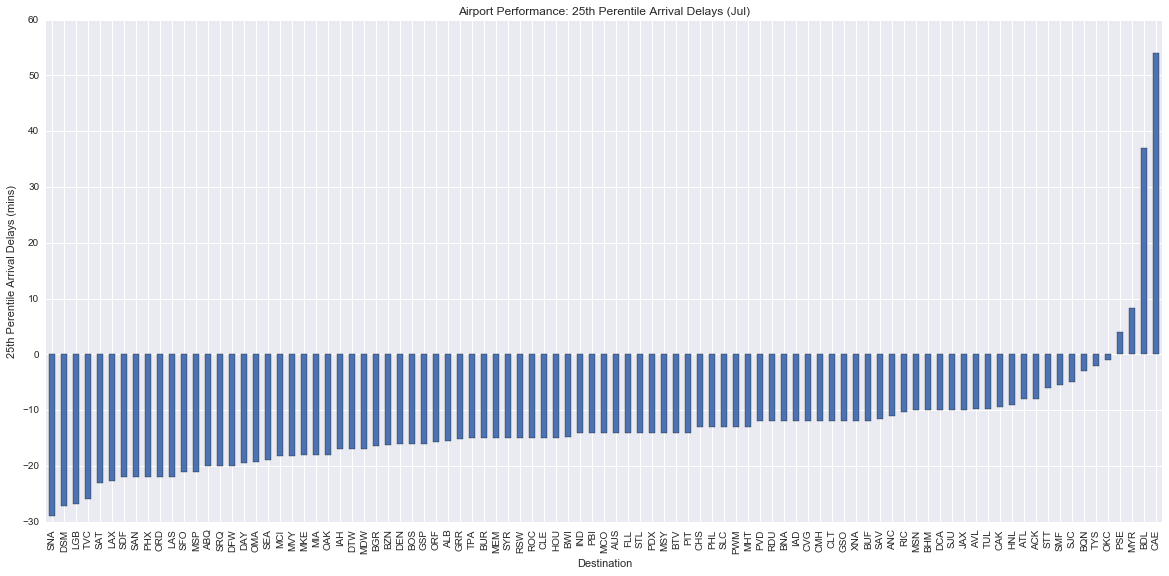

In [280]:
#Graphs for Monthly Summary

#25 Percentile Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==7]
mean_arr_delay=flight_arr_month['25%_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: 25th Perentile Arrival Delays (Jul)')
plt.xlabel('Destination')
plt.ylabel('25th Perentile Arrival Delays (mins)')

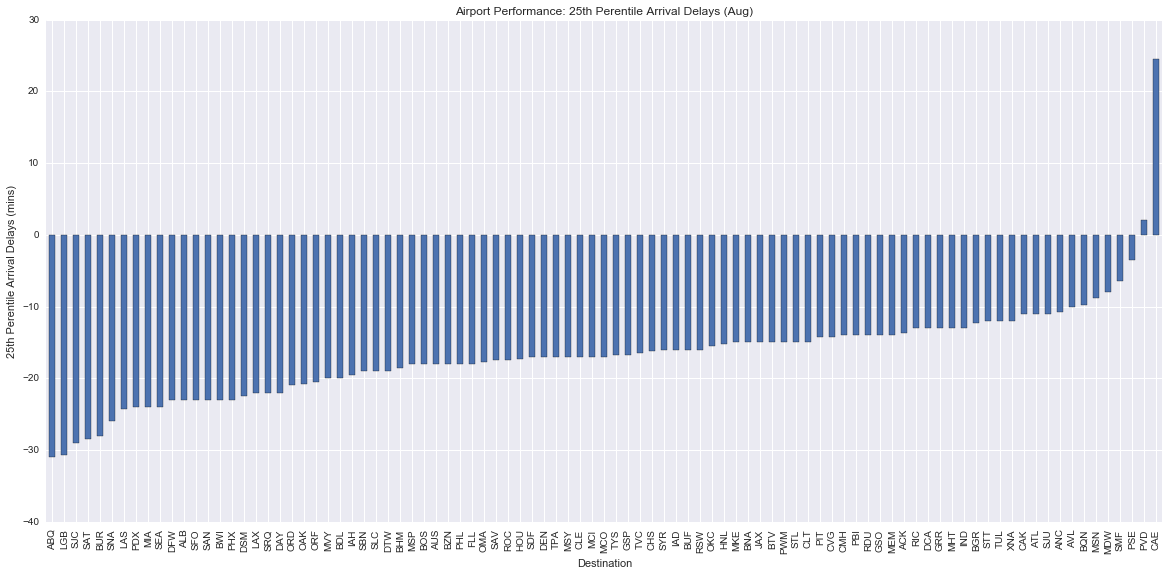

In [281]:
#Graphs for Monthly Summary

#25 Percentile Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==8]
mean_arr_delay=flight_arr_month['25%_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: 25th Perentile Arrival Delays (Aug)')
plt.xlabel('Destination')
plt.ylabel('25th Perentile Arrival Delays (mins)')

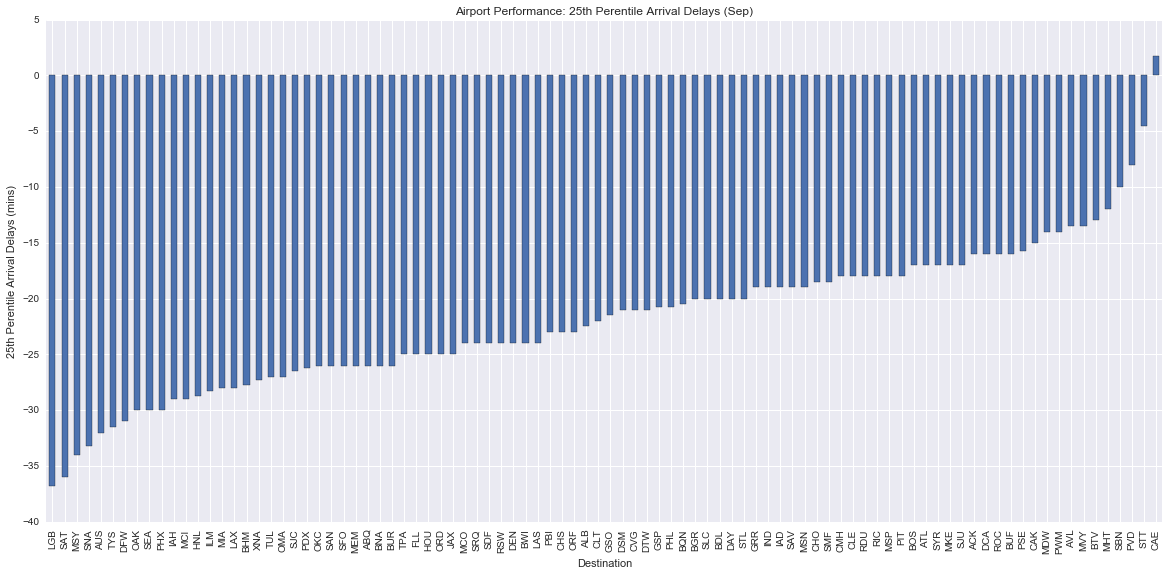

In [282]:
#Graphs for Monthly Summary

#25 Percentile Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==9]
mean_arr_delay=flight_arr_month['25%_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: 25th Perentile Arrival Delays (Sep)')
plt.xlabel('Destination')
plt.ylabel('25th Perentile Arrival Delays (mins)')

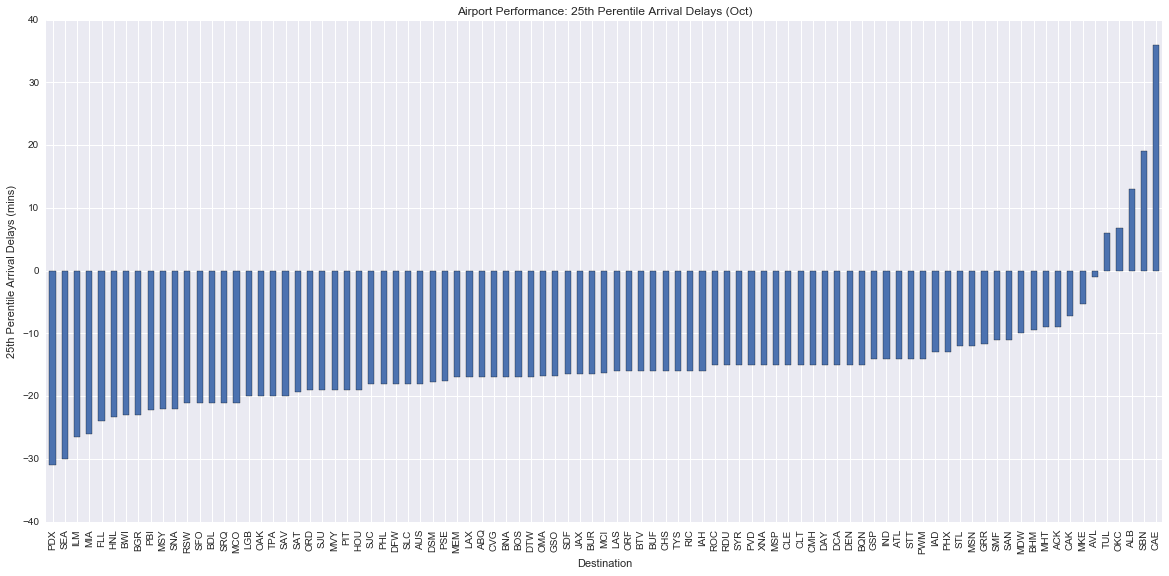

In [283]:
#Graphs for Monthly Summary

#25 Percentile Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==10]
mean_arr_delay=flight_arr_month['25%_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: 25th Perentile Arrival Delays (Oct)')
plt.xlabel('Destination')
plt.ylabel('25th Perentile Arrival Delays (mins)')

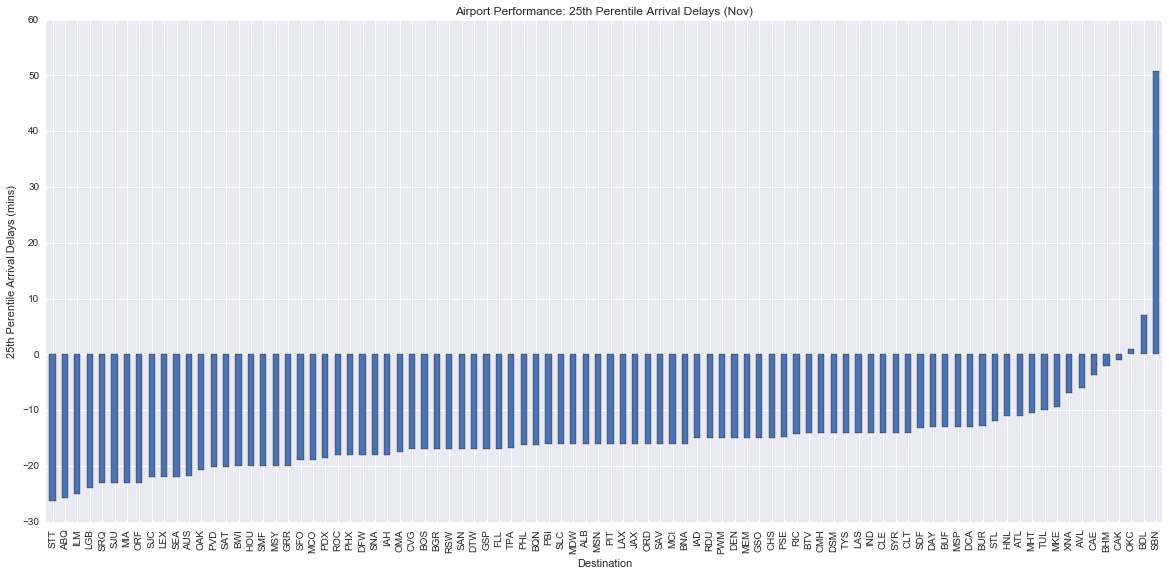

In [284]:
#Graphs for Monthly Summary

#25 Percentile Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==11]
mean_arr_delay=flight_arr_month['25%_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: 25th Perentile Arrival Delays (Nov)')
plt.xlabel('Destination')
plt.ylabel('25th Perentile Arrival Delays (mins)')

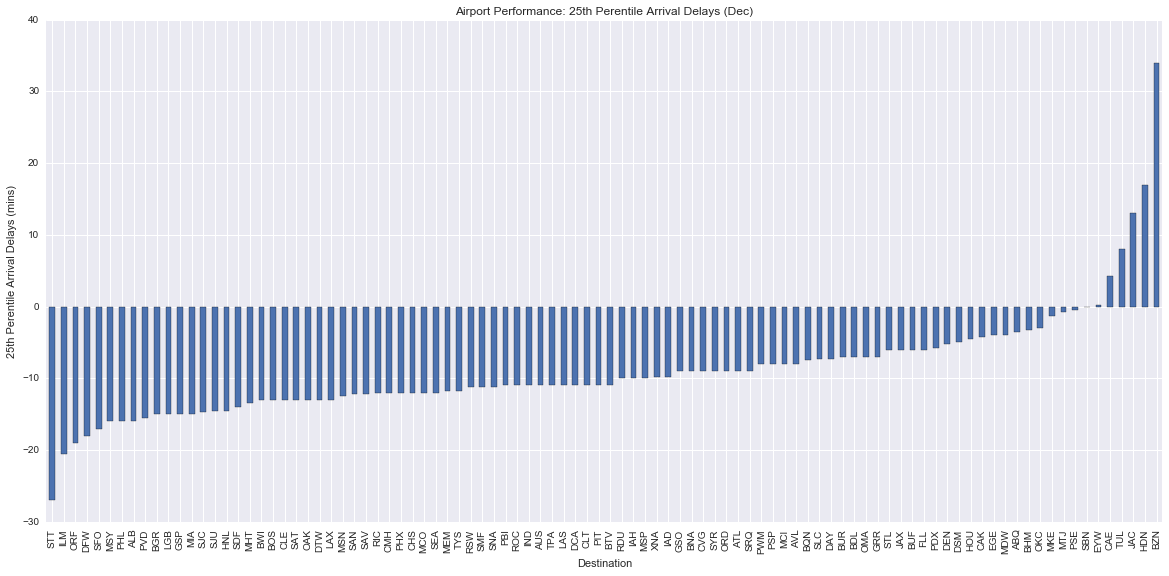

In [285]:
#Graphs for Monthly Summary

#25 Percentile Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==12]
mean_arr_delay=flight_arr_month['25%_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: 25th Perentile Arrival Delays (Dec)')
plt.xlabel('Destination')
plt.ylabel('25th Perentile Arrival Delays (mins)')

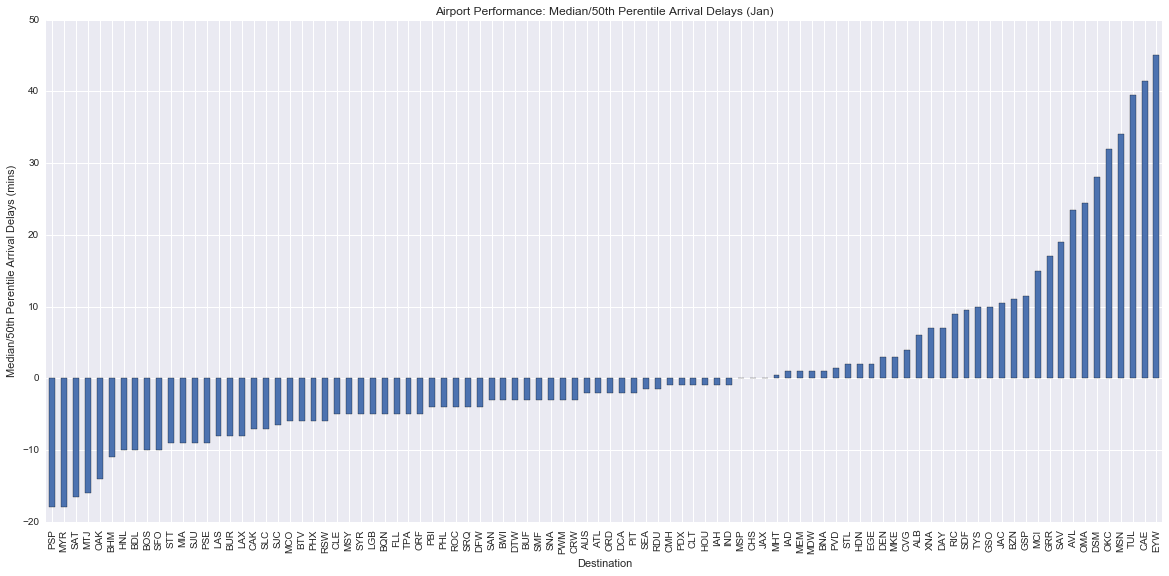

In [286]:
#Graphs for Monthly Summary

#Median- 50 Percentile Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==1]
mean_arr_delay=flight_arr_month['median_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Median/50th Perentile Arrival Delays (Jan)')
plt.xlabel('Destination')
plt.ylabel('Median/50th Perentile Arrival Delays (mins)')

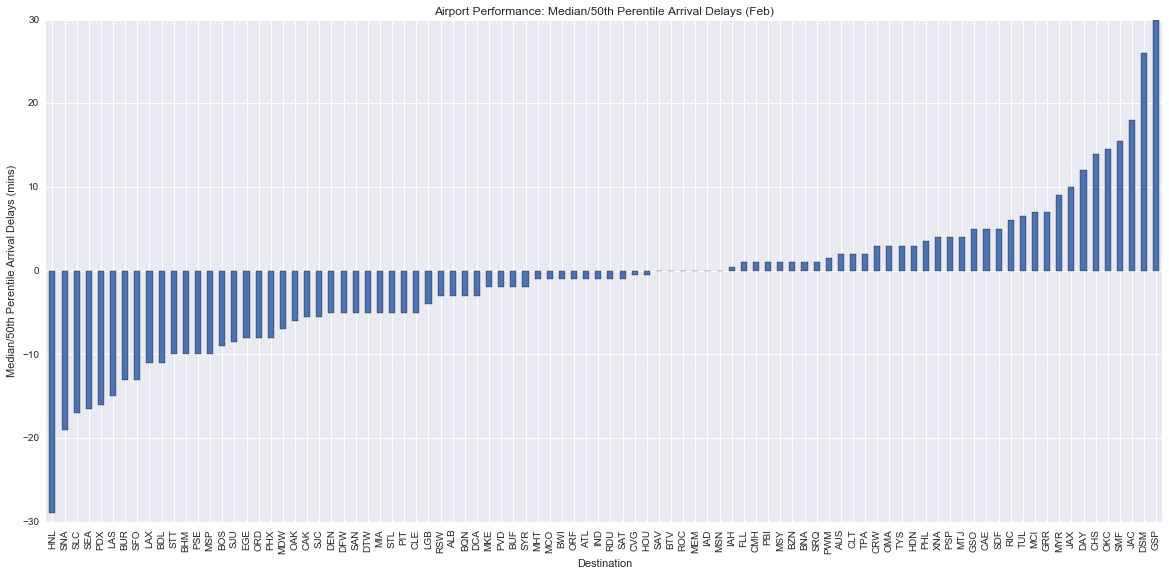

In [287]:
#Graphs for Monthly Summary

#Median- 50 Percentile Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==2]
mean_arr_delay=flight_arr_month['median_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Median/50th Perentile Arrival Delays (Feb)')
plt.xlabel('Destination')
plt.ylabel('Median/50th Perentile Arrival Delays (mins)')

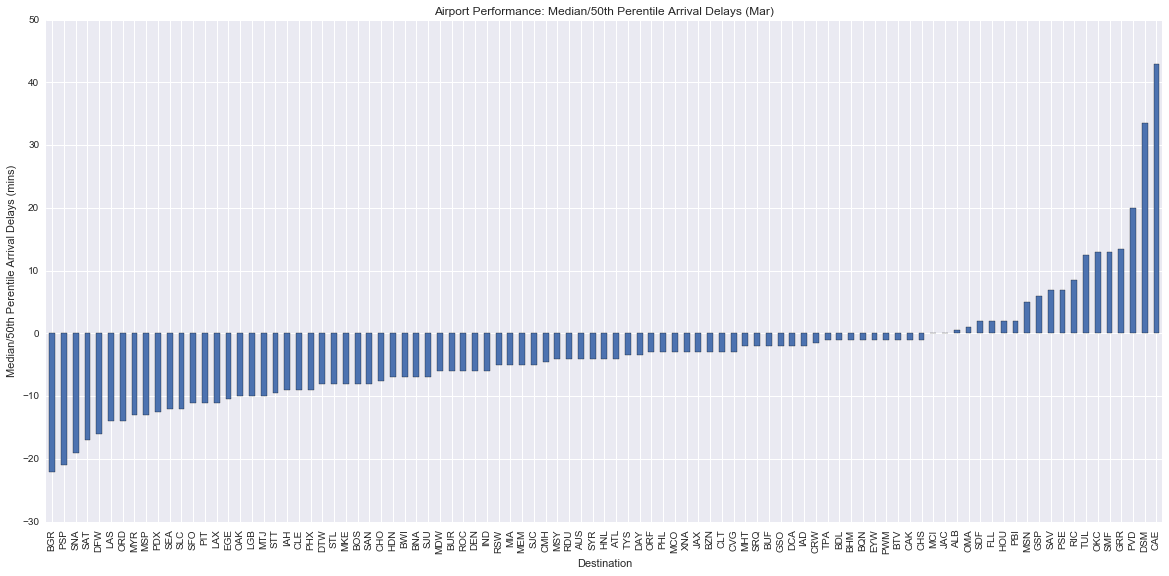

In [288]:
#Graphs for Monthly Summary

#Median- 50 Percentile Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==3]
mean_arr_delay=flight_arr_month['median_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Median/50th Perentile Arrival Delays (Mar)')
plt.xlabel('Destination')
plt.ylabel('Median/50th Perentile Arrival Delays (mins)')

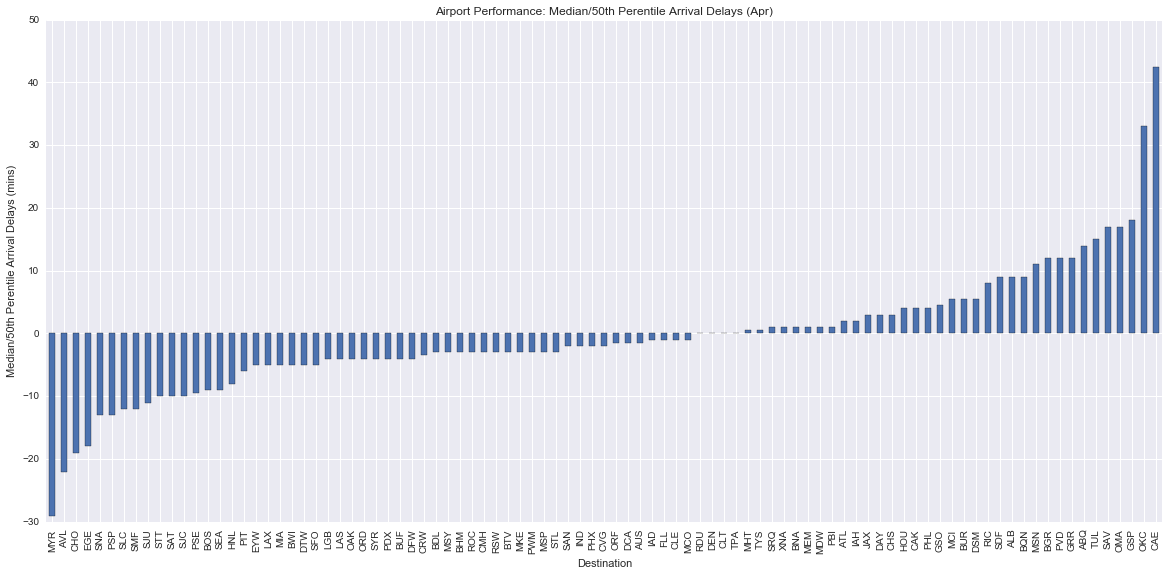

In [289]:
#Graphs for Monthly Summary

#Median- 50 Percentile Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==4]
mean_arr_delay=flight_arr_month['median_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Median/50th Perentile Arrival Delays (Apr)')
plt.xlabel('Destination')
plt.ylabel('Median/50th Perentile Arrival Delays (mins)')

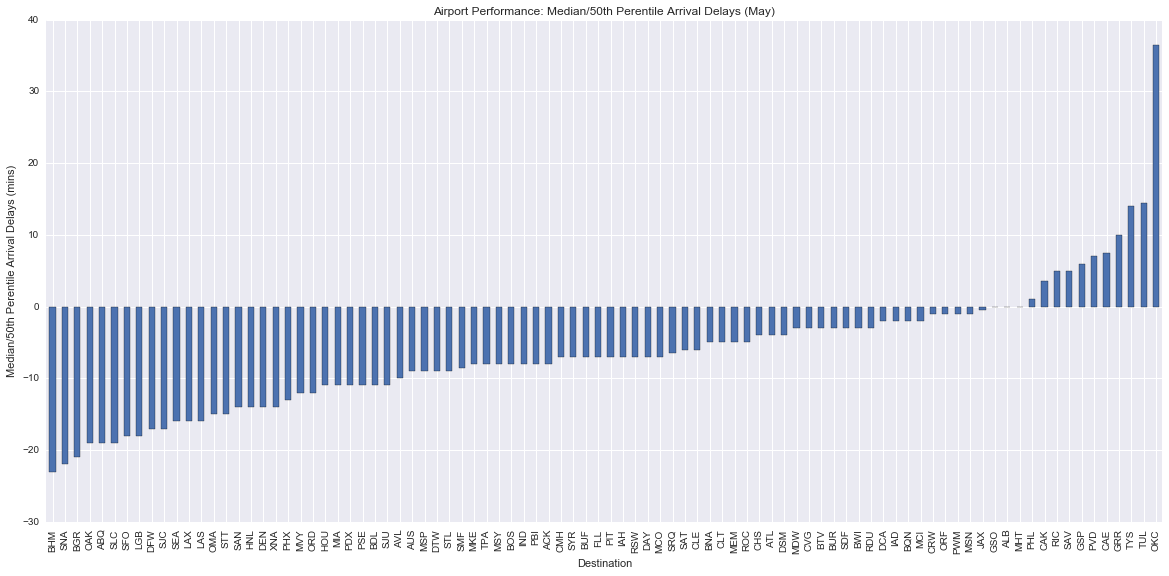

In [290]:
#Graphs for Monthly Summary

#Median- 50 Percentile Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==5]
mean_arr_delay=flight_arr_month['median_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Median/50th Perentile Arrival Delays (May)')
plt.xlabel('Destination')
plt.ylabel('Median/50th Perentile Arrival Delays (mins)')

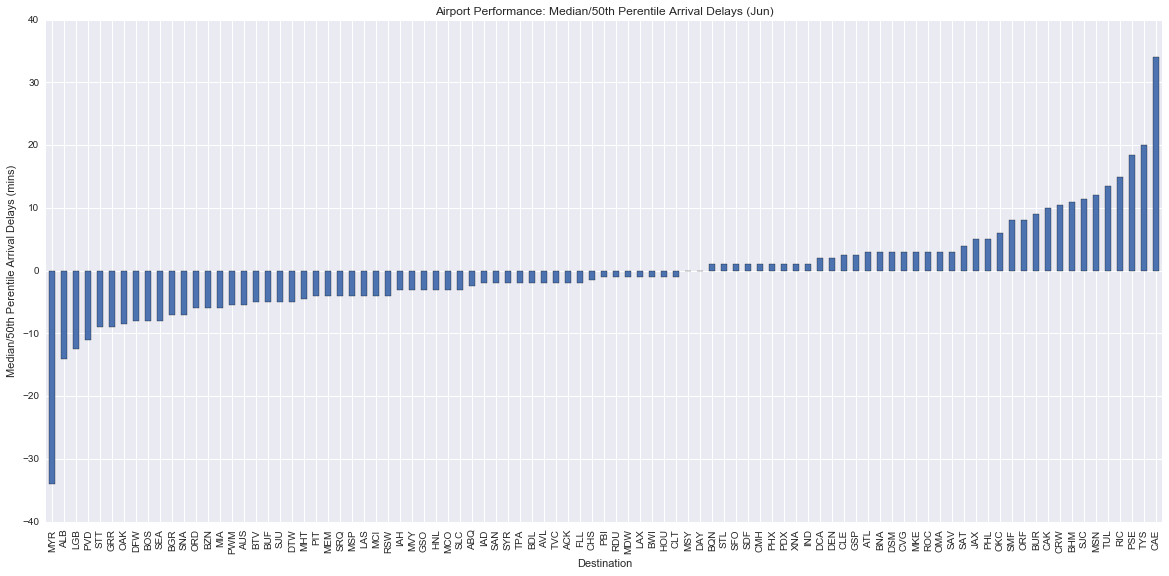

In [291]:
#Graphs for Monthly Summary

#Median- 50 Percentile Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==6]
mean_arr_delay=flight_arr_month['median_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Median/50th Perentile Arrival Delays (Jun)')
plt.xlabel('Destination')
plt.ylabel('Median/50th Perentile Arrival Delays (mins)')

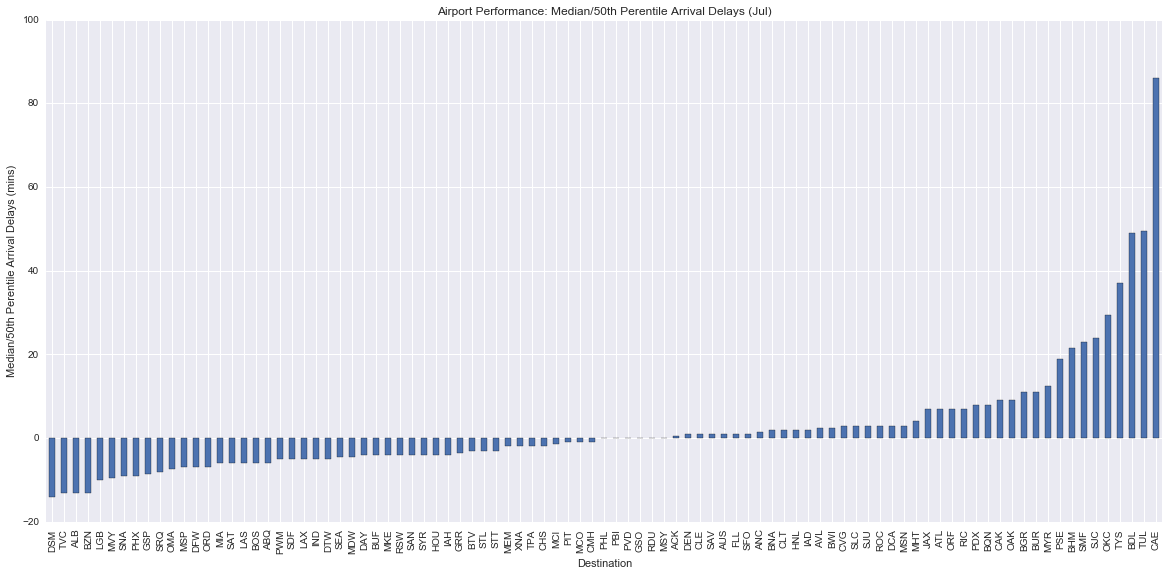

In [292]:
#Graphs for Monthly Summary

#Median- 50 Percentile Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==7]
mean_arr_delay=flight_arr_month['median_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Median/50th Perentile Arrival Delays (Jul)')
plt.xlabel('Destination')
plt.ylabel('Median/50th Perentile Arrival Delays (mins)')

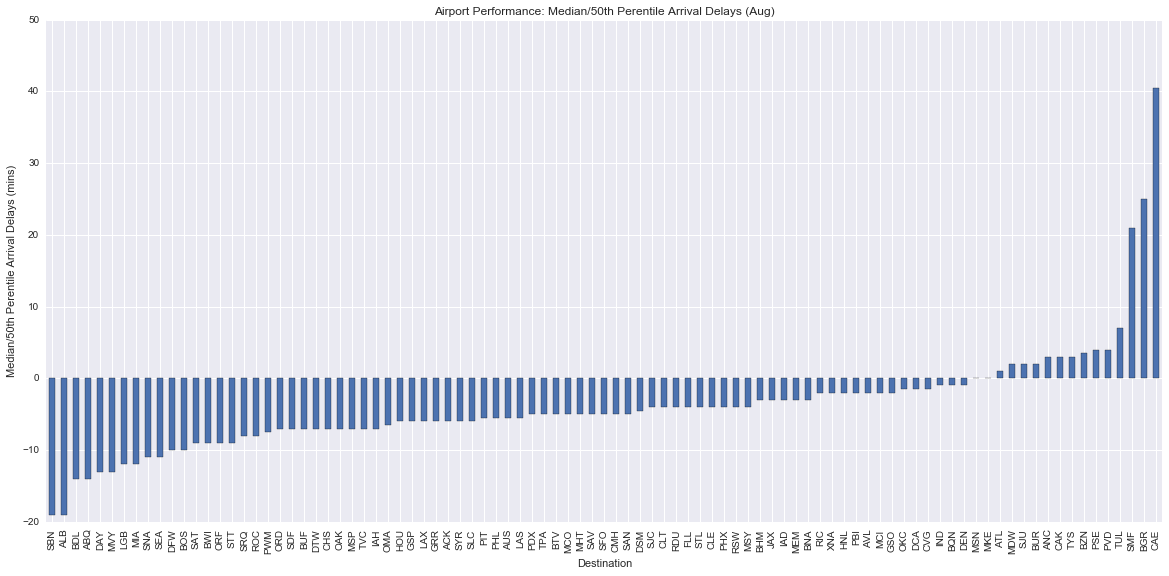

In [293]:
#Graphs for Monthly Summary

#Median- 50 Percentile Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==8]
mean_arr_delay=flight_arr_month['median_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Median/50th Perentile Arrival Delays (Aug)')
plt.xlabel('Destination')
plt.ylabel('Median/50th Perentile Arrival Delays (mins)')

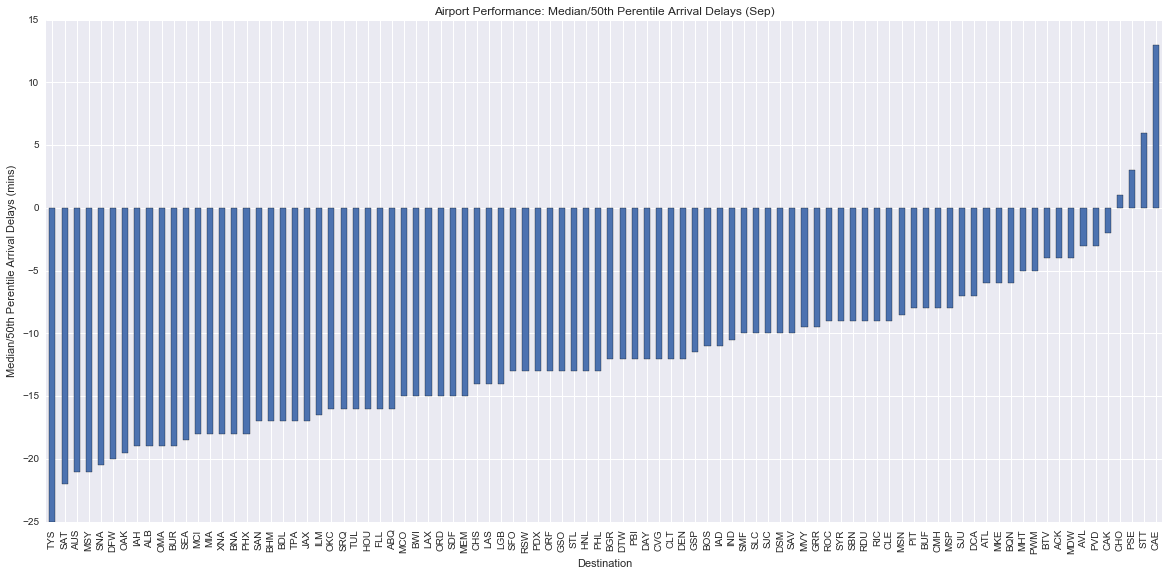

In [294]:
#Graphs for Monthly Summary

#Median- 50 Percentile Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==9]
mean_arr_delay=flight_arr_month['median_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Median/50th Perentile Arrival Delays (Sep)')
plt.xlabel('Destination')
plt.ylabel('Median/50th Perentile Arrival Delays (mins)')

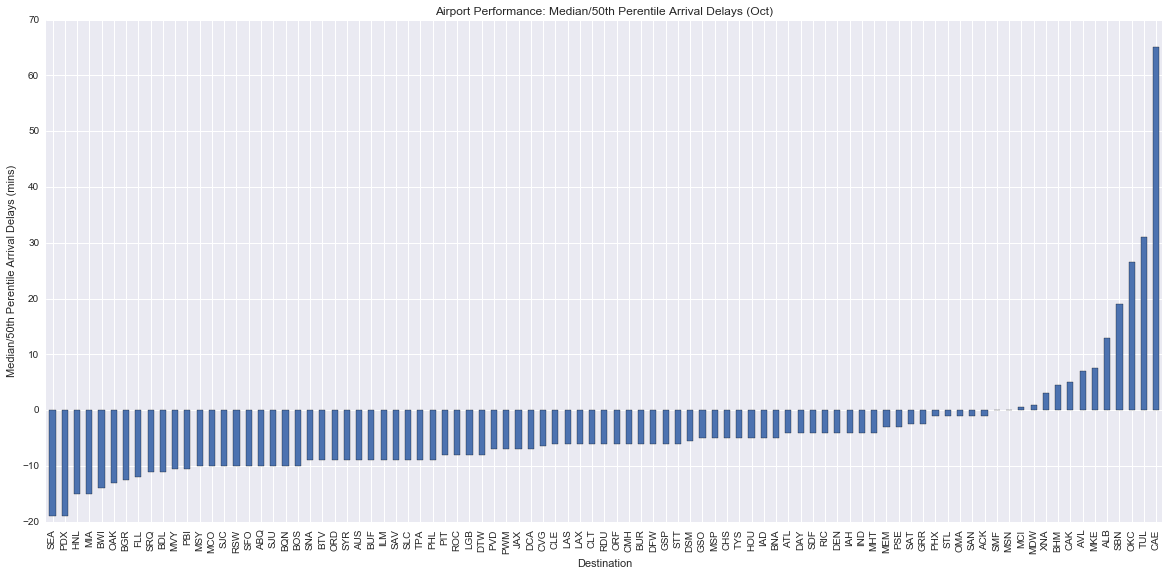

In [295]:
#Graphs for Monthly Summary

#Median- 50 Percentile Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==10]
mean_arr_delay=flight_arr_month['median_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Median/50th Perentile Arrival Delays (Oct)')
plt.xlabel('Destination')
plt.ylabel('Median/50th Perentile Arrival Delays (mins)')

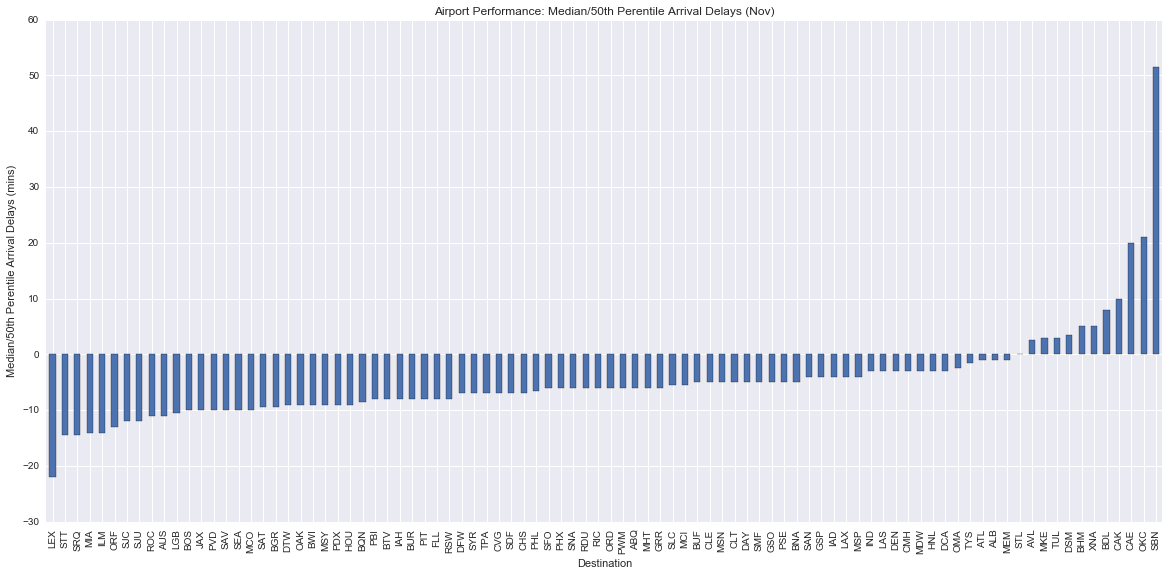

In [296]:
#Graphs for Monthly Summary

#Median- 50 Percentile Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==11]
mean_arr_delay=flight_arr_month['median_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Median/50th Perentile Arrival Delays (Nov)')
plt.xlabel('Destination')
plt.ylabel('Median/50th Perentile Arrival Delays (mins)')

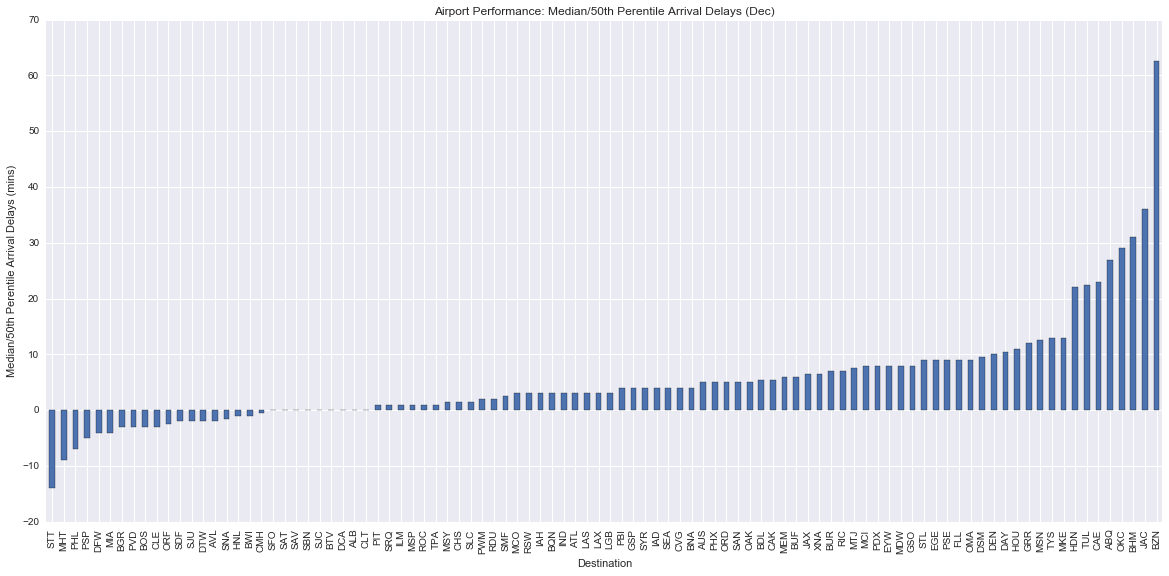

In [297]:
#Graphs for Monthly Summary

#Median- 50 Percentile Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==12]
mean_arr_delay=flight_arr_month['median_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Median/50th Perentile Arrival Delays (Dec)')
plt.xlabel('Destination')
plt.ylabel('Median/50th Perentile Arrival Delays (mins)')

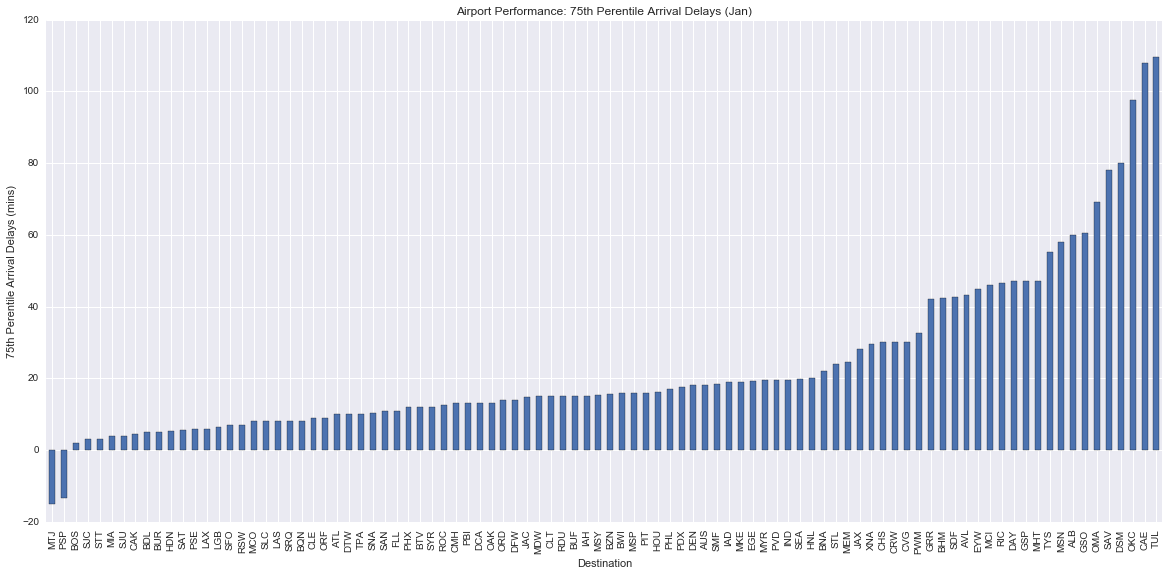

In [298]:
#Graphs for Monthly Summary

#75th Percentile Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==1]
mean_arr_delay=flight_arr_month['75%_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: 75th Perentile Arrival Delays (Jan)')
plt.xlabel('Destination')
plt.ylabel('75th Perentile Arrival Delays (mins)')

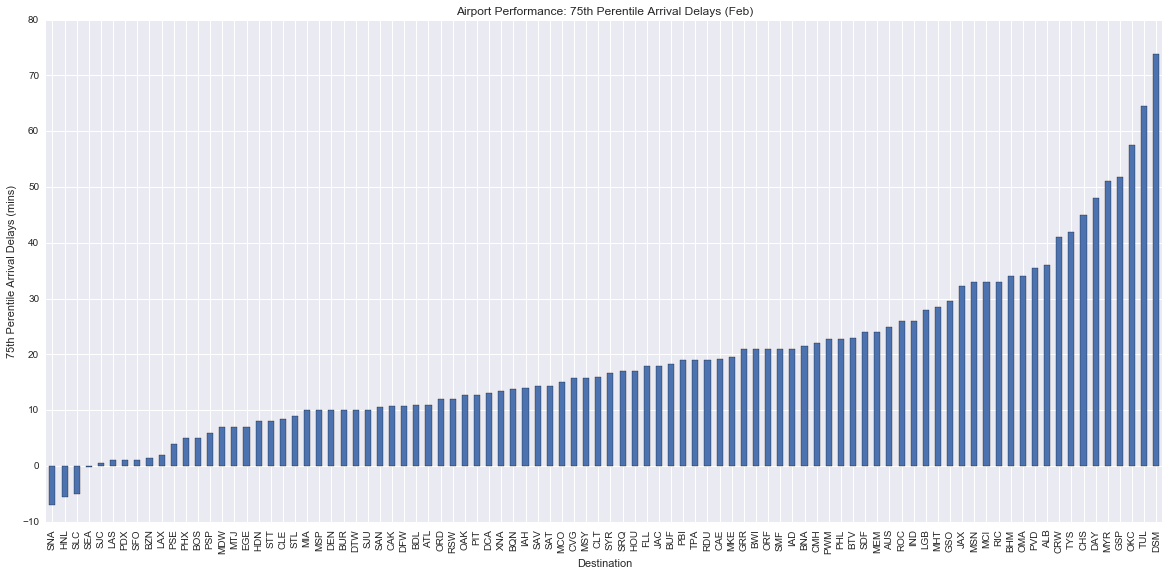

In [299]:
#Graphs for Monthly Summary

#75th Percentile Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==2]
mean_arr_delay=flight_arr_month['75%_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: 75th Perentile Arrival Delays (Feb)')
plt.xlabel('Destination')
plt.ylabel('75th Perentile Arrival Delays (mins)')

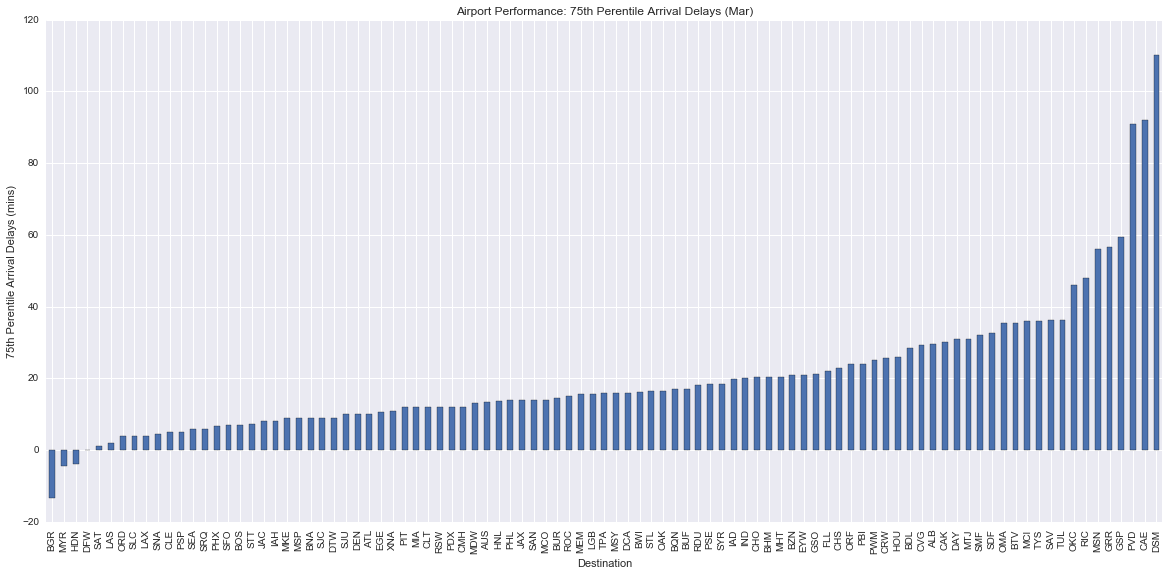

In [300]:
#Graphs for Monthly Summary

#75th Percentile Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==3]
mean_arr_delay=flight_arr_month['75%_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: 75th Perentile Arrival Delays (Mar)')
plt.xlabel('Destination')
plt.ylabel('75th Perentile Arrival Delays (mins)')

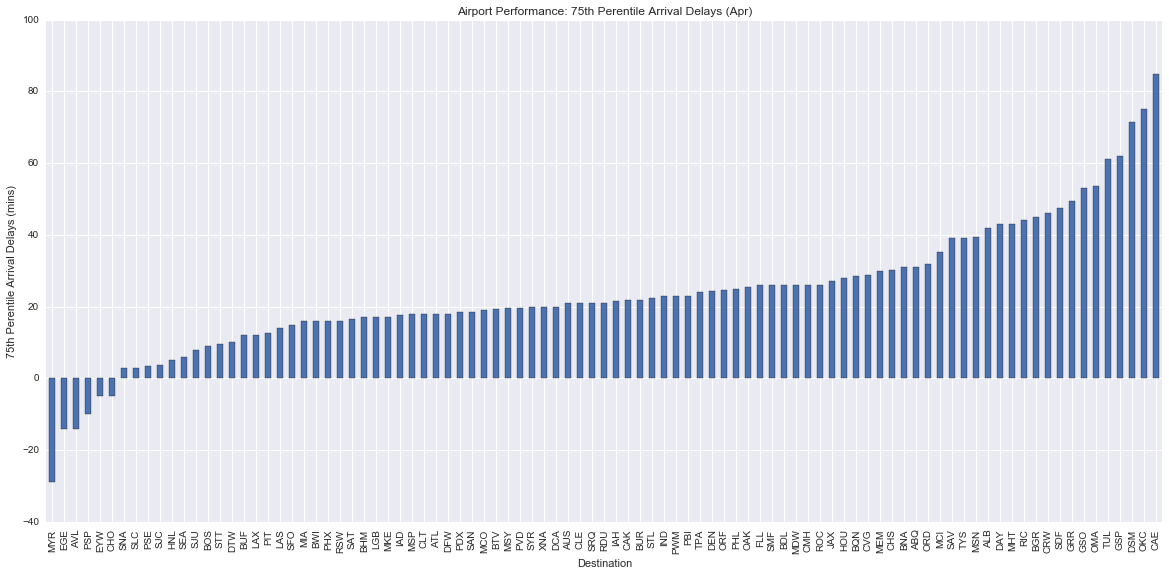

In [301]:
#Graphs for Monthly Summary

#75th Percentile Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==4]
mean_arr_delay=flight_arr_month['75%_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: 75th Perentile Arrival Delays (Apr)')
plt.xlabel('Destination')
plt.ylabel('75th Perentile Arrival Delays (mins)')

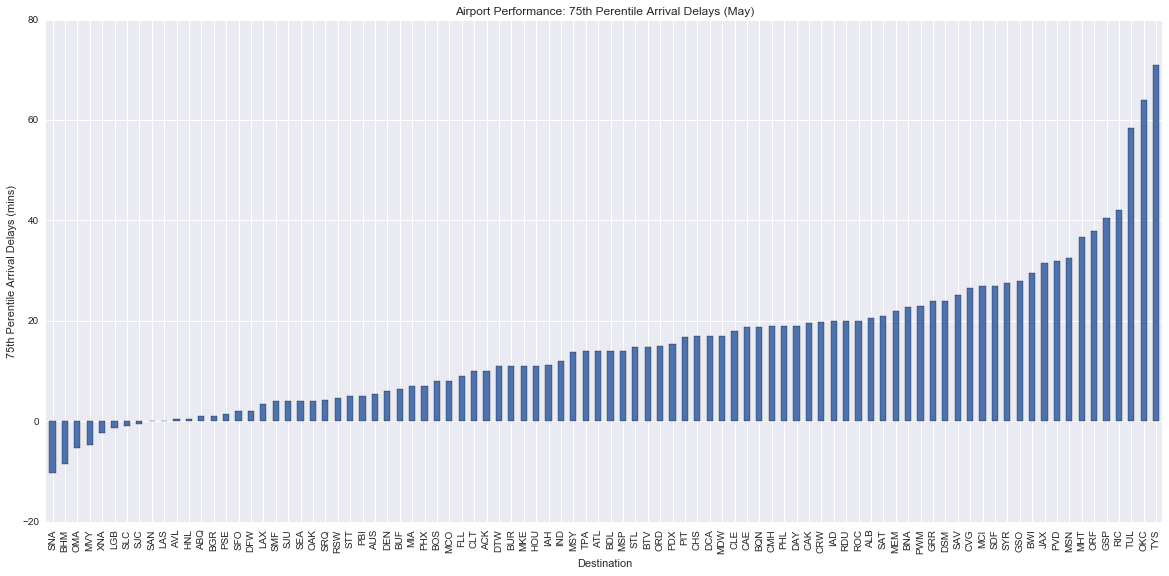

In [302]:
#Graphs for Monthly Summary

#75th Percentile Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==5]
mean_arr_delay=flight_arr_month['75%_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: 75th Perentile Arrival Delays (May)')
plt.xlabel('Destination')
plt.ylabel('75th Perentile Arrival Delays (mins)')

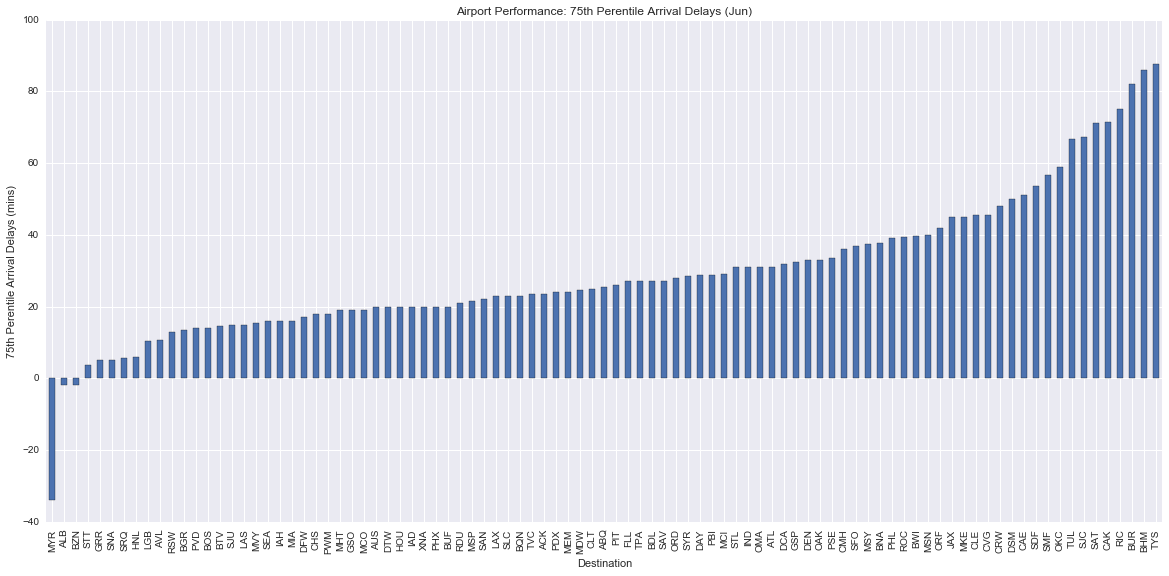

In [303]:
#Graphs for Monthly Summary

#75th Percentile Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==6]
mean_arr_delay=flight_arr_month['75%_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: 75th Perentile Arrival Delays (Jun)')
plt.xlabel('Destination')
plt.ylabel('75th Perentile Arrival Delays (mins)')

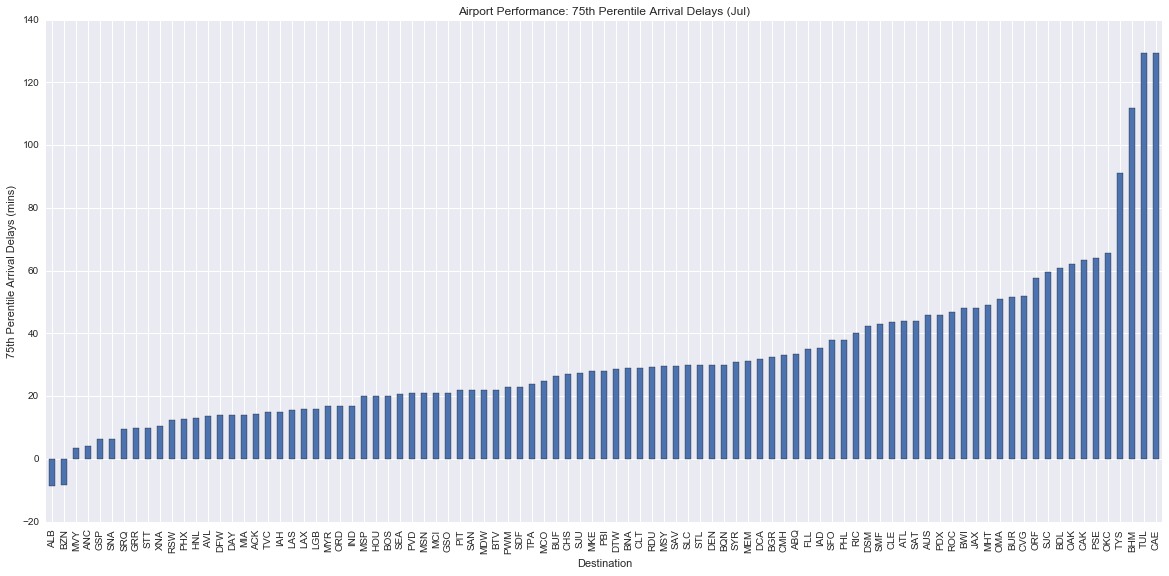

In [304]:
#Graphs for Monthly Summary

#75th Percentile Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==7]
mean_arr_delay=flight_arr_month['75%_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: 75th Perentile Arrival Delays (Jul)')
plt.xlabel('Destination')
plt.ylabel('75th Perentile Arrival Delays (mins)')

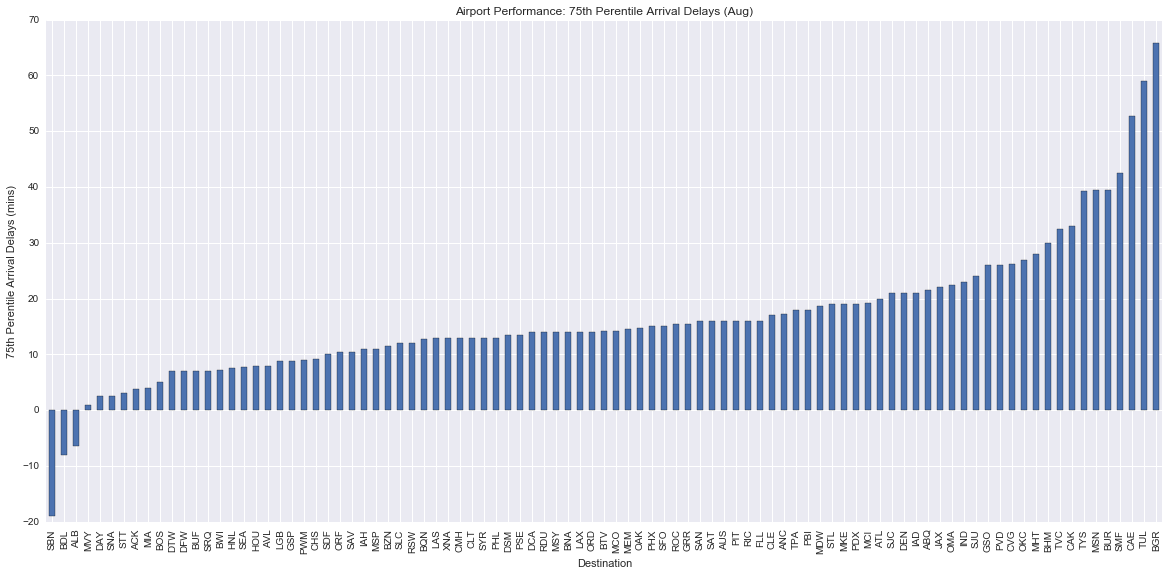

In [305]:
#Graphs for Monthly Summary

#75th Percentile Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==8]
mean_arr_delay=flight_arr_month['75%_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: 75th Perentile Arrival Delays (Aug)')
plt.xlabel('Destination')
plt.ylabel('75th Perentile Arrival Delays (mins)')

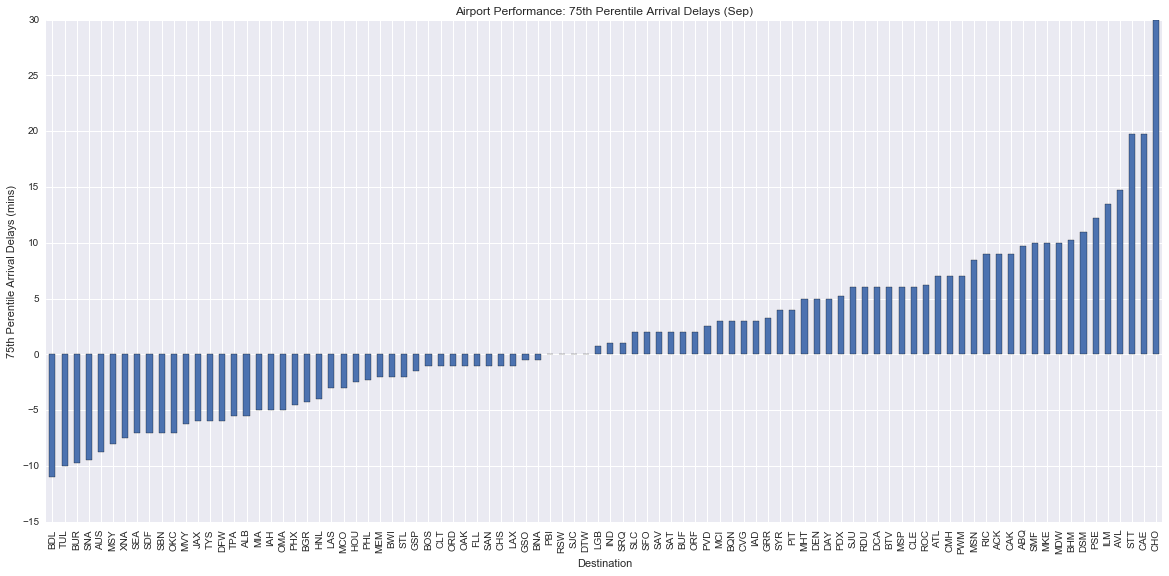

In [306]:
#Graphs for Monthly Summary

#75th Percentile Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==9]
mean_arr_delay=flight_arr_month['75%_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: 75th Perentile Arrival Delays (Sep)')
plt.xlabel('Destination')
plt.ylabel('75th Perentile Arrival Delays (mins)')

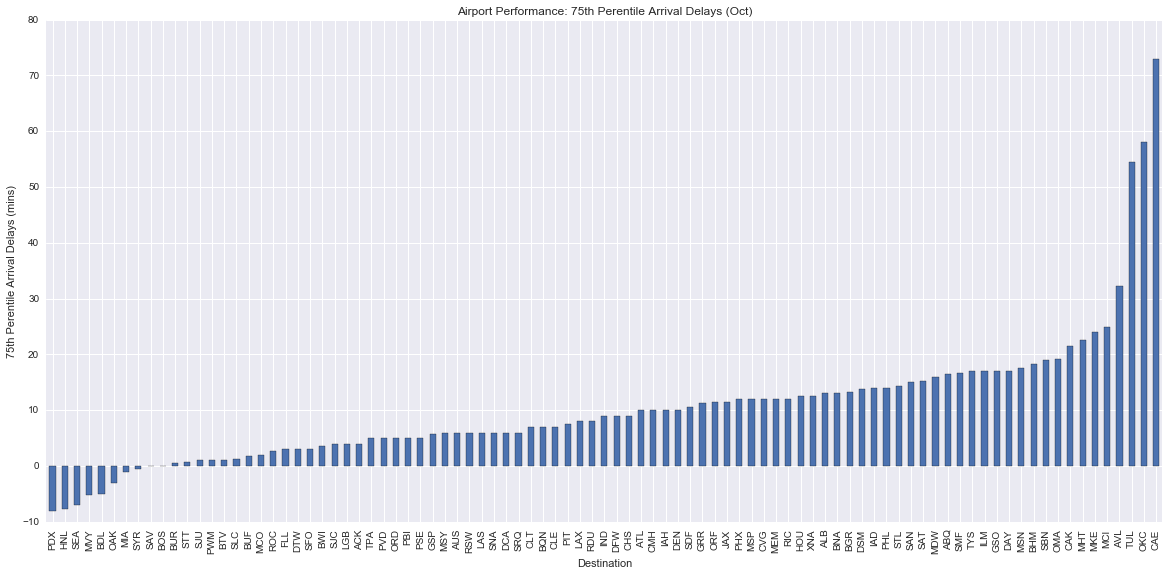

In [307]:
#Graphs for Monthly Summary

#75th Percentile Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==10]
mean_arr_delay=flight_arr_month['75%_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: 75th Perentile Arrival Delays (Oct)')
plt.xlabel('Destination')
plt.ylabel('75th Perentile Arrival Delays (mins)')

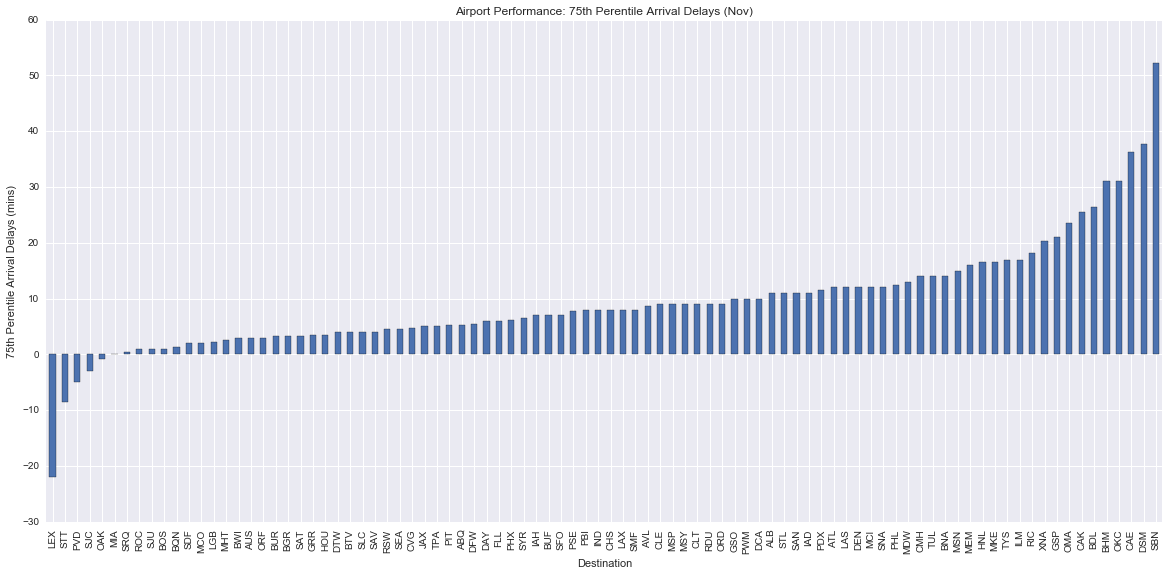

In [308]:
#Graphs for Monthly Summary

#75th Percentile Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==11]
mean_arr_delay=flight_arr_month['75%_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: 75th Perentile Arrival Delays (Nov)')
plt.xlabel('Destination')
plt.ylabel('75th Perentile Arrival Delays (mins)')

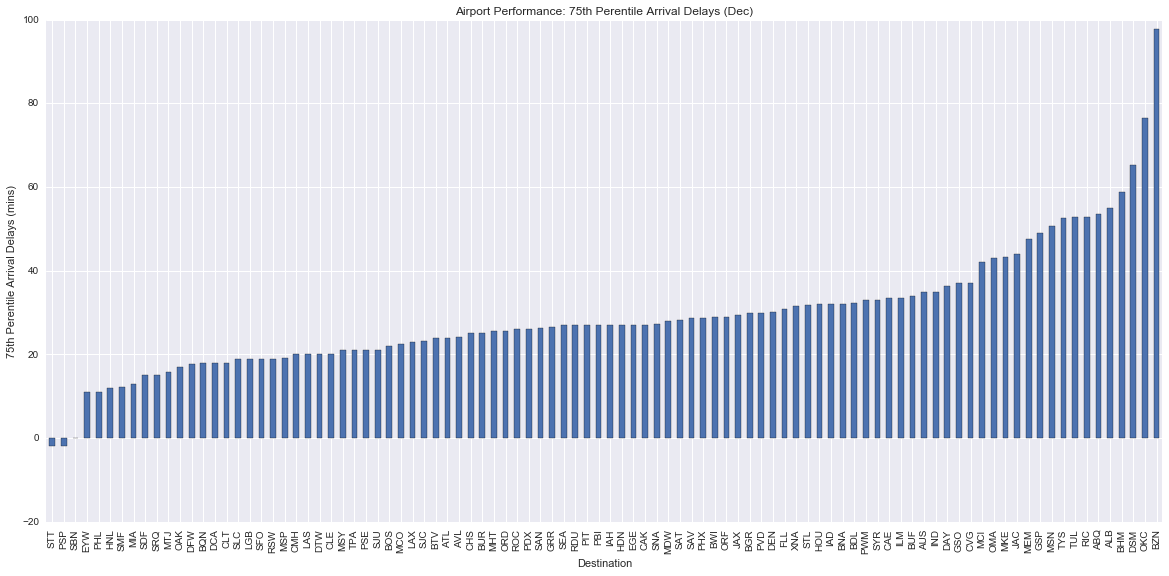

In [309]:
#Graphs for Monthly Summary

#75th Percentile Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==12]
mean_arr_delay=flight_arr_month['75%_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: 75th Perentile Arrival Delays (Dec)')
plt.xlabel('Destination')
plt.ylabel('75th Perentile Arrival Delays (mins)')

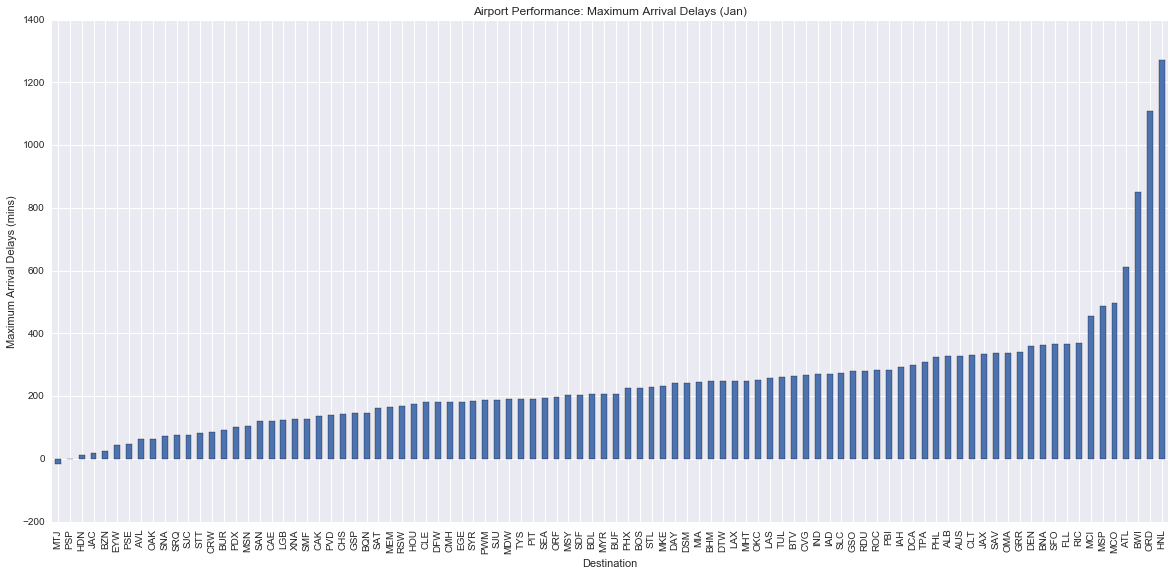

In [310]:
#Graphs for Monthly Summary

#MAXIMUM Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==1]
mean_arr_delay=flight_arr_month['max_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Maximum Arrival Delays (Jan)')
plt.xlabel('Destination')
plt.ylabel('Maximum Arrival Delays (mins)')

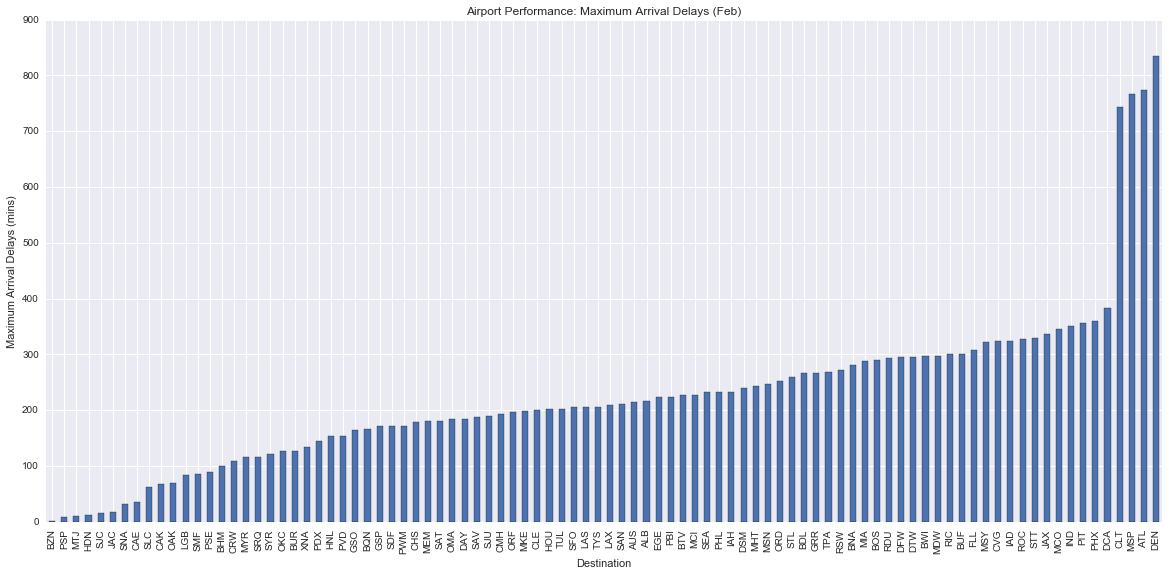

In [311]:
#Graphs for Monthly Summary

#MAXIMUM Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==2]
mean_arr_delay=flight_arr_month['max_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Maximum Arrival Delays (Feb)')
plt.xlabel('Destination')
plt.ylabel('Maximum Arrival Delays (mins)')

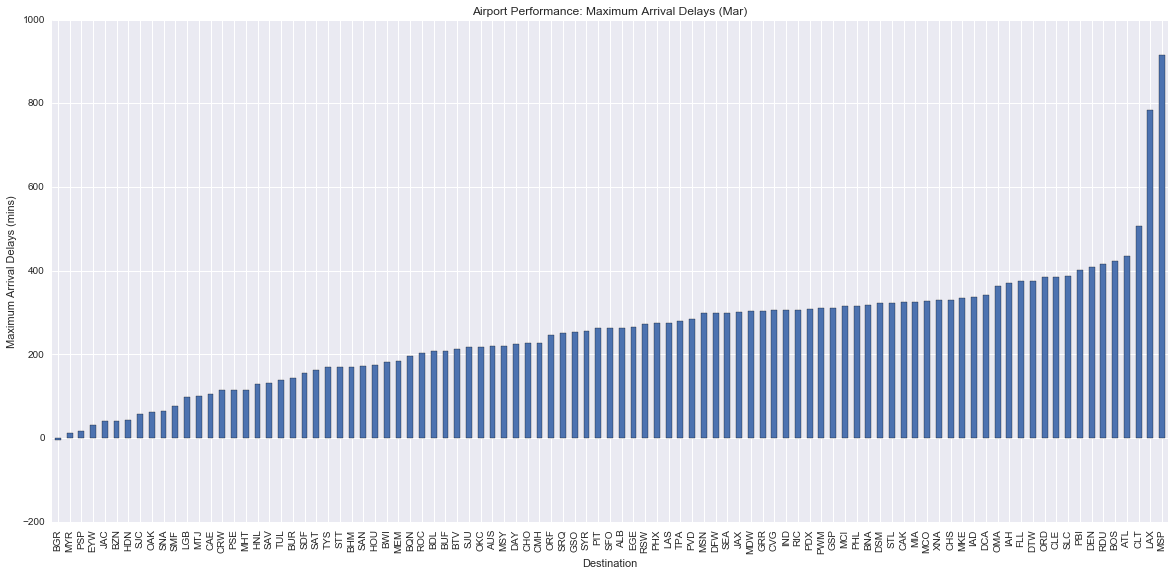

In [312]:
#Graphs for Monthly Summary

#MAXIMUM Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==3]
mean_arr_delay=flight_arr_month['max_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Maximum Arrival Delays (Mar)')
plt.xlabel('Destination')
plt.ylabel('Maximum Arrival Delays (mins)')

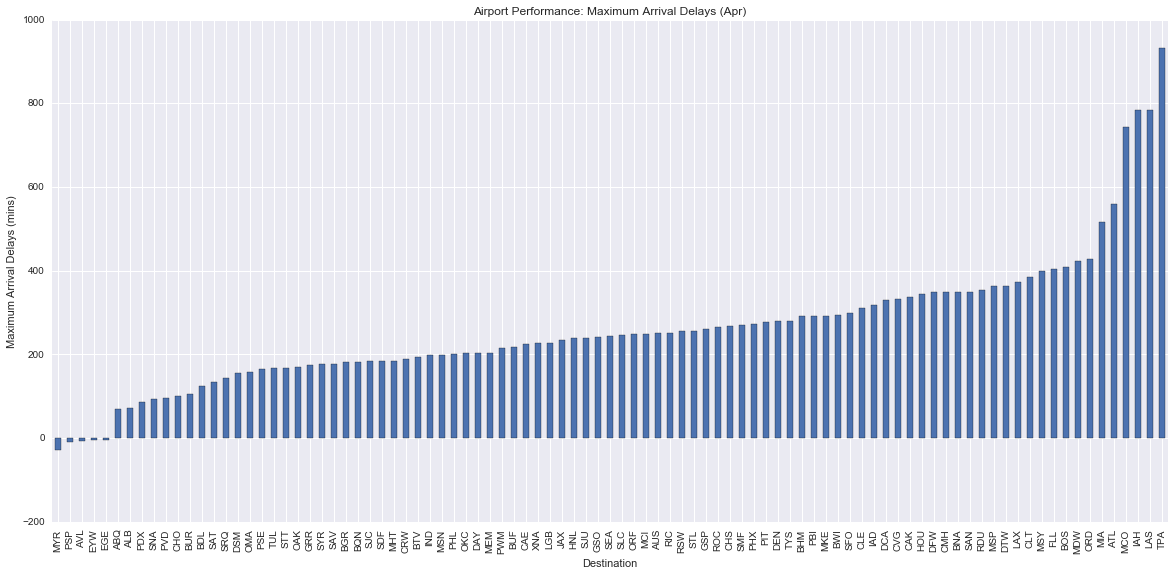

In [313]:
#Graphs for Monthly Summary

#MAXIMUM Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==4]
mean_arr_delay=flight_arr_month['max_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Maximum Arrival Delays (Apr)')
plt.xlabel('Destination')
plt.ylabel('Maximum Arrival Delays (mins)')

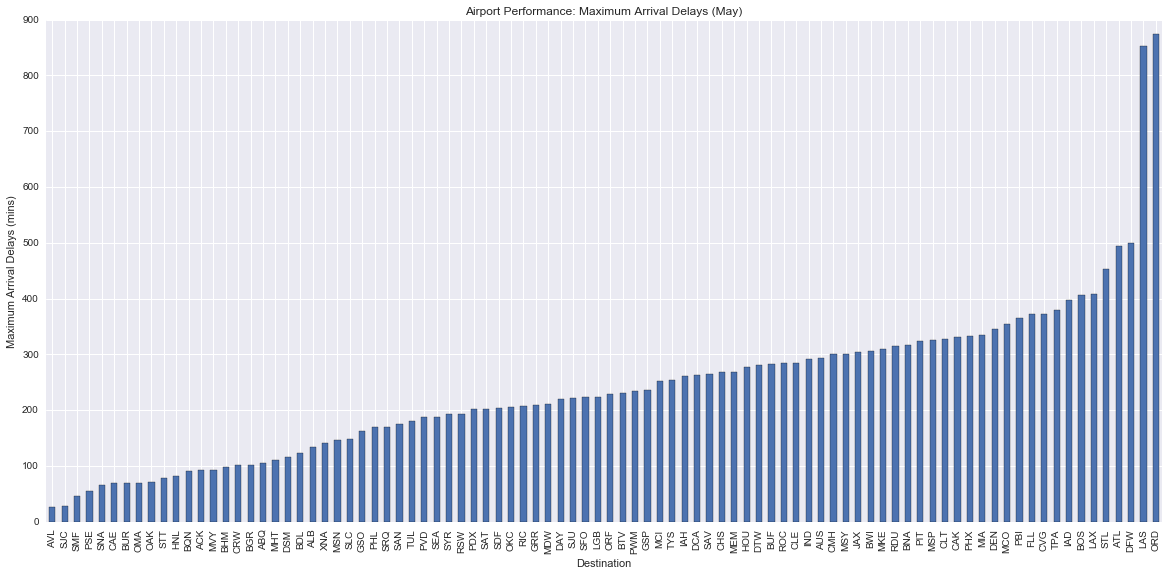

In [314]:
#Graphs for Monthly Summary

#MAXIMUM Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==5]
mean_arr_delay=flight_arr_month['max_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Maximum Arrival Delays (May)')
plt.xlabel('Destination')
plt.ylabel('Maximum Arrival Delays (mins)')

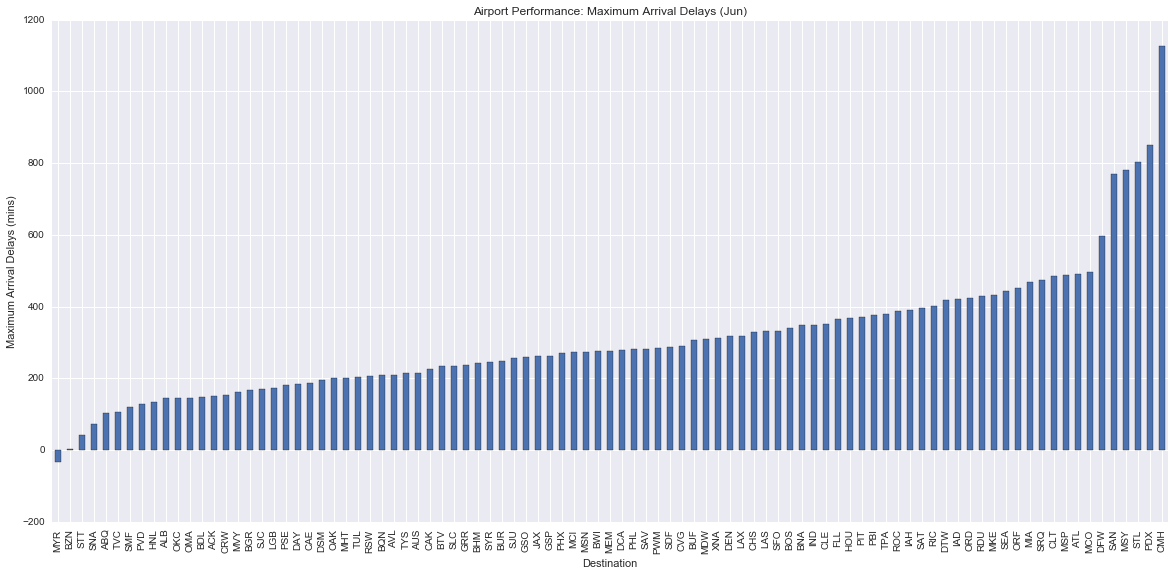

In [315]:
#Graphs for Monthly Summary

#MAXIMUM Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==6]
mean_arr_delay=flight_arr_month['max_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Maximum Arrival Delays (Jun)')
plt.xlabel('Destination')
plt.ylabel('Maximum Arrival Delays (mins)')

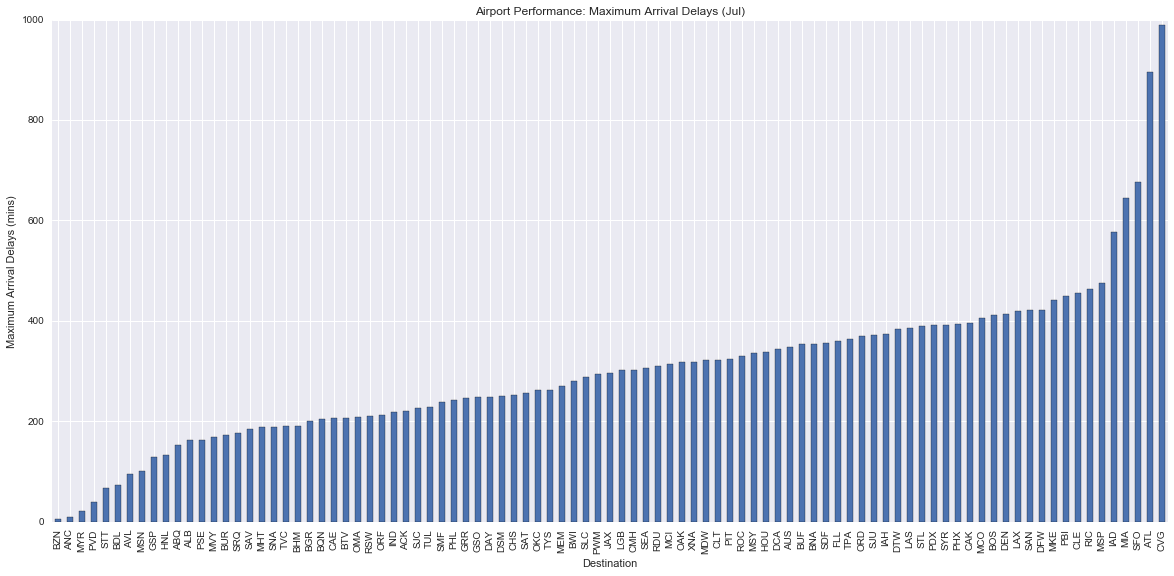

In [316]:
#Graphs for Monthly Summary

#MAXIMUM Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==7]
mean_arr_delay=flight_arr_month['max_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Maximum Arrival Delays (Jul)')
plt.xlabel('Destination')
plt.ylabel('Maximum Arrival Delays (mins)')

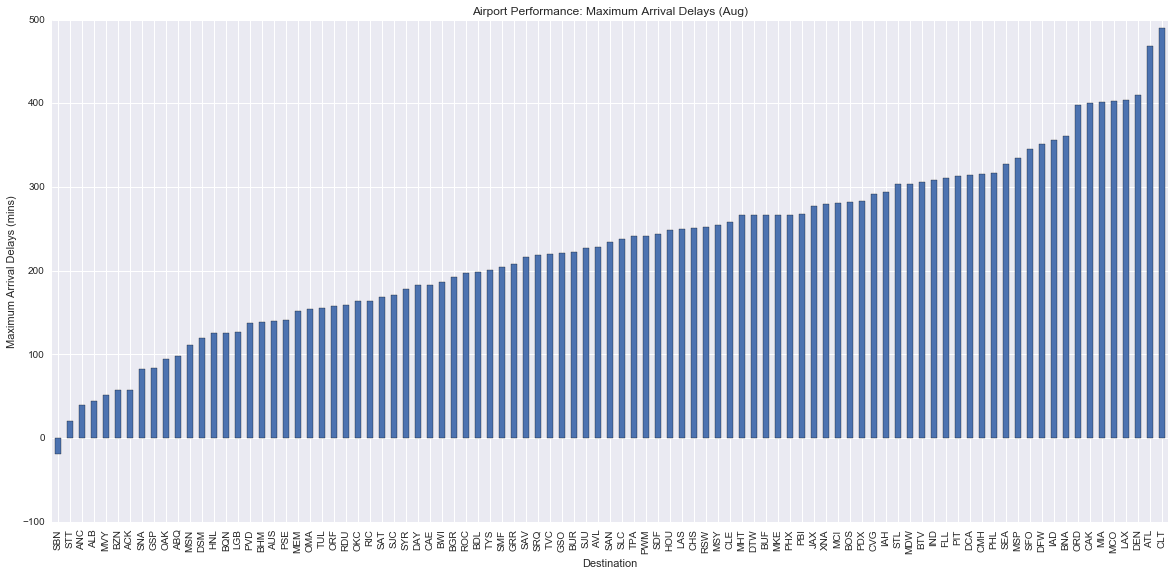

In [317]:
#Graphs for Monthly Summary

#MAXIMUM Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==8]
mean_arr_delay=flight_arr_month['max_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Maximum Arrival Delays (Aug)')
plt.xlabel('Destination')
plt.ylabel('Maximum Arrival Delays (mins)')

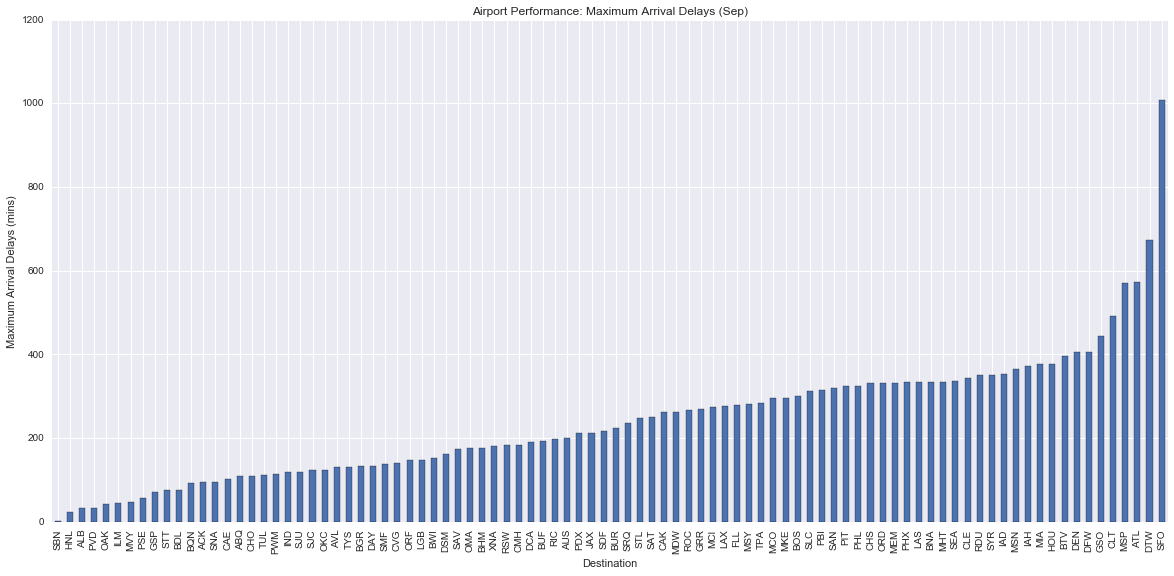

In [318]:
#Graphs for Monthly Summary

#MAXIMUM Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==9]
mean_arr_delay=flight_arr_month['max_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Maximum Arrival Delays (Sep)')
plt.xlabel('Destination')
plt.ylabel('Maximum Arrival Delays (mins)')

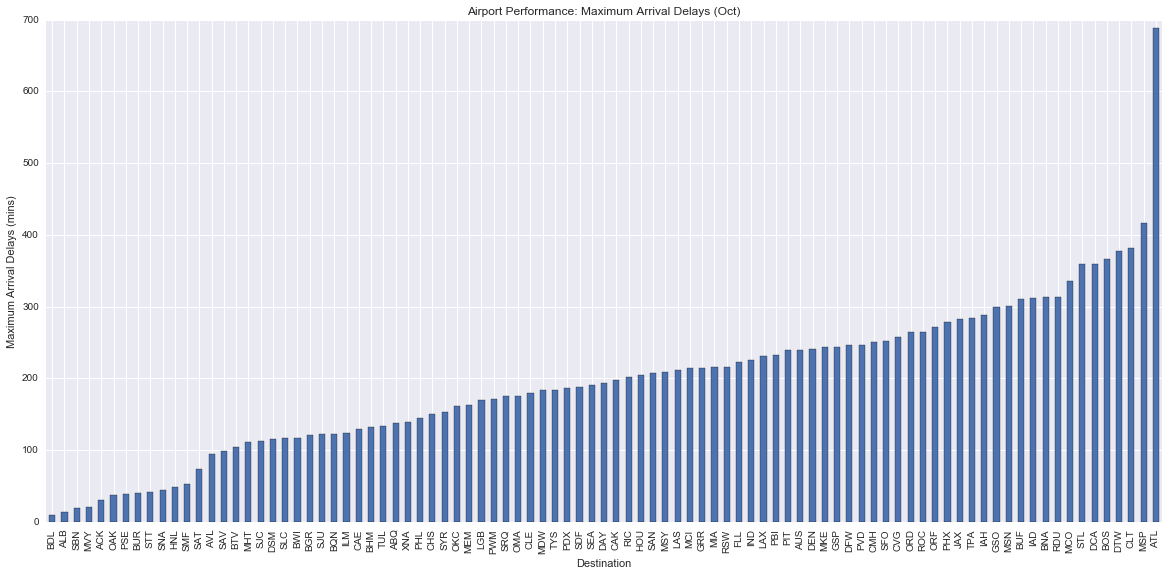

In [319]:
#Graphs for Monthly Summary

#MAXIMUM Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==10]
mean_arr_delay=flight_arr_month['max_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Maximum Arrival Delays (Oct)')
plt.xlabel('Destination')
plt.ylabel('Maximum Arrival Delays (mins)')

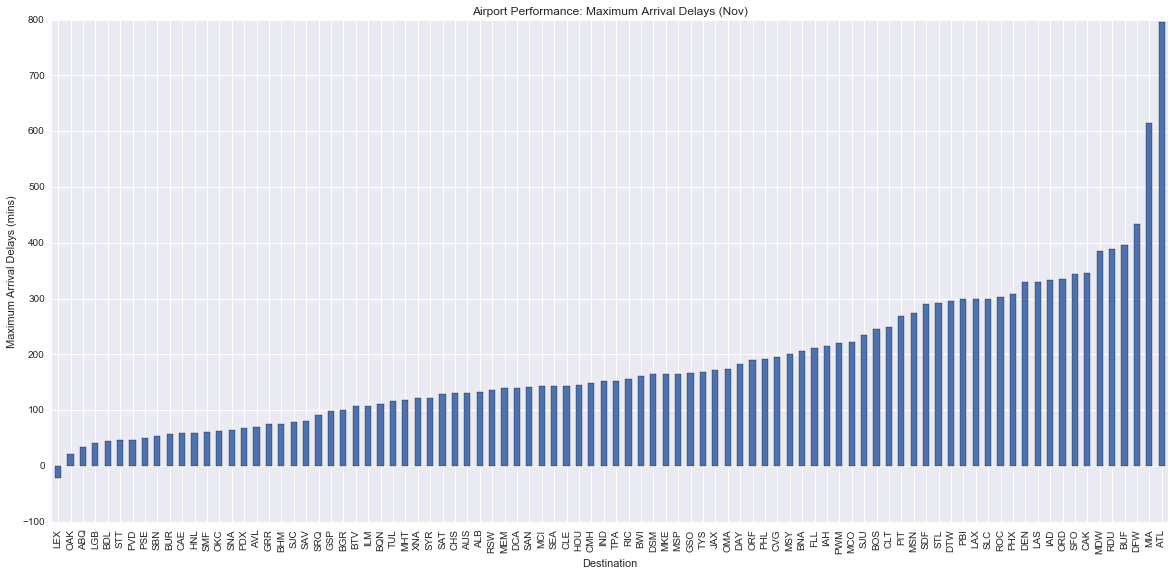

In [320]:
#Graphs for Monthly Summary

#MAXIMUM Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==11]
mean_arr_delay=flight_arr_month['max_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Maximum Arrival Delays (Nov)')
plt.xlabel('Destination')
plt.ylabel('Maximum Arrival Delays (mins)')

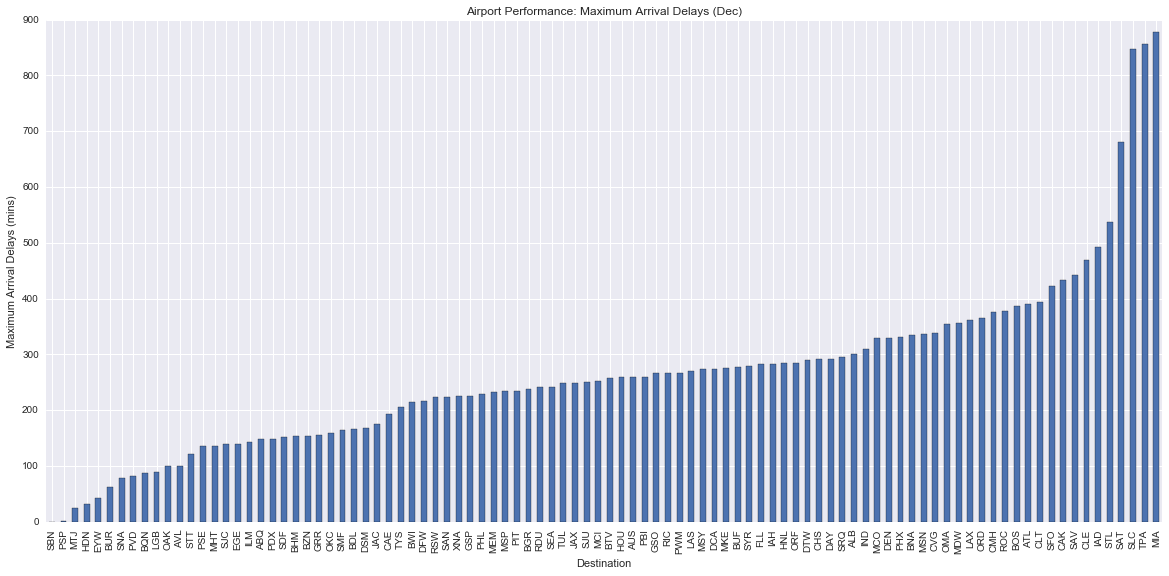

In [321]:
#Graphs for Monthly Summary

#MAXIMUM Arrival Delay
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==12]
mean_arr_delay=flight_arr_month['max_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Maximum Arrival Delays (Dec)')
plt.xlabel('Destination')
plt.ylabel('Maximum Arrival Delays (mins)')

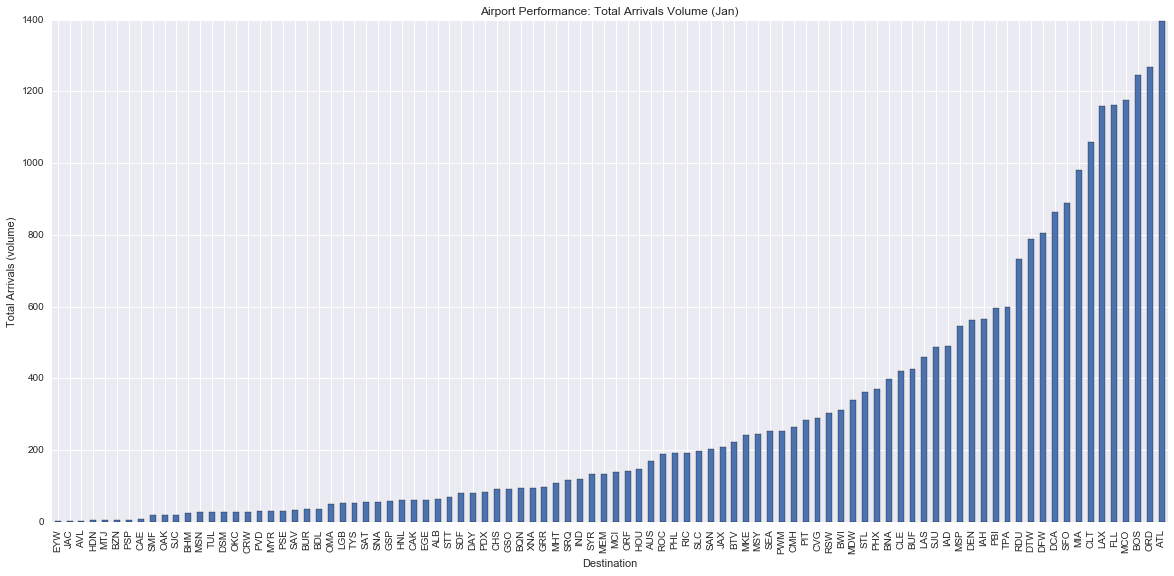

In [322]:
#Graphs for Monthly Summary

#TOTAL Arrivals Volume
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==1]
mean_arr_delay=flight_arr_month['total_arr_num']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Total Arrivals Volume (Jan)')
plt.xlabel('Destination')
plt.ylabel('Total Arrivals (volume)')

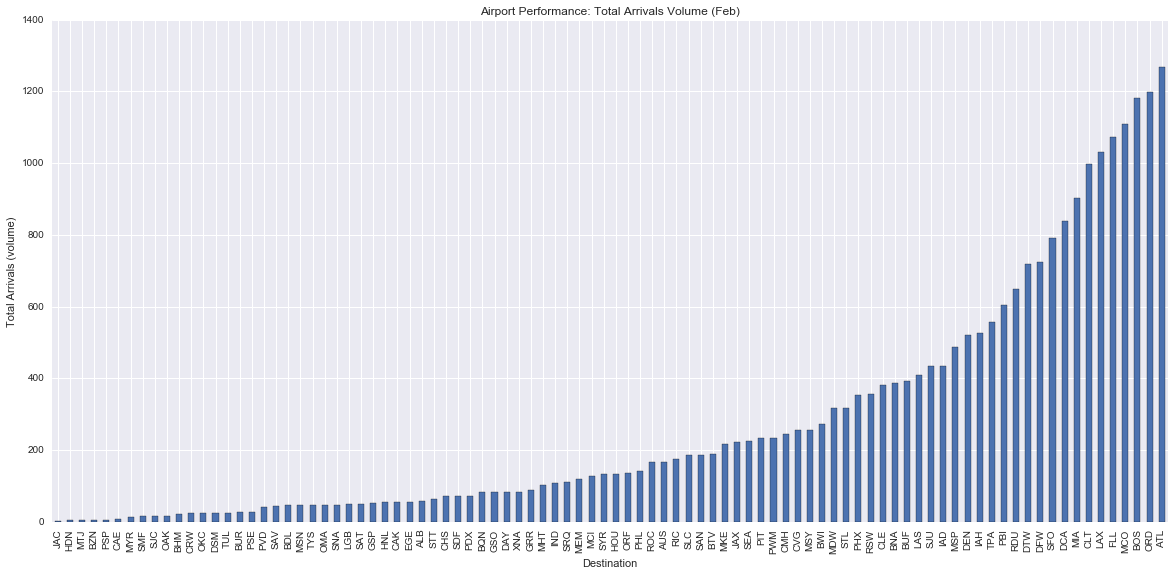

In [323]:
#Graphs for Monthly Summary

#TOTAL Arrivals Volume
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==2]
mean_arr_delay=flight_arr_month['total_arr_num']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Total Arrivals Volume (Feb)')
plt.xlabel('Destination')
plt.ylabel('Total Arrivals (volume)')

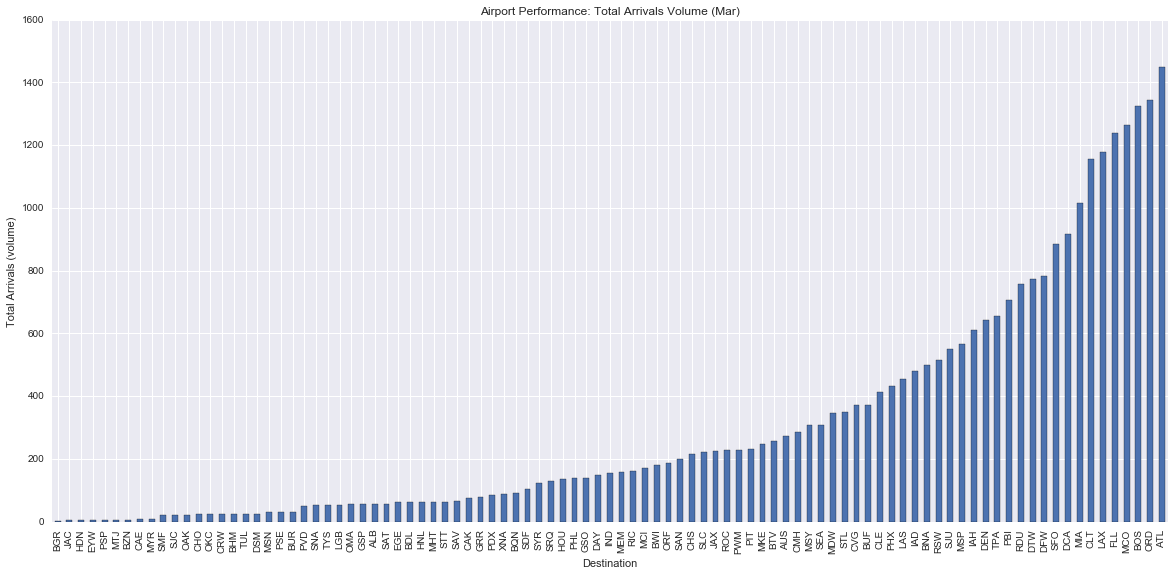

In [324]:
#Graphs for Monthly Summary

#TOTAL Arrivals Volume
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==3]
mean_arr_delay=flight_arr_month['total_arr_num']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Total Arrivals Volume (Mar)')
plt.xlabel('Destination')
plt.ylabel('Total Arrivals (volume)')

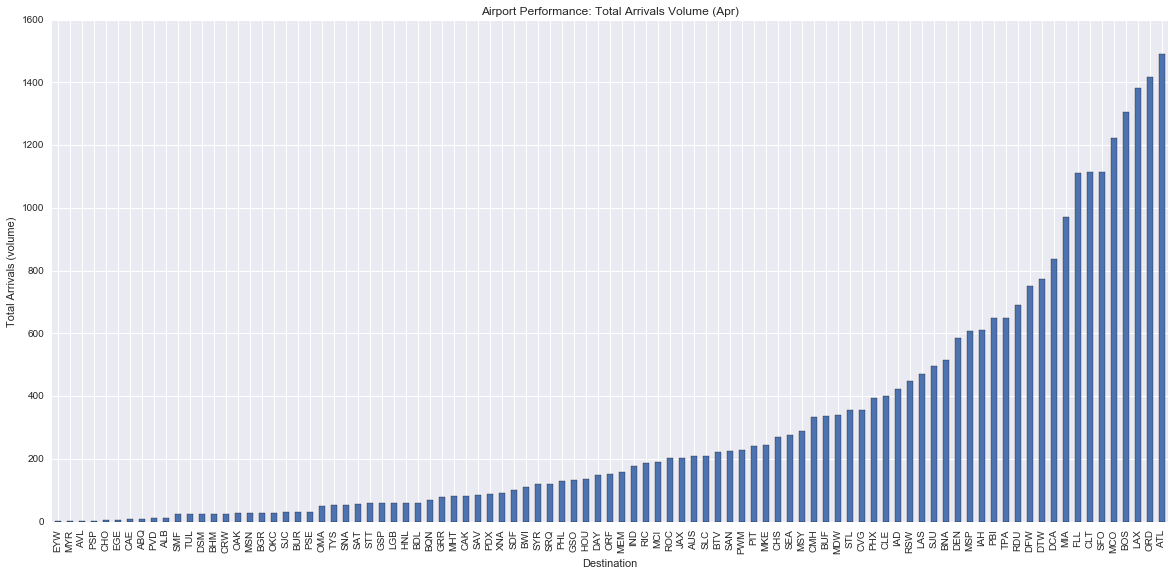

In [325]:
#Graphs for Monthly Summary

#TOTAL Arrivals Volume
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==4]
mean_arr_delay=flight_arr_month['total_arr_num']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Total Arrivals Volume (Apr)')
plt.xlabel('Destination')
plt.ylabel('Total Arrivals (volume)')

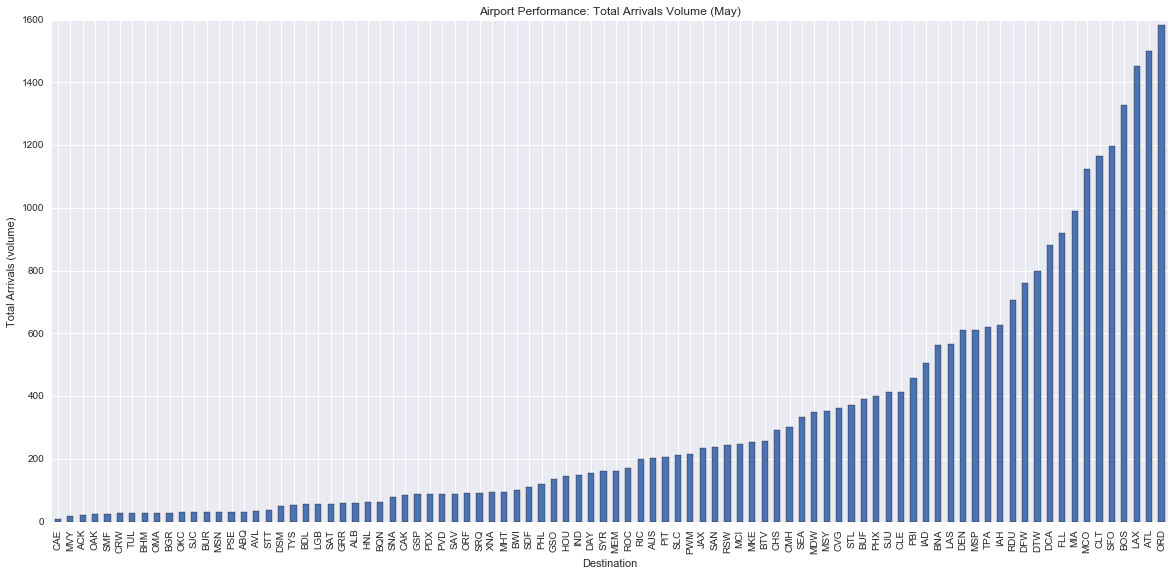

In [326]:
#Graphs for Monthly Summary

#TOTAL Arrivals Volume
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==5]
mean_arr_delay=flight_arr_month['total_arr_num']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Total Arrivals Volume (May)')
plt.xlabel('Destination')
plt.ylabel('Total Arrivals (volume)')

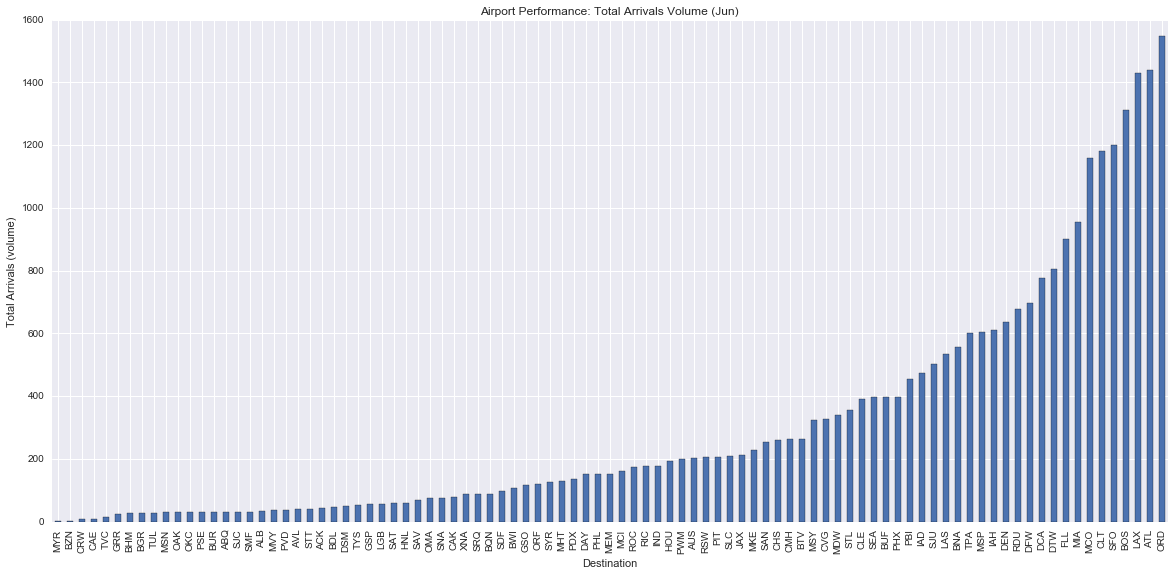

In [327]:
#Graphs for Monthly Summary

#TOTAL Arrivals Volume
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==6]
mean_arr_delay=flight_arr_month['total_arr_num']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Total Arrivals Volume (Jun)')
plt.xlabel('Destination')
plt.ylabel('Total Arrivals (volume)')

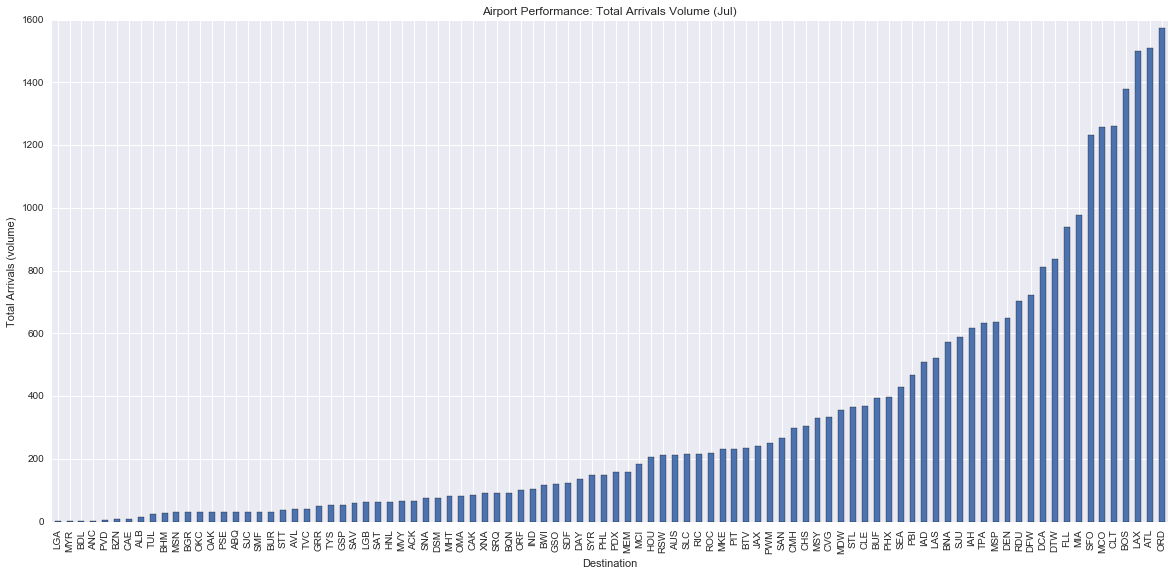

In [329]:
#Graphs for Monthly Summary

#TOTAL Arrivals Volume
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==7]
mean_arr_delay=flight_arr_month['total_arr_num']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Total Arrivals Volume (Jul)')
plt.xlabel('Destination')
plt.ylabel('Total Arrivals (volume)')

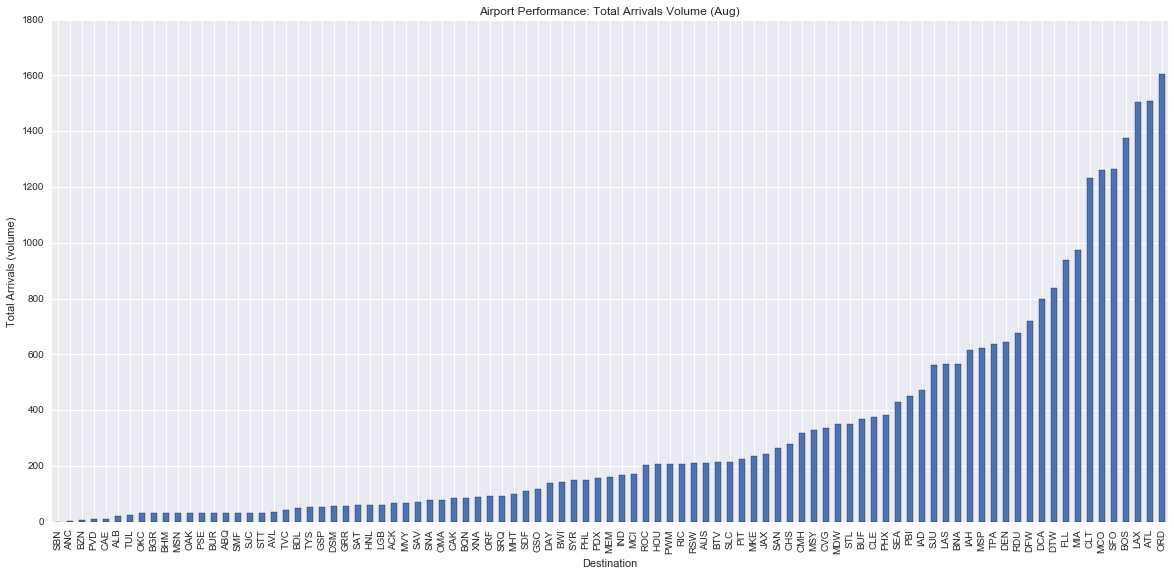

In [330]:
#Graphs for Monthly Summary

#TOTAL Arrivals Volume
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==8]
mean_arr_delay=flight_arr_month['total_arr_num']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Total Arrivals Volume (Aug)')
plt.xlabel('Destination')
plt.ylabel('Total Arrivals (volume)')

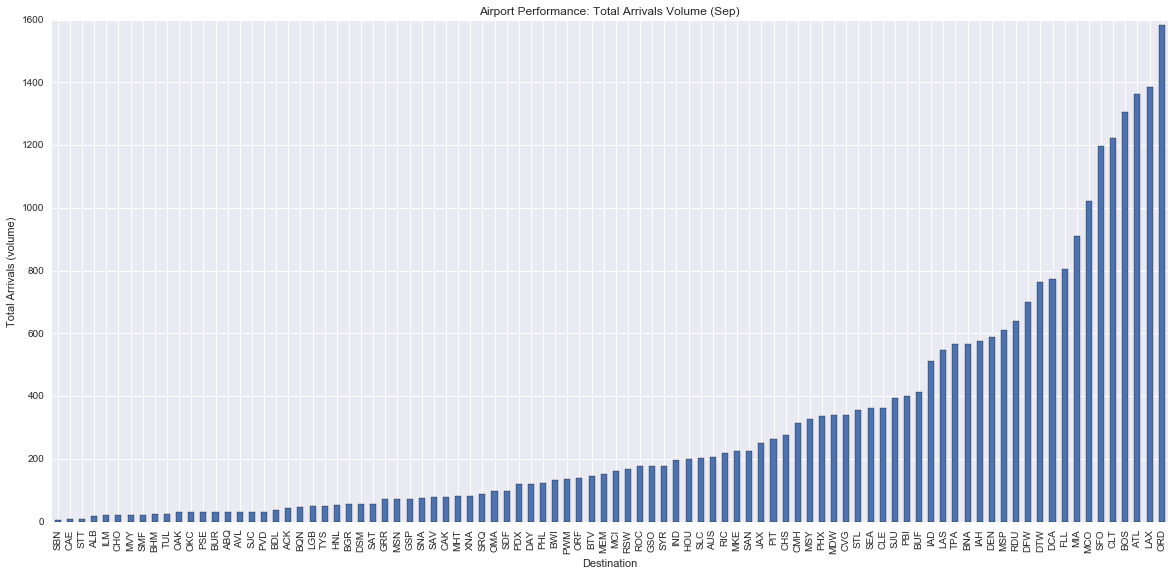

In [331]:
#Graphs for Monthly Summary

#TOTAL Arrivals Volume
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==9]
mean_arr_delay=flight_arr_month['total_arr_num']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Total Arrivals Volume (Sep)')
plt.xlabel('Destination')
plt.ylabel('Total Arrivals (volume)')

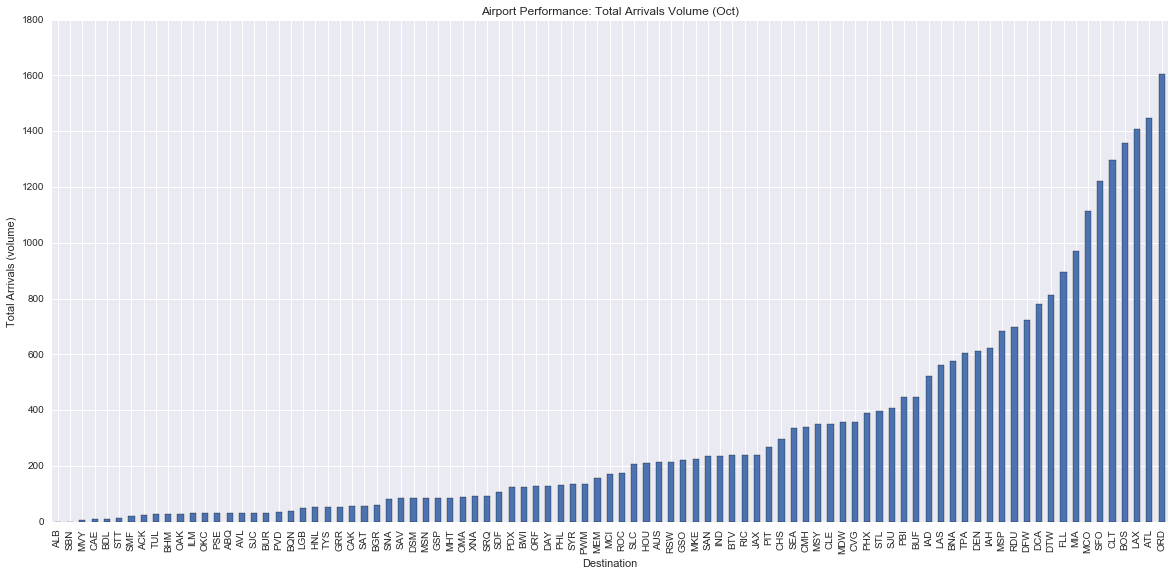

In [332]:
#Graphs for Monthly Summary

#TOTAL Arrivals Volume
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==10]
mean_arr_delay=flight_arr_month['total_arr_num']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Total Arrivals Volume (Oct)')
plt.xlabel('Destination')
plt.ylabel('Total Arrivals (volume)')

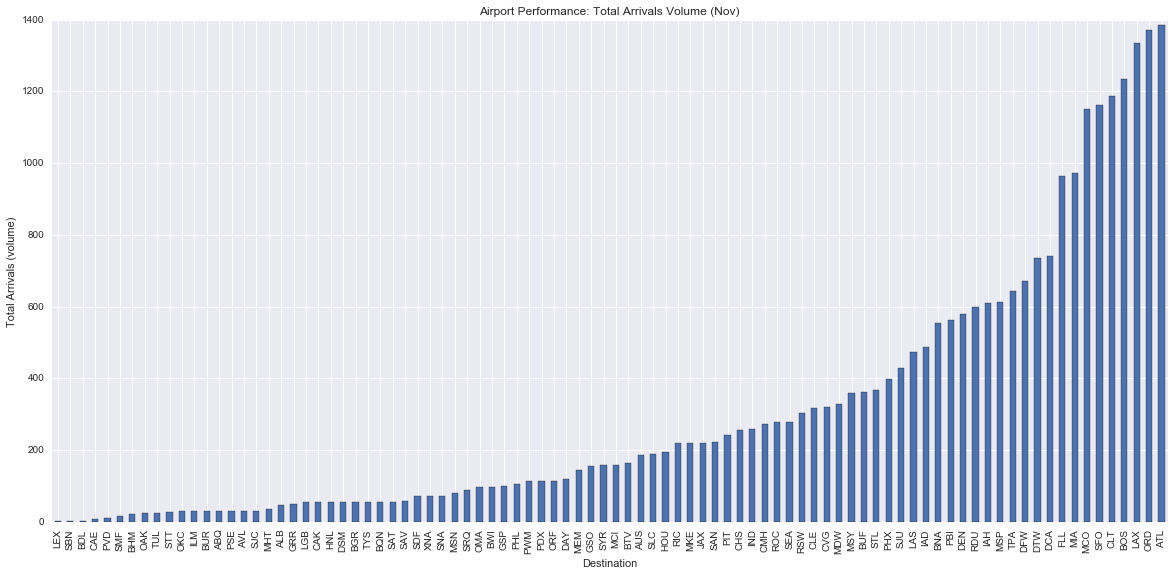

In [333]:
#Graphs for Monthly Summary

#TOTAL Arrivals Volume
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==11]
mean_arr_delay=flight_arr_month['total_arr_num']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Total Arrivals Volume (Nov)')
plt.xlabel('Destination')
plt.ylabel('Total Arrivals (volume)')

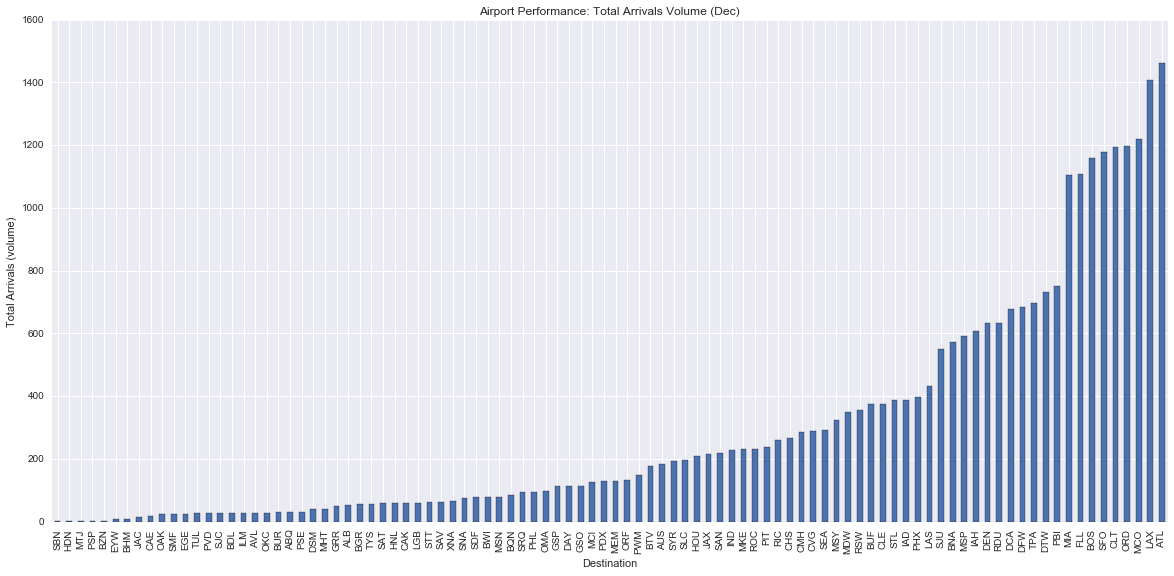

In [334]:
#Graphs for Monthly Summary

#TOTAL Arrivals Volume
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==12]
mean_arr_delay=flight_arr_month['total_arr_num']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Total Arrivals Volume (Dec)')
plt.xlabel('Destination')
plt.ylabel('Total Arrivals (volume)')

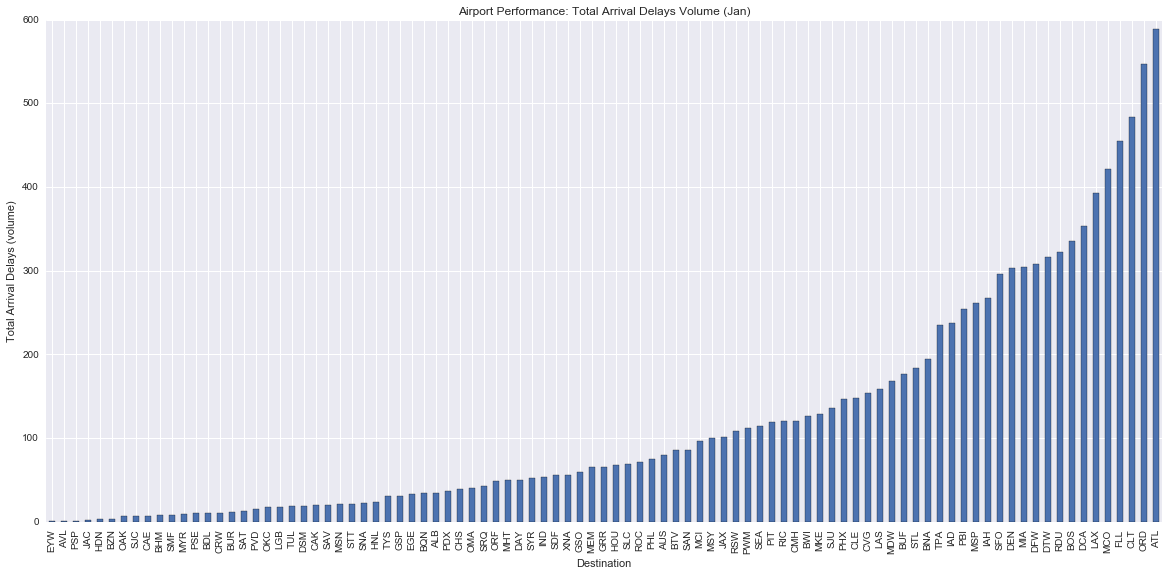

In [335]:
#Graphs for Monthly Summary

#TOTAL Arrival Delays Volume
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==1]
mean_arr_delay=flight_arr_month['total_arr_delays_num']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Total Arrival Delays Volume (Jan)')
plt.xlabel('Destination')
plt.ylabel('Total Arrival Delays (volume)')

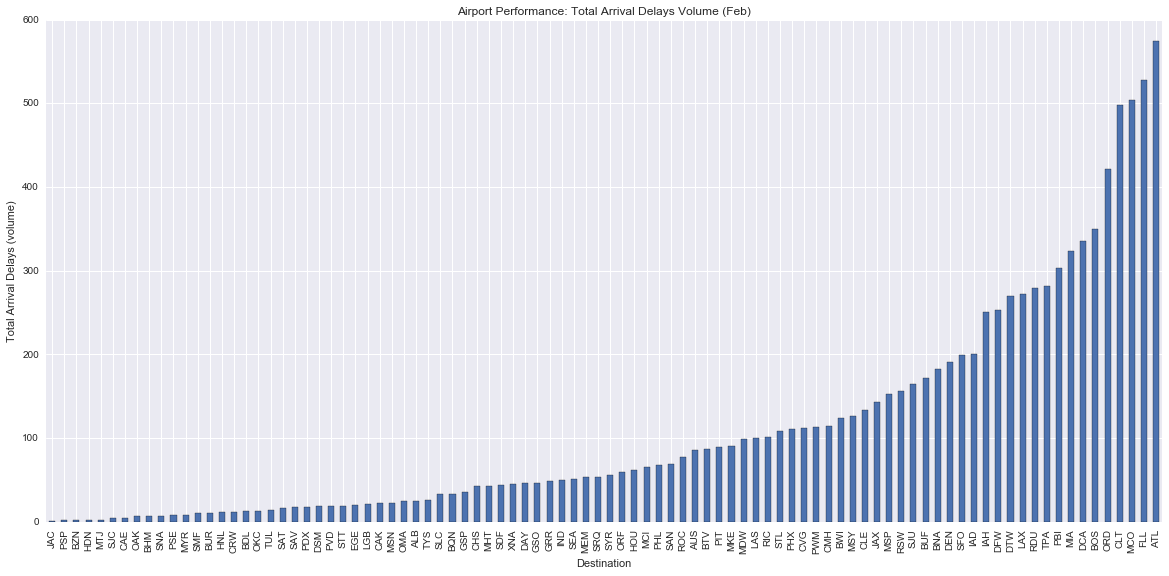

In [336]:
#Graphs for Monthly Summary

#TOTAL Arrival Delays Volume
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==2]
mean_arr_delay=flight_arr_month['total_arr_delays_num']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Total Arrival Delays Volume (Feb)')
plt.xlabel('Destination')
plt.ylabel('Total Arrival Delays (volume)')

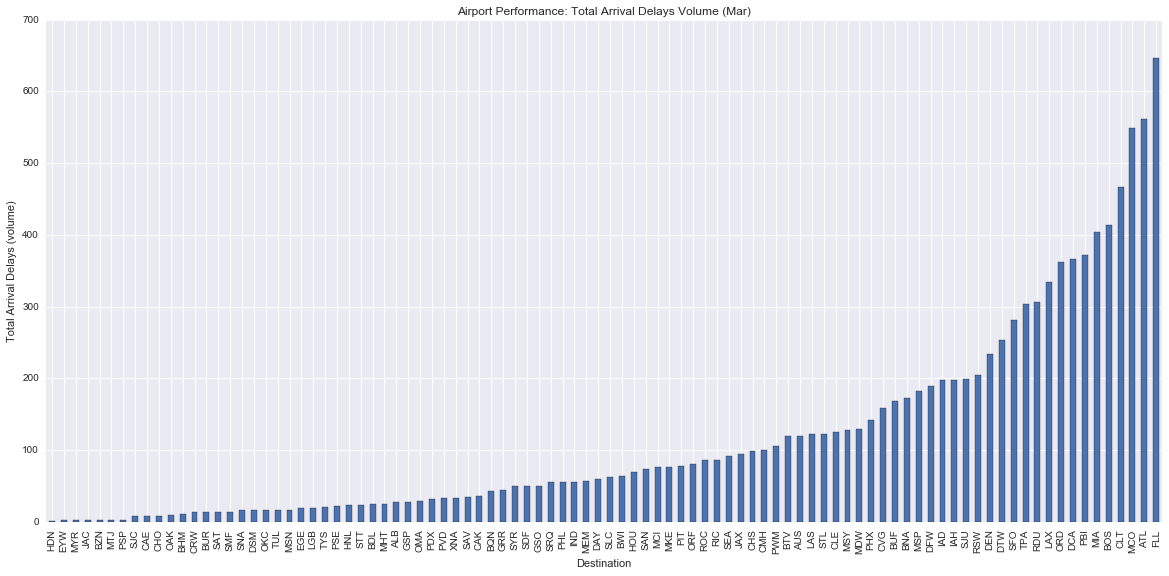

In [338]:
#Graphs for Monthly Summary

#TOTAL Arrival Delays Volume
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==3]
mean_arr_delay=flight_arr_month['total_arr_delays_num']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Total Arrival Delays Volume (Mar)')
plt.xlabel('Destination')
plt.ylabel('Total Arrival Delays (volume)')

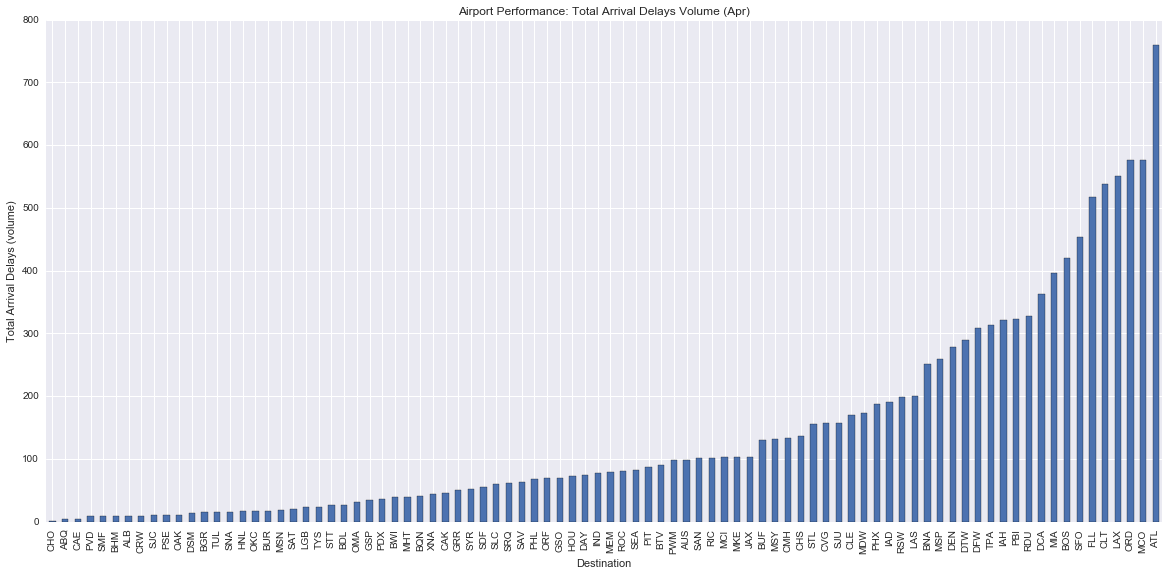

In [339]:
#Graphs for Monthly Summary

#TOTAL Arrival Delays Volume
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==4]
mean_arr_delay=flight_arr_month['total_arr_delays_num']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Total Arrival Delays Volume (Apr)')
plt.xlabel('Destination')
plt.ylabel('Total Arrival Delays (volume)')

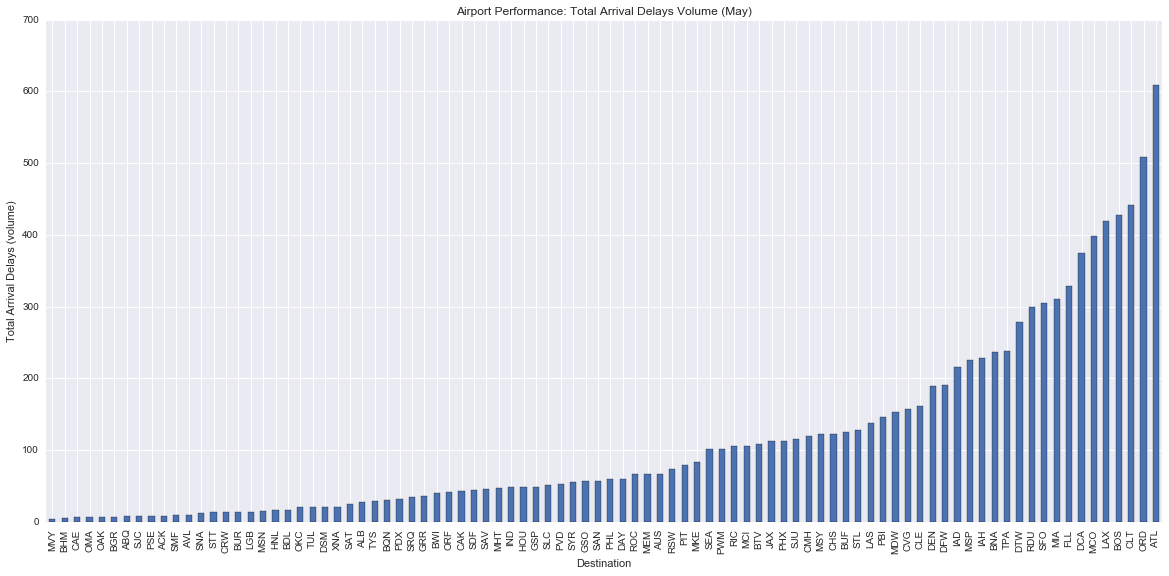

In [340]:
#Graphs for Monthly Summary

#TOTAL Arrival Delays Volume
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==5]
mean_arr_delay=flight_arr_month['total_arr_delays_num']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Total Arrival Delays Volume (May)')
plt.xlabel('Destination')
plt.ylabel('Total Arrival Delays (volume)')

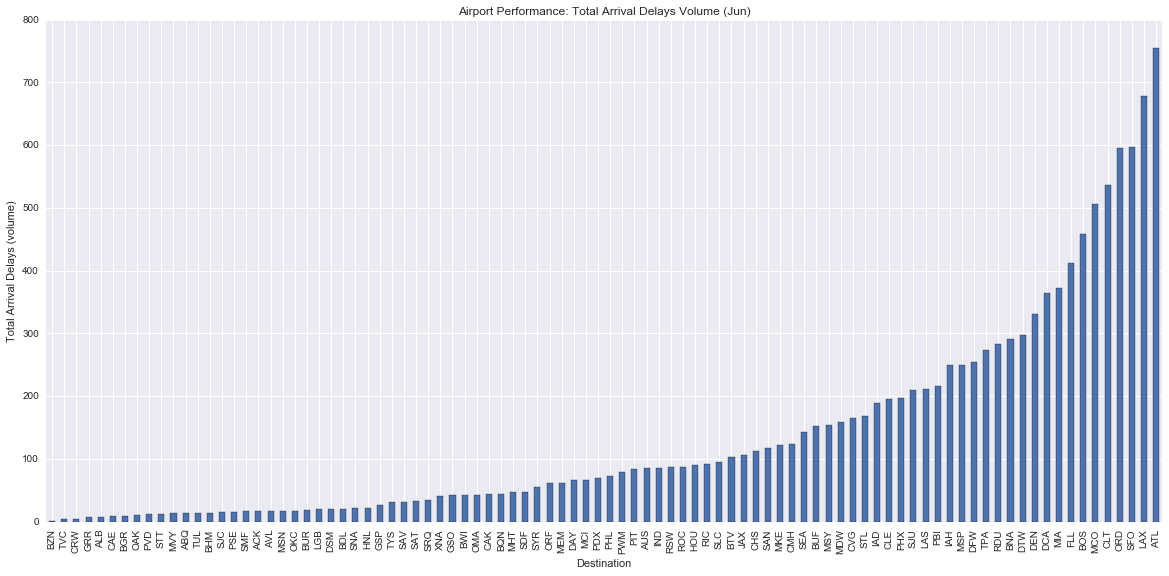

In [341]:
#Graphs for Monthly Summary

#TOTAL Arrival Delays Volume
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==6]
mean_arr_delay=flight_arr_month['total_arr_delays_num']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Total Arrival Delays Volume (Jun)')
plt.xlabel('Destination')
plt.ylabel('Total Arrival Delays (volume)')

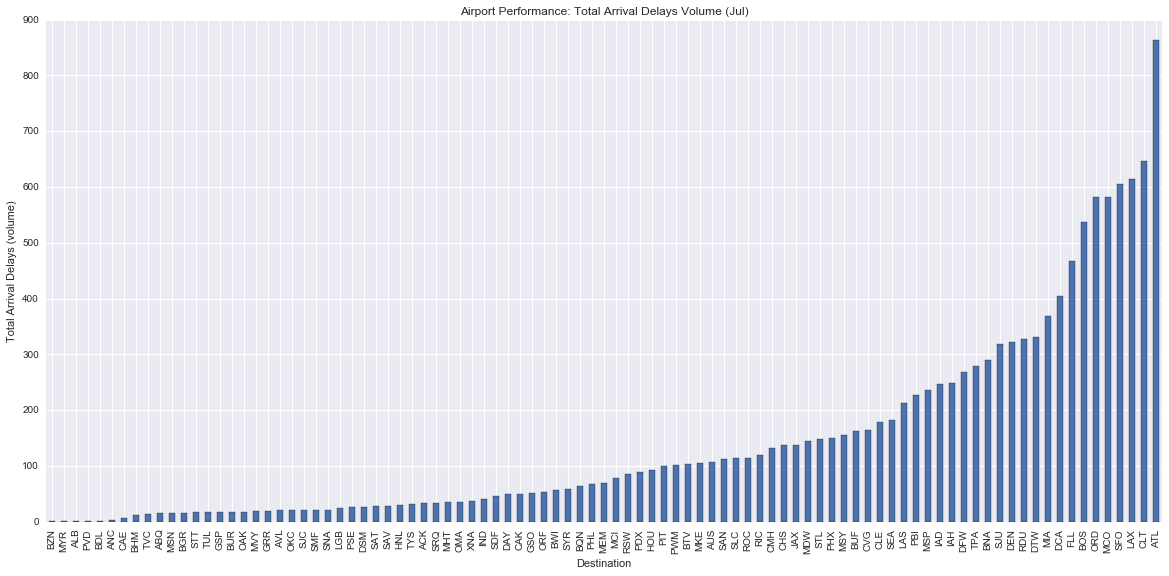

In [342]:
#Graphs for Monthly Summary

#TOTAL Arrival Delays Volume
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==7]
mean_arr_delay=flight_arr_month['total_arr_delays_num']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Total Arrival Delays Volume (Jul)')
plt.xlabel('Destination')
plt.ylabel('Total Arrival Delays (volume)')

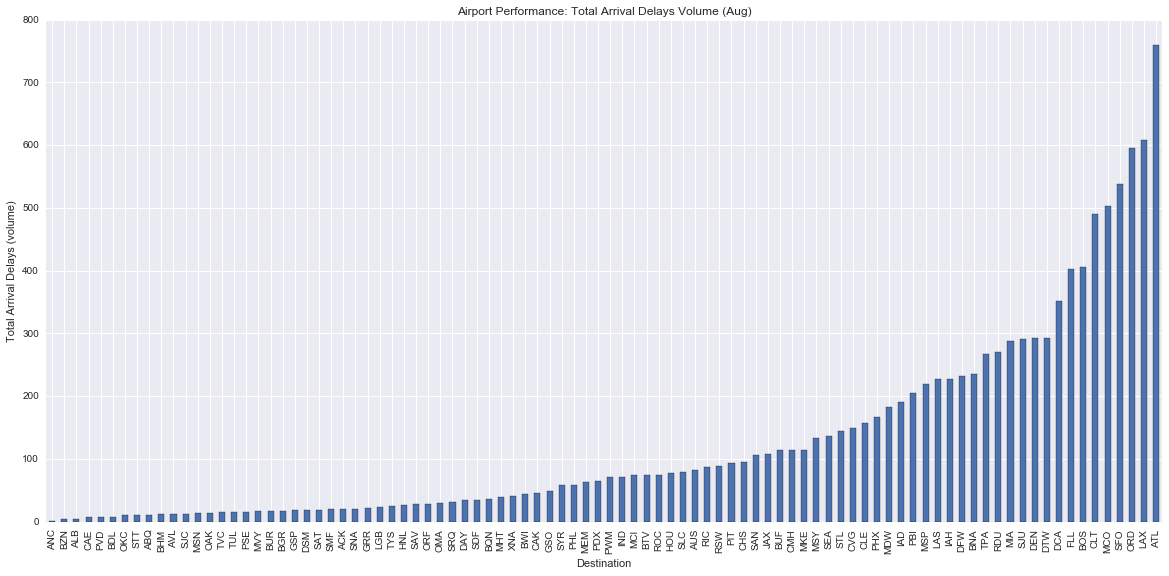

In [343]:
#Graphs for Monthly Summary

#TOTAL Arrival Delays Volume
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==8]
mean_arr_delay=flight_arr_month['total_arr_delays_num']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Total Arrival Delays Volume (Aug)')
plt.xlabel('Destination')
plt.ylabel('Total Arrival Delays (volume)')

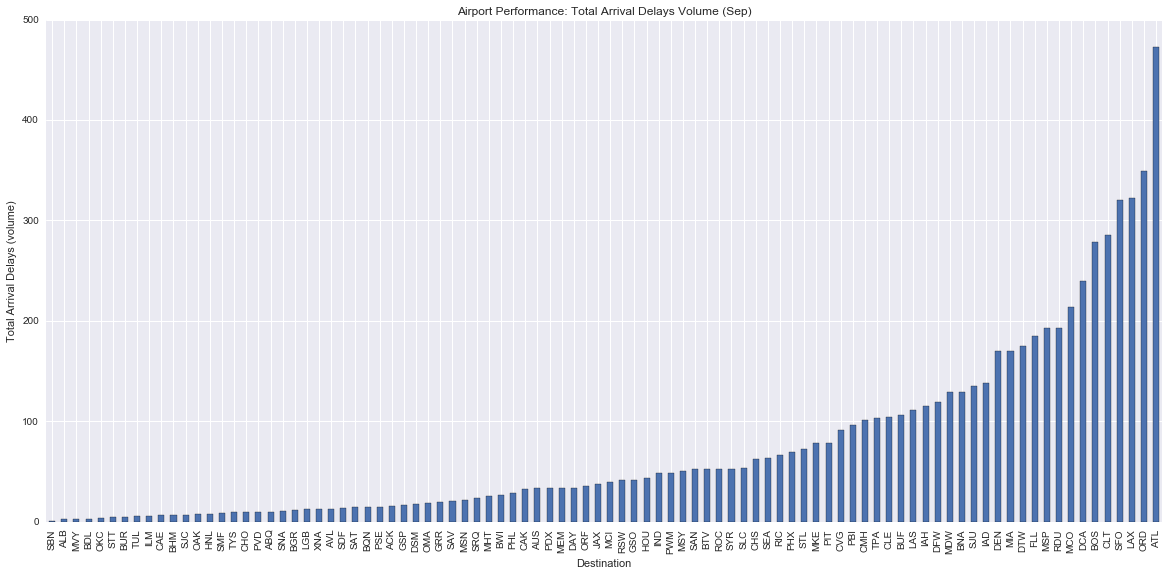

In [344]:
#Graphs for Monthly Summary

#TOTAL Arrival Delays Volume
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==9]
mean_arr_delay=flight_arr_month['total_arr_delays_num']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Total Arrival Delays Volume (Sep)')
plt.xlabel('Destination')
plt.ylabel('Total Arrival Delays (volume)')

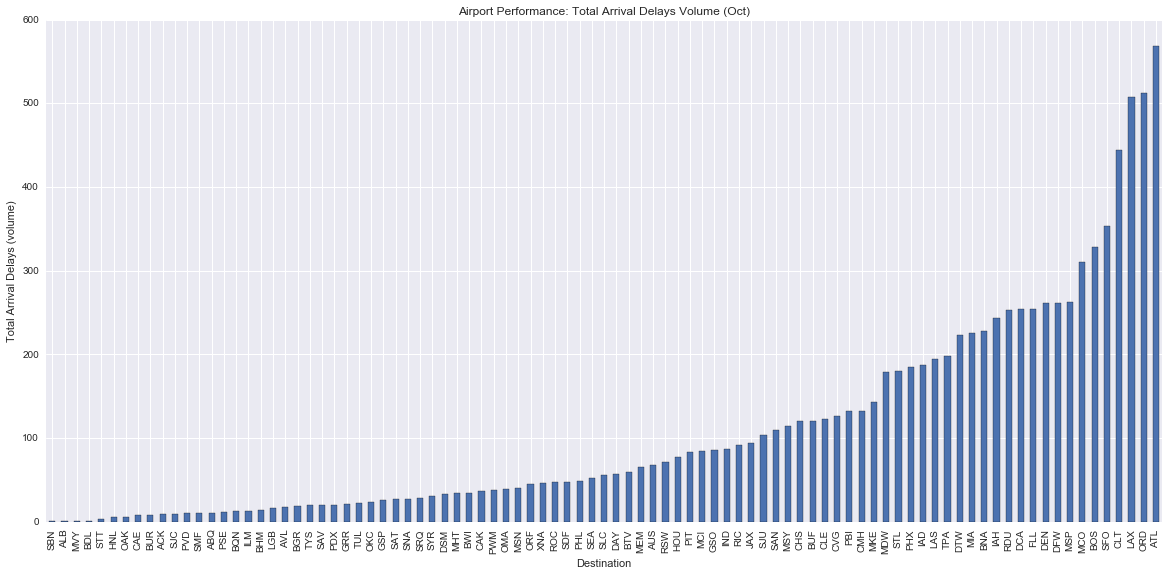

In [345]:
#Graphs for Monthly Summary

#TOTAL Arrival Delays Volume
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==10]
mean_arr_delay=flight_arr_month['total_arr_delays_num']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Total Arrival Delays Volume (Oct)')
plt.xlabel('Destination')
plt.ylabel('Total Arrival Delays (volume)')

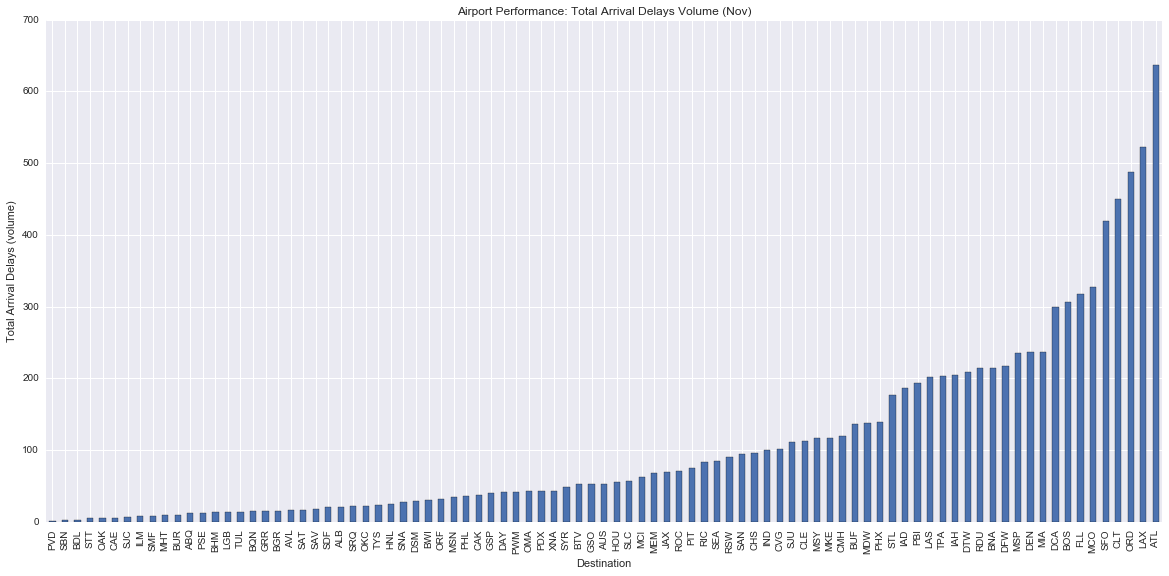

In [346]:
#Graphs for Monthly Summary

#TOTAL Arrival Delays Volume
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==11]
mean_arr_delay=flight_arr_month['total_arr_delays_num']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Total Arrival Delays Volume (Nov)')
plt.xlabel('Destination')
plt.ylabel('Total Arrival Delays (volume)')

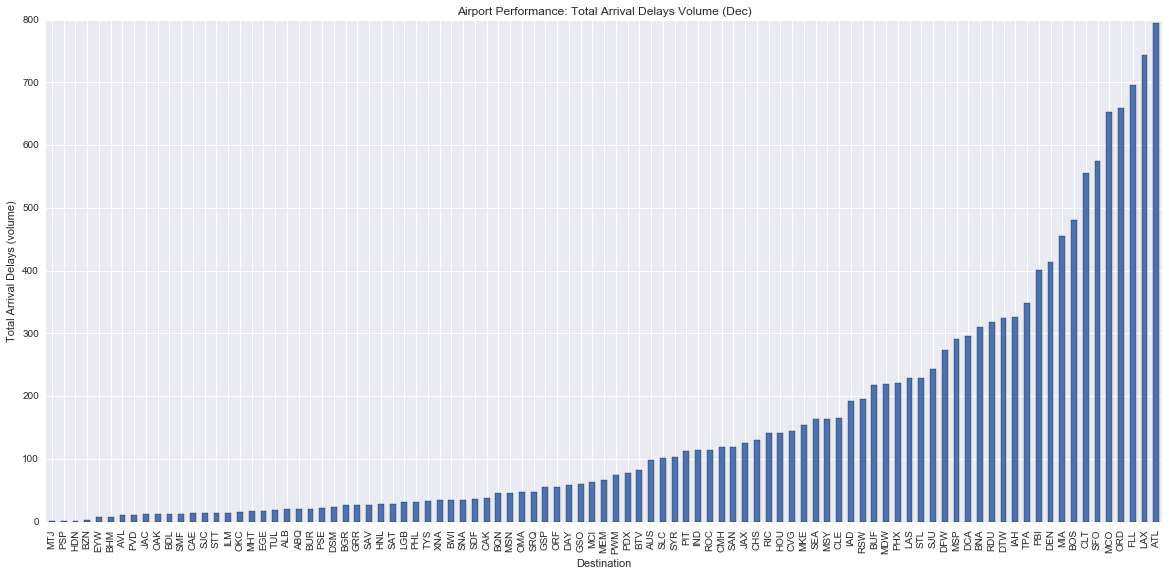

In [347]:
#Graphs for Monthly Summary

#TOTAL Arrival Delays Volume
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==12]
mean_arr_delay=flight_arr_month['total_arr_delays_num']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Total Arrival Delays Volume (Dec)')
plt.xlabel('Destination')
plt.ylabel('Total Arrival Delays (volume)')

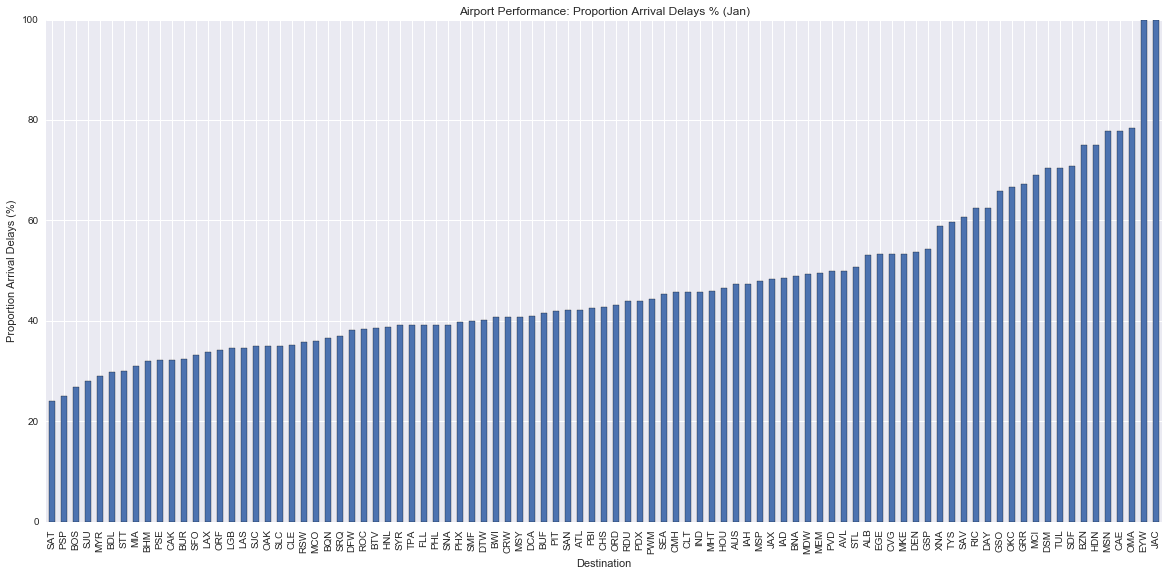

In [348]:
#Graphs for Monthly Summary

#PROPORTION Arrival Delays (%)
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==1]
mean_arr_delay=flight_arr_month['arr_delays_%']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Proportion Arrival Delays % (Jan)')
plt.xlabel('Destination')
plt.ylabel('Proportion Arrival Delays (%)')

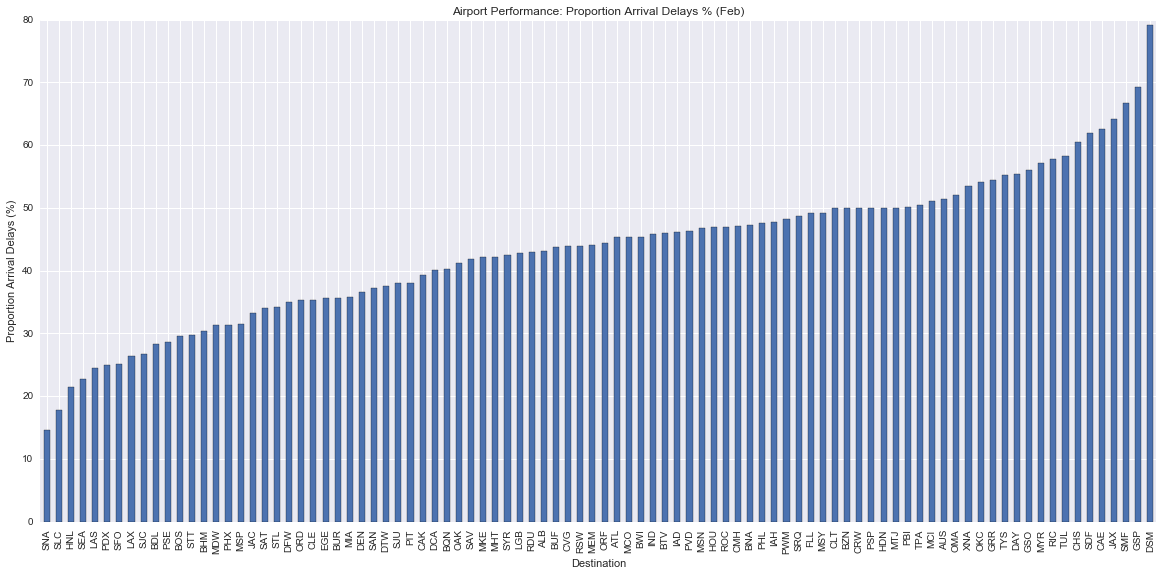

In [349]:
#Graphs for Monthly Summary

#PROPORTION Arrival Delays (%)
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==2]
mean_arr_delay=flight_arr_month['arr_delays_%']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Proportion Arrival Delays % (Feb)')
plt.xlabel('Destination')
plt.ylabel('Proportion Arrival Delays (%)')

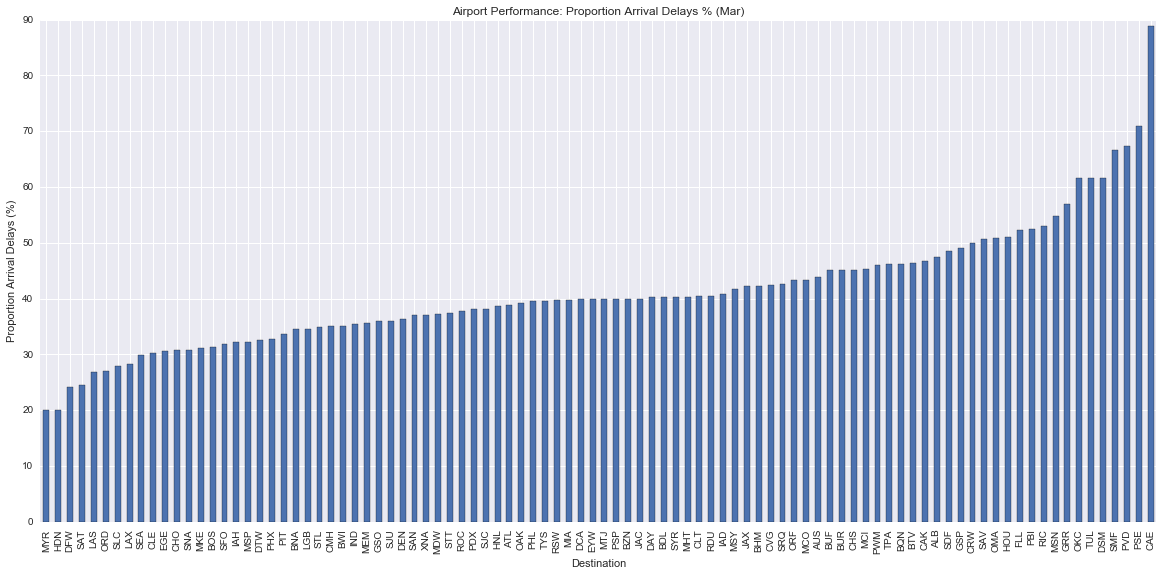

In [350]:
#Graphs for Monthly Summary

#PROPORTION Arrival Delays (%)
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==3]
mean_arr_delay=flight_arr_month['arr_delays_%']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Proportion Arrival Delays % (Mar)')
plt.xlabel('Destination')
plt.ylabel('Proportion Arrival Delays (%)')

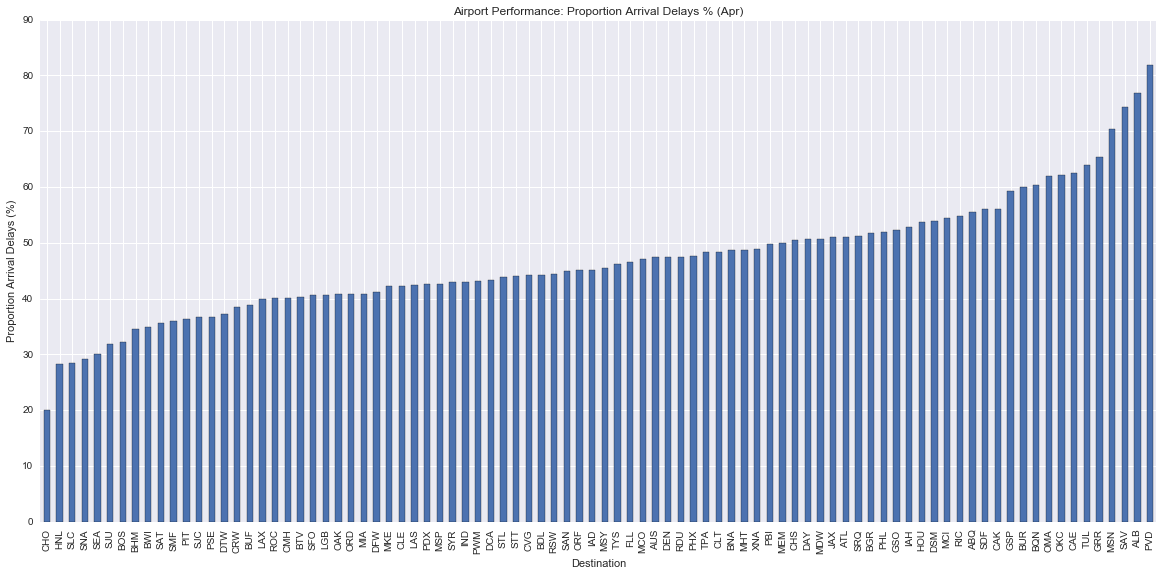

In [351]:
#Graphs for Monthly Summary

#PROPORTION Arrival Delays (%)
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==4]
mean_arr_delay=flight_arr_month['arr_delays_%']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Proportion Arrival Delays % (Apr)')
plt.xlabel('Destination')
plt.ylabel('Proportion Arrival Delays (%)')

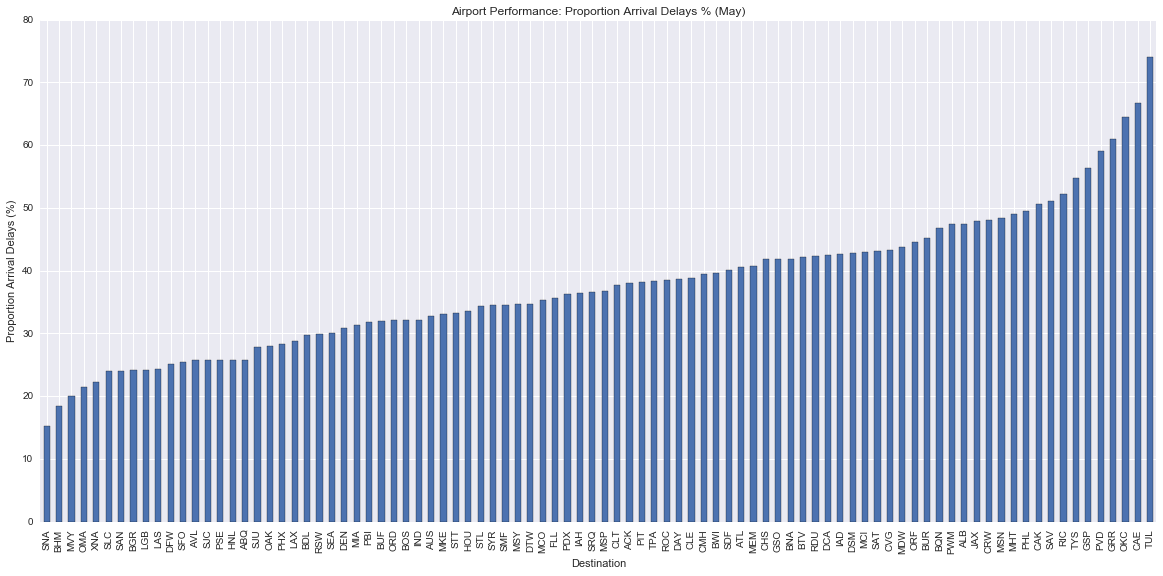

In [352]:
#Graphs for Monthly Summary

#PROPORTION Arrival Delays (%)
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==5]
mean_arr_delay=flight_arr_month['arr_delays_%']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Proportion Arrival Delays % (May)')
plt.xlabel('Destination')
plt.ylabel('Proportion Arrival Delays (%)')

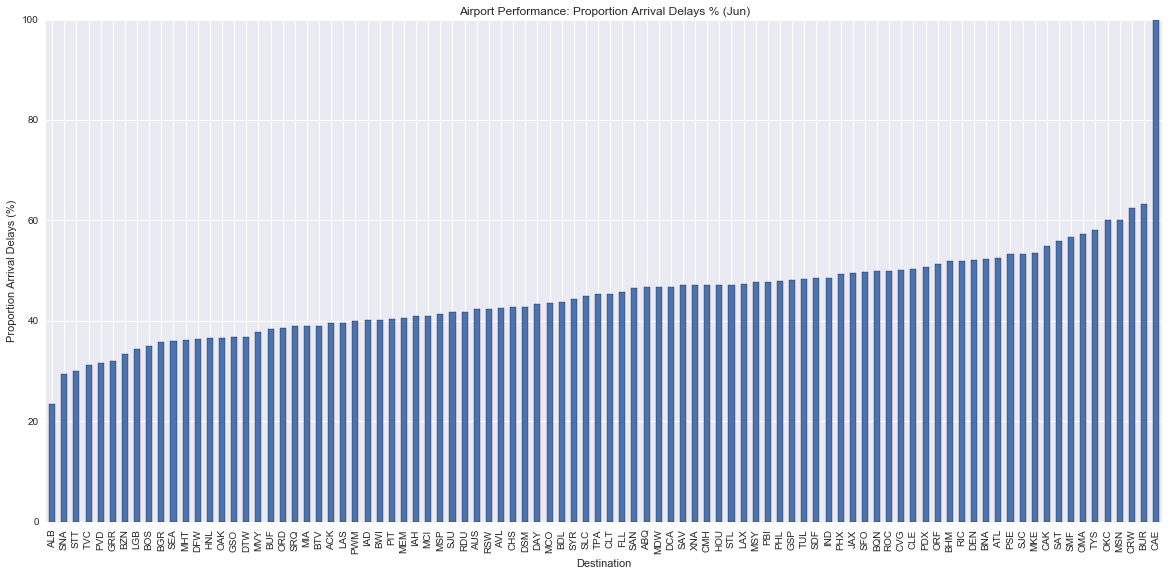

In [353]:
#Graphs for Monthly Summary

#PROPORTION Arrival Delays (%)
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==6]
mean_arr_delay=flight_arr_month['arr_delays_%']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Proportion Arrival Delays % (Jun)')
plt.xlabel('Destination')
plt.ylabel('Proportion Arrival Delays (%)')

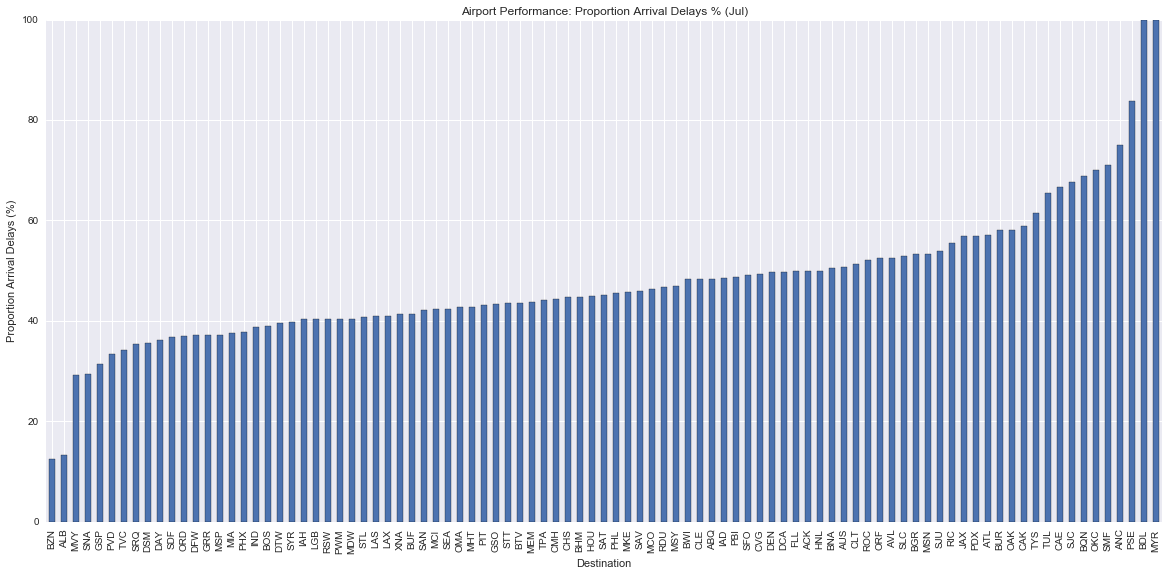

In [354]:
#Graphs for Monthly Summary

#PROPORTION Arrival Delays (%)
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==7]
mean_arr_delay=flight_arr_month['arr_delays_%']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Proportion Arrival Delays % (Jul)')
plt.xlabel('Destination')
plt.ylabel('Proportion Arrival Delays (%)')

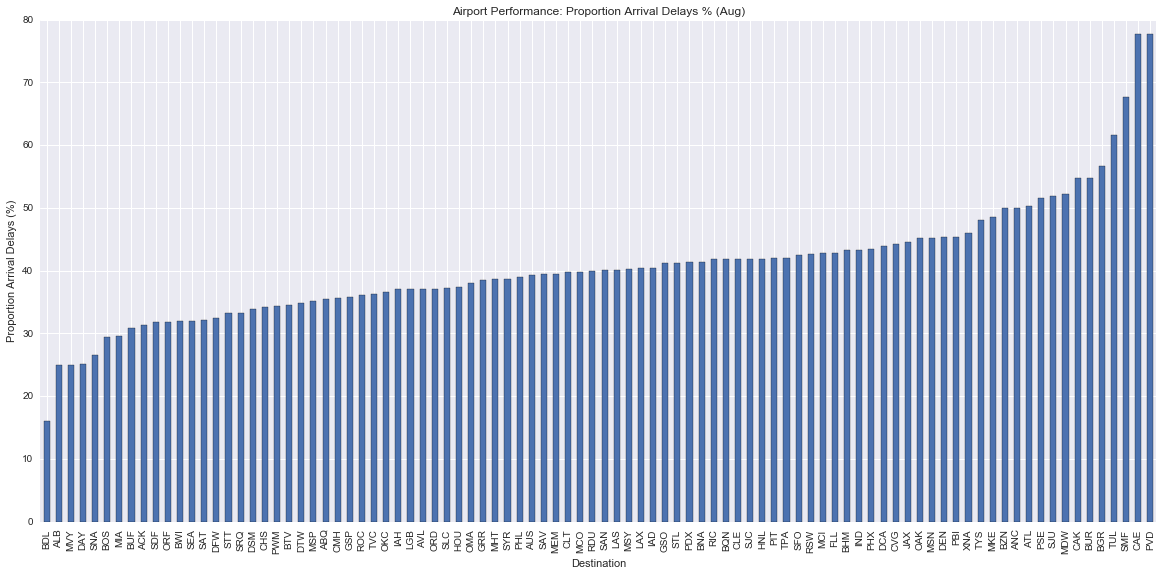

In [355]:
#Graphs for Monthly Summary

#PROPORTION Arrival Delays (%)
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==8]
mean_arr_delay=flight_arr_month['arr_delays_%']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Proportion Arrival Delays % (Aug)')
plt.xlabel('Destination')
plt.ylabel('Proportion Arrival Delays (%)')

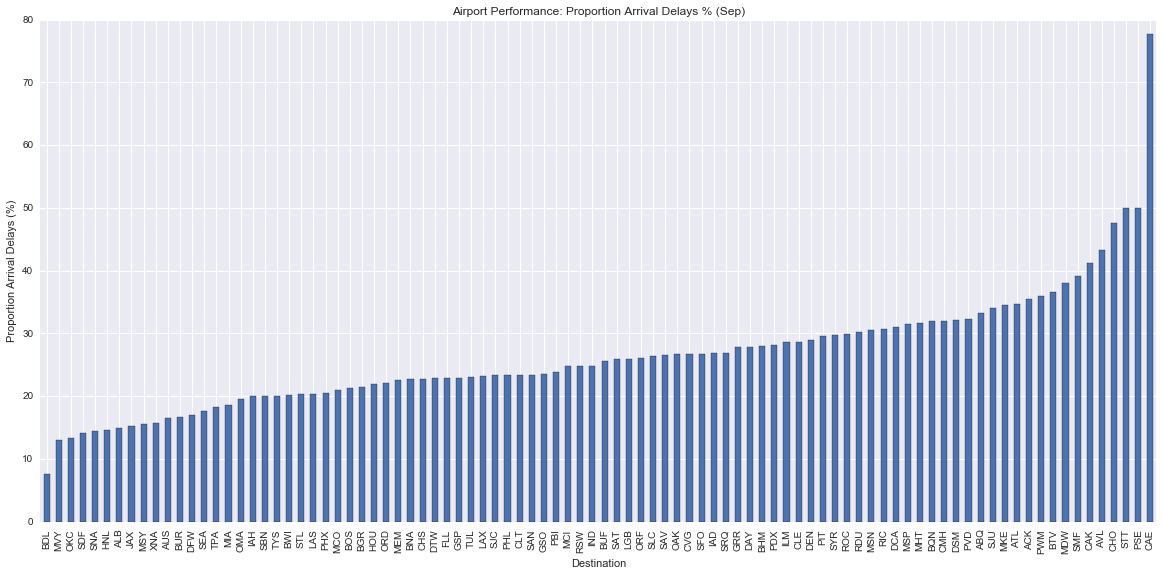

In [356]:
#Graphs for Monthly Summary

#PROPORTION Arrival Delays (%)
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==9]
mean_arr_delay=flight_arr_month['arr_delays_%']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Proportion Arrival Delays % (Sep)')
plt.xlabel('Destination')
plt.ylabel('Proportion Arrival Delays (%)')

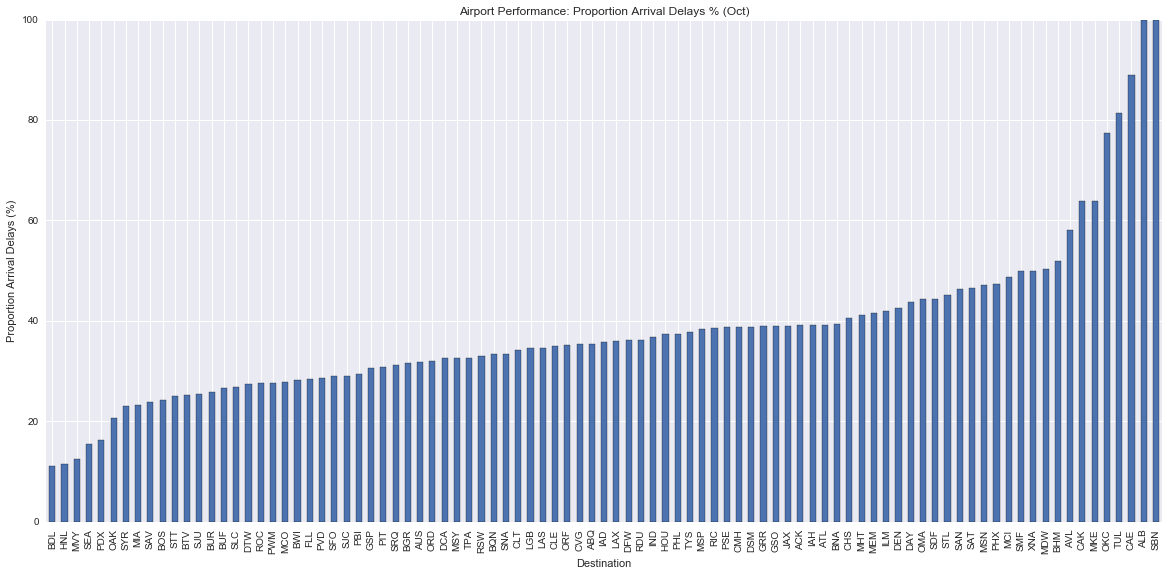

In [357]:
#Graphs for Monthly Summary

#PROPORTION Arrival Delays (%)
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==10]
mean_arr_delay=flight_arr_month['arr_delays_%']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Proportion Arrival Delays % (Oct)')
plt.xlabel('Destination')
plt.ylabel('Proportion Arrival Delays (%)')

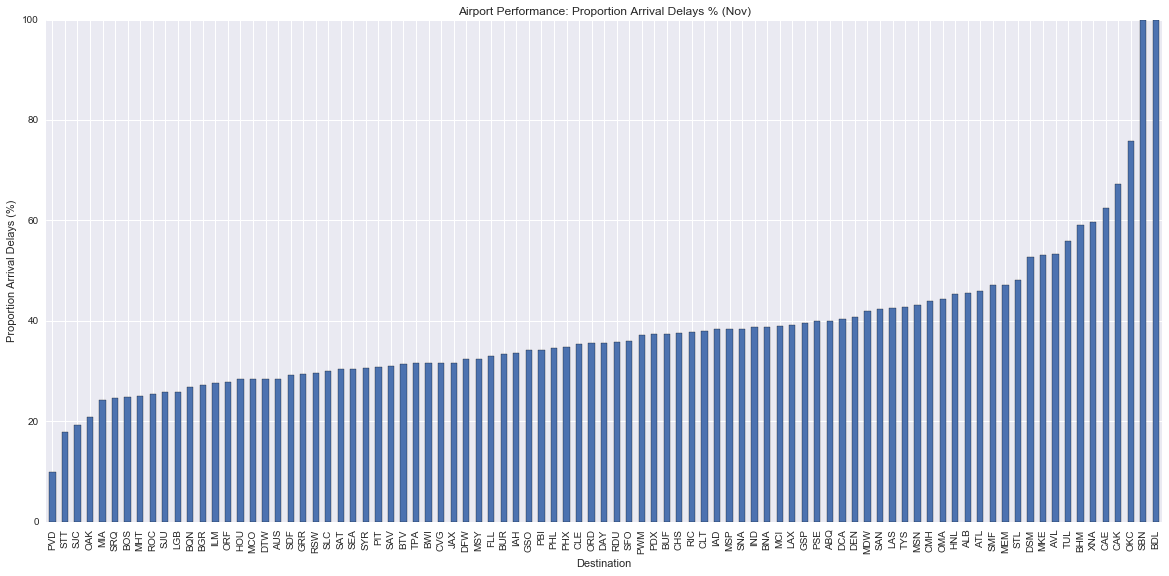

In [358]:
#Graphs for Monthly Summary

#PROPORTION Arrival Delays (%)
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==11]
mean_arr_delay=flight_arr_month['arr_delays_%']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Proportion Arrival Delays % (Nov)')
plt.xlabel('Destination')
plt.ylabel('Proportion Arrival Delays (%)')

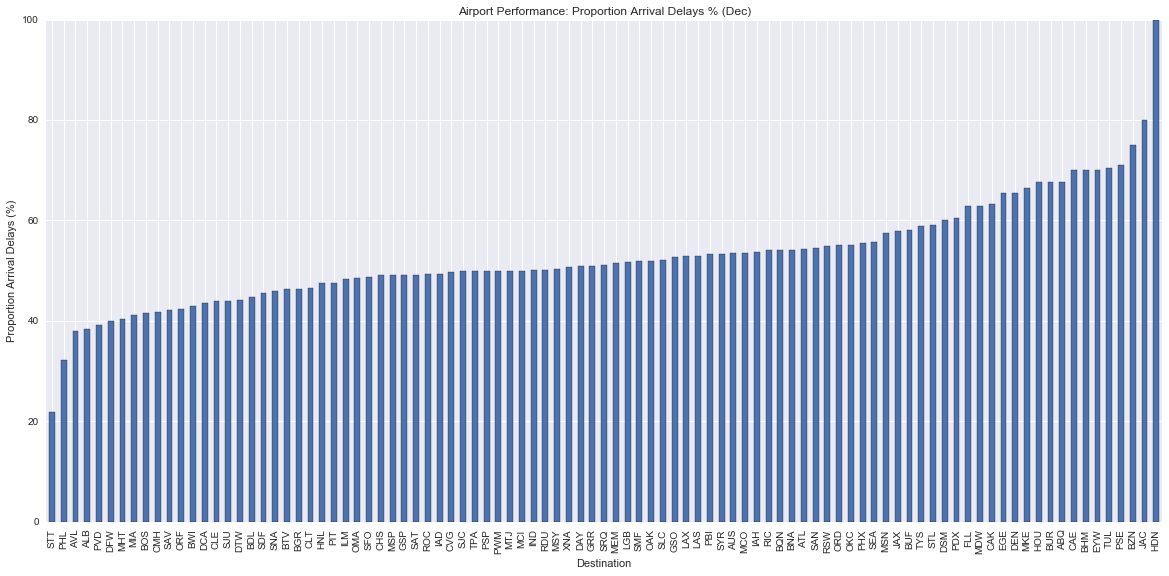

In [359]:
#Graphs for Monthly Summary

#PROPORTION Arrival Delays (%)
flight_arr_month=flight_arr_Summ_mo[flight_arr_Summ_mo['month']==12]
mean_arr_delay=flight_arr_month['arr_delays_%']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Proportion Arrival Delays % (Dec)')
plt.xlabel('Destination')
plt.ylabel('Proportion Arrival Delays (%)')

In [66]:
                              #PREPARING Final Dataset for Specific Days Period analysis for graphs
flight_arr_Summ_mo_dayperiod.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4357 entries, (1, 1.1-7, ALB) to (12, 4.24-31, XNA)
Data columns (total 10 columns):
mean_arr_delay          4349 non-null float64
std_arr_delay           4349 non-null float64
min_arr_delay           4349 non-null float64
25%_arr_delay           4349 non-null float64
median_arr_delay        4349 non-null float64
75%_arr_delay           4349 non-null float64
max_arr_delay           4349 non-null float64
total_arr_num           4357 non-null int64
total_arr_delays_num    4221 non-null float64
arr_delays_%            4221 non-null float64
dtypes: float64(9), int64(1)
memory usage: 357.4+ KB


In [67]:
flight_arr_Summ_mo_dayperiod.reset_index(['month','days_period'], inplace=True)

In [364]:
flight_arr_Summ_mo_dayperiod

month days_period  mean_arr_delay  std_arr_delay  min_arr_delay  \
dest                                                                    
ALB       1       1.1-7       23.687500      35.559314          -14.0   
ATL       1       1.1-7        2.733974      22.495364          -43.0   
AUS       1       1.1-7        7.650000      26.075419          -47.0   
AVL       1       1.1-7       23.500000      39.500000          -16.0   
BDL       1       1.1-7        9.800000      43.289260          -26.0   
BHM       1       1.1-7       -8.000000      22.458851          -34.0   
BNA       1       1.1-7       18.628205      48.262665          -33.0   
BOS       1       1.1-7       -5.275362      23.223063          -39.0   
BQN       1       1.1-7       11.666667      38.862803          -24.0   
BTV       1       1.1-7       17.140000      43.529305          -18.0   
BUF       1       1.1-7       16.102041      39.503937          -27.0   
BUR       1       1.1-7       -0.923077      42.309231          -41.0   
BWI       1       1.1-7       11.575000      97.572380          -30.0   
BZN       1       1.1-7        9.000000       0.000000            9.0   
CAE       1       1.1-7       41.500000       5.500000           36.0   
CAK       1       1.1-7       -4.000000       7.846746          -16.0   
CHS       1       1.1-7        5.238095      25.114793          -30.0   
CLE       1       1.1-7        1.274725      23.532566          -37.0   
CLT       1       1.1-7        4.106838      25.412018          -39.0   
CMH       1       1.1-7        6.796875      29.019487          -23.0   
CRW       1       1.1-7       16.500000      38.309050          -26.0   
CVG       1       1.1-7       25.000000      53.229167          -35.0   
DAY       1       1.1-7       27.882353      50.794722          -19.0   
DCA       1       1.1-7        4.636364      37.182134          -42.0   
DEN       1       1.1-7        2.229630      41.975644          -38.0   
DFW       1       1.1-7        6.221557      29.208604          -43.0   
DSM       1       1.1-7       27.833333      53.383570          -14.0   
DTW       1       1.1-7        0.562874      24.194705          -30.0   
EGE       1       1.1-7        2.428571      38.913300          -36.0   
EYW       1       1.1-7       45.000000       0.000000           45.0   
...     ...         ...             ...            ...            ...   
PHL      12     4.24-31      -12.312500      18.687291          -39.0   
PHX      12     4.24-31       -3.535088      43.579969          -63.0   
PIT      12     4.24-31        4.580645      35.951378          -30.0   
PSE      12     4.24-31        1.000000       9.861541          -12.0   
PSP      12     4.24-31      -11.000000       0.000000          -11.0   
PVD      12     4.24-31       -2.714286      20.175758          -21.0   
PWM      12     4.24-31       15.086957      40.474268          -25.0   
RDU      12     4.24-31       10.026144      40.253599          -43.0   
RIC      12     4.24-31       15.886792      53.286573          -47.0   
ROC      12     4.24-31        8.285714      28.056794          -33.0   
RSW      12     4.24-31       10.593220      27.423928          -33.0   
SAN      12     4.24-31       -8.431034      36.911876          -67.0   
SAT      12     4.24-31       17.000000      36.418508          -29.0   
SAV      12     4.24-31       23.142857      68.876553          -22.0   
SDF      12     4.24-31       -3.941176      20.523933          -40.0   
SEA      12     4.24-31       -1.853659      28.663788          -50.0   
SFO      12     4.24-31      -11.879859      36.478074          -64.0   
SJC      12     4.24-31        9.000000      51.809748          -28.0   
SJU      12     4.24-31        9.704142      43.296775          -34.0   
SLC      12     4.24-31       -1.745455      20.372190          -29.0   
SMF      12     4.24-31      -16.428571      17.178534          -47.0   
SNA      12     4.24-31      -24.400000      20.214846          

In [68]:
                       #PREPARING Final Dataset for TIME FRAME within each month for graphs
flight_arr_Summ_mo_timeframe.reset_index(['month','sched_arr_timeframe'], inplace=True)
flight_arr_Summ_mo_timeframe

month sched_arr_timeframe  mean_arr_delay  std_arr_delay  min_arr_delay  \
dest                                                                            
BOS       1          1.12AM-6AM       16.000000       0.000000           16.0   
BQN       1          1.12AM-6AM        2.419355      32.779099          -26.0   
BUF       1          1.12AM-6AM        4.967742      25.538692          -13.0   
BWI       1          1.12AM-6AM             NaN            NaN            NaN   
DEN       1          1.12AM-6AM        5.666667      24.697278          -28.0   
FLL       1          1.12AM-6AM       16.488095      43.995534          -46.0   
IAH       1          1.12AM-6AM       -9.000000       0.000000           -9.0   
LAS       1          1.12AM-6AM       -2.375000      27.381278          -52.0   
LAX       1          1.12AM-6AM       -3.913793      32.915401          -52.0   
MCO       1          1.12AM-6AM       12.200000      32.135028          -26.0   
PBI       1          1.12AM-6AM       10.750000      13.045593           -5.0   
PSE       1          1.12AM-6AM       -4.548387      16.447058          -27.0   
ROC       1          1.12AM-6AM       17.903226      35.126825          -24.0   
RSW       1          1.12AM-6AM             NaN            NaN            NaN   
SFO       1          1.12AM-6AM      -14.000000       0.000000          -14.0   
SJU       1          1.12AM-6AM       -2.256410      29.194062          -30.0   
TPA       1          1.12AM-6AM       21.333333      30.269163           -9.0   
ATL       1        2.6AM-12Noon        0.593750      37.371398          -43.0   
AUS       1        2.6AM-12Noon       -0.409091      20.484271          -34.0   
AVL       1        2.6AM-12Noon       63.000000       0.000000           63.0   
BDL       1        2.6AM-12Noon      -15.000000       0.000000          -15.0   
BNA       1        2.6AM-12Noon        1.646154      24.332271          -43.0   
BOS       1        2.6AM-12Noon       -4.724638      30.678928          -42.0   
BQN       1        2.6AM-12Noon        3.096774      22.901408          -23.0   
BTV       1        2.6AM-12Noon        5.416667      31.381678          -26.0   
BUF       1        2.6AM-12Noon        4.906780      32.710074          -24.0   
BWI       1        2.6AM-12Noon        6.950000      49.167206          -23.0   
BZN       1        2.6AM-12Noon        9.500000      11.500000           -8.0   
CHS       1        2.6AM-12Noon      -11.500000      14.500000          -26.0   
CLE       1        2.6AM-12Noon       -2.954023      16.570232          -32.0   
...     ...                 ...             ...            ...            ...   
OMA      12    4.6PM-12MidNight       41.097561      69.073593          -47.0   
ORD      12    4.6PM-12MidNight       25.158163      49.089521          -50.0   
ORF      12    4.6PM-12MidNight       14.931034      54.005064          -46.0   
PBI      12    4.6PM-12MidNight       25.818182      48.509343          -40.0   
PDX      12    4.6PM-12MidNight       17.340206      31.315122          -28.0   
PHL      12    4.6PM-12MidNight       -7.117647      21.854821          -39.0   
PHX      12    4.6PM-12MidNight       15.883871      49.724007          -63.0   
PIT      12    4.6PM-12MidNight       26.711538      47.482117          -34.0   
PVD      12    4.6PM-12MidNight       18.625000      33.181085          -21.0   
PWM      12    4.6PM-12MidNight       31.188679      54.355245          -25.0   
RDU      12    4.6PM-12MidNight       26.732143      51.403860          -43.0   
RIC      12    4.6PM-12MidNight       35.049587      62.982465          -49.0   
ROC      12    4.6PM-12MidNight       22.450000      48.596785          -29.0   
RSW      12    4.6PM-12MidNight       12.747967      44.262262          -33.0   
SAN      12    4.6PM-12MidNight       20.428571      48.699485          -67.0   
SAT      12    4.6PM-12MidNight       25.187500     108.955774          -37.0   
SAV      12    4.6PM-12MidNight      

In [367]:
                                  #Outputting final Datasets in CSV
#Overall Yearly Data
flight_arr_Summ_Yr.to_csv(your_local_path+'flight_arr_Summ_Yr.csv')
#Monthly Data
flight_arr_Summ_mo.to_csv(your_local_path+'flight_arr_Summ_mo.csv')
#Specific Days Period Data for each month
flight_arr_Summ_mo_dayperiod.to_csv(your_local_path+'flight_arr_Summ_mo_dayperiod.csv')
#Timeframe Data for each month
flight_arr_Summ_mo_timeframe.to_csv(your_local_path+'flight_arr_Summ_mo_timeframe.csv')

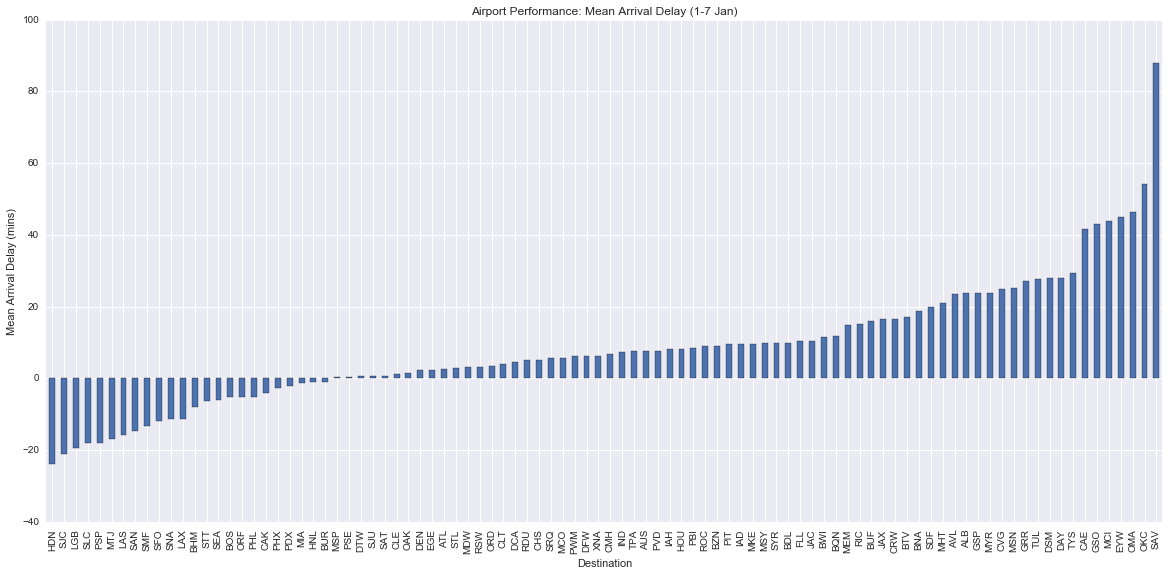

In [69]:
                      #Graphs for Monthly - Specific Days Period Summary

#select 'month' values from 1,2,3,4,5,6,7,8,9,10,11,12 for respective month's data
#select 'days_period' values from '1.1-7','2.8-15','3.16-23','4.24-31' for respective period data

#MEAN Arrival Delays (%)

#GIVING ERROR: flight_arr_month_pd=flight_arr_Summ_mo_dayperiod.loc[(flight_arr_Summ_mo_dayperiod['month'] == 1) & flight_arr_Summ_mo_dayperiod['days_period'].isin('4.24-31')]
flight_arr_month_dayp=flight_arr_Summ_mo_dayperiod[flight_arr_Summ_mo_dayperiod['month'] == 1] #change month values here for other months
flight_arr_month_dayp=flight_arr_month_dayp[flight_arr_month_dayp['days_period'] == '1.1-7']#change days_period values here for other periods

mean_arr_delay=flight_arr_month_dayp['mean_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Mean Arrival Delay (1-7 Jan)')#change the period text for other periods & months accordingly
plt.xlabel('Destination')
plt.ylabel('Mean Arrival Delay (mins)')

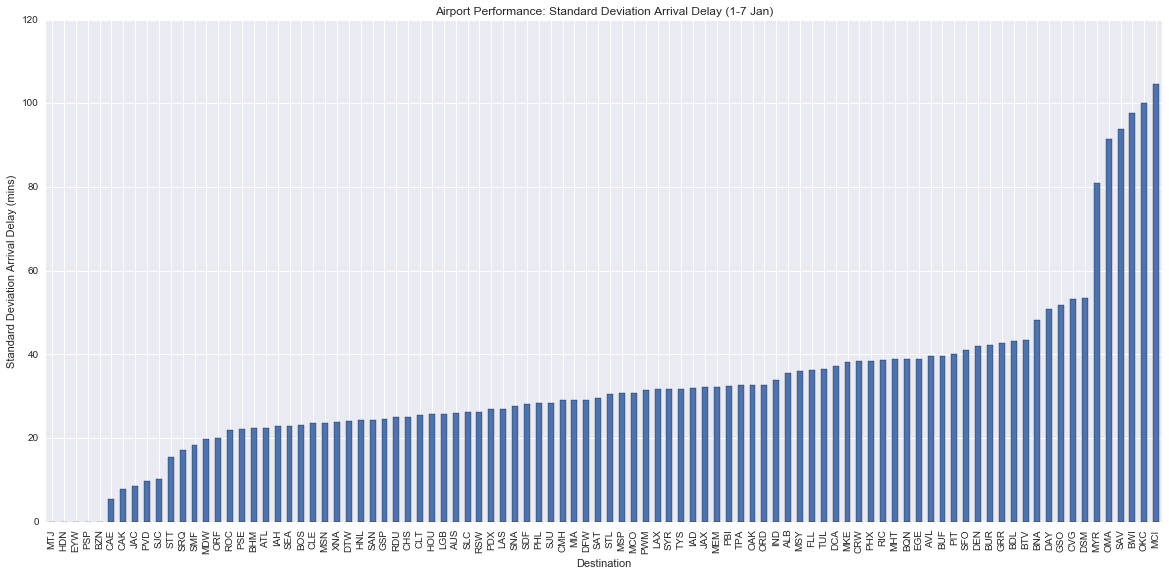

In [70]:
#Graphs for Monthly - Specific Days Period Summary

#select 'month' values from 1,2,3,4,5,6,7,8,9,10,11,12 for respective month's data
#select 'days_period' values from '1.1-7','2.8-15','3.16-23','4.24-31' for respective period data

#STANDARD DEVIATION Arrival Delays (%)

#GIVING ERROR: flight_arr_month_pd=flight_arr_Summ_mo_dayperiod.loc[(flight_arr_Summ_mo_dayperiod['month'] == 1) & flight_arr_Summ_mo_dayperiod['days_period'].isin('4.24-31')]
flight_arr_month_dayp=flight_arr_Summ_mo_dayperiod[flight_arr_Summ_mo_dayperiod['month'] == 1] #change month values here for other months
flight_arr_month_dayp=flight_arr_month_dayp[flight_arr_month_dayp['days_period'] == '1.1-7']#change days_period values here for other periods

mean_arr_delay=flight_arr_month_dayp['std_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Standard Deviation Arrival Delay (1-7 Jan)')#change the period text for other periods & months accordingly
plt.xlabel('Destination')
plt.ylabel('Standard Deviation Arrival Delay (mins)')

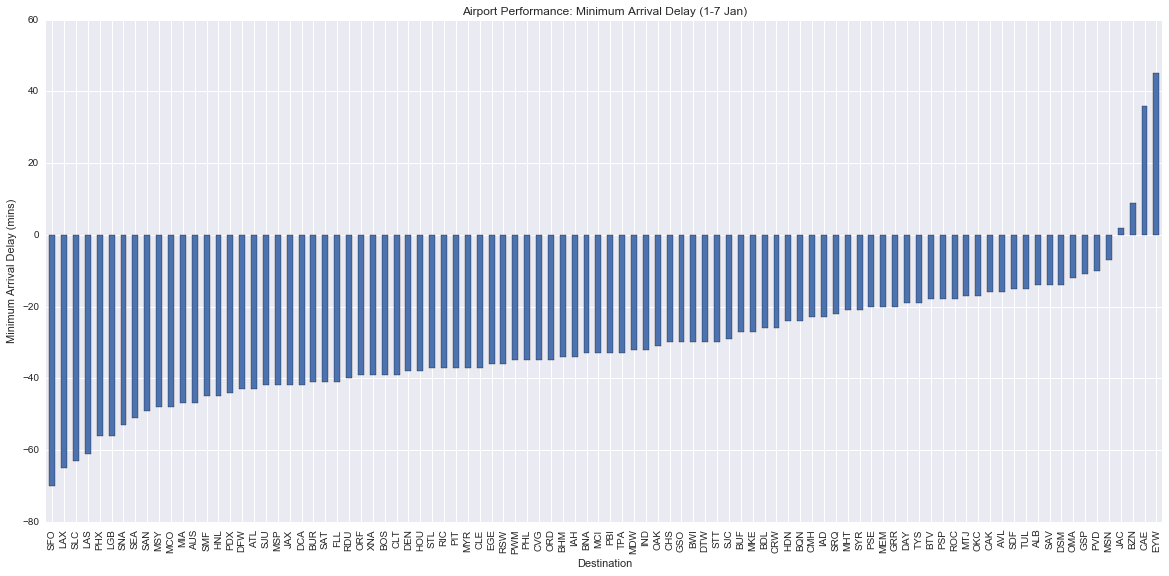

In [71]:
#Graphs for Monthly - Specific Days Period Summary

#select 'month' values from 1,2,3,4,5,6,7,8,9,10,11,12 for respective month's data
#select 'days_period' values from '1.1-7','2.8-15','3.16-23','4.24-31' for respective period data

#MINIMUM Arrival Delays (%)

#GIVING ERROR: flight_arr_month_pd=flight_arr_Summ_mo_dayperiod.loc[(flight_arr_Summ_mo_dayperiod['month'] == 1) & flight_arr_Summ_mo_dayperiod['days_period'].isin('4.24-31')]
flight_arr_month_dayp=flight_arr_Summ_mo_dayperiod[flight_arr_Summ_mo_dayperiod['month'] == 1] #change month values here for other months
flight_arr_month_dayp=flight_arr_month_dayp[flight_arr_month_dayp['days_period'] == '1.1-7']#change days_period values here for other periods

mean_arr_delay=flight_arr_month_dayp['min_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Minimum Arrival Delay (1-7 Jan)')
plt.xlabel('Destination')
plt.ylabel('Minimum Arrival Delay (mins)')

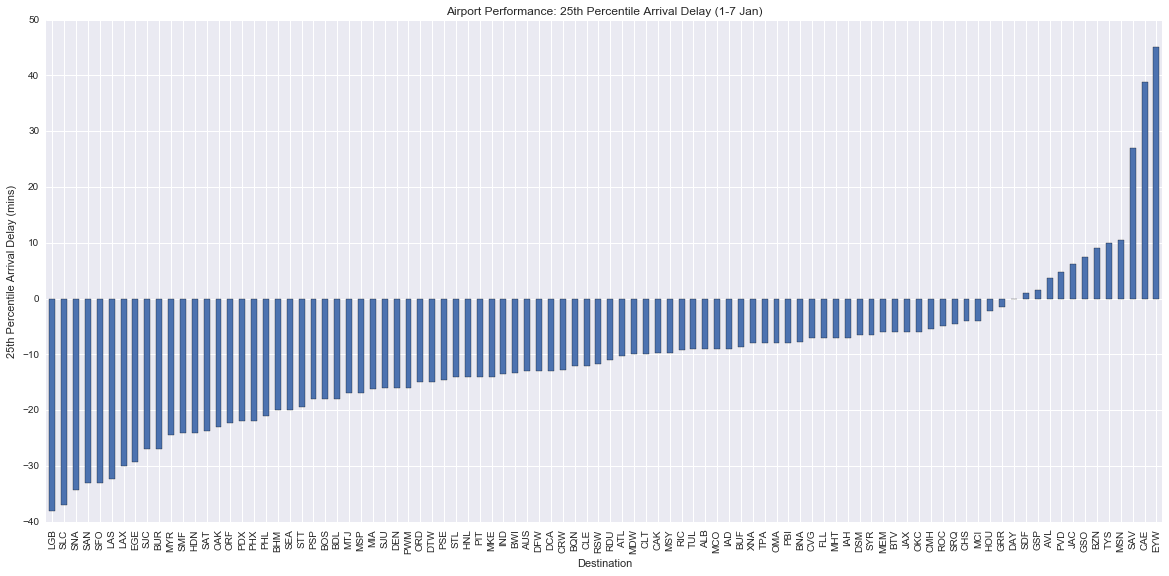

In [72]:
#Graphs for Monthly - Specific Days Period Summary

#select 'month' values from 1,2,3,4,5,6,7,8,9,10,11,12 for respective month's data
#select 'days_period' values from '1.1-7','2.8-15','3.16-23','4.24-31' for respective period data

#25TH PERCENTILE Arrival Delays (%)

#GIVING ERROR: flight_arr_month_pd=flight_arr_Summ_mo_dayperiod.loc[(flight_arr_Summ_mo_dayperiod['month'] == 1) & flight_arr_Summ_mo_dayperiod['days_period'].isin('4.24-31')]
flight_arr_month_dayp=flight_arr_Summ_mo_dayperiod[flight_arr_Summ_mo_dayperiod['month'] == 1] #change month values here for other months
flight_arr_month_dayp=flight_arr_month_dayp[flight_arr_month_dayp['days_period'] == '1.1-7']#change days_period values here for other periods

mean_arr_delay=flight_arr_month_dayp['25%_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: 25th Percentile Arrival Delay (1-7 Jan)')#change the period text for other periods & months accordingly
plt.xlabel('Destination')
plt.ylabel('25th Percentile Arrival Delay (mins)')

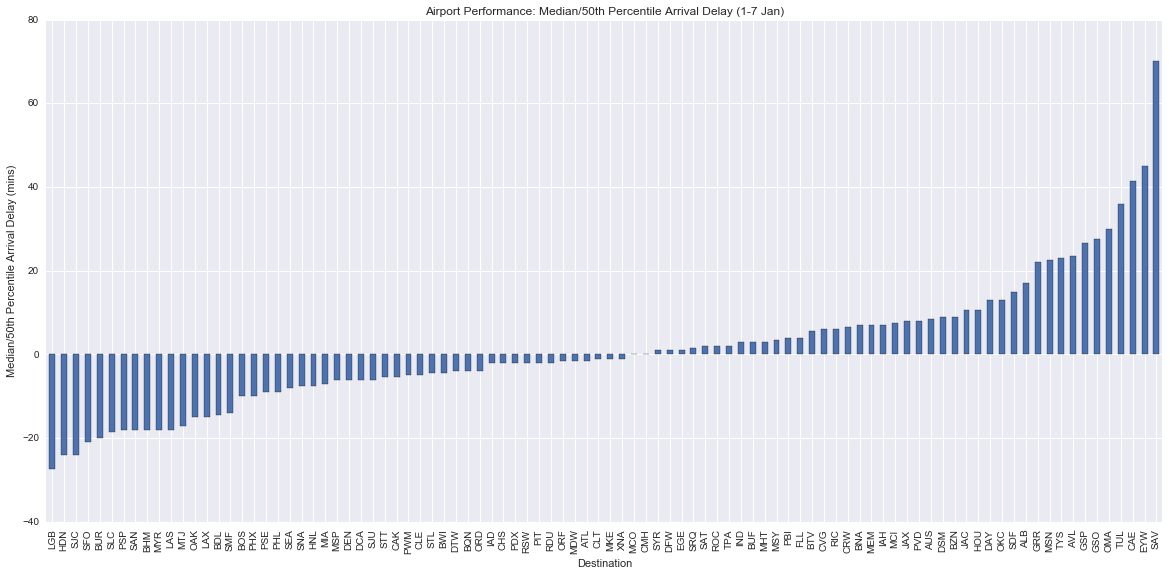

In [73]:
#Graphs for Monthly - Specific Days Period Summary

#select 'month' values from 1,2,3,4,5,6,7,8,9,10,11,12 for respective month's data
#select 'days_period' values from '1.1-7','2.8-15','3.16-23','4.24-31' for respective period data

#MEDIAN / 50TH PERCENTILE Arrival Delays (%)

#GIVING ERROR: flight_arr_month_pd=flight_arr_Summ_mo_dayperiod.loc[(flight_arr_Summ_mo_dayperiod['month'] == 1) & flight_arr_Summ_mo_dayperiod['days_period'].isin('4.24-31')]
flight_arr_month_dayp=flight_arr_Summ_mo_dayperiod[flight_arr_Summ_mo_dayperiod['month'] == 1] #change month values here for other months
flight_arr_month_dayp=flight_arr_month_dayp[flight_arr_month_dayp['days_period'] == '1.1-7']#change days_period values here for other periods

mean_arr_delay=flight_arr_month_dayp['median_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Median/50th Percentile Arrival Delay (1-7 Jan)')#change the period text for other periods & months accordingly
plt.xlabel('Destination')
plt.ylabel('Median/50th Percentile Arrival Delay (mins)')

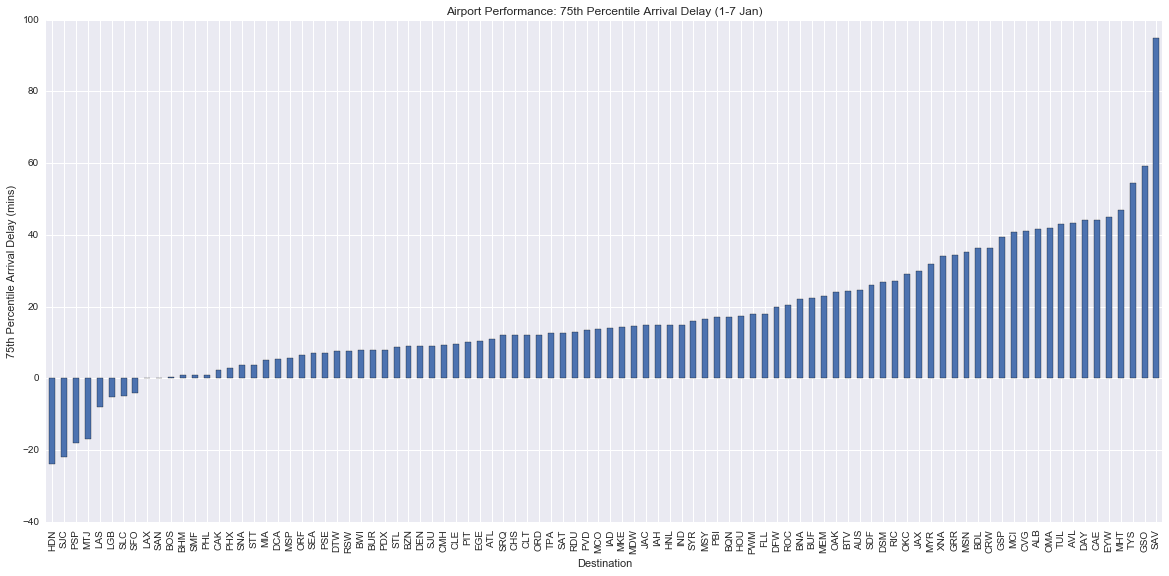

In [74]:
#Graphs for Monthly - Specific Days Period Summary

#select 'month' values from 1,2,3,4,5,6,7,8,9,10,11,12 for respective month's data
#select 'days_period' values from '1.1-7','2.8-15','3.16-23','4.24-31' for respective period data

#75TH PERCENTILE Arrival Delays (%)

#GIVING ERROR: flight_arr_month_pd=flight_arr_Summ_mo_dayperiod.loc[(flight_arr_Summ_mo_dayperiod['month'] == 1) & flight_arr_Summ_mo_dayperiod['days_period'].isin('4.24-31')]
flight_arr_month_dayp=flight_arr_Summ_mo_dayperiod[flight_arr_Summ_mo_dayperiod['month'] == 1] #change month values here for other months
flight_arr_month_dayp=flight_arr_month_dayp[flight_arr_month_dayp['days_period'] == '1.1-7']#change days_period values here for other periods

mean_arr_delay=flight_arr_month_dayp['75%_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: 75th Percentile Arrival Delay (1-7 Jan)')#change the period text for other periods & months accordingly
plt.xlabel('Destination')
plt.ylabel('75th Percentile Arrival Delay (mins)')

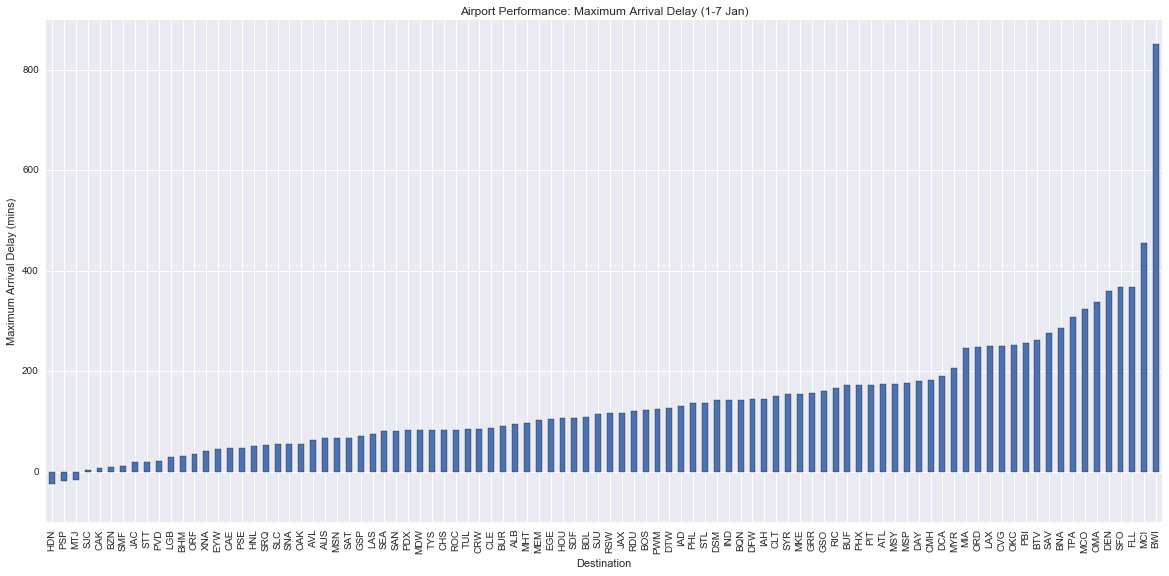

In [75]:
#Graphs for Monthly - Specific Days Period Summary
#select 'month' values from 1,2,3,4,5,6,7,8,9,10,11,12 for respective month's data
#select 'days_period' values from '1.1-7','2.8-15','3.16-23','4.24-31' for respective period data

#MAXIMUM Arrival Delays (%)

#GIVING ERROR: flight_arr_month_pd=flight_arr_Summ_mo_dayperiod.loc[(flight_arr_Summ_mo_dayperiod['month'] == 1) & flight_arr_Summ_mo_dayperiod['days_period'].isin('4.24-31')]
flight_arr_month_dayp=flight_arr_Summ_mo_dayperiod[flight_arr_Summ_mo_dayperiod['month'] == 1] #change month values here for other months
flight_arr_month_dayp=flight_arr_month_dayp[flight_arr_month_dayp['days_period'] == '1.1-7']#change days_period values here for other periods

mean_arr_delay=flight_arr_month_dayp['max_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Maximum Arrival Delay (1-7 Jan)')#change the period text for other periods & months accordingly
plt.xlabel('Destination')
plt.ylabel('Maximum Arrival Delay (mins)')

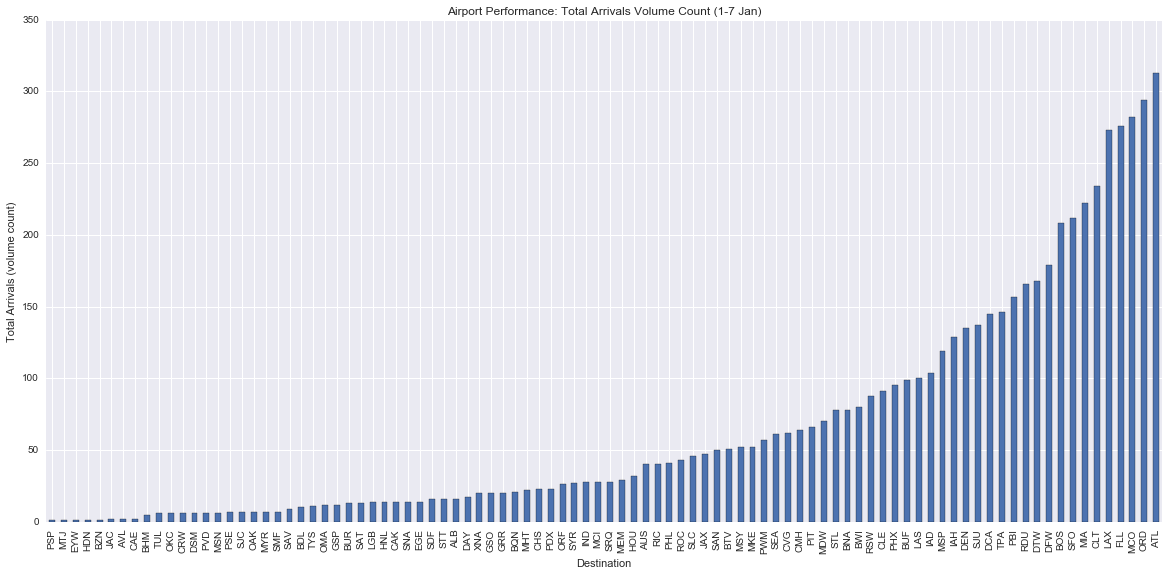

In [76]:
#Graphs for Monthly - Specific Days Period Summary
#select 'month' values from 1,2,3,4,5,6,7,8,9,10,11,12 for respective month's data
#select 'days_period' values from '1.1-7','2.8-15','3.16-23','4.24-31' for respective period data

#TOTAL ARRIVALS (volume count)

#GIVING ERROR: flight_arr_month_pd=flight_arr_Summ_mo_dayperiod.loc[(flight_arr_Summ_mo_dayperiod['month'] == 1) & flight_arr_Summ_mo_dayperiod['days_period'].isin('4.24-31')]
flight_arr_month_dayp=flight_arr_Summ_mo_dayperiod[flight_arr_Summ_mo_dayperiod['month'] == 1] #change month values here for other months
flight_arr_month_dayp=flight_arr_month_dayp[flight_arr_month_dayp['days_period'] == '1.1-7']#change days_period values here for other periods

mean_arr_delay=flight_arr_month_dayp['total_arr_num']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Total Arrivals Volume Count (1-7 Jan)')#change the period text for other periods & months accordingly
plt.xlabel('Destination')
plt.ylabel('Total Arrivals (volume count)')

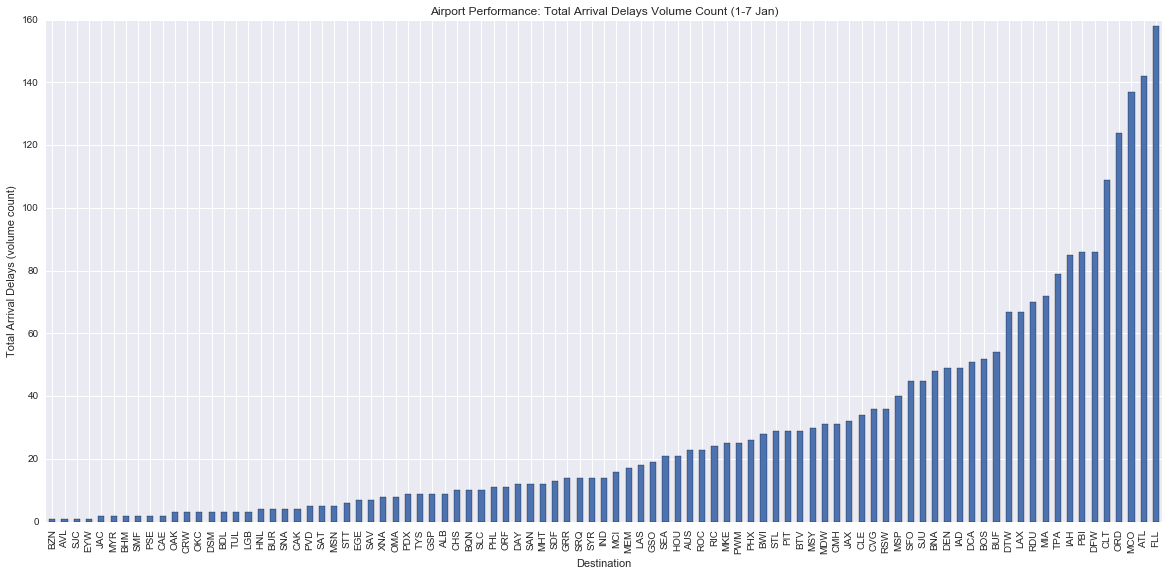

In [77]:
#Graphs for Monthly - Specific Days Period Summary
#select 'month' values from 1,2,3,4,5,6,7,8,9,10,11,12 for respective month's data
#select 'days_period' values from '1.1-7','2.8-15','3.16-23','4.24-31' for respective period data

#TOTAL ARRIVAL DELAYS (volume count)

#GIVING ERROR: flight_arr_month_pd=flight_arr_Summ_mo_dayperiod.loc[(flight_arr_Summ_mo_dayperiod['month'] == 1) & flight_arr_Summ_mo_dayperiod['days_period'].isin('4.24-31')]
flight_arr_month_dayp=flight_arr_Summ_mo_dayperiod[flight_arr_Summ_mo_dayperiod['month'] == 1] #change month values here for other months
flight_arr_month_dayp=flight_arr_month_dayp[flight_arr_month_dayp['days_period'] == '1.1-7']#change days_period values here for other periods

mean_arr_delay=flight_arr_month_dayp['total_arr_delays_num']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Total Arrival Delays Volume Count (1-7 Jan)')#change the period text for other periods & months accordingly
plt.xlabel('Destination')
plt.ylabel('Total Arrival Delays (volume count)')

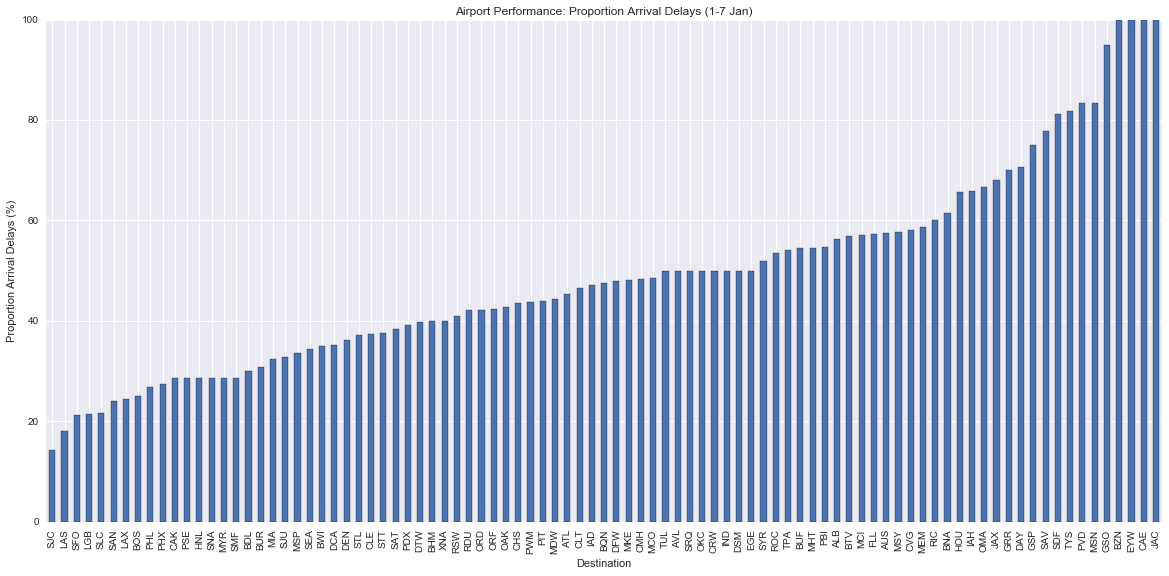

In [79]:
#Graphs for Monthly - Specific Days Period Summary
#select 'month' values from 1,2,3,4,5,6,7,8,9,10,11,12 for respective month's data
#select 'days_period' values from '1.1-7','2.8-15','3.16-23','4.24-31' for respective period data

#PROPORTION OF ARRIVAL DELAYS (%)

#GIVING ERROR: flight_arr_month_pd=flight_arr_Summ_mo_dayperiod.loc[(flight_arr_Summ_mo_dayperiod['month'] == 1) & flight_arr_Summ_mo_dayperiod['days_period'].isin('4.24-31')]
flight_arr_month_dayp=flight_arr_Summ_mo_dayperiod[flight_arr_Summ_mo_dayperiod['month'] == 1] #change month values here for other months
flight_arr_month_dayp=flight_arr_month_dayp[flight_arr_month_dayp['days_period'] == '1.1-7']#change days_period values here for other periods

mean_arr_delay=flight_arr_month_dayp['arr_delays_%']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Proportion Arrival Delays (1-7 Jan)')#change the period text for other periods & months accordingly
plt.xlabel('Destination')
plt.ylabel('Proportion Arrival Delays (%)')

In [ ]:
                                #GRAPHS FOR MONTHLY - TIMEFRAME SUMMARY

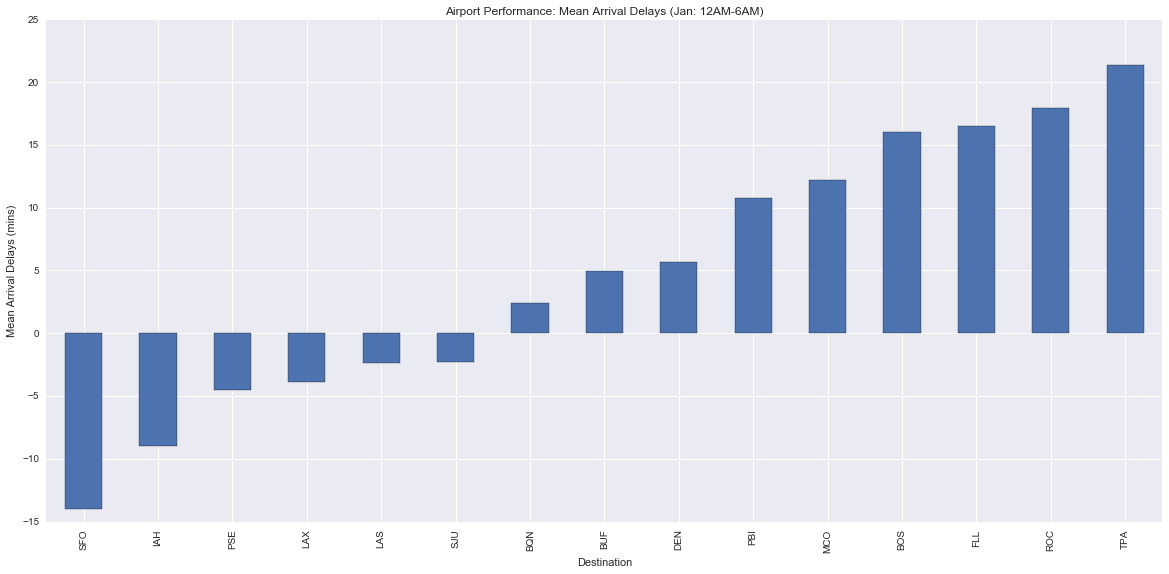

In [80]:
                                #Graphs for Monthly - Timeframe Summary

#select 'month' values from 1,2,3,4,5,6,7,8,9,10,11,12 for respective month's data
#select 'timeframe' values from '1.12AM-6AM','2.6AM-12Noon','3.12Noon-6PM','4.6PM-12MidNight' for respective period data

#MEAN ARRIVAL DELAYS (Mins)

flight_arr_month_timef=flight_arr_Summ_mo_timeframe[flight_arr_Summ_mo_timeframe['month'] == 1] #change month values here for other months
flight_arr_month_timef=flight_arr_month_timef[flight_arr_month_timef['sched_arr_timeframe'] == '1.12AM-6AM']#change timeframe values here for other periods

mean_arr_delay=flight_arr_month_timef['mean_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Mean Arrival Delays (Jan: 12AM-6AM)')#change the timeframe text for other periods & months accordingly
plt.xlabel('Destination')
plt.ylabel('Mean Arrival Delays (mins)')

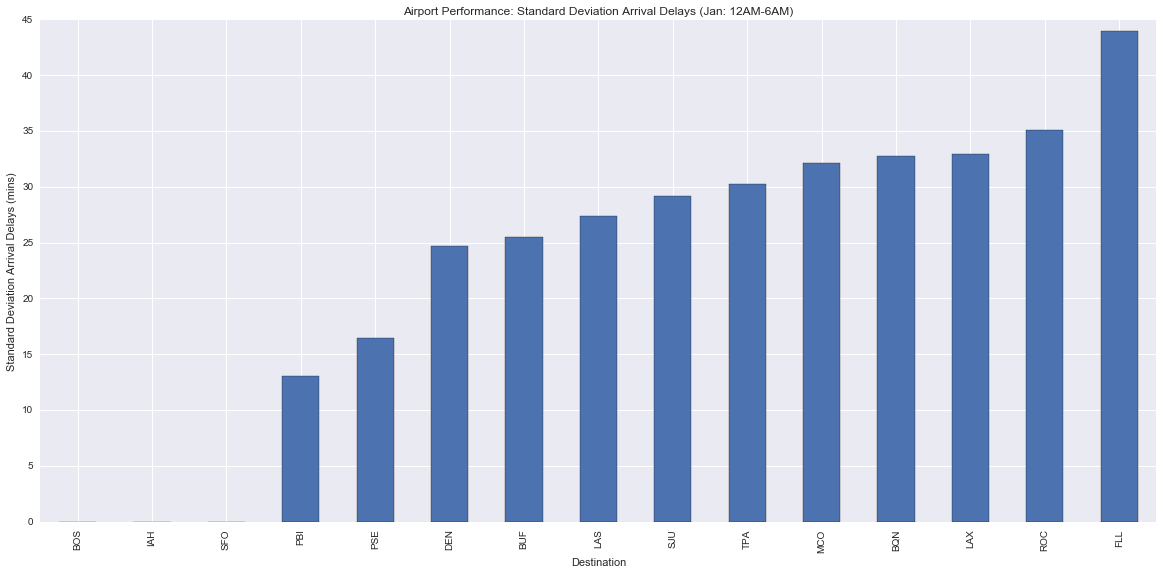

In [81]:
#Graphs for Monthly - Timeframe Summary

#select 'month' values from 1,2,3,4,5,6,7,8,9,10,11,12 for respective month's data
#select 'timeframe' values from '1.12AM-6AM','2.6AM-12Noon','3.12Noon-6PM','4.6PM-12MidNight' for respective period data

#STANDARD DEVIATION ARRIVAL DELAYS (Mins)

flight_arr_month_timef=flight_arr_Summ_mo_timeframe[flight_arr_Summ_mo_timeframe['month'] == 1] #change month values here for other months
flight_arr_month_timef=flight_arr_month_timef[flight_arr_month_timef['sched_arr_timeframe'] == '1.12AM-6AM']#change timeframe values here for other periods

mean_arr_delay=flight_arr_month_timef['std_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Standard Deviation Arrival Delays (Jan: 12AM-6AM)')#change the timeframe text for other periods & months accordingly
plt.xlabel('Destination')
plt.ylabel('Standard Deviation Arrival Delays (mins)')

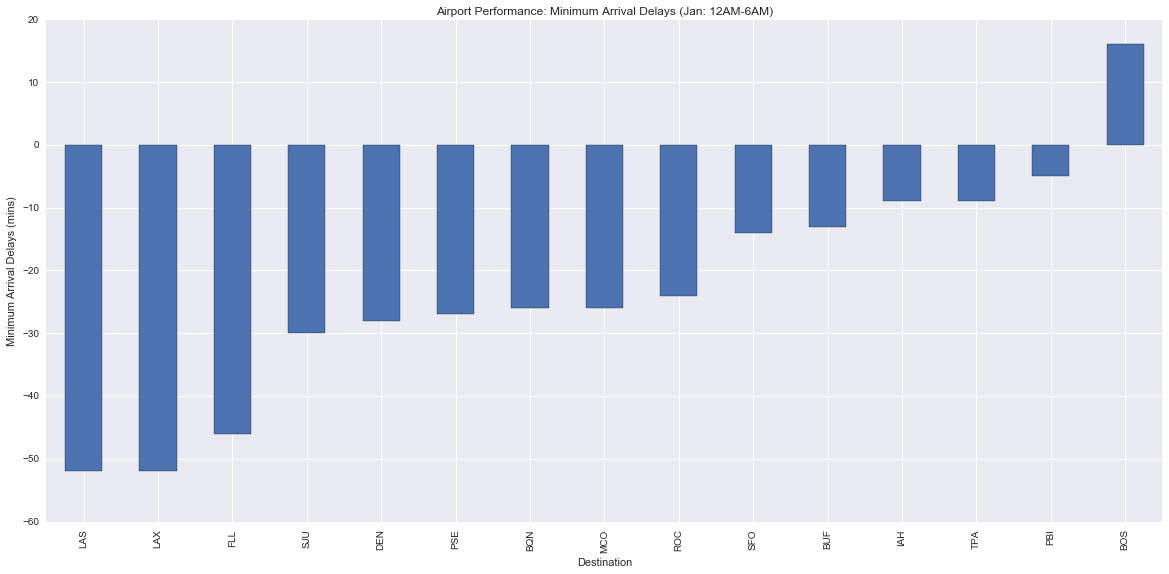

In [82]:
#Graphs for Monthly - Timeframe Summary

#select 'month' values from 1,2,3,4,5,6,7,8,9,10,11,12 for respective month's data
#select 'timeframe' values from '1.12AM-6AM','2.6AM-12Noon','3.12Noon-6PM','4.6PM-12MidNight' for respective period data

#MINIMUM ARRIVAL DELAYS (Mins)

flight_arr_month_timef=flight_arr_Summ_mo_timeframe[flight_arr_Summ_mo_timeframe['month'] == 1] #change month values here for other months
flight_arr_month_timef=flight_arr_month_timef[flight_arr_month_timef['sched_arr_timeframe'] == '1.12AM-6AM']#change timeframe values here for other periods

mean_arr_delay=flight_arr_month_timef['min_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Minimum Arrival Delays (Jan: 12AM-6AM)')#change the timeframe text for other periods & months accordingly
plt.xlabel('Destination')
plt.ylabel('Minimum Arrival Delays (mins)')

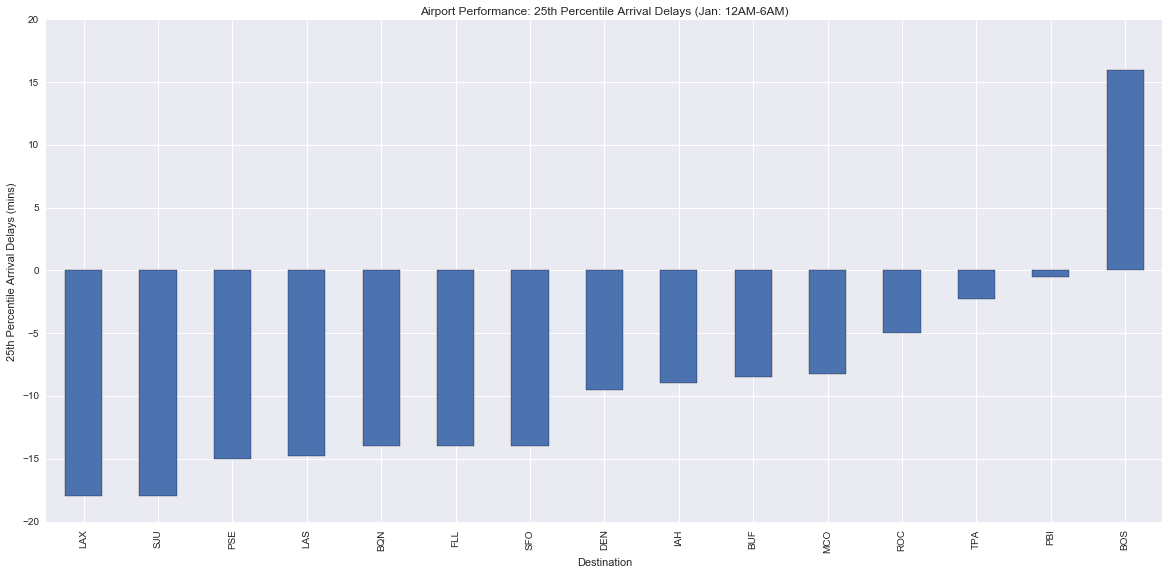

In [83]:
#Graphs for Monthly - Timeframe Summary

#select 'month' values from 1,2,3,4,5,6,7,8,9,10,11,12 for respective month's data
#select 'timeframe' values from '1.12AM-6AM','2.6AM-12Noon','3.12Noon-6PM','4.6PM-12MidNight' for respective period data

#25th PERCENTILE ARRIVAL DELAYS (Mins)

flight_arr_month_timef=flight_arr_Summ_mo_timeframe[flight_arr_Summ_mo_timeframe['month'] == 1] #change month values here for other months
flight_arr_month_timef=flight_arr_month_timef[flight_arr_month_timef['sched_arr_timeframe'] == '1.12AM-6AM']#change timeframe values here for other periods

mean_arr_delay=flight_arr_month_timef['25%_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: 25th Percentile Arrival Delays (Jan: 12AM-6AM)')#change the timeframe text for other periods & months accordingly
plt.xlabel('Destination')
plt.ylabel('25th Percentile Arrival Delays (mins)')

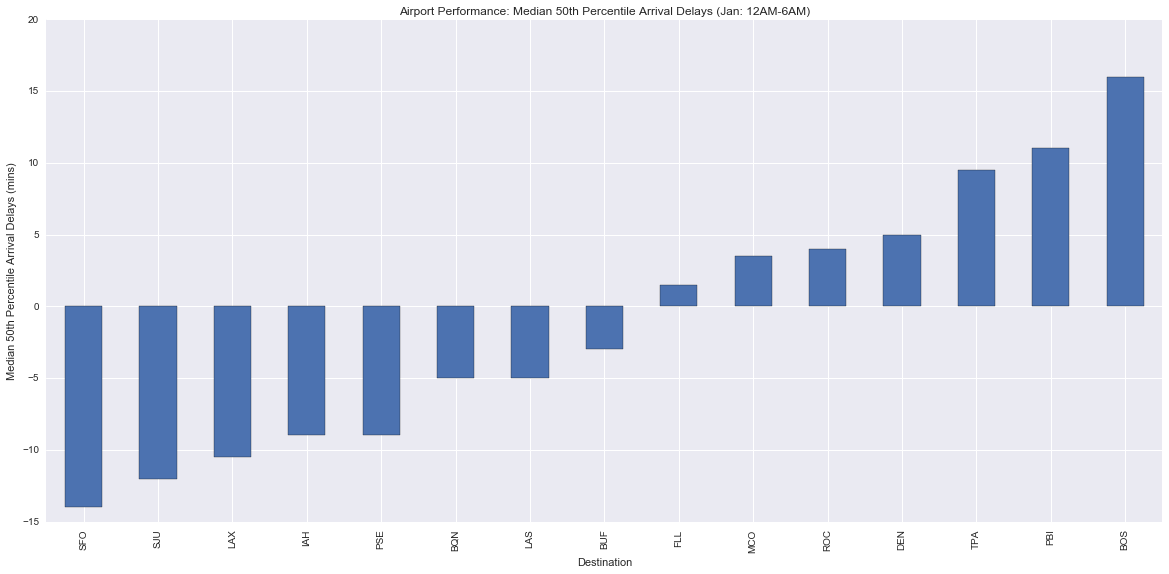

In [84]:
#Graphs for Monthly - Timeframe Summary

#select 'month' values from 1,2,3,4,5,6,7,8,9,10,11,12 for respective month's data
#select 'timeframe' values from '1.12AM-6AM','2.6AM-12Noon','3.12Noon-6PM','4.6PM-12MidNight' for respective period data

#MEDIAN/50th PERCENTILE ARRIVAL DELAYS (Mins)

flight_arr_month_timef=flight_arr_Summ_mo_timeframe[flight_arr_Summ_mo_timeframe['month'] == 1] #change month values here for other months
flight_arr_month_timef=flight_arr_month_timef[flight_arr_month_timef['sched_arr_timeframe'] == '1.12AM-6AM']#change timeframe values here for other periods

mean_arr_delay=flight_arr_month_timef['median_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Median 50th Percentile Arrival Delays (Jan: 12AM-6AM)')#change the timeframe text for other periods & months accordingly
plt.xlabel('Destination')
plt.ylabel('Median 50th Percentile Arrival Delays (mins)')

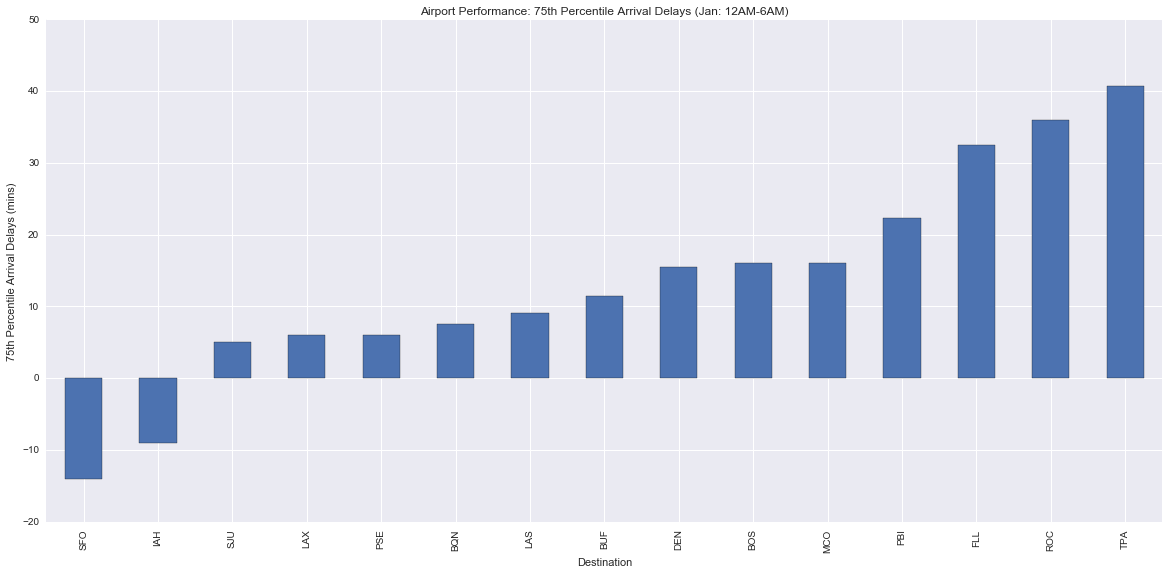

In [90]:
#Graphs for Monthly - Timeframe Summary

#select 'month' values from 1,2,3,4,5,6,7,8,9,10,11,12 for respective month's data
#select 'timeframe' values from '1.12AM-6AM','2.6AM-12Noon','3.12Noon-6PM','4.6PM-12MidNight' for respective period data

#75th PERCENTILE ARRIVAL DELAYS (Mins)

flight_arr_month_timef=flight_arr_Summ_mo_timeframe[flight_arr_Summ_mo_timeframe['month'] == 1] #change month values here for other months
flight_arr_month_timef=flight_arr_month_timef[flight_arr_month_timef['sched_arr_timeframe'] == '1.12AM-6AM']#change timeframe values here for other periods

mean_arr_delay=flight_arr_month_timef['75%_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: 75th Percentile Arrival Delays (Jan: 12AM-6AM)')#change the timeframe text for other periods & months accordingly
plt.xlabel('Destination')
plt.ylabel('75th Percentile Arrival Delays (mins)')

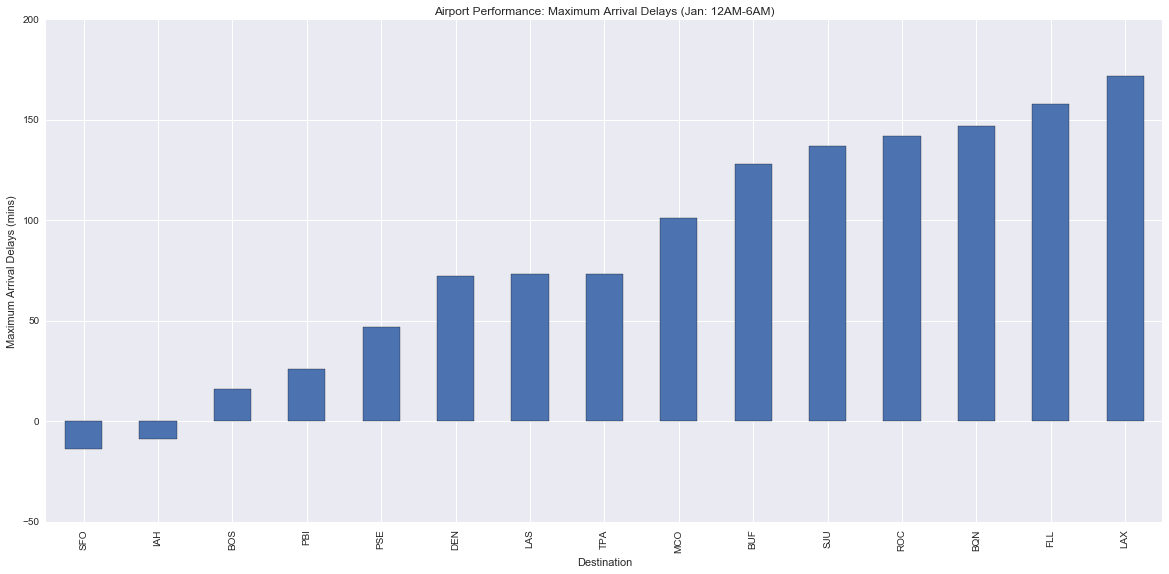

In [91]:
#Graphs for Monthly - Timeframe Summary

#select 'month' values from 1,2,3,4,5,6,7,8,9,10,11,12 for respective month's data
#select 'timeframe' values from '1.12AM-6AM','2.6AM-12Noon','3.12Noon-6PM','4.6PM-12MidNight' for respective period data

#MAXIMUM ARRIVAL DELAYS (Mins)

flight_arr_month_timef=flight_arr_Summ_mo_timeframe[flight_arr_Summ_mo_timeframe['month'] == 1] #change month values here for other months
flight_arr_month_timef=flight_arr_month_timef[flight_arr_month_timef['sched_arr_timeframe'] == '1.12AM-6AM']#change timeframe values here for other periods

mean_arr_delay=flight_arr_month_timef['max_arr_delay']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Maximum Arrival Delays (Jan: 12AM-6AM)')#change the timeframe text for other periods & months accordingly
plt.xlabel('Destination')
plt.ylabel('Maximum Arrival Delays (mins)')

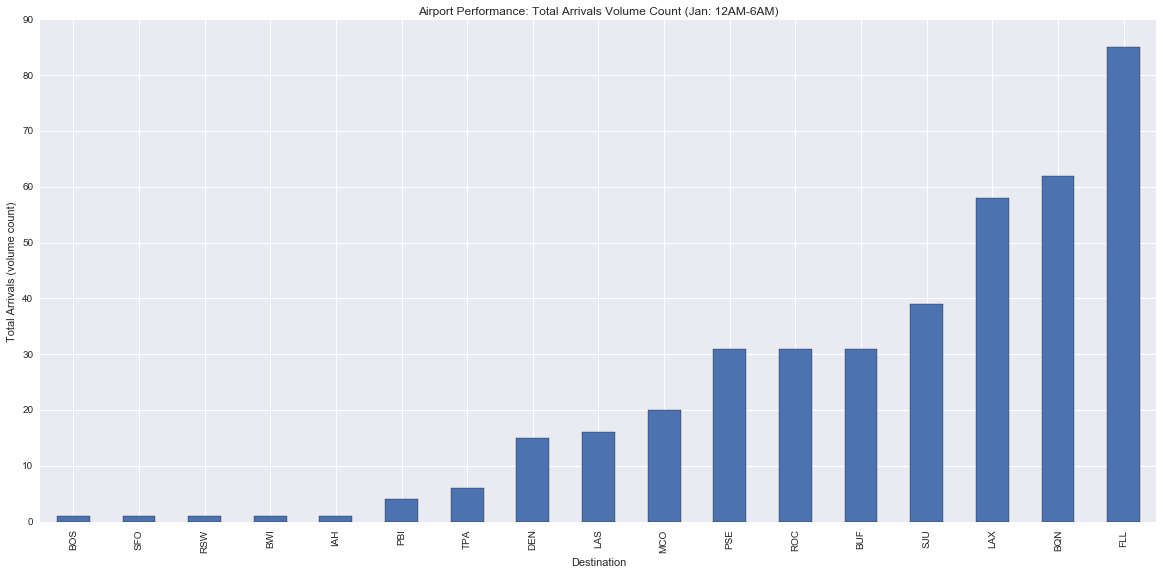

In [87]:
#Graphs for Monthly - Timeframe Summary

#select 'month' values from 1,2,3,4,5,6,7,8,9,10,11,12 for respective month's data
#select 'timeframe' values from '1.12AM-6AM','2.6AM-12Noon','3.12Noon-6PM','4.6PM-12MidNight' for respective period data

#TOTAL ARRIVALS (Volume count)

flight_arr_month_timef=flight_arr_Summ_mo_timeframe[flight_arr_Summ_mo_timeframe['month'] == 1] #change month values here for other months
flight_arr_month_timef=flight_arr_month_timef[flight_arr_month_timef['sched_arr_timeframe'] == '1.12AM-6AM']#change timeframe values here for other periods

mean_arr_delay=flight_arr_month_timef['total_arr_num']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Total Arrivals Volume Count (Jan: 12AM-6AM)')#change the timeframe text for other periods & months accordingly
plt.xlabel('Destination')
plt.ylabel('Total Arrivals (volume count)')

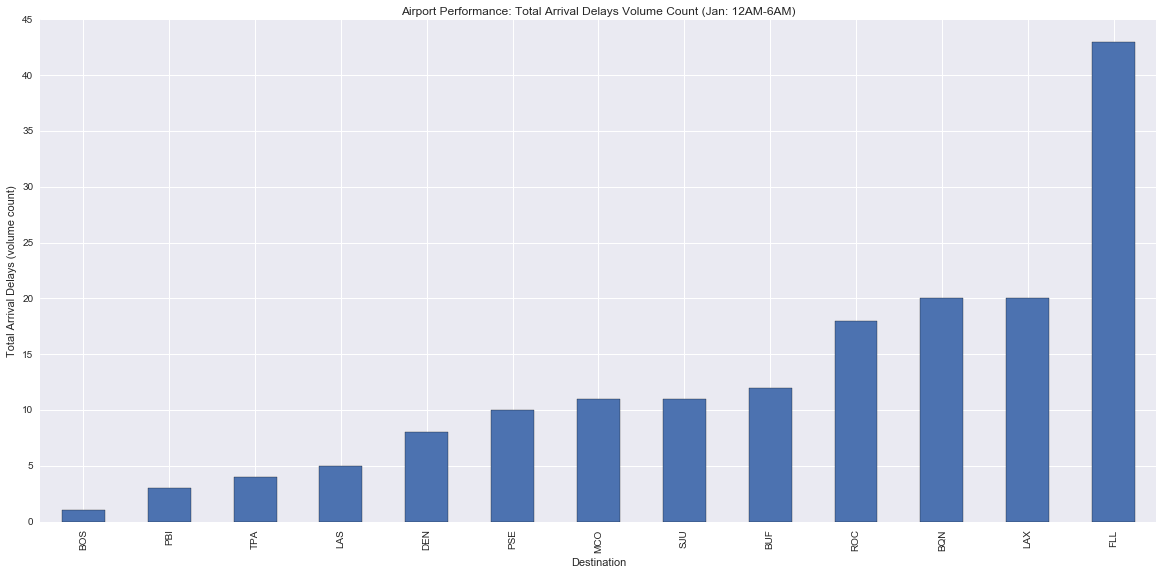

In [88]:
#Graphs for Monthly - Timeframe Summary

#select 'month' values from 1,2,3,4,5,6,7,8,9,10,11,12 for respective month's data
#select 'timeframe' values from '1.12AM-6AM','2.6AM-12Noon','3.12Noon-6PM','4.6PM-12MidNight' for respective period data

#TOTAL ARRIVAL DELAYS (Volume count)

flight_arr_month_timef=flight_arr_Summ_mo_timeframe[flight_arr_Summ_mo_timeframe['month'] == 1] #change month values here for other months
flight_arr_month_timef=flight_arr_month_timef[flight_arr_month_timef['sched_arr_timeframe'] == '1.12AM-6AM']#change timeframe values here for other periods

mean_arr_delay=flight_arr_month_timef['total_arr_delays_num']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Total Arrival Delays Volume Count (Jan: 12AM-6AM)')#change the timeframe text for other periods & months accordingly
plt.xlabel('Destination')
plt.ylabel('Total Arrival Delays (volume count)')

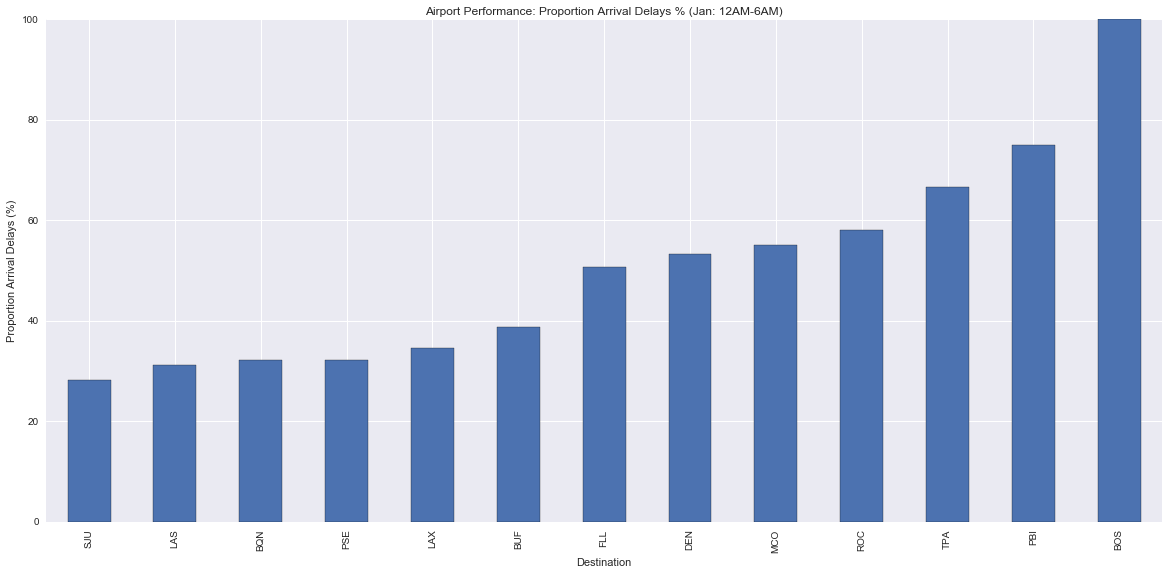

In [89]:
#Graphs for Monthly - Timeframe Summary

#select 'month' values from 1,2,3,4,5,6,7,8,9,10,11,12 for respective month's data
#select 'timeframe' values from '1.12AM-6AM','2.6AM-12Noon','3.12Noon-6PM','4.6PM-12MidNight' for respective period data

#PROPORTION OF ARRIVAL DELAYS (%)

flight_arr_month_timef=flight_arr_Summ_mo_timeframe[flight_arr_Summ_mo_timeframe['month'] == 1] #change month values here for other months
flight_arr_month_timef=flight_arr_month_timef[flight_arr_month_timef['sched_arr_timeframe'] == '1.12AM-6AM']#change timeframe values here for other periods

mean_arr_delay=flight_arr_month_timef['arr_delays_%']
mean_arr_delay.sort_values().dropna().plot(kind='bar', figsize=[20, 9])
plt.title('Airport Performance: Proportion Arrival Delays % (Jan: 12AM-6AM)')#change the timeframe text for other periods & months accordingly
plt.xlabel('Destination')
plt.ylabel('Proportion Arrival Delays (%)')